Del dataset se elimino la caracteristica veil_type ya que todos los casos presentaban el mismo valor

In [1]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from IPython.display import Image
from sklearn.metrics import roc_curve

import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#entrenamiento = pd.read_csv("CasiFinal2.csv", sep=';')
entrenamiento = pd.read_csv("fined123_2.csv", sep=';')

C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print (entrenamiento.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 15 columns):
edx.forum.response.created    2300 non-null int64
edx.forum.thread.created      2300 non-null int64
load_video                    2300 non-null int64
openassessment.upload_file    2300 non-null int64
pause_video                   2300 non-null int64
play_video                    2300 non-null int64
problem_check                 2300 non-null int64
problem_graded                2300 non-null int64
problem_show                  2300 non-null int64
seek_video                    2300 non-null int64
seq_goto                      2300 non-null int64
seq_next                      2300 non-null int64
seq_prev                      2300 non-null int64
stop_video                    2300 non-null int64
clase                         2300 non-null object
dtypes: int64(14), object(1)
memory usage: 269.6+ KB
None


In [3]:
caracteristicas = len(entrenamiento.columns)
caracteristicas

15

In [4]:
limite = caracteristicas - 1
oculta = 12
salida = 1

In [5]:
entrenamiento.head(5)

edx.forum.response.created  edx.forum.thread.created  load_video  \
0                           0                         1          16   
1                           1                         0          19   
2                           1                         0           2   
3                           0                         0           0   
4                           0                         0           1   

   openassessment.upload_file  pause_video  play_video  problem_check  \
0                           1           26          52             12   
1                           3           15         302             46   
2                           0            0           2              1   
3                           0            0           0              0   
4                           0            0           4              0   

   problem_graded  problem_show  seek_video  seq_goto  seq_next  seq_prev  \
0              12             3          18        10        23         9   
1              46            10          25        44         7         2   
2               1             1           0         0         0         0   
3               0             0           0         0         0         0   
4               0             0           3         7         0         0   

   stop_video clase  
0           7     T  
1           6     T  
2           0     F  
3           0     F  
4           0     F

Convertir valores categoricos a numericos de las 22 caracteristicas

In [6]:
#Exportar resultados
#entrenamiento.to_csv('CSVNumerico.csv', sep=';', encoding='utf-8')

In [7]:
corr = entrenamiento.corr()
corr

edx.forum.response.created  \
edx.forum.response.created                    1.000000   
edx.forum.thread.created                      0.130559   
load_video                                    0.133694   
openassessment.upload_file                    0.058181   
pause_video                                   0.042114   
play_video                                    0.000298   
problem_check                                 0.054515   
problem_graded                                0.054763   
problem_show                                  0.077313   
seek_video                                    0.080258   
seq_goto                                      0.174962   
seq_next                                      0.081984   
seq_prev                                      0.140861   
stop_video                                    0.101952   

                            edx.forum.thread.created  load_video  \
edx.forum.response.created                  0.130559    0.133694   
edx.forum.thread.created                    1.000000    0.259273   
load_video                                  0.259273    1.000000   
openassessment.upload_file                  0.134319    0.284148   
pause_video                                 0.198546    0.526175   
play_video                                 -0.001990    0.080931   
problem_check                               0.223780    0.428820   
problem_graded                              0.222757    0.429022   
problem_show                                0.154807    0.297021   
seek_video                                  0.149022    0.638353   
seq_goto                                    0.226126    0.750966   
seq_next                                    0.179453    0.431480   
seq_prev                                    0.181732    0.368215   
stop_video                                  0.256764    0.755009   

                            openassessment.upload_file  pause_video  \
edx.forum.response.created                    0.058181     0.042114   
edx.forum.thread.created                      0.134319     0.198546   
load_video                                    0.284148     0.526175   
openassessment.upload_file                    1.000000     0.136526   
pause_video                                   0.136526     1.000000   
play_video                                    0.002008     0.052294   
problem_check                                 0.318752     0.191042   
problem_graded                                0.319037     0.190631   
problem_show                                  0.211990     0.170625   
seek_video                                    0.191028     0.631005   
seq_goto                                      0.296596     0.382036   
seq_next                                      0.291664     0.214256   
seq_prev                                      0.282918     0.172999   
stop_video                                    0.225670     0.516695   

                            play_video  problem_check  problem_graded  \
edx.forum.response.created    0.000298       0.054515        0.054763   
edx.forum.thread.created     -0.001990       0.223780        0.222757   
load_video                    0.080931       0.428820        0.429022   
openassessment.upload_file    0.002008       0.318752        0.319037   
pause_video                   0.052294       0.191042        0.190631   
play_video                    1.000000       0.048135        0.048529   
problem_check                 0.048135       1.000000        0.999222   
problem_graded                0.048529       0.999222        1.000000   
problem_show                  0.056183       0.435488        0.432688   
seek_video                    0.080126       0.266929        0.266817   
seq_goto                      0.030824       0.396969        0.396761   
seq_next                      0.011822       0.374361        0.372262   
seq_prev                      0.006353       0.294959        0.294445   
stop_video                    0.087599       0.3

In [8]:
datos = entrenamiento

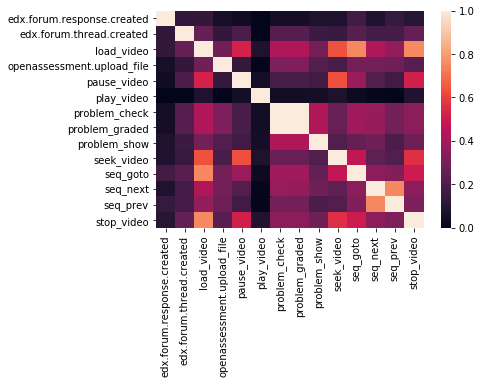

In [9]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = False)

In [10]:
# Import `train_test_split` from `sklearn.model_selection`

from sklearn.preprocessing import LabelEncoder

import numpy as np
from sklearn.model_selection import train_test_split

# Specify the data 
# Evaluar todas las columnas desde la primera hasta la numero 15
X = datos.values[:, 0:limite]

# Specify the target labels and flatten the array 
# Devuelve una matriz aplanada contigua.
# Se devuelve una matriz 1-D que contiene los elementos de la entrada.
Y = datos.values[:,limite]

# Split the data up in train and test sets
# Especificando que se use el 20% del datasetpara el testeo
# Ademas de agregarle un filtro de mezclador

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split( X, encoded_Y, test_size = 0.70, random_state = 0)

[1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 1 1 1 0 

In [11]:
from sklearn.preprocessing import StandardScaler

# Definir la escala
scaler = StandardScaler().fit(X_train)

# Escalar el set det entrenamiento
X_train = scaler.transform(X_train)

# Escalar el set de testeo
X_test = scaler.transform(X_test)

X_train

C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Michael\Anaconda3\envs\KerasNGpu\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.25423529, -0.37366245,  2.39596526, ...,  0.98617016,
        -0.41673526,  2.6489649 ],
       [ 1.57308086,  1.59448326, -0.25838212, ..., -0.21764658,
         0.22654736, -0.13941921],
       [-0.25423529, -0.37366245,  0.18400911, ...,  0.98617016,
         0.22654736, -0.41825762],
       ...,
       [-0.25423529,  1.59448326, -0.03718651, ...,  0.08330761,
         0.22654736,  0.69709603],
       [-0.25423529, -0.37366245, -0.59017555, ..., -0.51860076,
        -0.41673526, -0.41825762],
       [-0.25423529, -0.37366245,  0.29460691, ..., -0.51860076,
        -0.41673526,  0.41825762]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Inicia el constructor
model = Sequential()
# Se agrega la capa de entrada
model.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model2 = Sequential()
# Se agrega la capa de entrada
model2.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model2.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model2.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model3 = Sequential()
# Se agrega la capa de entrada
model3.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model3.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model3.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model4 = Sequential()
# Se agrega la capa de entrada
model4.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model4.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model4.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model5 = Sequential()
# Se agrega la capa de entrada
model5.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model5.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model5.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model6 = Sequential()
# Se agrega la capa de entrada
model6.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model6.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model6.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model7 = Sequential()
# Se agrega la capa de entrada
model7.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model7.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model7.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model8 = Sequential()
# Se agrega la capa de entrada
model8.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model8.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model8.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model9 = Sequential()
# Se agrega la capa de entrada
model9.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model9.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model9.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model10 = Sequential()
# Se agrega la capa de entrada
model10.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model10.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model10.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

# Inicia el constructor
model11 = Sequential()
# Se agrega la capa de entrada
model11.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model11.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model11.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model12 = Sequential()
# Se agrega la capa de entrada
model12.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model12.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model12.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model13 = Sequential()
# Se agrega la capa de entrada
model13.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model13.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model13.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model14 = Sequential()
# Se agrega la capa de entrada
model14.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model14.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model14.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model15 = Sequential()
# Se agrega la capa de entrada
model15.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model15.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model15.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model16 = Sequential()
# Se agrega la capa de entrada
model16.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model16.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model16.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model17 = Sequential()
# Se agrega la capa de entrada
model17.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model17.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model17.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))
# Inicia el constructor
model18 = Sequential()
# Se agrega la capa de entrada
model18.add(Dense(limite, kernel_initializer='normal',activation='relu', input_shape=(limite,)))
# Add one hidden layer 
model18.add(Dense(oculta, kernel_initializer='normal', activation='relu'))
# Add an output layer 
model18.add(Dense(salida, kernel_initializer='normal', activation='sigmoid'))

In [13]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Model config
#model.get_config()
# List all weight tensors 
#model.get_weights()

In [15]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 3ms/step - loss: 0.2502 - acc: 0.3810 - val_loss: 0.2502 - val_acc: 0.5351
Epoch 2/2000
462/462 [==============================] - 0s 208us/step - loss: 0.2501 - acc: 0.5498 - val_loss: 0.2502 - val_acc: 0.5307
Epoch 3/2000
462/462 [==============================] - 0s 100us/step - loss: 0.2500 - acc: 0.5433 - val_loss: 0.2502 - val_acc: 0.5307
Epoch 4/2000
462/462 [==============================] - 0s 71us/step - loss: 0.2500 - acc: 0.5433 - val_loss: 0.2501 - val_acc: 0.5307
Epoch 5/2000
462/462 [==============================] - 0s 63us/step - loss: 0.2499 - acc: 0.5433 - val_loss: 0.2501 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 43us/step - loss: 0.2499 - acc: 0.5433 - val_loss: 0.2500 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2498 - acc: 0.5433 - val_loss: 0.2500 - val_acc: 0.5263
Epoch 8/

462/462 [==============================] - 0s 41us/step - loss: 0.2483 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 61/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2483 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2483 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2483 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2482 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2482 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2482 - acc: 0.5433 - val_loss: 0.2491 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 32

462/462 [==============================] - 0s 32us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2487 - val_acc: 0.5263
Epoch 121/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2487 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2487 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 50us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2487 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 301us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2487 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 74us/step - loss: 0.2476 - acc: 0.5433 - val_loss: 0.2486 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 56us/step - loss: 0.2475 - acc: 0.5433 - val_loss: 0.2486 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================]

462/462 [==============================] - 0s 56us/step - loss: 0.2469 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 180/2000
462/462 [==============================] - 0s 45us/step - loss: 0.2469 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2468 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2468 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2468 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2468 - acc: 0.5433 - val_loss: 0.2479 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2468 - acc: 0.5433 - val_loss: 0.2478 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] 

462/462 [==============================] - 0s 35us/step - loss: 0.2453 - acc: 0.5433 - val_loss: 0.2462 - val_acc: 0.5263
Epoch 239/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2453 - acc: 0.5433 - val_loss: 0.2462 - val_acc: 0.5263
Epoch 240/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2453 - acc: 0.5433 - val_loss: 0.2461 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2452 - acc: 0.5433 - val_loss: 0.2461 - val_acc: 0.5307
Epoch 242/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2452 - acc: 0.5433 - val_loss: 0.2460 - val_acc: 0.5307
Epoch 243/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2451 - acc: 0.5433 - val_loss: 0.2460 - val_acc: 0.5307
Epoch 244/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2451 - acc: 0.5433 - val_loss: 0.2459 - val_acc: 0.5307
Epoch 245/2000
462/462 [==============================] 

462/462 [==============================] - 0s 50us/step - loss: 0.2412 - acc: 0.5649 - val_loss: 0.2413 - val_acc: 0.5570
Epoch 298/2000
462/462 [==============================] - 0s 242us/step - loss: 0.2411 - acc: 0.5649 - val_loss: 0.2412 - val_acc: 0.5570
Epoch 299/2000
462/462 [==============================] - 0s 78us/step - loss: 0.2410 - acc: 0.5649 - val_loss: 0.2410 - val_acc: 0.5526
Epoch 300/2000
462/462 [==============================] - 0s 58us/step - loss: 0.2409 - acc: 0.5649 - val_loss: 0.2409 - val_acc: 0.5570
Epoch 301/2000
462/462 [==============================] - 0s 50us/step - loss: 0.2408 - acc: 0.5649 - val_loss: 0.2408 - val_acc: 0.5570
Epoch 302/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2406 - acc: 0.5671 - val_loss: 0.2406 - val_acc: 0.5570
Epoch 303/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2405 - acc: 0.5671 - val_loss: 0.2405 - val_acc: 0.5570
Epoch 304/2000
462/462 [==============================]

Epoch 357/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2280 - acc: 0.6883 - val_loss: 0.2256 - val_acc: 0.6842
Epoch 358/2000
462/462 [==============================] - 0s 43us/step - loss: 0.2276 - acc: 0.6905 - val_loss: 0.2251 - val_acc: 0.6842
Epoch 359/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2272 - acc: 0.6905 - val_loss: 0.2247 - val_acc: 0.6930
Epoch 360/2000
462/462 [==============================] - 0s 223us/step - loss: 0.2268 - acc: 0.6948 - val_loss: 0.2242 - val_acc: 0.6930
Epoch 361/2000
462/462 [==============================] - 0s 143us/step - loss: 0.2264 - acc: 0.7035 - val_loss: 0.2238 - val_acc: 0.6974
Epoch 362/2000
462/462 [==============================] - 0s 78us/step - loss: 0.2261 - acc: 0.7035 - val_loss: 0.2233 - val_acc: 0.7018
Epoch 363/2000
462/462 [==============================] - 0s 58us/step - loss: 0.2257 - acc: 0.7035 - val_loss: 0.2229 - val_acc: 0.7061
Epoch 364/2000
462/462 [===============

Epoch 417/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1936 - acc: 0.7706 - val_loss: 0.1876 - val_acc: 0.7895
Epoch 418/2000
462/462 [==============================] - 0s 299us/step - loss: 0.1929 - acc: 0.7749 - val_loss: 0.1869 - val_acc: 0.7895
Epoch 419/2000
462/462 [==============================] - 0s 84us/step - loss: 0.1923 - acc: 0.7771 - val_loss: 0.1862 - val_acc: 0.7895
Epoch 420/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1916 - acc: 0.7814 - val_loss: 0.1855 - val_acc: 0.7895
Epoch 421/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1909 - acc: 0.7814 - val_loss: 0.1848 - val_acc: 0.7895
Epoch 422/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1902 - acc: 0.7835 - val_loss: 0.1840 - val_acc: 0.7939
Epoch 423/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1895 - acc: 0.7857 - val_loss: 0.1833 - val_acc: 0.7939
Epoch 424/2000
462/462 [================

Epoch 477/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1532 - acc: 0.8225 - val_loss: 0.1465 - val_acc: 0.8421
Epoch 478/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1526 - acc: 0.8225 - val_loss: 0.1459 - val_acc: 0.8421
Epoch 479/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1519 - acc: 0.8225 - val_loss: 0.1453 - val_acc: 0.8421
Epoch 480/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1513 - acc: 0.8225 - val_loss: 0.1447 - val_acc: 0.8421
Epoch 481/2000
462/462 [==============================] - 0s 264us/step - loss: 0.1507 - acc: 0.8247 - val_loss: 0.1441 - val_acc: 0.8421
Epoch 482/2000
462/462 [==============================] - 0s 74us/step - loss: 0.1501 - acc: 0.8268 - val_loss: 0.1435 - val_acc: 0.8421
Epoch 483/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1495 - acc: 0.8268 - val_loss: 0.1429 - val_acc: 0.8465
Epoch 484/2000
462/462 [================

Epoch 537/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1215 - acc: 0.8463 - val_loss: 0.1158 - val_acc: 0.8640
Epoch 538/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1210 - acc: 0.8485 - val_loss: 0.1154 - val_acc: 0.8640
Epoch 539/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1206 - acc: 0.8485 - val_loss: 0.1150 - val_acc: 0.8640
Epoch 540/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1202 - acc: 0.8506 - val_loss: 0.1146 - val_acc: 0.8640
Epoch 541/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1198 - acc: 0.8506 - val_loss: 0.1142 - val_acc: 0.8596
Epoch 542/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1193 - acc: 0.8528 - val_loss: 0.1138 - val_acc: 0.8596
Epoch 543/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1189 - acc: 0.8506 - val_loss: 0.1134 - val_acc: 0.8596
Epoch 544/2000
462/462 [=================

Epoch 597/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1015 - acc: 0.8788 - val_loss: 0.0985 - val_acc: 0.8728
Epoch 598/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1012 - acc: 0.8788 - val_loss: 0.0984 - val_acc: 0.8728
Epoch 599/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1010 - acc: 0.8788 - val_loss: 0.0982 - val_acc: 0.8728
Epoch 600/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1007 - acc: 0.8788 - val_loss: 0.0980 - val_acc: 0.8728
Epoch 601/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1005 - acc: 0.8810 - val_loss: 0.0978 - val_acc: 0.8728
Epoch 602/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1003 - acc: 0.8810 - val_loss: 0.0977 - val_acc: 0.8728
Epoch 603/2000
462/462 [==============================] - 0s 273us/step - loss: 0.1000 - acc: 0.8810 - val_loss: 0.0975 - val_acc: 0.8728
Epoch 604/2000
462/462 [================

Epoch 657/2000
462/462 [==============================] - 0s 296us/step - loss: 0.0896 - acc: 0.8939 - val_loss: 0.0908 - val_acc: 0.8816
Epoch 658/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0894 - acc: 0.8939 - val_loss: 0.0907 - val_acc: 0.8816
Epoch 659/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0892 - acc: 0.8939 - val_loss: 0.0907 - val_acc: 0.8816
Epoch 660/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0891 - acc: 0.8961 - val_loss: 0.0906 - val_acc: 0.8816
Epoch 661/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0890 - acc: 0.8983 - val_loss: 0.0905 - val_acc: 0.8816
Epoch 662/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0888 - acc: 0.8983 - val_loss: 0.0904 - val_acc: 0.8816
Epoch 663/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0887 - acc: 0.8983 - val_loss: 0.0903 - val_acc: 0.8816
Epoch 664/2000
462/462 [================

462/462 [==============================] - 0s 52us/step - loss: 0.0824 - acc: 0.9069 - val_loss: 0.0868 - val_acc: 0.8860
Epoch 717/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0823 - acc: 0.9069 - val_loss: 0.0867 - val_acc: 0.8860
Epoch 718/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0822 - acc: 0.9069 - val_loss: 0.0867 - val_acc: 0.8860
Epoch 719/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0821 - acc: 0.9069 - val_loss: 0.0866 - val_acc: 0.8860
Epoch 720/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0820 - acc: 0.9069 - val_loss: 0.0866 - val_acc: 0.8860
Epoch 721/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0819 - acc: 0.9069 - val_loss: 0.0866 - val_acc: 0.8860
Epoch 722/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0818 - acc: 0.9069 - val_loss: 0.0865 - val_acc: 0.8860
Epoch 723/2000
462/462 [==============================] 

Epoch 776/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0777 - acc: 0.9091 - val_loss: 0.0847 - val_acc: 0.8860
Epoch 777/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0776 - acc: 0.9091 - val_loss: 0.0847 - val_acc: 0.8860
Epoch 778/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0776 - acc: 0.9091 - val_loss: 0.0846 - val_acc: 0.8860
Epoch 779/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0775 - acc: 0.9091 - val_loss: 0.0846 - val_acc: 0.8860
Epoch 780/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0774 - acc: 0.9134 - val_loss: 0.0846 - val_acc: 0.8860
Epoch 781/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0774 - acc: 0.9113 - val_loss: 0.0846 - val_acc: 0.8860
Epoch 782/2000
462/462 [==============================] - 0s 310us/step - loss: 0.0773 - acc: 0.9134 - val_loss: 0.0845 - val_acc: 0.8860
Epoch 783/2000
462/462 [================

Epoch 836/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0746 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 837/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0746 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 838/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0745 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 839/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0745 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 840/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0745 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 841/2000
462/462 [==============================] - 0s 292us/step - loss: 0.0744 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 842/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0744 - acc: 0.9177 - val_loss: 0.0836 - val_acc: 0.8772
Epoch 843/2000
462/462 [================

462/462 [==============================] - 0s 30us/step - loss: 0.0724 - acc: 0.9156 - val_loss: 0.0829 - val_acc: 0.8772
Epoch 896/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0724 - acc: 0.9156 - val_loss: 0.0829 - val_acc: 0.8772
Epoch 897/2000
462/462 [==============================] - 0s 260us/step - loss: 0.0723 - acc: 0.9156 - val_loss: 0.0829 - val_acc: 0.8772
Epoch 898/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0723 - acc: 0.9156 - val_loss: 0.0829 - val_acc: 0.8772
Epoch 899/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0723 - acc: 0.9156 - val_loss: 0.0828 - val_acc: 0.8772
Epoch 900/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0722 - acc: 0.9156 - val_loss: 0.0828 - val_acc: 0.8772
Epoch 901/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0722 - acc: 0.9156 - val_loss: 0.0828 - val_acc: 0.8772
Epoch 902/2000
462/462 [==============================]

Epoch 955/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0706 - acc: 0.9156 - val_loss: 0.0824 - val_acc: 0.8772
Epoch 956/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0706 - acc: 0.9156 - val_loss: 0.0823 - val_acc: 0.8772
Epoch 957/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0706 - acc: 0.9156 - val_loss: 0.0823 - val_acc: 0.8772
Epoch 958/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0705 - acc: 0.9156 - val_loss: 0.0823 - val_acc: 0.8772
Epoch 959/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0705 - acc: 0.9156 - val_loss: 0.0824 - val_acc: 0.8772
Epoch 960/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0705 - acc: 0.9156 - val_loss: 0.0824 - val_acc: 0.8772
Epoch 961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0705 - acc: 0.9156 - val_loss: 0.0824 - val_acc: 0.8772
Epoch 962/2000
462/462 [=================

462/462 [==============================] - 0s 37us/step - loss: 0.0693 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1015/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0693 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1016/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0693 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1017/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0692 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1018/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0692 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1019/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0692 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1020/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0692 - acc: 0.9156 - val_loss: 0.0821 - val_acc: 0.8816
Epoch 1021/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.0682 - acc: 0.9177 - val_loss: 0.0817 - val_acc: 0.8816
Epoch 1074/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0681 - acc: 0.9177 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1075/2000
462/462 [==============================] - 0s 180us/step - loss: 0.0681 - acc: 0.9156 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1076/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0681 - acc: 0.9156 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1077/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0681 - acc: 0.9156 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1078/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0681 - acc: 0.9156 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1079/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0681 - acc: 0.9156 - val_loss: 0.0816 - val_acc: 0.8816
Epoch 1080/2000
462/462 [========================

462/462 [==============================] - 0s 43us/step - loss: 0.0671 - acc: 0.9177 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1133/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0671 - acc: 0.9177 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1134/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0671 - acc: 0.9177 - val_loss: 0.0811 - val_acc: 0.8816
Epoch 1135/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0670 - acc: 0.9156 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1136/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0670 - acc: 0.9177 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1137/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0670 - acc: 0.9156 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1138/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0670 - acc: 0.9156 - val_loss: 0.0811 - val_acc: 0.8816
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0806 - val_acc: 0.8816
Epoch 1192/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1193/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1194/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1195/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1196/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0660 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1197/2000
462/462 [==============================] - 0s 295us/step - loss: 0.0659 - acc: 0.9156 - val_loss: 0.0807 - val_acc: 0.8816
Epoch 1198/2000
462/462 [========================

462/462 [==============================] - 0s 37us/step - loss: 0.0650 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1251/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0650 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1252/2000
462/462 [==============================] - 0s 251us/step - loss: 0.0650 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1253/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0649 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1254/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0649 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1255/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0649 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1256/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0649 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1257/2000
462/462 [========================

462/462 [==============================] - 0s 58us/step - loss: 0.0639 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1310/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0639 - acc: 0.9156 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1311/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0639 - acc: 0.9177 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1312/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0639 - acc: 0.9177 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1313/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0639 - acc: 0.9177 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1314/2000
462/462 [==============================] - 0s 33us/step - loss: 0.0639 - acc: 0.9177 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1315/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0638 - acc: 0.9177 - val_loss: 0.0804 - val_acc: 0.8816
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0630 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1369/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0630 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1370/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0630 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1371/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0630 - acc: 0.9177 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1372/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0629 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1373/2000
462/462 [==============================] - 0s 268us/step - loss: 0.0629 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1374/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0629 - acc: 0.9156 - val_loss: 0.0808 - val_acc: 0.8816
Epoch 1375/2000
462/462 [========================

462/462 [==============================] - 0s 41us/step - loss: 0.0623 - acc: 0.9156 - val_loss: 0.0811 - val_acc: 0.8816
Epoch 1428/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0623 - acc: 0.9156 - val_loss: 0.0810 - val_acc: 0.8816
Epoch 1429/2000
462/462 [==============================] - 0s 247us/step - loss: 0.0623 - acc: 0.9156 - val_loss: 0.0809 - val_acc: 0.8816
Epoch 1430/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0623 - acc: 0.9156 - val_loss: 0.0809 - val_acc: 0.8816
Epoch 1431/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0622 - acc: 0.9156 - val_loss: 0.0809 - val_acc: 0.8816
Epoch 1432/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0623 - acc: 0.9156 - val_loss: 0.0809 - val_acc: 0.8816
Epoch 1433/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0622 - acc: 0.9156 - val_loss: 0.0809 - val_acc: 0.8816
Epoch 1434/2000
462/462 [========================

462/462 [==============================] - 0s 48us/step - loss: 0.0617 - acc: 0.9177 - val_loss: 0.0813 - val_acc: 0.8816
Epoch 1487/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0617 - acc: 0.9177 - val_loss: 0.0812 - val_acc: 0.8816
Epoch 1488/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0616 - acc: 0.9177 - val_loss: 0.0811 - val_acc: 0.8816
Epoch 1489/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0616 - acc: 0.9177 - val_loss: 0.0811 - val_acc: 0.8816
Epoch 1490/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0616 - acc: 0.9177 - val_loss: 0.0810 - val_acc: 0.8816
Epoch 1491/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0616 - acc: 0.9177 - val_loss: 0.0810 - val_acc: 0.8816
Epoch 1492/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0616 - acc: 0.9177 - val_loss: 0.0810 - val_acc: 0.8816
Epoch 1493/2000
462/462 [=========================

Epoch 1545/2000
462/462 [==============================] - 0s 319us/step - loss: 0.0612 - acc: 0.9221 - val_loss: 0.0813 - val_acc: 0.8772
Epoch 1546/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0612 - acc: 0.9221 - val_loss: 0.0812 - val_acc: 0.8772
Epoch 1547/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0611 - acc: 0.9221 - val_loss: 0.0812 - val_acc: 0.8772
Epoch 1548/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0611 - acc: 0.9221 - val_loss: 0.0813 - val_acc: 0.8772
Epoch 1549/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0611 - acc: 0.9221 - val_loss: 0.0813 - val_acc: 0.8772
Epoch 1550/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0611 - acc: 0.9221 - val_loss: 0.0813 - val_acc: 0.8772
Epoch 1551/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0611 - acc: 0.9199 - val_loss: 0.0814 - val_acc: 0.8772
Epoch 1552/2000
462/462 [========

462/462 [==============================] - 0s 28us/step - loss: 0.0608 - acc: 0.9199 - val_loss: 0.0817 - val_acc: 0.8772
Epoch 1605/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0607 - acc: 0.9199 - val_loss: 0.0817 - val_acc: 0.8772
Epoch 1606/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0608 - acc: 0.9199 - val_loss: 0.0817 - val_acc: 0.8772
Epoch 1607/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0607 - acc: 0.9221 - val_loss: 0.0817 - val_acc: 0.8772
Epoch 1608/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0607 - acc: 0.9199 - val_loss: 0.0817 - val_acc: 0.8772
Epoch 1609/2000
462/462 [==============================] - 0s 244us/step - loss: 0.0607 - acc: 0.9199 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1610/2000
462/462 [==============================] - 0s 102us/step - loss: 0.0607 - acc: 0.9199 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1611/2000
462/462 [=======================

462/462 [==============================] - 0s 48us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1664/2000
462/462 [==============================] - 0s 46us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1665/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1666/2000
462/462 [==============================] - ETA: 0s - loss: 0.0793 - acc: 0.920 - 0s 100us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0819 - val_acc: 0.8772
Epoch 1667/2000
462/462 [==============================] - 0s 195us/step - loss: 0.0604 - acc: 0.9199 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1668/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0818 - val_acc: 0.8772
Epoch 1669/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0604 - acc: 0.9221 - val_loss: 0.0819 - val_acc: 0.8772
Epoch 1670

462/462 [==============================] - 0s 35us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0825 - val_acc: 0.8728
Epoch 1722/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0824 - val_acc: 0.8728
Epoch 1723/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0823 - val_acc: 0.8728
Epoch 1724/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0823 - val_acc: 0.8728
Epoch 1725/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0824 - val_acc: 0.8728
Epoch 1726/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0824 - val_acc: 0.8728
Epoch 1727/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0600 - acc: 0.9199 - val_loss: 0.0825 - val_acc: 0.8684
Epoch 1728/2000
462/462 [=========================

462/462 [==============================] - 0s 48us/step - loss: 0.0597 - acc: 0.9199 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1781/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0597 - acc: 0.9199 - val_loss: 0.0828 - val_acc: 0.8728
Epoch 1782/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0596 - acc: 0.9199 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1783/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0596 - acc: 0.9199 - val_loss: 0.0828 - val_acc: 0.8728
Epoch 1784/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0596 - acc: 0.9199 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1785/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0596 - acc: 0.9199 - val_loss: 0.0825 - val_acc: 0.8728
Epoch 1786/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0596 - acc: 0.9199 - val_loss: 0.0825 - val_acc: 0.8728
Epoch 1787/2000
462/462 [=========================

462/462 [==============================] - 0s 43us/step - loss: 0.0593 - acc: 0.9221 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1840/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0593 - acc: 0.9221 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1841/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0593 - acc: 0.9242 - val_loss: 0.0826 - val_acc: 0.8728
Epoch 1842/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0592 - acc: 0.9221 - val_loss: 0.0826 - val_acc: 0.8728
Epoch 1843/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0593 - acc: 0.9242 - val_loss: 0.0827 - val_acc: 0.8728
Epoch 1844/2000
462/462 [==============================] - 0s 195us/step - loss: 0.0592 - acc: 0.9221 - val_loss: 0.0826 - val_acc: 0.8728
Epoch 1845/2000
462/462 [==============================] - 0s 134us/step - loss: 0.0593 - acc: 0.9242 - val_loss: 0.0825 - val_acc: 0.8728
Epoch 1846/2000
462/462 [=======================

462/462 [==============================] - 0s 51us/step - loss: 0.0589 - acc: 0.9242 - val_loss: 0.0828 - val_acc: 0.8684
Epoch 1899/2000
462/462 [==============================] - 0s 303us/step - loss: 0.0589 - acc: 0.9221 - val_loss: 0.0828 - val_acc: 0.8684
Epoch 1900/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0589 - acc: 0.9242 - val_loss: 0.0829 - val_acc: 0.8684
Epoch 1901/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0588 - acc: 0.9242 - val_loss: 0.0829 - val_acc: 0.8684
Epoch 1902/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0588 - acc: 0.9221 - val_loss: 0.0829 - val_acc: 0.8684
Epoch 1903/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0588 - acc: 0.9221 - val_loss: 0.0830 - val_acc: 0.8684
Epoch 1904/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0588 - acc: 0.9221 - val_loss: 0.0829 - val_acc: 0.8684
Epoch 1905/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0585 - acc: 0.9221 - val_loss: 0.0834 - val_acc: 0.8684
Epoch 1958/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0585 - acc: 0.9221 - val_loss: 0.0834 - val_acc: 0.8684
Epoch 1959/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0585 - acc: 0.9242 - val_loss: 0.0835 - val_acc: 0.8684
Epoch 1960/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0585 - acc: 0.9242 - val_loss: 0.0836 - val_acc: 0.8684
Epoch 1961/2000
462/462 [==============================] - 0s 268us/step - loss: 0.0585 - acc: 0.9242 - val_loss: 0.0834 - val_acc: 0.8684
Epoch 1962/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0585 - acc: 0.9242 - val_loss: 0.0835 - val_acc: 0.8684
Epoch 1963/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0585 - acc: 0.9264 - val_loss: 0.0835 - val_acc: 0.8684
Epoch 1964/2000
462/462 [========================

In [16]:
y_pred_mean_squared_error = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_mean_squared_error)

In [17]:
model2.compile(loss='mean_absolute_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history2 = model2.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.5000 - acc: 0.3853 - val_loss: 0.4998 - val_acc: 0.3860
Epoch 2/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4999 - acc: 0.5758 - val_loss: 0.4998 - val_acc: 0.6491
Epoch 3/2000
462/462 [==============================] - 0s 32us/step - loss: 0.4998 - acc: 0.6234 - val_loss: 0.4997 - val_acc: 0.6009
Epoch 4/2000
462/462 [==============================] - 0s 32us/step - loss: 0.4998 - acc: 0.5823 - val_loss: 0.4997 - val_acc: 0.5702
Epoch 5/2000
462/462 [==============================] - 0s 45us/step - loss: 0.4997 - acc: 0.5758 - val_loss: 0.4996 - val_acc: 0.5526
Epoch 6/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4997 - acc: 0.5714 - val_loss: 0.4996 - val_acc: 0.5570
Epoch 7/2000
462/462 [==============================] - 0s 279us/step - loss: 0.4996 - acc: 0.5584 - val_loss: 0.4996 - val_acc: 0.5526
Epoch 8/2

Epoch 61/2000
462/462 [==============================] - 0s 48us/step - loss: 0.4967 - acc: 0.5433 - val_loss: 0.4976 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 37us/step - loss: 0.4966 - acc: 0.5433 - val_loss: 0.4975 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 30us/step - loss: 0.4966 - acc: 0.5433 - val_loss: 0.4975 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 35us/step - loss: 0.4965 - acc: 0.5433 - val_loss: 0.4975 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 35us/step - loss: 0.4965 - acc: 0.5433 - val_loss: 0.4974 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 35us/step - loss: 0.4964 - acc: 0.5433 - val_loss: 0.4974 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 45us/step - loss: 0.4964 - acc: 0.5433 - val_loss: 0.4973 - val_acc: 0.5263
Epoch 68/2000
462/462 [=========================

Epoch 121/2000
462/462 [==============================] - 0s 37us/step - loss: 0.4935 - acc: 0.5433 - val_loss: 0.4953 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 30us/step - loss: 0.4934 - acc: 0.5433 - val_loss: 0.4953 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4934 - acc: 0.5433 - val_loss: 0.4952 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 32us/step - loss: 0.4933 - acc: 0.5433 - val_loss: 0.4952 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 41us/step - loss: 0.4933 - acc: 0.5433 - val_loss: 0.4951 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 52us/step - loss: 0.4932 - acc: 0.5433 - val_loss: 0.4951 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================] - 0s 317us/step - loss: 0.4931 - acc: 0.5433 - val_loss: 0.4950 - val_acc: 0.5263
Epoch 128/2000
462/462 [================

462/462 [==============================] - 0s 65us/step - loss: 0.4899 - acc: 0.5433 - val_loss: 0.4926 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 63us/step - loss: 0.4898 - acc: 0.5433 - val_loss: 0.4925 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 43us/step - loss: 0.4898 - acc: 0.5433 - val_loss: 0.4925 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 41us/step - loss: 0.4897 - acc: 0.5433 - val_loss: 0.4924 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4897 - acc: 0.5433 - val_loss: 0.4924 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4896 - acc: 0.5433 - val_loss: 0.4923 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] - 0s 37us/step - loss: 0.4895 - acc: 0.5433 - val_loss: 0.4923 - val_acc: 0.5263
Epoch 187/2000
462/462 [==============================] 

Epoch 240/2000
462/462 [==============================] - 0s 50us/step - loss: 0.4856 - acc: 0.5433 - val_loss: 0.4887 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 41us/step - loss: 0.4855 - acc: 0.5433 - val_loss: 0.4886 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 50us/step - loss: 0.4854 - acc: 0.5433 - val_loss: 0.4885 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 52us/step - loss: 0.4853 - acc: 0.5433 - val_loss: 0.4884 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================] - 0s 54us/step - loss: 0.4852 - acc: 0.5433 - val_loss: 0.4883 - val_acc: 0.5263
Epoch 245/2000
462/462 [==============================] - 0s 345us/step - loss: 0.4851 - acc: 0.5433 - val_loss: 0.4882 - val_acc: 0.5263
Epoch 246/2000
462/462 [==============================] - 0s 93us/step - loss: 0.4850 - acc: 0.5433 - val_loss: 0.4881 - val_acc: 0.5263
Epoch 247/2000
462/462 [================

Epoch 300/2000
462/462 [==============================] - 0s 50us/step - loss: 0.4779 - acc: 0.5433 - val_loss: 0.4804 - val_acc: 0.5307
Epoch 301/2000
462/462 [==============================] - 0s 52us/step - loss: 0.4777 - acc: 0.5433 - val_loss: 0.4802 - val_acc: 0.5307
Epoch 302/2000
462/462 [==============================] - 0s 41us/step - loss: 0.4775 - acc: 0.5433 - val_loss: 0.4800 - val_acc: 0.5307
Epoch 303/2000
462/462 [==============================] - 0s 39us/step - loss: 0.4773 - acc: 0.5433 - val_loss: 0.4798 - val_acc: 0.5307
Epoch 304/2000
462/462 [==============================] - 0s 58us/step - loss: 0.4771 - acc: 0.5433 - val_loss: 0.4795 - val_acc: 0.5307
Epoch 305/2000
462/462 [==============================] - 0s 78us/step - loss: 0.4769 - acc: 0.5433 - val_loss: 0.4793 - val_acc: 0.5307
Epoch 306/2000
462/462 [==============================] - 0s 353us/step - loss: 0.4767 - acc: 0.5433 - val_loss: 0.4790 - val_acc: 0.5307
Epoch 307/2000
462/462 [================

462/462 [==============================] - 0s 50us/step - loss: 0.4534 - acc: 0.5866 - val_loss: 0.4497 - val_acc: 0.6316
Epoch 360/2000
462/462 [==============================] - 0s 52us/step - loss: 0.4525 - acc: 0.5909 - val_loss: 0.4486 - val_acc: 0.6360
Epoch 361/2000
462/462 [==============================] - 0s 48us/step - loss: 0.4516 - acc: 0.5931 - val_loss: 0.4474 - val_acc: 0.6360
Epoch 362/2000
462/462 [==============================] - 0s 37us/step - loss: 0.4506 - acc: 0.5974 - val_loss: 0.4463 - val_acc: 0.6404
Epoch 363/2000
462/462 [==============================] - 0s 32us/step - loss: 0.4497 - acc: 0.5974 - val_loss: 0.4451 - val_acc: 0.6360
Epoch 364/2000
462/462 [==============================] - 0s 35us/step - loss: 0.4487 - acc: 0.6017 - val_loss: 0.4439 - val_acc: 0.6360
Epoch 365/2000
462/462 [==============================] - 0s 41us/step - loss: 0.4477 - acc: 0.6104 - val_loss: 0.4427 - val_acc: 0.6360
Epoch 366/2000
462/462 [==============================] 

462/462 [==============================] - 0s 35us/step - loss: 0.3634 - acc: 0.7576 - val_loss: 0.3488 - val_acc: 0.7807
Epoch 419/2000
462/462 [==============================] - 0s 35us/step - loss: 0.3618 - acc: 0.7619 - val_loss: 0.3472 - val_acc: 0.7807
Epoch 420/2000
462/462 [==============================] - 0s 41us/step - loss: 0.3601 - acc: 0.7597 - val_loss: 0.3456 - val_acc: 0.7851
Epoch 421/2000
462/462 [==============================] - 0s 45us/step - loss: 0.3585 - acc: 0.7597 - val_loss: 0.3438 - val_acc: 0.7851
Epoch 422/2000
462/462 [==============================] - 0s 268us/step - loss: 0.3568 - acc: 0.7662 - val_loss: 0.3422 - val_acc: 0.7851
Epoch 423/2000
462/462 [==============================] - 0s 78us/step - loss: 0.3552 - acc: 0.7684 - val_loss: 0.3407 - val_acc: 0.7851
Epoch 424/2000
462/462 [==============================] - 0s 63us/step - loss: 0.3537 - acc: 0.7706 - val_loss: 0.3391 - val_acc: 0.7851
Epoch 425/2000
462/462 [==============================]

Epoch 478/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2795 - acc: 0.8312 - val_loss: 0.2657 - val_acc: 0.8553
Epoch 479/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2782 - acc: 0.8312 - val_loss: 0.2645 - val_acc: 0.8553
Epoch 480/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2769 - acc: 0.8312 - val_loss: 0.2632 - val_acc: 0.8509
Epoch 481/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2755 - acc: 0.8312 - val_loss: 0.2619 - val_acc: 0.8509
Epoch 482/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2741 - acc: 0.8312 - val_loss: 0.2606 - val_acc: 0.8509
Epoch 483/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2728 - acc: 0.8312 - val_loss: 0.2593 - val_acc: 0.8509
Epoch 484/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2715 - acc: 0.8312 - val_loss: 0.2580 - val_acc: 0.8509
Epoch 485/2000
462/462 [=================

Epoch 538/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2032 - acc: 0.8636 - val_loss: 0.1957 - val_acc: 0.8640
Epoch 539/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2021 - acc: 0.8636 - val_loss: 0.1947 - val_acc: 0.8684
Epoch 540/2000
462/462 [==============================] - 0s 52us/step - loss: 0.2010 - acc: 0.8636 - val_loss: 0.1937 - val_acc: 0.8684
Epoch 541/2000
462/462 [==============================] - 0s 287us/step - loss: 0.1999 - acc: 0.8658 - val_loss: 0.1928 - val_acc: 0.8684
Epoch 542/2000
462/462 [==============================] - 0s 76us/step - loss: 0.1989 - acc: 0.8658 - val_loss: 0.1919 - val_acc: 0.8684
Epoch 543/2000
462/462 [==============================] - 0s 67us/step - loss: 0.1978 - acc: 0.8658 - val_loss: 0.1909 - val_acc: 0.8684
Epoch 544/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1967 - acc: 0.8680 - val_loss: 0.1899 - val_acc: 0.8684
Epoch 545/2000
462/462 [================

Epoch 598/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1509 - acc: 0.8939 - val_loss: 0.1531 - val_acc: 0.8816
Epoch 599/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1503 - acc: 0.8939 - val_loss: 0.1527 - val_acc: 0.8816
Epoch 600/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1497 - acc: 0.8961 - val_loss: 0.1522 - val_acc: 0.8816
Epoch 601/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1490 - acc: 0.8961 - val_loss: 0.1518 - val_acc: 0.8860
Epoch 602/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1485 - acc: 0.8961 - val_loss: 0.1513 - val_acc: 0.8860
Epoch 603/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1479 - acc: 0.8961 - val_loss: 0.1509 - val_acc: 0.8860
Epoch 604/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1473 - acc: 0.8961 - val_loss: 0.1505 - val_acc: 0.8860
Epoch 605/2000
462/462 [=================

462/462 [==============================] - 0s 37us/step - loss: 0.1249 - acc: 0.9069 - val_loss: 0.1342 - val_acc: 0.8904
Epoch 658/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1246 - acc: 0.9069 - val_loss: 0.1340 - val_acc: 0.8904
Epoch 659/2000
462/462 [==============================] - 0s 268us/step - loss: 0.1243 - acc: 0.9069 - val_loss: 0.1337 - val_acc: 0.8904
Epoch 660/2000
462/462 [==============================] - 0s 76us/step - loss: 0.1240 - acc: 0.9069 - val_loss: 0.1335 - val_acc: 0.8904
Epoch 661/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1237 - acc: 0.9069 - val_loss: 0.1333 - val_acc: 0.8904
Epoch 662/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1235 - acc: 0.9069 - val_loss: 0.1331 - val_acc: 0.8904
Epoch 663/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1232 - acc: 0.9069 - val_loss: 0.1329 - val_acc: 0.8904
Epoch 664/2000
462/462 [==============================]

Epoch 717/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1113 - acc: 0.9113 - val_loss: 0.1250 - val_acc: 0.8991
Epoch 718/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1111 - acc: 0.9113 - val_loss: 0.1249 - val_acc: 0.8991
Epoch 719/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1109 - acc: 0.9113 - val_loss: 0.1248 - val_acc: 0.8991
Epoch 720/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1108 - acc: 0.9113 - val_loss: 0.1247 - val_acc: 0.8991
Epoch 721/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1106 - acc: 0.9113 - val_loss: 0.1246 - val_acc: 0.8991
Epoch 722/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1105 - acc: 0.9113 - val_loss: 0.1245 - val_acc: 0.8991
Epoch 723/2000
462/462 [==============================] - 0s 215us/step - loss: 0.1103 - acc: 0.9134 - val_loss: 0.1244 - val_acc: 0.8991
Epoch 724/2000
462/462 [================

Epoch 777/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1038 - acc: 0.9177 - val_loss: 0.1204 - val_acc: 0.8947
Epoch 778/2000
462/462 [==============================] - 0s 89us/step - loss: 0.1037 - acc: 0.9177 - val_loss: 0.1205 - val_acc: 0.8947
Epoch 779/2000
462/462 [==============================] - 0s 202us/step - loss: 0.1036 - acc: 0.9177 - val_loss: 0.1203 - val_acc: 0.8947
Epoch 780/2000
462/462 [==============================] - 0s 80us/step - loss: 0.1035 - acc: 0.9177 - val_loss: 0.1203 - val_acc: 0.8947
Epoch 781/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1035 - acc: 0.9177 - val_loss: 0.1202 - val_acc: 0.8947
Epoch 782/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1034 - acc: 0.9177 - val_loss: 0.1201 - val_acc: 0.8947
Epoch 783/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1033 - acc: 0.9177 - val_loss: 0.1200 - val_acc: 0.8947
Epoch 784/2000
462/462 [================

Epoch 837/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0994 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 838/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0994 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 839/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0993 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 840/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0992 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 841/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0992 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 842/2000
462/462 [==============================] - 0s 308us/step - loss: 0.0992 - acc: 0.9177 - val_loss: 0.1177 - val_acc: 0.8947
Epoch 843/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0991 - acc: 0.9177 - val_loss: 0.1178 - val_acc: 0.8947
Epoch 844/2000
462/462 [================

462/462 [==============================] - 0s 43us/step - loss: 0.0967 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.8947
Epoch 897/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0966 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.8947
Epoch 898/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0966 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.8947
Epoch 899/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0965 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.8947
Epoch 900/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0965 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.8947
Epoch 901/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0964 - acc: 0.9177 - val_loss: 0.1161 - val_acc: 0.8947
Epoch 902/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0964 - acc: 0.9177 - val_loss: 0.1161 - val_acc: 0.8947
Epoch 903/2000
462/462 [==============================] 

462/462 [==============================] - 0s 106us/step - loss: 0.0946 - acc: 0.9156 - val_loss: 0.1151 - val_acc: 0.8904
Epoch 956/2000
462/462 [==============================] - 0s 138us/step - loss: 0.0946 - acc: 0.9156 - val_loss: 0.1150 - val_acc: 0.8904
Epoch 957/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0946 - acc: 0.9156 - val_loss: 0.1150 - val_acc: 0.8904
Epoch 958/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0945 - acc: 0.9156 - val_loss: 0.1151 - val_acc: 0.8904
Epoch 959/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0945 - acc: 0.9156 - val_loss: 0.1151 - val_acc: 0.8904
Epoch 960/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0945 - acc: 0.9156 - val_loss: 0.1151 - val_acc: 0.8904
Epoch 961/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0945 - acc: 0.9156 - val_loss: 0.1151 - val_acc: 0.8904
Epoch 962/2000
462/462 [==============================

Epoch 1015/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0931 - acc: 0.9156 - val_loss: 0.1141 - val_acc: 0.8947
Epoch 1016/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0931 - acc: 0.9177 - val_loss: 0.1140 - val_acc: 0.8947
Epoch 1017/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0931 - acc: 0.9156 - val_loss: 0.1141 - val_acc: 0.8904
Epoch 1018/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0931 - acc: 0.9156 - val_loss: 0.1141 - val_acc: 0.8947
Epoch 1019/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0931 - acc: 0.9156 - val_loss: 0.1141 - val_acc: 0.8904
Epoch 1020/2000
462/462 [==============================] - 0s 262us/step - loss: 0.0930 - acc: 0.9156 - val_loss: 0.1140 - val_acc: 0.8947
Epoch 1021/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0930 - acc: 0.9156 - val_loss: 0.1140 - val_acc: 0.8904
Epoch 1022/2000
462/462 [========

462/462 [==============================] - 0s 206us/step - loss: 0.0920 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1075/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0920 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1076/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0920 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1077/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0920 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1078/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0919 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1079/2000
462/462 [==============================] - ETA: 0s - loss: 0.1014 - acc: 0.900 - 0s 43us/step - loss: 0.0919 - acc: 0.9156 - val_loss: 0.1134 - val_acc: 0.8904
Epoch 1080/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0919 - acc: 0.9156 - val_loss: 0.1132 - val_acc: 0.8947
Epoch 1081/

462/462 [==============================] - 0s 264us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1129 - val_acc: 0.8904
Epoch 1133/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1127 - val_acc: 0.8947
Epoch 1134/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1127 - val_acc: 0.8947
Epoch 1135/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1129 - val_acc: 0.8904
Epoch 1136/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1128 - val_acc: 0.8947
Epoch 1137/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1129 - val_acc: 0.8904
Epoch 1138/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0911 - acc: 0.9156 - val_loss: 0.1129 - val_acc: 0.8904
Epoch 1139/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0904 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1192/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0904 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1193/2000
462/462 [==============================] - 0s 216us/step - loss: 0.0904 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1194/2000
462/462 [==============================] - 0s 97us/step - loss: 0.0904 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1195/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0904 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1196/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0903 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1197/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0903 - acc: 0.9156 - val_loss: 0.1119 - val_acc: 0.8947
Epoch 1198/2000
462/462 [========================

462/462 [==============================] - 0s 39us/step - loss: 0.0898 - acc: 0.9156 - val_loss: 0.1120 - val_acc: 0.8947
Epoch 1251/2000
462/462 [==============================] - 0s 228us/step - loss: 0.0898 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1252/2000
462/462 [==============================] - 0s 104us/step - loss: 0.0897 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1253/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0897 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1254/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0897 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1255/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0897 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1256/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0897 - acc: 0.9156 - val_loss: 0.1118 - val_acc: 0.8947
Epoch 1257/2000
462/462 [=======================

462/462 [==============================] - 0s 69us/step - loss: 0.0893 - acc: 0.9156 - val_loss: 0.1116 - val_acc: 0.8947
Epoch 1310/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1116 - val_acc: 0.8947
Epoch 1311/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1116 - val_acc: 0.8947
Epoch 1312/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1116 - val_acc: 0.8947
Epoch 1313/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1115 - val_acc: 0.8947
Epoch 1314/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1115 - val_acc: 0.8947
Epoch 1315/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0892 - acc: 0.9156 - val_loss: 0.1115 - val_acc: 0.8947
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 58us/step - loss: 0.0888 - acc: 0.9156 - val_loss: 0.1110 - val_acc: 0.8947
Epoch 1369/2000
462/462 [==============================] - 0s 265us/step - loss: 0.0888 - acc: 0.9156 - val_loss: 0.1109 - val_acc: 0.8947
Epoch 1370/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0888 - acc: 0.9156 - val_loss: 0.1108 - val_acc: 0.8947
Epoch 1371/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0888 - acc: 0.9156 - val_loss: 0.1108 - val_acc: 0.8947
Epoch 1372/2000
462/462 [==============================] - 0s 44us/step - loss: 0.0888 - acc: 0.9156 - val_loss: 0.1108 - val_acc: 0.8947
Epoch 1373/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0887 - acc: 0.9156 - val_loss: 0.1108 - val_acc: 0.8947
Epoch 1374/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0887 - acc: 0.9156 - val_loss: 0.1108 - val_acc: 0.8947
Epoch 1375/2000
462/462 [========================

462/462 [==============================] - 0s 56us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1114 - val_acc: 0.8947
Epoch 1428/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1113 - val_acc: 0.8947
Epoch 1429/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1113 - val_acc: 0.8947
Epoch 1430/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1113 - val_acc: 0.8947
Epoch 1431/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1113 - val_acc: 0.8947
Epoch 1432/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1111 - val_acc: 0.8947
Epoch 1433/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0884 - acc: 0.9177 - val_loss: 0.1111 - val_acc: 0.8947
Epoch 1434/2000
462/462 [=========================

462/462 [==============================] - 0s 52us/step - loss: 0.0881 - acc: 0.9156 - val_loss: 0.1107 - val_acc: 0.8947
Epoch 1487/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0881 - acc: 0.9177 - val_loss: 0.1107 - val_acc: 0.8947
Epoch 1488/2000
462/462 [==============================] - 0s 46us/step - loss: 0.0880 - acc: 0.9156 - val_loss: 0.1107 - val_acc: 0.8947
Epoch 1489/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0880 - acc: 0.9156 - val_loss: 0.1107 - val_acc: 0.8947
Epoch 1490/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0880 - acc: 0.9156 - val_loss: 0.1107 - val_acc: 0.8947
Epoch 1491/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0880 - acc: 0.9156 - val_loss: 0.1106 - val_acc: 0.8947
Epoch 1492/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0880 - acc: 0.9156 - val_loss: 0.1106 - val_acc: 0.8947
Epoch 1493/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.0877 - acc: 0.9177 - val_loss: 0.1099 - val_acc: 0.8947
Epoch 1546/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0877 - acc: 0.9177 - val_loss: 0.1098 - val_acc: 0.8947
Epoch 1547/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0877 - acc: 0.9177 - val_loss: 0.1098 - val_acc: 0.8947
Epoch 1548/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0877 - acc: 0.9177 - val_loss: 0.1098 - val_acc: 0.8947
Epoch 1549/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0877 - acc: 0.9177 - val_loss: 0.1099 - val_acc: 0.8947
Epoch 1550/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0877 - acc: 0.9156 - val_loss: 0.1098 - val_acc: 0.8947
Epoch 1551/2000
462/462 [==============================] - 0s 410us/step - loss: 0.0878 - acc: 0.9177 - val_loss: 0.1098 - val_acc: 0.8947
Epoch 1552/2000
462/462 [========================

462/462 [==============================] - 0s 48us/step - loss: 0.0875 - acc: 0.9177 - val_loss: 0.1092 - val_acc: 0.8947
Epoch 1605/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0875 - acc: 0.9177 - val_loss: 0.1093 - val_acc: 0.8947
Epoch 1606/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0875 - acc: 0.9177 - val_loss: 0.1093 - val_acc: 0.8947
Epoch 1607/2000
462/462 [==============================] - 0s 47us/step - loss: 0.0874 - acc: 0.9177 - val_loss: 0.1092 - val_acc: 0.8947
Epoch 1608/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0874 - acc: 0.9177 - val_loss: 0.1092 - val_acc: 0.8947
Epoch 1609/2000
462/462 [==============================] - 0s 283us/step - loss: 0.0874 - acc: 0.9177 - val_loss: 0.1092 - val_acc: 0.8947
Epoch 1610/2000
462/462 [==============================] - 0s 113us/step - loss: 0.0874 - acc: 0.9177 - val_loss: 0.1092 - val_acc: 0.8991
Epoch 1611/2000
462/462 [=======================

462/462 [==============================] - 0s 65us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1088 - val_acc: 0.8991
Epoch 1664/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1089 - val_acc: 0.8991
Epoch 1665/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1089 - val_acc: 0.8991
Epoch 1666/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1089 - val_acc: 0.8991
Epoch 1667/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1088 - val_acc: 0.8991
Epoch 1668/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1088 - val_acc: 0.8991
Epoch 1669/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0872 - acc: 0.9177 - val_loss: 0.1088 - val_acc: 0.8991
Epoch 1670/2000
462/462 [=========================

462/462 [==============================] - 0s 41us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1085 - val_acc: 0.8991
Epoch 1723/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1085 - val_acc: 0.8991
Epoch 1724/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1085 - val_acc: 0.8991
Epoch 1725/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1084 - val_acc: 0.8991
Epoch 1726/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1085 - val_acc: 0.8991
Epoch 1727/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0870 - acc: 0.9177 - val_loss: 0.1084 - val_acc: 0.8991
Epoch 1728/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0869 - acc: 0.9177 - val_loss: 0.1084 - val_acc: 0.8991
Epoch 1729/2000
462/462 [=========================

462/462 [==============================] - 0s 41us/step - loss: 0.0868 - acc: 0.9177 - val_loss: 0.1081 - val_acc: 0.8991
Epoch 1782/2000
462/462 [==============================] - 0s 314us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1081 - val_acc: 0.8991
Epoch 1783/2000
462/462 [==============================] - 0s 110us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1080 - val_acc: 0.8991
Epoch 1784/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1080 - val_acc: 0.8991
Epoch 1785/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1080 - val_acc: 0.8991
Epoch 1786/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1080 - val_acc: 0.8991
Epoch 1787/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0867 - acc: 0.9177 - val_loss: 0.1080 - val_acc: 0.8991
Epoch 1788/2000
462/462 [=======================

462/462 [==============================] - 0s 65us/step - loss: 0.0866 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1841/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1842/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1843/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1844/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1845/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1072 - val_acc: 0.8991
Epoch 1846/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0865 - acc: 0.9177 - val_loss: 0.1072 - val_acc: 0.8991
Epoch 1847/2000
462/462 [=========================

462/462 [==============================] - 0s 334us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1075 - val_acc: 0.8991
Epoch 1900/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1075 - val_acc: 0.8991
Epoch 1901/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0864 - acc: 0.9177 - val_loss: 0.1074 - val_acc: 0.8991
Epoch 1902/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1074 - val_acc: 0.8991
Epoch 1903/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1074 - val_acc: 0.8991
Epoch 1904/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1074 - val_acc: 0.8991
Epoch 1905/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0863 - acc: 0.9177 - val_loss: 0.1073 - val_acc: 0.8991
Epoch 1906/2000
462/462 [========================

462/462 [==============================] - 0s 37us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1959/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1960/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1961/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1962/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1963/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1070 - val_acc: 0.8991
Epoch 1964/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0861 - acc: 0.9177 - val_loss: 0.1069 - val_acc: 0.8991
Epoch 1965/2000
462/462 [=========================

In [18]:
y_pred_mean_absolute_error = model2.predict(X_test)
fpr_keras2, tpr_keras2, thresholds_keras = roc_curve(y_test, y_pred_mean_absolute_error)

In [19]:
model3.compile(loss='mean_absolute_percentage_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history3 = model3.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 23827139.1775 - acc: 0.5476 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 2/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 3/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 30us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 26us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 30us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 28us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_ac

462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 61/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 320us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 91us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 67/2000
462/462 [========================

462/462 [==============================] - 0s 357us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 120/2000
462/462 [==============================] - 0s 93us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 121/2000
462/462 [==============================] - 0s 65us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 126/2000
462/462 [=================

Epoch 178/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 179/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 180/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 327us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 97us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 74us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 71us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 185/2000
462/462 [==

Epoch 237/2000
462/462 [==============================] - 0s 80us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 238/2000
462/462 [==============================] - 0s 195us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 239/2000
462/462 [==============================] - 0s 65us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 240/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 56us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 244/2000
462/462 [==

Epoch 296/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 297/2000
462/462 [==============================] - 0s 253us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 298/2000
462/462 [==============================] - 0s 87us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 299/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 300/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 301/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 302/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 303/2000
462/462 [==

462/462 [==============================] - 0s 82us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 355/2000
462/462 [==============================] - 0s 82us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 356/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 357/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 358/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 359/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 360/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 361/2000
462/462 [==================

Epoch 413/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 414/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 415/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 416/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 417/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 418/2000
462/462 [==============================] - 0s 54us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 419/2000
462/462 [==============================] - 0s 67us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 420/2000
462/462 [===

Epoch 472/2000
462/462 [==============================] - 0s 51us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 473/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 474/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 475/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 476/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 477/2000
462/462 [==============================] - 0s 60us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 478/2000
462/462 [==============================] - 0s 288us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 479/2000
462/462 [==

Epoch 531/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 532/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 533/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 534/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 535/2000
462/462 [==============================] - 0s 54us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 536/2000
462/462 [==============================] - 0s 285us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 537/2000
462/462 [==============================] - 0s 91us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 538/2000
462/462 [==

Epoch 590/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 591/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 592/2000
462/462 [==============================] - 0s 274us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 593/2000
462/462 [==============================] - 0s 138us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 594/2000
462/462 [==============================] - 0s 141us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 595/2000
462/462 [==============================] - 0s 56us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 596/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 597/2000
462/462 [

Epoch 649/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 650/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 651/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 652/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 653/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 654/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 655/2000
462/462 [==============================] - 0s 74us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 656/2000
462/462 [===

462/462 [==============================] - 0s 74us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 708/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 709/2000
462/462 [==============================] - ETA: 0s - loss: 36.0000 - acc: 0.64 - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 710/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 711/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 712/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 713/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoc

462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 766/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 767/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 768/2000
462/462 [==============================] - 0s 319us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 769/2000
462/462 [==============================] - 0s 76us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 770/2000
462/462 [==============================] - 0s 65us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 771/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 772/2000
462/462 [=================

Epoch 824/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 825/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 826/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 827/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 828/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 829/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 830/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 831/2000
462/462 [===

462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 883/2000
462/462 [==============================] - 0s 40us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 884/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 885/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 886/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 887/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 888/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 889/2000
462/462 [==================

Epoch 941/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 942/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 943/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 944/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 945/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 946/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 947/2000
462/462 [==============================] - 0s 259us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 948/2000
462/462 [==

Epoch 1000/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1001/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1002/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1003/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1004/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1005/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1006/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1007/2000
462/

Epoch 1058/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1059/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1060/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1061/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1062/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1063/2000
462/462 [==============================] - 0s 326us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1064/2000
462/462 [==============================] - 0s 81us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1065/2000
462

462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1117/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1118/2000
462/462 [==============================] - 0s 270us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1119/2000
462/462 [==============================] - 0s 101us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1120/2000
462/462 [==============================] - 0s 75us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1121/2000
462/462 [==============================] - 0s 58us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1122/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1123/2000
462/462 [=========

462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1175/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1176/2000
462/462 [==============================] - 0s 30us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1177/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1178/2000
462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1179/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1180/2000
462/462 [==============================] - 0s 299us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1181/2000
462/462 [==========

462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1233/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1234/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1235/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1236/2000
462/462 [==============================] - ETA: 0s - loss: 54.0000 - acc: 0.46 - 0s 108us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1237/2000
462/462 [==============================] - 0s 123us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1238/2000
462/462 [==============================] - 0s 84us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5

Epoch 1290/2000
462/462 [==============================] - 0s 132us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1291/2000
462/462 [==============================] - 0s 76us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1292/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1293/2000
462/462 [==============================] - 0s 54us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1294/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1295/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1296/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1297/2000
462

462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1349/2000
462/462 [==============================] - 0s 56us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1350/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1351/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1352/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1353/2000
462/462 [==============================] - 0s 67us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1354/2000
462/462 [==============================] - 0s 357us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1355/2000
462/462 [==========

462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1407/2000
462/462 [==============================] - 0s 264us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1408/2000
462/462 [==============================] - 0s 93us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1409/2000
462/462 [==============================] - 0s 69us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1410/2000
462/462 [==============================] - 0s 54us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1411/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1412/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1413/2000
462/462 [==========

462/462 [==============================] - 0s 32us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1465/2000
462/462 [==============================] - 0s 28us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1466/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1467/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1468/2000
462/462 [==============================] - 0s 277us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1469/2000
462/462 [==============================] - 0s 84us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1470/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1471/2000
462/462 [==========

462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1523/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1524/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1525/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1526/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1527/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1528/2000
462/462 [==============================] - ETA: 0s - loss: 54.0000 - acc: 0.46 - 0s 74us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.526

462/462 [==============================] - 0s 65us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1581/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1582/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1583/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1584/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1585/2000
462/462 [==============================] - 0s 37us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1586/2000
462/462 [==============================] - 0s 35us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1587/2000
462/462 [===========

462/462 [==============================] - 0s 24us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1639/2000
462/462 [==============================] - 0s 26us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1640/2000
462/462 [==============================] - 0s 30us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1641/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1642/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1643/2000
462/462 [==============================] - 0s 333us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1644/2000
462/462 [==============================] - 0s 91us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1645/2000
462/462 [==========

462/462 [==============================] - 0s 305us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1697/2000
462/462 [==============================] - 0s 117us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1698/2000
462/462 [==============================] - 0s 69us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1699/2000
462/462 [==============================] - 0s 69us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1700/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1701/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1702/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1703/2000
462/462 [=========

462/462 [==============================] - 0s 91us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1755/2000
462/462 [==============================] - 0s 187us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1756/2000
462/462 [==============================] - 0s 79us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1757/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1758/2000
462/462 [==============================] - 0s 58us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1759/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1760/2000
462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1761/2000
462/462 [==========

462/462 [==============================] - 0s 76us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1813/2000
462/462 [==============================] - 0s 78us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1814/2000
462/462 [==============================] - 0s 346us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1815/2000
462/462 [==============================] - 0s 89us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1816/2000
462/462 [==============================] - 0s 56us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1817/2000
462/462 [==============================] - 0s 63us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1818/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1819/2000
462/462 [==========

462/462 [==============================] - 0s 230us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1871/2000
462/462 [==============================] - 0s 74us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1872/2000
462/462 [==============================] - 0s 58us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1873/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1874/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1875/2000
462/462 [==============================] - 0s 50us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1876/2000
462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1877/2000
462/462 [==========

462/462 [==============================] - 0s 41us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1929/2000
462/462 [==============================] - 0s 43us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1930/2000
462/462 [==============================] - 0s 52us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1931/2000
462/462 [==============================] - 0s 249us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1932/2000
462/462 [==============================] - 0s 122us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1933/2000
462/462 [==============================] - 0s 81us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1934/2000
462/462 [==============================] - 0s 56us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1935/2000
462/462 [=========

462/462 [==============================] - 0s 39us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1987/2000
462/462 [==============================] - ETA: 0s - loss: 46.0000 - acc: 0.54 - 0s 210us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1988/2000
462/462 [==============================] - 0s 147us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1989/2000
462/462 [==============================] - 0s 78us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1990/2000
462/462 [==============================] - 0s 61us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1991/2000
462/462 [==============================] - 0s 48us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5263
Epoch 1992/2000
462/462 [==============================] - 0s 45us/step - loss: 45.6710 - acc: 0.5433 - val_loss: 47.3684 - val_acc: 0.5

In [20]:
y_pred_mean_absolute_percentage_error = model3.predict(X_test)
fpr_keras3, tpr_keras3, thresholds_keras = roc_curve(y_test, y_pred_mean_absolute_percentage_error)

In [21]:
model4.compile(loss='mean_squared_logarithmic_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history4 = model4.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 2ms/step - loss: 0.1270 - acc: 0.6472 - val_loss: 0.1256 - val_acc: 0.6798
Epoch 2/2000
462/462 [==============================] - 0s 69us/step - loss: 0.1269 - acc: 0.6212 - val_loss: 0.1255 - val_acc: 0.6096
Epoch 3/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1269 - acc: 0.5714 - val_loss: 0.1254 - val_acc: 0.5482
Epoch 4/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1268 - acc: 0.5498 - val_loss: 0.1253 - val_acc: 0.5395
Epoch 5/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1267 - acc: 0.5455 - val_loss: 0.1252 - val_acc: 0.5351
Epoch 6/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1266 - acc: 0.5455 - val_loss: 0.1252 - val_acc: 0.5351
Epoch 7/2000
462/462 [==============================] - 0s 76us/step - loss: 0.1265 - acc: 0.5433 - val_loss: 0.1251 - val_acc: 0.5307
Epoch 8/20

462/462 [==============================] - 0s 56us/step - loss: 0.1230 - acc: 0.5433 - val_loss: 0.1222 - val_acc: 0.5263
Epoch 61/2000
462/462 [==============================] - 0s 69us/step - loss: 0.1230 - acc: 0.5433 - val_loss: 0.1221 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 65us/step - loss: 0.1229 - acc: 0.5433 - val_loss: 0.1221 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 362us/step - loss: 0.1229 - acc: 0.5433 - val_loss: 0.1220 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 119us/step - loss: 0.1228 - acc: 0.5433 - val_loss: 0.1220 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 88us/step - loss: 0.1228 - acc: 0.5433 - val_loss: 0.1220 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 75us/step - loss: 0.1227 - acc: 0.5433 - val_loss: 0.1219 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 

462/462 [==============================] - 0s 41us/step - loss: 0.1209 - acc: 0.5433 - val_loss: 0.1205 - val_acc: 0.5263
Epoch 120/2000
462/462 [==============================] - 0s 78us/step - loss: 0.1209 - acc: 0.5433 - val_loss: 0.1204 - val_acc: 0.5263
Epoch 121/2000
462/462 [==============================] - 0s 301us/step - loss: 0.1208 - acc: 0.5433 - val_loss: 0.1204 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 74us/step - loss: 0.1208 - acc: 0.5433 - val_loss: 0.1204 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1208 - acc: 0.5433 - val_loss: 0.1204 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1207 - acc: 0.5433 - val_loss: 0.1204 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 46us/step - loss: 0.1207 - acc: 0.5433 - val_loss: 0.1203 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================]

462/462 [==============================] - 0s 82us/step - loss: 0.1198 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 179/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 180/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1197 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] 

462/462 [==============================] - 0s 43us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 238/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 239/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 240/2000
462/462 [==============================] - 0s 435us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 98us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 73us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================]

462/462 [==============================] - 0s 39us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 297/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 298/2000
462/462 [==============================] - 0s 334us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 299/2000
462/462 [==============================] - 0s 101us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 300/2000
462/462 [==============================] - 0s 106us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 301/2000
462/462 [==============================] - 0s 71us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 302/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 303/2000
462/462 [=============================

Epoch 356/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1181 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 357/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1181 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 358/2000
462/462 [==============================] - ETA: 0s - loss: 0.1212 - acc: 0.420 - 0s 48us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1182 - val_acc: 0.5263
Epoch 359/2000
462/462 [==============================] - 0s 300us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1182 - val_acc: 0.5263
Epoch 360/2000
462/462 [==============================] - 0s 102us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1182 - val_acc: 0.5263
Epoch 361/2000
462/462 [==============================] - 0s 76us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1182 - val_acc: 0.5263
Epoch 362/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1182 - val_acc: 0.5263
E

462/462 [==============================] - 0s 73us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 416/2000
462/462 [==============================] - 0s 65us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 417/2000
462/462 [==============================] - 0s 64us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 418/2000
462/462 [==============================] - 0s 55us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 419/2000
462/462 [==============================] - 0s 253us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1175 - val_acc: 0.5263
Epoch 420/2000
462/462 [==============================] - 0s 149us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1175 - val_acc: 0.5263
Epoch 421/2000
462/462 [==============================] - 0s 91us/step - loss: 0.1174 - acc: 0.5433 - val_loss: 0.1175 - val_acc: 0.5263
Epoch 422/2000
462/462 [==============================

462/462 [==============================] - 0s 56us/step - loss: 0.1165 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 475/2000
462/462 [==============================] - 0s 80us/step - loss: 0.1164 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 476/2000
462/462 [==============================] - 0s 351us/step - loss: 0.1164 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 477/2000
462/462 [==============================] - 0s 93us/step - loss: 0.1164 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 478/2000
462/462 [==============================] - 0s 67us/step - loss: 0.1164 - acc: 0.5433 - val_loss: 0.1164 - val_acc: 0.5263
Epoch 479/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1164 - acc: 0.5433 - val_loss: 0.1164 - val_acc: 0.5263
Epoch 480/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1163 - acc: 0.5433 - val_loss: 0.1164 - val_acc: 0.5263
Epoch 481/2000
462/462 [==============================]

Epoch 534/2000
462/462 [==============================] - 0s 81us/step - loss: 0.1149 - acc: 0.5433 - val_loss: 0.1147 - val_acc: 0.5263
Epoch 535/2000
462/462 [==============================] - 0s 70us/step - loss: 0.1148 - acc: 0.5433 - val_loss: 0.1146 - val_acc: 0.5263
Epoch 536/2000
462/462 [==============================] - 0s 60us/step - loss: 0.1148 - acc: 0.5433 - val_loss: 0.1146 - val_acc: 0.5263
Epoch 537/2000
462/462 [==============================] - 0s 47us/step - loss: 0.1147 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 538/2000
462/462 [==============================] - 0s 38us/step - loss: 0.1147 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 539/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1147 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 540/2000
462/462 [==============================] - 0s 257us/step - loss: 0.1146 - acc: 0.5433 - val_loss: 0.1144 - val_acc: 0.5263
Epoch 541/2000
462/462 [================

Epoch 594/2000
462/462 [==============================] - 0s 74us/step - loss: 0.1120 - acc: 0.5433 - val_loss: 0.1114 - val_acc: 0.5307
Epoch 595/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1120 - acc: 0.5433 - val_loss: 0.1113 - val_acc: 0.5307
Epoch 596/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1119 - acc: 0.5433 - val_loss: 0.1112 - val_acc: 0.5307
Epoch 597/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1118 - acc: 0.5433 - val_loss: 0.1111 - val_acc: 0.5307
Epoch 598/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1118 - acc: 0.5433 - val_loss: 0.1111 - val_acc: 0.5307
Epoch 599/2000
462/462 [==============================] - 0s 294us/step - loss: 0.1117 - acc: 0.5433 - val_loss: 0.1110 - val_acc: 0.5307
Epoch 600/2000
462/462 [==============================] - 0s 131us/step - loss: 0.1116 - acc: 0.5433 - val_loss: 0.1109 - val_acc: 0.5307
Epoch 601/2000
462/462 [===============

462/462 [==============================] - 0s 56us/step - loss: 0.1070 - acc: 0.5606 - val_loss: 0.1056 - val_acc: 0.5614
Epoch 654/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1069 - acc: 0.5606 - val_loss: 0.1055 - val_acc: 0.5614
Epoch 655/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1068 - acc: 0.5606 - val_loss: 0.1053 - val_acc: 0.5658
Epoch 656/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1067 - acc: 0.5628 - val_loss: 0.1052 - val_acc: 0.5658
Epoch 657/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1065 - acc: 0.5628 - val_loss: 0.1051 - val_acc: 0.5658
Epoch 658/2000
462/462 [==============================] - ETA: 0s - loss: 0.1076 - acc: 0.500 - 0s 65us/step - loss: 0.1064 - acc: 0.5649 - val_loss: 0.1049 - val_acc: 0.5658
Epoch 659/2000
462/462 [==============================] - 0s 363us/step - loss: 0.1063 - acc: 0.5649 - val_loss: 0.1048 - val_acc: 0.5658
Epoch 660/2000
46

462/462 [==============================] - 0s 28us/step - loss: 0.0987 - acc: 0.6385 - val_loss: 0.0964 - val_acc: 0.6579
Epoch 713/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0985 - acc: 0.6385 - val_loss: 0.0962 - val_acc: 0.6579
Epoch 714/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0983 - acc: 0.6407 - val_loss: 0.0960 - val_acc: 0.6579
Epoch 715/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0982 - acc: 0.6429 - val_loss: 0.0958 - val_acc: 0.6579
Epoch 716/2000
462/462 [==============================] - 0s 242us/step - loss: 0.0980 - acc: 0.6472 - val_loss: 0.0956 - val_acc: 0.6623
Epoch 717/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0978 - acc: 0.6472 - val_loss: 0.0954 - val_acc: 0.6667
Epoch 718/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0976 - acc: 0.6537 - val_loss: 0.0952 - val_acc: 0.6667
Epoch 719/2000
462/462 [==============================]

Epoch 772/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0873 - acc: 0.7165 - val_loss: 0.0846 - val_acc: 0.7237
Epoch 773/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0871 - acc: 0.7165 - val_loss: 0.0844 - val_acc: 0.7237
Epoch 774/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0869 - acc: 0.7165 - val_loss: 0.0842 - val_acc: 0.7237
Epoch 775/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0867 - acc: 0.7186 - val_loss: 0.0840 - val_acc: 0.7237
Epoch 776/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0865 - acc: 0.7186 - val_loss: 0.0838 - val_acc: 0.7237
Epoch 777/2000
462/462 [==============================] - 0s 361us/step - loss: 0.0863 - acc: 0.7208 - val_loss: 0.0836 - val_acc: 0.7237
Epoch 778/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0861 - acc: 0.7186 - val_loss: 0.0834 - val_acc: 0.7281
Epoch 779/2000
462/462 [================

Epoch 832/2000
462/462 [==============================] - 0s 251us/step - loss: 0.0755 - acc: 0.7619 - val_loss: 0.0731 - val_acc: 0.7807
Epoch 833/2000
462/462 [==============================] - ETA: 0s - loss: 0.0597 - acc: 0.880 - 0s 110us/step - loss: 0.0754 - acc: 0.7597 - val_loss: 0.0729 - val_acc: 0.7807
Epoch 834/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0752 - acc: 0.7619 - val_loss: 0.0727 - val_acc: 0.7807
Epoch 835/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0750 - acc: 0.7641 - val_loss: 0.0725 - val_acc: 0.7807
Epoch 836/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0748 - acc: 0.7641 - val_loss: 0.0723 - val_acc: 0.7807
Epoch 837/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0746 - acc: 0.7641 - val_loss: 0.0722 - val_acc: 0.7807
Epoch 838/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0744 - acc: 0.7641 - val_loss: 0.0720 - val_acc: 0.7807
E

462/462 [==============================] - 0s 37us/step - loss: 0.0657 - acc: 0.7965 - val_loss: 0.0635 - val_acc: 0.8026
Epoch 892/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0656 - acc: 0.7965 - val_loss: 0.0634 - val_acc: 0.8026
Epoch 893/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0654 - acc: 0.7965 - val_loss: 0.0633 - val_acc: 0.8026
Epoch 894/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0653 - acc: 0.7965 - val_loss: 0.0631 - val_acc: 0.8026
Epoch 895/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0651 - acc: 0.7965 - val_loss: 0.0630 - val_acc: 0.8026
Epoch 896/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0650 - acc: 0.7965 - val_loss: 0.0628 - val_acc: 0.8026
Epoch 897/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0649 - acc: 0.7987 - val_loss: 0.0627 - val_acc: 0.8026
Epoch 898/2000
462/462 [==============================] 

Epoch 951/2000
462/462 [==============================] - 0s 120us/step - loss: 0.0583 - acc: 0.8225 - val_loss: 0.0564 - val_acc: 0.8333
Epoch 952/2000
462/462 [==============================] - 0s 154us/step - loss: 0.0582 - acc: 0.8225 - val_loss: 0.0563 - val_acc: 0.8333
Epoch 953/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0580 - acc: 0.8225 - val_loss: 0.0562 - val_acc: 0.8333
Epoch 954/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0579 - acc: 0.8225 - val_loss: 0.0561 - val_acc: 0.8333
Epoch 955/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0578 - acc: 0.8247 - val_loss: 0.0560 - val_acc: 0.8333
Epoch 956/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0577 - acc: 0.8247 - val_loss: 0.0559 - val_acc: 0.8333
Epoch 957/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0576 - acc: 0.8247 - val_loss: 0.0558 - val_acc: 0.8333
Epoch 958/2000
462/462 [===============

462/462 [==============================] - 0s 41us/step - loss: 0.0529 - acc: 0.8290 - val_loss: 0.0517 - val_acc: 0.8465
Epoch 1011/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0528 - acc: 0.8312 - val_loss: 0.0516 - val_acc: 0.8465
Epoch 1012/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0528 - acc: 0.8312 - val_loss: 0.0516 - val_acc: 0.8465
Epoch 1013/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0527 - acc: 0.8312 - val_loss: 0.0515 - val_acc: 0.8465
Epoch 1014/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0526 - acc: 0.8312 - val_loss: 0.0514 - val_acc: 0.8509
Epoch 1015/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0525 - acc: 0.8312 - val_loss: 0.0514 - val_acc: 0.8509
Epoch 1016/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0525 - acc: 0.8312 - val_loss: 0.0513 - val_acc: 0.8509
Epoch 1017/2000
462/462 [=========================

462/462 [==============================] - 0s 292us/step - loss: 0.0490 - acc: 0.8420 - val_loss: 0.0484 - val_acc: 0.8553
Epoch 1070/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0489 - acc: 0.8420 - val_loss: 0.0483 - val_acc: 0.8553
Epoch 1071/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0488 - acc: 0.8420 - val_loss: 0.0483 - val_acc: 0.8553
Epoch 1072/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0488 - acc: 0.8420 - val_loss: 0.0482 - val_acc: 0.8553
Epoch 1073/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0487 - acc: 0.8420 - val_loss: 0.0482 - val_acc: 0.8553
Epoch 1074/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0487 - acc: 0.8420 - val_loss: 0.0481 - val_acc: 0.8553
Epoch 1075/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0486 - acc: 0.8420 - val_loss: 0.0481 - val_acc: 0.8553
Epoch 1076/2000
462/462 [========================

462/462 [==============================] - 0s 45us/step - loss: 0.0458 - acc: 0.8593 - val_loss: 0.0461 - val_acc: 0.8465
Epoch 1129/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0458 - acc: 0.8636 - val_loss: 0.0460 - val_acc: 0.8465
Epoch 1130/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0457 - acc: 0.8636 - val_loss: 0.0460 - val_acc: 0.8465
Epoch 1131/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0457 - acc: 0.8636 - val_loss: 0.0460 - val_acc: 0.8465
Epoch 1132/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0457 - acc: 0.8658 - val_loss: 0.0460 - val_acc: 0.8465
Epoch 1133/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0456 - acc: 0.8680 - val_loss: 0.0459 - val_acc: 0.8465
Epoch 1134/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0456 - acc: 0.8658 - val_loss: 0.0459 - val_acc: 0.8465
Epoch 1135/2000
462/462 [=========================

462/462 [==============================] - 0s 273us/step - loss: 0.0433 - acc: 0.8745 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 1188/2000
462/462 [==============================] - 0s 95us/step - loss: 0.0433 - acc: 0.8745 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 1189/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0433 - acc: 0.8745 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 1190/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0432 - acc: 0.8745 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 1191/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0432 - acc: 0.8745 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 1192/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0432 - acc: 0.8745 - val_loss: 0.0444 - val_acc: 0.8553
Epoch 1193/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0431 - acc: 0.8745 - val_loss: 0.0444 - val_acc: 0.8553
Epoch 1194/2000
462/462 [========================

462/462 [==============================] - 0s 61us/step - loss: 0.0413 - acc: 0.8853 - val_loss: 0.0435 - val_acc: 0.8596
Epoch 1247/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0413 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1248/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0412 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1249/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0412 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1250/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0412 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1251/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0412 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1252/2000
462/462 [==============================] - 0s 301us/step - loss: 0.0411 - acc: 0.8853 - val_loss: 0.0434 - val_acc: 0.8596
Epoch 1253/2000
462/462 [========================

462/462 [==============================] - 0s 345us/step - loss: 0.0397 - acc: 0.8896 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1306/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0397 - acc: 0.8918 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1307/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0396 - acc: 0.8918 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1308/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0396 - acc: 0.8918 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1309/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0396 - acc: 0.8918 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1310/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0396 - acc: 0.8918 - val_loss: 0.0426 - val_acc: 0.8596
Epoch 1311/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0395 - acc: 0.8918 - val_loss: 0.0425 - val_acc: 0.8596
Epoch 1312/2000
462/462 [========================

462/462 [==============================] - 0s 54us/step - loss: 0.0384 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1365/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0383 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1366/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0383 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1367/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0383 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1368/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0383 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1369/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0383 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1370/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0382 - acc: 0.8918 - val_loss: 0.0420 - val_acc: 0.8684
Epoch 1371/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0373 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1424/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0373 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1425/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0372 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1426/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0372 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1427/2000
462/462 [==============================] - 0s 346us/step - loss: 0.0372 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1428/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0372 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1429/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0372 - acc: 0.9004 - val_loss: 0.0416 - val_acc: 0.8684
Epoch 1430/2000
462/462 [========================

Epoch 1482/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0364 - acc: 0.9026 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1483/2000
462/462 [==============================] - 0s 231us/step - loss: 0.0364 - acc: 0.9026 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1484/2000
462/462 [==============================] - 0s 115us/step - loss: 0.0364 - acc: 0.9026 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1485/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0364 - acc: 0.9026 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1486/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0364 - acc: 0.9026 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1487/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0364 - acc: 0.9069 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1488/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0364 - acc: 0.9048 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 1489/2000
462/462 [=======

462/462 [==============================] - 0s 76us/step - loss: 0.0357 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1542/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0357 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1543/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0357 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1544/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0357 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1545/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0357 - acc: 0.9113 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1546/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0357 - acc: 0.9113 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1547/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0356 - acc: 0.9113 - val_loss: 0.0411 - val_acc: 0.8684
Epoch 1548/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1601/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1602/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1603/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1604/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1605/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1606/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0351 - acc: 0.9091 - val_loss: 0.0410 - val_acc: 0.8684
Epoch 1607/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8684
Epoch 1660/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8684
Epoch 1661/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8684
Epoch 1662/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8684
Epoch 1663/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8684
Epoch 1664/2000
462/462 [==============================] - 0s 277us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8684
Epoch 1665/2000
462/462 [==============================] - 0s 115us/step - loss: 0.0346 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8684
Epoch 1666/2000
462/462 [=======================

462/462 [==============================] - 0s 45us/step - loss: 0.0342 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1719/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1720/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1721/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1722/2000
462/462 [==============================] - 0s 51us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1723/2000
462/462 [==============================] - 0s 390us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1724/2000
462/462 [==============================] - 0s 106us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1725/2000
462/462 [=======================

462/462 [==============================] - 0s 67us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1778/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1779/2000
462/462 [==============================] - 0s 49us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1780/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1781/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1782/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1783/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0338 - acc: 0.9113 - val_loss: 0.0407 - val_acc: 0.8684
Epoch 1784/2000
462/462 [=========================

462/462 [==============================] - 0s 213us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1837/2000
462/462 [==============================] - 0s 115us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1838/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1839/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1840/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1841/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1842/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0335 - acc: 0.9156 - val_loss: 0.0406 - val_acc: 0.8684
Epoch 1843/2000
462/462 [=======================

462/462 [==============================] - 0s 45us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1896/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1897/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1898/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1899/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1900/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1901/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0332 - acc: 0.9156 - val_loss: 0.0405 - val_acc: 0.8684
Epoch 1902/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1955/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1956/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1957/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1958/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1959/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1960/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0329 - acc: 0.9156 - val_loss: 0.0404 - val_acc: 0.8684
Epoch 1961/2000
462/462 [=========================

In [22]:
y_pred_mean_squared_logarithmic_error = model4.predict(X_test)
fpr_keras4, tpr_keras4, thresholds_keras = roc_curve(y_test, y_pred_mean_squared_logarithmic_error)

In [23]:
model5.compile(loss='squared_hinge',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history5 = model5.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 2ms/step - loss: 0.6568 - acc: 0.4286 - val_loss: 0.6432 - val_acc: 0.4737
Epoch 2/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6555 - acc: 0.4567 - val_loss: 0.6418 - val_acc: 0.4737
Epoch 3/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6542 - acc: 0.4567 - val_loss: 0.6404 - val_acc: 0.4737
Epoch 4/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6528 - acc: 0.4567 - val_loss: 0.6390 - val_acc: 0.4737
Epoch 5/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6515 - acc: 0.4567 - val_loss: 0.6378 - val_acc: 0.4737
Epoch 6/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6503 - acc: 0.4567 - val_loss: 0.6364 - val_acc: 0.4737
Epoch 7/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6490 - acc: 0.4567 - val_loss: 0.6351 - val_acc: 0.4737
Epoch 8/20

462/462 [==============================] - 0s 32us/step - loss: 0.6024 - acc: 0.4567 - val_loss: 0.5872 - val_acc: 0.4737
Epoch 61/2000
462/462 [==============================] - 0s 52us/step - loss: 0.6018 - acc: 0.4567 - val_loss: 0.5865 - val_acc: 0.4737
Epoch 62/2000
462/462 [==============================] - 0s 299us/step - loss: 0.6013 - acc: 0.4567 - val_loss: 0.5860 - val_acc: 0.4737
Epoch 63/2000
462/462 [==============================] - 0s 74us/step - loss: 0.6007 - acc: 0.4567 - val_loss: 0.5853 - val_acc: 0.4737
Epoch 64/2000
462/462 [==============================] - 0s 58us/step - loss: 0.6001 - acc: 0.4567 - val_loss: 0.5848 - val_acc: 0.4737
Epoch 65/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5996 - acc: 0.4567 - val_loss: 0.5842 - val_acc: 0.4737
Epoch 66/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5990 - acc: 0.4567 - val_loss: 0.5836 - val_acc: 0.4737
Epoch 67/2000
462/462 [==============================] - 0s 3

462/462 [==============================] - 0s 71us/step - loss: 0.5779 - acc: 0.4567 - val_loss: 0.5619 - val_acc: 0.4737
Epoch 121/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5776 - acc: 0.4567 - val_loss: 0.5616 - val_acc: 0.4737
Epoch 122/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5774 - acc: 0.4567 - val_loss: 0.5613 - val_acc: 0.4737
Epoch 123/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5771 - acc: 0.4567 - val_loss: 0.5611 - val_acc: 0.4737
Epoch 124/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5768 - acc: 0.4567 - val_loss: 0.5608 - val_acc: 0.4737
Epoch 125/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5766 - acc: 0.4567 - val_loss: 0.5605 - val_acc: 0.4737
Epoch 126/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5763 - acc: 0.4567 - val_loss: 0.5603 - val_acc: 0.4737
Epoch 127/2000
462/462 [==============================] 

Epoch 180/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5660 - acc: 0.4567 - val_loss: 0.5496 - val_acc: 0.4737
Epoch 181/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5659 - acc: 0.4567 - val_loss: 0.5495 - val_acc: 0.4737
Epoch 182/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5657 - acc: 0.4567 - val_loss: 0.5493 - val_acc: 0.4737
Epoch 183/2000
462/462 [==============================] - 0s 65us/step - loss: 0.5656 - acc: 0.4567 - val_loss: 0.5492 - val_acc: 0.4737
Epoch 184/2000
462/462 [==============================] - 0s 288us/step - loss: 0.5655 - acc: 0.4567 - val_loss: 0.5491 - val_acc: 0.4737
Epoch 185/2000
462/462 [==============================] - 0s 97us/step - loss: 0.5653 - acc: 0.4567 - val_loss: 0.5489 - val_acc: 0.4737
Epoch 186/2000
462/462 [==============================] - 0s 61us/step - loss: 0.5652 - acc: 0.4567 - val_loss: 0.5488 - val_acc: 0.4737
Epoch 187/2000
462/462 [================

462/462 [==============================] - 0s 39us/step - loss: 0.5595 - acc: 0.4567 - val_loss: 0.5429 - val_acc: 0.4737
Epoch 240/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5595 - acc: 0.4567 - val_loss: 0.5429 - val_acc: 0.4737
Epoch 241/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5594 - acc: 0.4567 - val_loss: 0.5428 - val_acc: 0.4737
Epoch 242/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5593 - acc: 0.4567 - val_loss: 0.5427 - val_acc: 0.4737
Epoch 243/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5592 - acc: 0.4567 - val_loss: 0.5426 - val_acc: 0.4737
Epoch 244/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5591 - acc: 0.4567 - val_loss: 0.5425 - val_acc: 0.4737
Epoch 245/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5590 - acc: 0.4567 - val_loss: 0.5424 - val_acc: 0.4737
Epoch 246/2000
462/462 [==============================] 

462/462 [==============================] - 0s 39us/step - loss: 0.5556 - acc: 0.4567 - val_loss: 0.5388 - val_acc: 0.4737
Epoch 299/2000
462/462 [==============================] - 0s 281us/step - loss: 0.5555 - acc: 0.4567 - val_loss: 0.5388 - val_acc: 0.4737
Epoch 300/2000
462/462 [==============================] - 0s 89us/step - loss: 0.5555 - acc: 0.4567 - val_loss: 0.5387 - val_acc: 0.4737
Epoch 301/2000
462/462 [==============================] - 0s 65us/step - loss: 0.5554 - acc: 0.4567 - val_loss: 0.5387 - val_acc: 0.4737
Epoch 302/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5553 - acc: 0.4567 - val_loss: 0.5386 - val_acc: 0.4737
Epoch 303/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5553 - acc: 0.4567 - val_loss: 0.5386 - val_acc: 0.4737
Epoch 304/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5552 - acc: 0.4567 - val_loss: 0.5385 - val_acc: 0.4737
Epoch 305/2000
462/462 [==============================]

Epoch 358/2000
462/462 [==============================] - 0s 142us/step - loss: 0.5529 - acc: 0.4567 - val_loss: 0.5361 - val_acc: 0.4737
Epoch 359/2000
462/462 [==============================] - 0s 74us/step - loss: 0.5529 - acc: 0.4567 - val_loss: 0.5361 - val_acc: 0.4737
Epoch 360/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5528 - acc: 0.4567 - val_loss: 0.5360 - val_acc: 0.4737
Epoch 361/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5528 - acc: 0.4567 - val_loss: 0.5360 - val_acc: 0.4737
Epoch 362/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5528 - acc: 0.4567 - val_loss: 0.5359 - val_acc: 0.4737
Epoch 363/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5527 - acc: 0.4567 - val_loss: 0.5359 - val_acc: 0.4737
Epoch 364/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5527 - acc: 0.4567 - val_loss: 0.5359 - val_acc: 0.4737
Epoch 365/2000
462/462 [================

Epoch 418/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5510 - acc: 0.4567 - val_loss: 0.5342 - val_acc: 0.4737
Epoch 419/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5510 - acc: 0.4567 - val_loss: 0.5342 - val_acc: 0.4737
Epoch 420/2000
462/462 [==============================] - 0s 56us/step - loss: 0.5510 - acc: 0.4567 - val_loss: 0.5341 - val_acc: 0.4737
Epoch 421/2000
462/462 [==============================] - 0s 292us/step - loss: 0.5510 - acc: 0.4567 - val_loss: 0.5341 - val_acc: 0.4737
Epoch 422/2000
462/462 [==============================] - 0s 71us/step - loss: 0.5509 - acc: 0.4567 - val_loss: 0.5341 - val_acc: 0.4737
Epoch 423/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5509 - acc: 0.4567 - val_loss: 0.5341 - val_acc: 0.4737
Epoch 424/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5509 - acc: 0.4567 - val_loss: 0.5340 - val_acc: 0.4737
Epoch 425/2000
462/462 [================

462/462 [==============================] - 0s 30us/step - loss: 0.5497 - acc: 0.4567 - val_loss: 0.5328 - val_acc: 0.4737
Epoch 478/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5497 - acc: 0.4567 - val_loss: 0.5328 - val_acc: 0.4737
Epoch 479/2000
462/462 [==============================] - 0s 319us/step - loss: 0.5497 - acc: 0.4567 - val_loss: 0.5328 - val_acc: 0.4737
Epoch 480/2000
462/462 [==============================] - 0s 93us/step - loss: 0.5497 - acc: 0.4567 - val_loss: 0.5328 - val_acc: 0.4737
Epoch 481/2000
462/462 [==============================] - 0s 58us/step - loss: 0.5496 - acc: 0.4567 - val_loss: 0.5327 - val_acc: 0.4737
Epoch 482/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5496 - acc: 0.4567 - val_loss: 0.5327 - val_acc: 0.4737
Epoch 483/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5496 - acc: 0.4567 - val_loss: 0.5327 - val_acc: 0.4737
Epoch 484/2000
462/462 [==============================]

462/462 [==============================] - 0s 56us/step - loss: 0.5487 - acc: 0.4567 - val_loss: 0.5318 - val_acc: 0.4737
Epoch 537/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5487 - acc: 0.4567 - val_loss: 0.5318 - val_acc: 0.4737
Epoch 538/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5487 - acc: 0.4567 - val_loss: 0.5318 - val_acc: 0.4737
Epoch 539/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5487 - acc: 0.4567 - val_loss: 0.5317 - val_acc: 0.4737
Epoch 540/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5487 - acc: 0.4567 - val_loss: 0.5317 - val_acc: 0.4737
Epoch 541/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5486 - acc: 0.4567 - val_loss: 0.5317 - val_acc: 0.4737
Epoch 542/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5486 - acc: 0.4567 - val_loss: 0.5317 - val_acc: 0.4737
Epoch 543/2000
462/462 [==============================] 

462/462 [==============================] - 0s 63us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5310 - val_acc: 0.4737
Epoch 596/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5310 - val_acc: 0.4737
Epoch 597/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5310 - val_acc: 0.4737
Epoch 598/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5310 - val_acc: 0.4737
Epoch 599/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5310 - val_acc: 0.4737
Epoch 600/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5309 - val_acc: 0.4737
Epoch 601/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5479 - acc: 0.4567 - val_loss: 0.5309 - val_acc: 0.4737
Epoch 602/2000
462/462 [==============================] 

Epoch 655/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5304 - val_acc: 0.4737
Epoch 656/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5304 - val_acc: 0.4737
Epoch 657/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5303 - val_acc: 0.4737
Epoch 658/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5303 - val_acc: 0.4737
Epoch 659/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5303 - val_acc: 0.4737
Epoch 660/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5303 - val_acc: 0.4737
Epoch 661/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5303 - val_acc: 0.4737
Epoch 662/2000
462/462 [=================

462/462 [==============================] - 0s 344us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5299 - val_acc: 0.4737
Epoch 715/2000
462/462 [==============================] - 0s 67us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5299 - val_acc: 0.4737
Epoch 716/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5298 - val_acc: 0.4737
Epoch 717/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5298 - val_acc: 0.4737
Epoch 718/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5298 - val_acc: 0.4737
Epoch 719/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5298 - val_acc: 0.4737
Epoch 720/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5298 - val_acc: 0.4737
Epoch 721/2000
462/462 [==============================]

462/462 [==============================] - 0s 43us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 774/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 775/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 776/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 777/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 778/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 779/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5294 - val_acc: 0.4737
Epoch 780/2000
462/462 [==============================] 

462/462 [==============================] - 0s 30us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 833/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 834/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 835/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 836/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 837/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 838/2000
462/462 [==============================] - 0s 244us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5291 - val_acc: 0.4737
Epoch 839/2000
462/462 [==============================]

462/462 [==============================] - 0s 43us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 892/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 893/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 894/2000
462/462 [==============================] - 0s 303us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 895/2000
462/462 [==============================] - 0s 105us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 896/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 897/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5288 - val_acc: 0.4737
Epoch 898/2000
462/462 [==============================

Epoch 951/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 952/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 953/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 954/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 955/2000
462/462 [==============================] - 0s 312us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 956/2000
462/462 [==============================] - 0s 80us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 957/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5286 - val_acc: 0.4737
Epoch 958/2000
462/462 [================

462/462 [==============================] - 0s 58us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1011/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1012/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1013/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1014/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1015/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1016/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5284 - val_acc: 0.4737
Epoch 1017/2000
462/462 [=========================

462/462 [==============================] - 0s 45us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1070/2000
462/462 [==============================] - 0s 341us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1071/2000
462/462 [==============================] - 0s 106us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1072/2000
462/462 [==============================] - 0s 76us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1073/2000
462/462 [==============================] - 0s 67us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1074/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1075/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5282 - val_acc: 0.4737
Epoch 1076/2000
462/462 [=======================

462/462 [==============================] - 0s 39us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1129/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1130/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1131/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1132/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1133/2000
462/462 [==============================] - 0s 295us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1134/2000
462/462 [==============================] - 0s 87us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1135/2000
462/462 [========================

462/462 [==============================] - 0s 48us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1188/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1189/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1190/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1191/2000
462/462 [==============================] - 0s 69us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1192/2000
462/462 [==============================] - 0s 276us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1193/2000
462/462 [==============================] - 0s 84us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1194/2000
462/462 [========================

462/462 [==============================] - 0s 48us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1247/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1248/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1249/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1250/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1251/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1252/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1253/2000
462/462 [=========================

462/462 [==============================] - 0s 61us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1306/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1307/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1308/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1309/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1310/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1311/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1312/2000
462/462 [=========================

462/462 [==============================] - 0s 43us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1365/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1366/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1367/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1368/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1369/2000
462/462 [==============================] - ETA: 0s - loss: 0.5413 - acc: 0.460 - 0s 32us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1370/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1371/2

462/462 [==============================] - 0s 61us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1424/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1425/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1426/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1427/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1428/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1429/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1430/2000
462/462 [=========================

462/462 [==============================] - 0s 71us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1483/2000
462/462 [==============================] - 0s 56us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1484/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1485/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1486/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1487/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1488/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1489/2000
462/462 [=========================

462/462 [==============================] - 0s 80us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1542/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1543/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1544/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1545/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1546/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1547/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1548/2000
462/462 [=========================

462/462 [==============================] - 0s 45us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1601/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1602/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1603/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1604/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1605/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1606/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1607/2000
462/462 [=========================

462/462 [==============================] - 0s 56us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1660/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1661/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1662/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1663/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1664/2000
462/462 [==============================] - 0s 65us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1665/2000
462/462 [==============================] - 0s 353us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1666/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1719/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1720/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1721/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1722/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1723/2000
462/462 [==============================] - 0s 166us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1724/2000
462/462 [==============================] - 0s 231us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1725/2000
462/462 [=======================

462/462 [==============================] - 0s 41us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1778/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1779/2000
462/462 [==============================] - 0s 74us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1780/2000
462/462 [==============================] - 0s 294us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1781/2000
462/462 [==============================] - 0s 80us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1782/2000
462/462 [==============================] - 0s 69us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1783/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5442 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1784/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1837/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1838/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1839/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1840/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1841/2000
462/462 [==============================] - 0s 327us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1842/2000
462/462 [==============================] - 0s 80us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1843/2000
462/462 [========================

462/462 [==============================] - 0s 39us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1896/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1897/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1898/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1899/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1900/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1901/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5441 - acc: 0.4567 - val_loss: 0.5271 - val_acc: 0.4737
Epoch 1902/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1955/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1956/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1957/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1958/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1959/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1960/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5440 - acc: 0.4567 - val_loss: 0.5270 - val_acc: 0.4737
Epoch 1961/2000
462/462 [=========================

In [24]:
y_pred_squared_hinge = model5.predict(X_test)
fpr_keras5, tpr_keras5, thresholds_keras = roc_curve(y_test, y_pred_squared_hinge)

In [25]:
model6.compile(loss='hinge',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history6 = model6.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 513us/step - loss: 0.7710 - acc: 0.4805 - val_loss: 0.7616 - val_acc: 0.4737
Epoch 2/2000
462/462 [==============================] - 0s 26us/step - loss: 0.7697 - acc: 0.4567 - val_loss: 0.7602 - val_acc: 0.4737
Epoch 3/2000
462/462 [==============================] - 0s 26us/step - loss: 0.7684 - acc: 0.4567 - val_loss: 0.7588 - val_acc: 0.4737
Epoch 4/2000
462/462 [==============================] - 0s 24us/step - loss: 0.7670 - acc: 0.4567 - val_loss: 0.7575 - val_acc: 0.4737
Epoch 5/2000
462/462 [==============================] - 0s 26us/step - loss: 0.7657 - acc: 0.4567 - val_loss: 0.7561 - val_acc: 0.4737
Epoch 6/2000
462/462 [==============================] - 0s 24us/step - loss: 0.7644 - acc: 0.4567 - val_loss: 0.7548 - val_acc: 0.4737
Epoch 7/2000
462/462 [==============================] - 0s 26us/step - loss: 0.7631 - acc: 0.4567 - val_loss: 0.7535 - val_acc: 0.4737
Epoch 8/

Epoch 61/2000
462/462 [==============================] - 0s 280us/step - loss: 0.6974 - acc: 0.4567 - val_loss: 0.6852 - val_acc: 0.4737
Epoch 62/2000
462/462 [==============================] - 0s 67us/step - loss: 0.6963 - acc: 0.4567 - val_loss: 0.6841 - val_acc: 0.4737
Epoch 63/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6952 - acc: 0.4567 - val_loss: 0.6830 - val_acc: 0.4737
Epoch 64/2000
462/462 [==============================] - 0s 52us/step - loss: 0.6942 - acc: 0.4567 - val_loss: 0.6819 - val_acc: 0.4737
Epoch 65/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6931 - acc: 0.4567 - val_loss: 0.6808 - val_acc: 0.4737
Epoch 66/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6921 - acc: 0.4567 - val_loss: 0.6798 - val_acc: 0.4737
Epoch 67/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6911 - acc: 0.4567 - val_loss: 0.6787 - val_acc: 0.4737
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 54us/step - loss: 0.6451 - acc: 0.4567 - val_loss: 0.6310 - val_acc: 0.4737
Epoch 122/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6444 - acc: 0.4567 - val_loss: 0.6303 - val_acc: 0.4737
Epoch 123/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6437 - acc: 0.4567 - val_loss: 0.6296 - val_acc: 0.4737
Epoch 124/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6431 - acc: 0.4567 - val_loss: 0.6289 - val_acc: 0.4737
Epoch 125/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6424 - acc: 0.4567 - val_loss: 0.6282 - val_acc: 0.4737
Epoch 126/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6417 - acc: 0.4567 - val_loss: 0.6276 - val_acc: 0.4737
Epoch 127/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6411 - acc: 0.4567 - val_loss: 0.6269 - val_acc: 0.4737
Epoch 128/2000
462/462 [==============================] 

462/462 [==============================] - 0s 24us/step - loss: 0.6130 - acc: 0.4567 - val_loss: 0.5977 - val_acc: 0.4737
Epoch 181/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6126 - acc: 0.4567 - val_loss: 0.5972 - val_acc: 0.4737
Epoch 182/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6122 - acc: 0.4567 - val_loss: 0.5968 - val_acc: 0.4737
Epoch 183/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6117 - acc: 0.4567 - val_loss: 0.5963 - val_acc: 0.4737
Epoch 184/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6113 - acc: 0.4567 - val_loss: 0.5959 - val_acc: 0.4737
Epoch 185/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6109 - acc: 0.4567 - val_loss: 0.5955 - val_acc: 0.4737
Epoch 186/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6105 - acc: 0.4567 - val_loss: 0.5950 - val_acc: 0.4737
Epoch 187/2000
462/462 [==============================] 

Epoch 240/2000
462/462 [==============================] - 0s 76us/step - loss: 0.5922 - acc: 0.4567 - val_loss: 0.5759 - val_acc: 0.4737
Epoch 241/2000
462/462 [==============================] - 0s 69us/step - loss: 0.5919 - acc: 0.4567 - val_loss: 0.5757 - val_acc: 0.4737
Epoch 242/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5916 - acc: 0.4567 - val_loss: 0.5754 - val_acc: 0.4737
Epoch 243/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5913 - acc: 0.4567 - val_loss: 0.5751 - val_acc: 0.4737
Epoch 244/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5911 - acc: 0.4567 - val_loss: 0.5748 - val_acc: 0.4737
Epoch 245/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5908 - acc: 0.4567 - val_loss: 0.5745 - val_acc: 0.4737
Epoch 246/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5905 - acc: 0.4567 - val_loss: 0.5742 - val_acc: 0.4737
Epoch 247/2000
462/462 [=================

462/462 [==============================] - 0s 26us/step - loss: 0.5784 - acc: 0.4567 - val_loss: 0.5616 - val_acc: 0.4737
Epoch 300/2000
462/462 [==============================] - 0s 22us/step - loss: 0.5782 - acc: 0.4567 - val_loss: 0.5614 - val_acc: 0.4737
Epoch 301/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5780 - acc: 0.4567 - val_loss: 0.5611 - val_acc: 0.4737
Epoch 302/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5778 - acc: 0.4567 - val_loss: 0.5609 - val_acc: 0.4737
Epoch 303/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5776 - acc: 0.4567 - val_loss: 0.5607 - val_acc: 0.4737
Epoch 304/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5774 - acc: 0.4567 - val_loss: 0.5606 - val_acc: 0.4737
Epoch 305/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5772 - acc: 0.4567 - val_loss: 0.5604 - val_acc: 0.4737
Epoch 306/2000
462/462 [==============================] 

Epoch 359/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5687 - acc: 0.4567 - val_loss: 0.5515 - val_acc: 0.4737
Epoch 360/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5686 - acc: 0.4567 - val_loss: 0.5514 - val_acc: 0.4737
Epoch 361/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5684 - acc: 0.4567 - val_loss: 0.5512 - val_acc: 0.4737
Epoch 362/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5683 - acc: 0.4567 - val_loss: 0.5511 - val_acc: 0.4737
Epoch 363/2000
462/462 [==============================] - 0s 198us/step - loss: 0.5682 - acc: 0.4567 - val_loss: 0.5510 - val_acc: 0.4737
Epoch 364/2000
462/462 [==============================] - 0s 104us/step - loss: 0.5681 - acc: 0.4567 - val_loss: 0.5508 - val_acc: 0.4737
Epoch 365/2000
462/462 [==============================] - 0s 67us/step - loss: 0.5679 - acc: 0.4567 - val_loss: 0.5507 - val_acc: 0.4737
Epoch 366/2000
462/462 [===============

462/462 [==============================] - 0s 30us/step - loss: 0.5622 - acc: 0.4567 - val_loss: 0.5448 - val_acc: 0.4737
Epoch 419/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5621 - acc: 0.4567 - val_loss: 0.5447 - val_acc: 0.4737
Epoch 420/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5620 - acc: 0.4567 - val_loss: 0.5446 - val_acc: 0.4737
Epoch 421/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5619 - acc: 0.4567 - val_loss: 0.5445 - val_acc: 0.4737
Epoch 422/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5618 - acc: 0.4567 - val_loss: 0.5444 - val_acc: 0.4737
Epoch 423/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5617 - acc: 0.4567 - val_loss: 0.5444 - val_acc: 0.4737
Epoch 424/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5616 - acc: 0.4567 - val_loss: 0.5443 - val_acc: 0.4737
Epoch 425/2000
462/462 [==============================] 

Epoch 478/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5576 - acc: 0.4567 - val_loss: 0.5402 - val_acc: 0.4737
Epoch 479/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5576 - acc: 0.4567 - val_loss: 0.5401 - val_acc: 0.4737
Epoch 480/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5575 - acc: 0.4567 - val_loss: 0.5401 - val_acc: 0.4737
Epoch 481/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5574 - acc: 0.4567 - val_loss: 0.5400 - val_acc: 0.4737
Epoch 482/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5574 - acc: 0.4567 - val_loss: 0.5400 - val_acc: 0.4737
Epoch 483/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5573 - acc: 0.4567 - val_loss: 0.5399 - val_acc: 0.4737
Epoch 484/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5573 - acc: 0.4567 - val_loss: 0.5398 - val_acc: 0.4737
Epoch 485/2000
462/462 [=================

Epoch 538/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5545 - acc: 0.4567 - val_loss: 0.5371 - val_acc: 0.4737
Epoch 539/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5544 - acc: 0.4567 - val_loss: 0.5370 - val_acc: 0.4737
Epoch 540/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5544 - acc: 0.4567 - val_loss: 0.5370 - val_acc: 0.4737
Epoch 541/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5544 - acc: 0.4567 - val_loss: 0.5369 - val_acc: 0.4737
Epoch 542/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5543 - acc: 0.4567 - val_loss: 0.5369 - val_acc: 0.4737
Epoch 543/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5543 - acc: 0.4567 - val_loss: 0.5369 - val_acc: 0.4737
Epoch 544/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5542 - acc: 0.4567 - val_loss: 0.5368 - val_acc: 0.4737
Epoch 545/2000
462/462 [=================

Epoch 598/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5523 - acc: 0.4567 - val_loss: 0.5349 - val_acc: 0.4737
Epoch 599/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5522 - acc: 0.4567 - val_loss: 0.5348 - val_acc: 0.4737
Epoch 600/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5522 - acc: 0.4567 - val_loss: 0.5348 - val_acc: 0.4737
Epoch 601/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5522 - acc: 0.4567 - val_loss: 0.5348 - val_acc: 0.4737
Epoch 602/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5521 - acc: 0.4567 - val_loss: 0.5348 - val_acc: 0.4737
Epoch 603/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5521 - acc: 0.4567 - val_loss: 0.5347 - val_acc: 0.4737
Epoch 604/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5521 - acc: 0.4567 - val_loss: 0.5347 - val_acc: 0.4737
Epoch 605/2000
462/462 [=================

Epoch 658/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5506 - acc: 0.4567 - val_loss: 0.5333 - val_acc: 0.4737
Epoch 659/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5506 - acc: 0.4567 - val_loss: 0.5333 - val_acc: 0.4737
Epoch 660/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5506 - acc: 0.4567 - val_loss: 0.5333 - val_acc: 0.4737
Epoch 661/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5506 - acc: 0.4567 - val_loss: 0.5332 - val_acc: 0.4737
Epoch 662/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5506 - acc: 0.4567 - val_loss: 0.5332 - val_acc: 0.4737
Epoch 663/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5505 - acc: 0.4567 - val_loss: 0.5332 - val_acc: 0.4737
Epoch 664/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5505 - acc: 0.4567 - val_loss: 0.5332 - val_acc: 0.4737
Epoch 665/2000
462/462 [=================

462/462 [==============================] - 0s 28us/step - loss: 0.5495 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 718/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 719/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 720/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 721/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 722/2000
462/462 [==============================] - ETA: 0s - loss: 0.5262 - acc: 0.480 - 0s 26us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.5321 - val_acc: 0.4737
Epoch 723/2000
462/462 [==============================] - ETA: 0s - loss: 0.5260 - acc: 0.480 - 0s 32us/step - loss: 0.5494 - acc: 0.4567 - val_loss: 0.532

462/462 [==============================] - 0s 28us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5313 - val_acc: 0.4737
Epoch 777/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5313 - val_acc: 0.4737
Epoch 778/2000
462/462 [==============================] - ETA: 0s - loss: 0.4663 - acc: 0.540 - 0s 28us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5312 - val_acc: 0.4737
Epoch 779/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5312 - val_acc: 0.4737
Epoch 780/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5312 - val_acc: 0.4737
Epoch 781/2000
462/462 [==============================] - 0s 78us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5312 - val_acc: 0.4737
Epoch 782/2000
462/462 [==============================] - 0s 91us/step - loss: 0.5485 - acc: 0.4567 - val_loss: 0.5312 - val_acc: 0.4737
Epoch 783/2000
462

462/462 [==============================] - 0s 35us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5306 - val_acc: 0.4737
Epoch 836/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5306 - val_acc: 0.4737
Epoch 837/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5306 - val_acc: 0.4737
Epoch 838/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5306 - val_acc: 0.4737
Epoch 839/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5305 - val_acc: 0.4737
Epoch 840/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5305 - val_acc: 0.4737
Epoch 841/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5478 - acc: 0.4567 - val_loss: 0.5305 - val_acc: 0.4737
Epoch 842/2000
462/462 [==============================] 

Epoch 895/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5473 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 896/2000
462/462 [==============================] - ETA: 0s - loss: 0.5241 - acc: 0.480 - 0s 26us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 897/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 898/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 899/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 900/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epoch 901/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5472 - acc: 0.4567 - val_loss: 0.5300 - val_acc: 0.4737
Epo

462/462 [==============================] - 0s 26us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 955/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 956/2000
462/462 [==============================] - 0s 27us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 957/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 958/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 959/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 960/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5468 - acc: 0.4567 - val_loss: 0.5296 - val_acc: 0.4737
Epoch 961/2000
462/462 [==============================] 

Epoch 1014/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1015/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1016/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1017/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1018/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1019/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1020/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5464 - acc: 0.4567 - val_loss: 0.5292 - val_acc: 0.4737
Epoch 1021/2000
462/462 [=========

462/462 [==============================] - 0s 32us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1074/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1075/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1076/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1077/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1078/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1079/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5461 - acc: 0.4567 - val_loss: 0.5289 - val_acc: 0.4737
Epoch 1080/2000
462/462 [=========================

462/462 [==============================] - 0s 52us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1133/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1134/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1135/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1136/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1137/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1138/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5458 - acc: 0.4567 - val_loss: 0.5287 - val_acc: 0.4737
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1192/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1193/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1194/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1195/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1196/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1197/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5456 - acc: 0.4567 - val_loss: 0.5285 - val_acc: 0.4737
Epoch 1198/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1251/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1252/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1253/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1254/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1255/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1256/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.4567 - val_loss: 0.5283 - val_acc: 0.4737
Epoch 1257/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1310/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1311/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1312/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1313/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1314/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1315/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5452 - acc: 0.4567 - val_loss: 0.5281 - val_acc: 0.4737
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1369/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1370/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1371/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1372/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1373/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1374/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5451 - acc: 0.4567 - val_loss: 0.5280 - val_acc: 0.4737
Epoch 1375/2000
462/462 [=========================

462/462 [==============================] - 0s 45us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1428/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1429/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1430/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1431/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1432/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5450 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1433/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5449 - acc: 0.4567 - val_loss: 0.5279 - val_acc: 0.4737
Epoch 1434/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1487/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1488/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1489/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1490/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1491/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1492/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5448 - acc: 0.4567 - val_loss: 0.5278 - val_acc: 0.4737
Epoch 1493/2000
462/462 [=========================

462/462 [==============================] - 0s 67us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1546/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1547/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1548/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1549/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1550/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1551/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5277 - val_acc: 0.4737
Epoch 1552/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1605/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5447 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1606/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1607/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1608/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1609/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1610/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5276 - val_acc: 0.4737
Epoch 1611/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1664/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1665/2000
462/462 [==============================] - 0s 223us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1666/2000
462/462 [==============================] - 0s 91us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1667/2000
462/462 [==============================] - 0s 58us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1668/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1669/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5446 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1670/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1723/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1724/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5275 - val_acc: 0.4737
Epoch 1725/2000
462/462 [==============================] - 0s 270us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1726/2000
462/462 [==============================] - 0s 87us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1727/2000
462/462 [==============================] - 0s 63us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1728/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5445 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1729/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1782/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1783/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1784/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1785/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1786/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1787/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5274 - val_acc: 0.4737
Epoch 1788/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1841/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1842/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1843/2000
462/462 [==============================] - 0s 222us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1844/2000
462/462 [==============================] - 0s 74us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1845/2000
462/462 [==============================] - 0s 63us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1846/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5444 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1847/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1900/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1901/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1902/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1903/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1904/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1905/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5273 - val_acc: 0.4737
Epoch 1906/2000
462/462 [=========================

Epoch 1958/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1959/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1960/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1961/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1962/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1963/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1964/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5443 - acc: 0.4567 - val_loss: 0.5272 - val_acc: 0.4737
Epoch 1965/2000
462/462 [=========

In [26]:
y_pred_hinge = model6.predict(X_test)
fpr_keras6, tpr_keras6, thresholds_keras = roc_curve(y_test, y_pred_hinge)

In [27]:
model7.compile(loss='categorical_hinge',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history7 = model7.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 608us/step - loss: 1.0433 - acc: 0.5519 - val_loss: 1.0264 - val_acc: 0.5263
Epoch 2/2000
462/462 [==============================] - 0s 28us/step - loss: 1.0433 - acc: 0.5433 - val_loss: 1.0263 - val_acc: 0.5263
Epoch 3/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0432 - acc: 0.5433 - val_loss: 1.0263 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0432 - acc: 0.5433 - val_loss: 1.0263 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 52us/step - loss: 1.0431 - acc: 0.5433 - val_loss: 1.0262 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 97us/step - loss: 1.0431 - acc: 0.5433 - val_loss: 1.0262 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 67us/step - loss: 1.0430 - acc: 0.5433 - val_loss: 1.0262 - val_acc: 0.5263
Epoch 8/

Epoch 61/2000
462/462 [==============================] - 0s 26us/step - loss: 1.0403 - acc: 0.5433 - val_loss: 1.0244 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 33us/step - loss: 1.0402 - acc: 0.5433 - val_loss: 1.0244 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 28us/step - loss: 1.0402 - acc: 0.5433 - val_loss: 1.0243 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0401 - acc: 0.5433 - val_loss: 1.0243 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 30us/step - loss: 1.0401 - acc: 0.5433 - val_loss: 1.0242 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 45us/step - loss: 1.0400 - acc: 0.5433 - val_loss: 1.0242 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 275us/step - loss: 1.0399 - acc: 0.5433 - val_loss: 1.0242 - val_acc: 0.5263
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 74us/step - loss: 1.0374 - acc: 0.5433 - val_loss: 1.0225 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 54us/step - loss: 1.0374 - acc: 0.5433 - val_loss: 1.0225 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 45us/step - loss: 1.0373 - acc: 0.5433 - val_loss: 1.0224 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 37us/step - loss: 1.0372 - acc: 0.5433 - val_loss: 1.0224 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 37us/step - loss: 1.0372 - acc: 0.5433 - val_loss: 1.0224 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 39us/step - loss: 1.0371 - acc: 0.5433 - val_loss: 1.0223 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================] - 0s 30us/step - loss: 1.0371 - acc: 0.5433 - val_loss: 1.0223 - val_acc: 0.5263
Epoch 128/2000
462/462 [==============================] 

Epoch 181/2000
462/462 [==============================] - 0s 26us/step - loss: 1.0344 - acc: 0.5433 - val_loss: 1.0205 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 26us/step - loss: 1.0344 - acc: 0.5433 - val_loss: 1.0205 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 28us/step - loss: 1.0343 - acc: 0.5433 - val_loss: 1.0204 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 26us/step - loss: 1.0343 - acc: 0.5433 - val_loss: 1.0204 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 26us/step - loss: 1.0342 - acc: 0.5433 - val_loss: 1.0204 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] - ETA: 0s - loss: 0.8861 - acc: 0.360 - 0s 30us/step - loss: 1.0342 - acc: 0.5433 - val_loss: 1.0203 - val_acc: 0.5263
Epoch 187/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0341 - acc: 0.5433 - val_loss: 1.0203 - val_acc: 0.5263
Epo

462/462 [==============================] - 0s 30us/step - loss: 1.0314 - acc: 0.5433 - val_loss: 1.0184 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 37us/step - loss: 1.0314 - acc: 0.5433 - val_loss: 1.0183 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 141us/step - loss: 1.0313 - acc: 0.5433 - val_loss: 1.0183 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 138us/step - loss: 1.0313 - acc: 0.5433 - val_loss: 1.0183 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================] - 0s 71us/step - loss: 1.0312 - acc: 0.5433 - val_loss: 1.0182 - val_acc: 0.5263
Epoch 245/2000
462/462 [==============================] - 0s 52us/step - loss: 1.0311 - acc: 0.5433 - val_loss: 1.0182 - val_acc: 0.5263
Epoch 246/2000
462/462 [==============================] - 0s 39us/step - loss: 1.0311 - acc: 0.5433 - val_loss: 1.0181 - val_acc: 0.5263
Epoch 247/2000
462/462 [==============================

Epoch 300/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0279 - acc: 0.5433 - val_loss: 1.0157 - val_acc: 0.5263
Epoch 301/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0279 - acc: 0.5433 - val_loss: 1.0156 - val_acc: 0.5263
Epoch 302/2000
462/462 [==============================] - 0s 30us/step - loss: 1.0278 - acc: 0.5433 - val_loss: 1.0156 - val_acc: 0.5263
Epoch 303/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0277 - acc: 0.5433 - val_loss: 1.0155 - val_acc: 0.5263
Epoch 304/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0277 - acc: 0.5433 - val_loss: 1.0155 - val_acc: 0.5263
Epoch 305/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0276 - acc: 0.5433 - val_loss: 1.0154 - val_acc: 0.5263
Epoch 306/2000
462/462 [==============================] - 0s 41us/step - loss: 1.0275 - acc: 0.5433 - val_loss: 1.0154 - val_acc: 0.5263
Epoch 307/2000
462/462 [=================

462/462 [==============================] - 0s 158us/step - loss: 1.0235 - acc: 0.5433 - val_loss: 1.0119 - val_acc: 0.5263
Epoch 360/2000
462/462 [==============================] - 0s 71us/step - loss: 1.0234 - acc: 0.5433 - val_loss: 1.0118 - val_acc: 0.5263
Epoch 361/2000
462/462 [==============================] - 0s 48us/step - loss: 1.0233 - acc: 0.5433 - val_loss: 1.0117 - val_acc: 0.5263
Epoch 362/2000
462/462 [==============================] - 0s 43us/step - loss: 1.0232 - acc: 0.5433 - val_loss: 1.0116 - val_acc: 0.5263
Epoch 363/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0231 - acc: 0.5433 - val_loss: 1.0115 - val_acc: 0.5263
Epoch 364/2000
462/462 [==============================] - 0s 37us/step - loss: 1.0230 - acc: 0.5433 - val_loss: 1.0114 - val_acc: 0.5263
Epoch 365/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0229 - acc: 0.5433 - val_loss: 1.0114 - val_acc: 0.5263
Epoch 366/2000
462/462 [==============================]

462/462 [==============================] - 0s 35us/step - loss: 1.0161 - acc: 0.5433 - val_loss: 1.0049 - val_acc: 0.5263
Epoch 419/2000
462/462 [==============================] - 0s 32us/step - loss: 1.0160 - acc: 0.5433 - val_loss: 1.0047 - val_acc: 0.5263
Epoch 420/2000
462/462 [==============================] - 0s 30us/step - loss: 1.0158 - acc: 0.5433 - val_loss: 1.0046 - val_acc: 0.5263
Epoch 421/2000
462/462 [==============================] - 0s 35us/step - loss: 1.0156 - acc: 0.5433 - val_loss: 1.0044 - val_acc: 0.5263
Epoch 422/2000
462/462 [==============================] - 0s 39us/step - loss: 1.0154 - acc: 0.5433 - val_loss: 1.0042 - val_acc: 0.5263
Epoch 423/2000
462/462 [==============================] - 0s 177us/step - loss: 1.0153 - acc: 0.5433 - val_loss: 1.0040 - val_acc: 0.5263
Epoch 424/2000
462/462 [==============================] - 0s 110us/step - loss: 1.0151 - acc: 0.5433 - val_loss: 1.0038 - val_acc: 0.5263
Epoch 425/2000
462/462 [==============================

Epoch 478/2000
462/462 [==============================] - 0s 30us/step - loss: 0.9993 - acc: 0.5433 - val_loss: 0.9873 - val_acc: 0.5263
Epoch 479/2000
462/462 [==============================] - 0s 26us/step - loss: 0.9988 - acc: 0.5433 - val_loss: 0.9868 - val_acc: 0.5263
Epoch 480/2000
462/462 [==============================] - 0s 28us/step - loss: 0.9984 - acc: 0.5433 - val_loss: 0.9863 - val_acc: 0.5263
Epoch 481/2000
462/462 [==============================] - 0s 30us/step - loss: 0.9979 - acc: 0.5433 - val_loss: 0.9858 - val_acc: 0.5263
Epoch 482/2000
462/462 [==============================] - 0s 32us/step - loss: 0.9974 - acc: 0.5433 - val_loss: 0.9853 - val_acc: 0.5263
Epoch 483/2000
462/462 [==============================] - 0s 32us/step - loss: 0.9969 - acc: 0.5433 - val_loss: 0.9848 - val_acc: 0.5263
Epoch 484/2000
462/462 [==============================] - 0s 45us/step - loss: 0.9964 - acc: 0.5433 - val_loss: 0.9842 - val_acc: 0.5263
Epoch 485/2000
462/462 [=================

Epoch 538/2000
462/462 [==============================] - 0s 30us/step - loss: 0.9416 - acc: 0.5801 - val_loss: 0.9219 - val_acc: 0.6228
Epoch 539/2000
462/462 [==============================] - 0s 35us/step - loss: 0.9398 - acc: 0.5866 - val_loss: 0.9197 - val_acc: 0.6272
Epoch 540/2000
462/462 [==============================] - 0s 30us/step - loss: 0.9379 - acc: 0.5909 - val_loss: 0.9176 - val_acc: 0.6272
Epoch 541/2000
462/462 [==============================] - 0s 37us/step - loss: 0.9360 - acc: 0.5974 - val_loss: 0.9153 - val_acc: 0.6228
Epoch 542/2000
462/462 [==============================] - 0s 32us/step - loss: 0.9340 - acc: 0.6039 - val_loss: 0.9129 - val_acc: 0.6272
Epoch 543/2000
462/462 [==============================] - 0s 26us/step - loss: 0.9320 - acc: 0.6147 - val_loss: 0.9106 - val_acc: 0.6316
Epoch 544/2000
462/462 [==============================] - 0s 28us/step - loss: 0.9299 - acc: 0.6190 - val_loss: 0.9081 - val_acc: 0.6316
Epoch 545/2000
462/462 [=================

Epoch 598/2000
462/462 [==============================] - 0s 35us/step - loss: 0.7934 - acc: 0.7987 - val_loss: 0.7629 - val_acc: 0.8114
Epoch 599/2000
462/462 [==============================] - 0s 30us/step - loss: 0.7915 - acc: 0.7987 - val_loss: 0.7611 - val_acc: 0.8158
Epoch 600/2000
462/462 [==============================] - 0s 32us/step - loss: 0.7896 - acc: 0.7987 - val_loss: 0.7594 - val_acc: 0.8158
Epoch 601/2000
462/462 [==============================] - 0s 28us/step - loss: 0.7879 - acc: 0.8009 - val_loss: 0.7576 - val_acc: 0.8158
Epoch 602/2000
462/462 [==============================] - 0s 48us/step - loss: 0.7861 - acc: 0.8052 - val_loss: 0.7559 - val_acc: 0.8158
Epoch 603/2000
462/462 [==============================] - 0s 255us/step - loss: 0.7844 - acc: 0.8074 - val_loss: 0.7542 - val_acc: 0.8158
Epoch 604/2000
462/462 [==============================] - 0s 89us/step - loss: 0.7827 - acc: 0.8074 - val_loss: 0.7525 - val_acc: 0.8158
Epoch 605/2000
462/462 [================

462/462 [==============================] - 0s 37us/step - loss: 0.7198 - acc: 0.8506 - val_loss: 0.6956 - val_acc: 0.8509
Epoch 658/2000
462/462 [==============================] - 0s 61us/step - loss: 0.7190 - acc: 0.8485 - val_loss: 0.6949 - val_acc: 0.8509
Epoch 659/2000
462/462 [==============================] - 0s 253us/step - loss: 0.7182 - acc: 0.8506 - val_loss: 0.6942 - val_acc: 0.8509
Epoch 660/2000
462/462 [==============================] - 0s 80us/step - loss: 0.7174 - acc: 0.8506 - val_loss: 0.6936 - val_acc: 0.8509
Epoch 661/2000
462/462 [==============================] - 0s 52us/step - loss: 0.7166 - acc: 0.8485 - val_loss: 0.6929 - val_acc: 0.8509
Epoch 662/2000
462/462 [==============================] - 0s 45us/step - loss: 0.7158 - acc: 0.8485 - val_loss: 0.6922 - val_acc: 0.8509
Epoch 663/2000
462/462 [==============================] - 0s 39us/step - loss: 0.7150 - acc: 0.8506 - val_loss: 0.6916 - val_acc: 0.8553
Epoch 664/2000
462/462 [==============================]

Epoch 717/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6830 - acc: 0.8896 - val_loss: 0.6681 - val_acc: 0.8684
Epoch 718/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6826 - acc: 0.8896 - val_loss: 0.6678 - val_acc: 0.8684
Epoch 719/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6821 - acc: 0.8874 - val_loss: 0.6675 - val_acc: 0.8728
Epoch 720/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6817 - acc: 0.8874 - val_loss: 0.6672 - val_acc: 0.8728
Epoch 721/2000
462/462 [==============================] - 0s 43us/step - loss: 0.6813 - acc: 0.8874 - val_loss: 0.6670 - val_acc: 0.8728
Epoch 722/2000
462/462 [==============================] - 0s 233us/step - loss: 0.6808 - acc: 0.8874 - val_loss: 0.6667 - val_acc: 0.8728
Epoch 723/2000
462/462 [==============================] - 0s 84us/step - loss: 0.6804 - acc: 0.8874 - val_loss: 0.6664 - val_acc: 0.8728
Epoch 724/2000
462/462 [================

Epoch 777/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6626 - acc: 0.9048 - val_loss: 0.6547 - val_acc: 0.8947
Epoch 778/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6623 - acc: 0.9048 - val_loss: 0.6545 - val_acc: 0.8947
Epoch 779/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6621 - acc: 0.9048 - val_loss: 0.6544 - val_acc: 0.8947
Epoch 780/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6618 - acc: 0.9069 - val_loss: 0.6542 - val_acc: 0.8947
Epoch 781/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6616 - acc: 0.9069 - val_loss: 0.6541 - val_acc: 0.8947
Epoch 782/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6614 - acc: 0.9069 - val_loss: 0.6539 - val_acc: 0.8947
Epoch 783/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6611 - acc: 0.9069 - val_loss: 0.6538 - val_acc: 0.8947
Epoch 784/2000
462/462 [=================

462/462 [==============================] - 0s 282us/step - loss: 0.6517 - acc: 0.9113 - val_loss: 0.6479 - val_acc: 0.8991
Epoch 837/2000
462/462 [==============================] - 0s 76us/step - loss: 0.6515 - acc: 0.9113 - val_loss: 0.6478 - val_acc: 0.8991
Epoch 838/2000
462/462 [==============================] - 0s 54us/step - loss: 0.6514 - acc: 0.9113 - val_loss: 0.6477 - val_acc: 0.8991
Epoch 839/2000
462/462 [==============================] - 0s 71us/step - loss: 0.6512 - acc: 0.9113 - val_loss: 0.6476 - val_acc: 0.8991
Epoch 840/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6511 - acc: 0.9113 - val_loss: 0.6474 - val_acc: 0.8991
Epoch 841/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6510 - acc: 0.9113 - val_loss: 0.6473 - val_acc: 0.8991
Epoch 842/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6508 - acc: 0.9113 - val_loss: 0.6473 - val_acc: 0.8991
Epoch 843/2000
462/462 [==============================]

Epoch 896/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6453 - acc: 0.9177 - val_loss: 0.6442 - val_acc: 0.8947
Epoch 897/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6452 - acc: 0.9177 - val_loss: 0.6441 - val_acc: 0.8947
Epoch 898/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6451 - acc: 0.9177 - val_loss: 0.6441 - val_acc: 0.8947
Epoch 899/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6450 - acc: 0.9177 - val_loss: 0.6441 - val_acc: 0.8947
Epoch 900/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6449 - acc: 0.9177 - val_loss: 0.6440 - val_acc: 0.8947
Epoch 901/2000
462/462 [==============================] - 0s 82us/step - loss: 0.6449 - acc: 0.9177 - val_loss: 0.6440 - val_acc: 0.8947
Epoch 902/2000
462/462 [==============================] - 0s 141us/step - loss: 0.6448 - acc: 0.9177 - val_loss: 0.6439 - val_acc: 0.8947
Epoch 903/2000
462/462 [================

Epoch 956/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6415 - acc: 0.9177 - val_loss: 0.6424 - val_acc: 0.8904
Epoch 957/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6414 - acc: 0.9177 - val_loss: 0.6424 - val_acc: 0.8904
Epoch 958/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6414 - acc: 0.9177 - val_loss: 0.6423 - val_acc: 0.8904
Epoch 959/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6413 - acc: 0.9177 - val_loss: 0.6423 - val_acc: 0.8904
Epoch 960/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6413 - acc: 0.9177 - val_loss: 0.6423 - val_acc: 0.8904
Epoch 961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6412 - acc: 0.9177 - val_loss: 0.6423 - val_acc: 0.8904
Epoch 962/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6412 - acc: 0.9177 - val_loss: 0.6423 - val_acc: 0.8904
Epoch 963/2000
462/462 [=================

462/462 [==============================] - 0s 248us/step - loss: 0.6390 - acc: 0.9177 - val_loss: 0.6417 - val_acc: 0.8904
Epoch 1016/2000
462/462 [==============================] - 0s 76us/step - loss: 0.6389 - acc: 0.9177 - val_loss: 0.6417 - val_acc: 0.8904
Epoch 1017/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6389 - acc: 0.9177 - val_loss: 0.6417 - val_acc: 0.8904
Epoch 1018/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6389 - acc: 0.9177 - val_loss: 0.6417 - val_acc: 0.8904
Epoch 1019/2000
462/462 [==============================] - 0s 43us/step - loss: 0.6388 - acc: 0.9156 - val_loss: 0.6416 - val_acc: 0.8904
Epoch 1020/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6388 - acc: 0.9156 - val_loss: 0.6415 - val_acc: 0.8904
Epoch 1021/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6388 - acc: 0.9156 - val_loss: 0.6415 - val_acc: 0.8904
Epoch 1022/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.6372 - acc: 0.9177 - val_loss: 0.6409 - val_acc: 0.8904
Epoch 1075/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6372 - acc: 0.9177 - val_loss: 0.6409 - val_acc: 0.8904
Epoch 1076/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6372 - acc: 0.9177 - val_loss: 0.6409 - val_acc: 0.8860
Epoch 1077/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6371 - acc: 0.9177 - val_loss: 0.6408 - val_acc: 0.8904
Epoch 1078/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6371 - acc: 0.9177 - val_loss: 0.6406 - val_acc: 0.8904
Epoch 1079/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6371 - acc: 0.9156 - val_loss: 0.6406 - val_acc: 0.8904
Epoch 1080/2000
462/462 [==============================] - 0s 254us/step - loss: 0.6371 - acc: 0.9156 - val_loss: 0.6406 - val_acc: 0.8904
Epoch 1081/2000
462/462 [========================

462/462 [==============================] - 0s 48us/step - loss: 0.6359 - acc: 0.9177 - val_loss: 0.6402 - val_acc: 0.8904
Epoch 1134/2000
462/462 [==============================] - 0s 40us/step - loss: 0.6359 - acc: 0.9177 - val_loss: 0.6402 - val_acc: 0.8904
Epoch 1135/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6359 - acc: 0.9177 - val_loss: 0.6402 - val_acc: 0.8904
Epoch 1136/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6358 - acc: 0.9177 - val_loss: 0.6402 - val_acc: 0.8904
Epoch 1137/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6358 - acc: 0.9177 - val_loss: 0.6401 - val_acc: 0.8904
Epoch 1138/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6358 - acc: 0.9177 - val_loss: 0.6401 - val_acc: 0.8904
Epoch 1139/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6358 - acc: 0.9177 - val_loss: 0.6401 - val_acc: 0.8904
Epoch 1140/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.6349 - acc: 0.9177 - val_loss: 0.6398 - val_acc: 0.8904
Epoch 1193/2000
462/462 [==============================] - 0s 56us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6397 - val_acc: 0.8904
Epoch 1194/2000
462/462 [==============================] - 0s 234us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6397 - val_acc: 0.8904
Epoch 1195/2000
462/462 [==============================] - 0s 69us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6397 - val_acc: 0.8904
Epoch 1196/2000
462/462 [==============================] - 0s 54us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6397 - val_acc: 0.8904
Epoch 1197/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6397 - val_acc: 0.8904
Epoch 1198/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6348 - acc: 0.9177 - val_loss: 0.6396 - val_acc: 0.8904
Epoch 1199/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6396 - val_acc: 0.8860
Epoch 1252/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6396 - val_acc: 0.8860
Epoch 1253/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6396 - val_acc: 0.8860
Epoch 1254/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6396 - val_acc: 0.8860
Epoch 1255/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6395 - val_acc: 0.8860
Epoch 1256/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6340 - acc: 0.9177 - val_loss: 0.6394 - val_acc: 0.8904
Epoch 1257/2000
462/462 [==============================] - 0s 54us/step - loss: 0.6339 - acc: 0.9177 - val_loss: 0.6394 - val_acc: 0.8904
Epoch 1258/2000
462/462 [=========================

462/462 [==============================] - 0s 65us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1311/2000
462/462 [==============================] - 0s 52us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1312/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1313/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1314/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1315/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1316/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6333 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1317/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.6328 - acc: 0.9177 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1370/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6328 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1371/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6328 - acc: 0.9177 - val_loss: 0.6393 - val_acc: 0.8860
Epoch 1372/2000
462/462 [==============================] - 0s 43us/step - loss: 0.6327 - acc: 0.9199 - val_loss: 0.6393 - val_acc: 0.8860
Epoch 1373/2000
462/462 [==============================] - 0s 254us/step - loss: 0.6327 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1374/2000
462/462 [==============================] - 0s 84us/step - loss: 0.6327 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1375/2000
462/462 [==============================] - 0s 63us/step - loss: 0.6327 - acc: 0.9199 - val_loss: 0.6394 - val_acc: 0.8860
Epoch 1376/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6394 - val_acc: 0.8860
Epoch 1429/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6394 - val_acc: 0.8860
Epoch 1430/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6394 - val_acc: 0.8860
Epoch 1431/2000
462/462 [==============================] - 0s 48us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6395 - val_acc: 0.8860
Epoch 1432/2000
462/462 [==============================] - 0s 216us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6395 - val_acc: 0.8860
Epoch 1433/2000
462/462 [==============================] - 0s 80us/step - loss: 0.6323 - acc: 0.9199 - val_loss: 0.6395 - val_acc: 0.8860
Epoch 1434/2000
462/462 [==============================] - 0s 67us/step - loss: 0.6322 - acc: 0.9199 - val_loss: 0.6394 - val_acc: 0.8860
Epoch 1435/2000
462/462 [========================

462/462 [==============================] - 0s 41us/step - loss: 0.6319 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1488/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6319 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1489/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6319 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1490/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6318 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1491/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6318 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1492/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6318 - acc: 0.9199 - val_loss: 0.6390 - val_acc: 0.8860
Epoch 1493/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6319 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1494/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1547/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6316 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1548/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1549/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1550/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1551/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1552/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6315 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1553/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.6312 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1606/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6312 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1607/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6312 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1608/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6312 - acc: 0.9177 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1609/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6312 - acc: 0.9199 - val_loss: 0.6392 - val_acc: 0.8860
Epoch 1610/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6312 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1611/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6312 - acc: 0.9199 - val_loss: 0.6391 - val_acc: 0.8860
Epoch 1612/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6387 - val_acc: 0.8860
Epoch 1665/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6387 - val_acc: 0.8860
Epoch 1666/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6387 - val_acc: 0.8860
Epoch 1667/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6386 - val_acc: 0.8860
Epoch 1668/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6384 - val_acc: 0.8860
Epoch 1669/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6384 - val_acc: 0.8860
Epoch 1670/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6309 - acc: 0.9199 - val_loss: 0.6386 - val_acc: 0.8860
Epoch 1671/2000
462/462 [=========================

462/462 [==============================] - 0s 24us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6381 - val_acc: 0.8904
Epoch 1724/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6382 - val_acc: 0.8860
Epoch 1725/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6382 - val_acc: 0.8860
Epoch 1726/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6381 - val_acc: 0.8860
Epoch 1727/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6381 - val_acc: 0.8860
Epoch 1728/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6384 - val_acc: 0.8860
Epoch 1729/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6307 - acc: 0.9199 - val_loss: 0.6383 - val_acc: 0.8860
Epoch 1730/2000
462/462 [=========================

462/462 [==============================] - 0s 41us/step - loss: 0.6305 - acc: 0.9199 - val_loss: 0.6378 - val_acc: 0.8904
Epoch 1783/2000
462/462 [==============================] - 0s 206us/step - loss: 0.6305 - acc: 0.9199 - val_loss: 0.6378 - val_acc: 0.8904
Epoch 1784/2000
462/462 [==============================] - 0s 115us/step - loss: 0.6305 - acc: 0.9199 - val_loss: 0.6378 - val_acc: 0.8904
Epoch 1785/2000
462/462 [==============================] - 0s 65us/step - loss: 0.6304 - acc: 0.9199 - val_loss: 0.6377 - val_acc: 0.8904
Epoch 1786/2000
462/462 [==============================] - 0s 58us/step - loss: 0.6304 - acc: 0.9199 - val_loss: 0.6377 - val_acc: 0.8904
Epoch 1787/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6304 - acc: 0.9199 - val_loss: 0.6377 - val_acc: 0.8904
Epoch 1788/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6304 - acc: 0.9199 - val_loss: 0.6376 - val_acc: 0.8904
Epoch 1789/2000
462/462 [=======================

462/462 [==============================] - 0s 28us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6374 - val_acc: 0.8904
Epoch 1842/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6373 - val_acc: 0.8904
Epoch 1843/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6371 - val_acc: 0.8904
Epoch 1844/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6371 - val_acc: 0.8904
Epoch 1845/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6371 - val_acc: 0.8904
Epoch 1846/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6373 - val_acc: 0.8904
Epoch 1847/2000
462/462 [==============================] - 0s 22us/step - loss: 0.6302 - acc: 0.9199 - val_loss: 0.6373 - val_acc: 0.8904
Epoch 1848/2000
462/462 [=========================

462/462 [==============================] - 0s 52us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6370 - val_acc: 0.8904
Epoch 1901/2000
462/462 [==============================] - 0s 58us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6370 - val_acc: 0.8904
Epoch 1902/2000
462/462 [==============================] - 0s 65us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6369 - val_acc: 0.8904
Epoch 1903/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6369 - val_acc: 0.8904
Epoch 1904/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6369 - val_acc: 0.8904
Epoch 1905/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6370 - val_acc: 0.8904
Epoch 1906/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6300 - acc: 0.9199 - val_loss: 0.6369 - val_acc: 0.8904
Epoch 1907/2000
462/462 [=========================

462/462 [==============================] - 0s 24us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6356 - val_acc: 0.8904
Epoch 1960/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6299 - acc: 0.9199 - val_loss: 0.6357 - val_acc: 0.8904
Epoch 1961/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6357 - val_acc: 0.8904
Epoch 1962/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6356 - val_acc: 0.8904
Epoch 1963/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6356 - val_acc: 0.8904
Epoch 1964/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6356 - val_acc: 0.8904
Epoch 1965/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6298 - acc: 0.9199 - val_loss: 0.6356 - val_acc: 0.8904
Epoch 1966/2000
462/462 [=========================

In [28]:
y_pred_categorical_hinge = model7.predict(X_test)
fpr_keras7, tpr_keras7, thresholds_keras = roc_curve(y_test, y_pred_categorical_hinge)

In [29]:
model8.compile(loss='logcosh',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history8 = model8.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 588us/step - loss: 0.1201 - acc: 0.5455 - val_loss: 0.1201 - val_acc: 0.5307
Epoch 2/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 3/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1201 - acc: 0.5433 - val_loss: 0.1201 - val_acc: 0.5263
Epoch 8/

462/462 [==============================] - 0s 35us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1199 - val_acc: 0.5263
Epoch 61/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1199 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1199 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1198 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 33us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1198 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1198 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1196 - acc: 0.5433 - val_loss: 0.1198 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 39

462/462 [==============================] - 0s 24us/step - loss: 0.1194 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 121/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1194 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1194 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1194 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1193 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1193 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1193 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================] 

462/462 [==============================] - 0s 32us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 180/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] 

Epoch 239/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 240/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 295us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================] - 0s 82us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 245/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1191 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 246/2000
462/462 [================

462/462 [==============================] - 0s 138us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 299/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 300/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 301/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 302/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 303/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 304/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1190 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 305/2000
462/462 [==============================]

Epoch 358/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 359/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 360/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 361/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 362/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 363/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 364/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5263
Epoch 365/2000
462/462 [=================

Epoch 418/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 419/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 420/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 421/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 422/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 423/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 424/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 425/2000
462/462 [=================

Epoch 478/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 479/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 480/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 481/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 482/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 483/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 484/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 485/2000
462/462 [=================

Epoch 538/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 539/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 540/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 541/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 542/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 543/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 544/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1186 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 545/2000
462/462 [=================

Epoch 598/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 599/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 600/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 601/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 602/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 603/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 604/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1191 - val_acc: 0.5263
Epoch 605/2000
462/462 [=================

Epoch 658/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 659/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 660/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 661/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 662/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 663/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 664/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1183 - acc: 0.5433 - val_loss: 0.1189 - val_acc: 0.5263
Epoch 665/2000
462/462 [=================

462/462 [==============================] - 0s 24us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 718/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 719/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 720/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 721/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 722/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 723/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1180 - acc: 0.5433 - val_loss: 0.1186 - val_acc: 0.5263
Epoch 724/2000
462/462 [==============================] 

462/462 [==============================] - 0s 28us/step - loss: 0.1176 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 777/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1176 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 778/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1176 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 779/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1176 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 780/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1175 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 781/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1175 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 782/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1175 - acc: 0.5433 - val_loss: 0.1181 - val_acc: 0.5263
Epoch 783/2000
462/462 [==============================] 

Epoch 836/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 837/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 838/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 839/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 840/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 841/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1174 - val_acc: 0.5263
Epoch 842/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1169 - acc: 0.5433 - val_loss: 0.1173 - val_acc: 0.5263
Epoch 843/2000
462/462 [=================

Epoch 896/2000
462/462 [==============================] - 0s 202us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1163 - val_acc: 0.5307
Epoch 897/2000
462/462 [==============================] - 0s 78us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1163 - val_acc: 0.5307
Epoch 898/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1162 - val_acc: 0.5307
Epoch 899/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1162 - val_acc: 0.5307
Epoch 900/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1162 - val_acc: 0.5307
Epoch 901/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1158 - acc: 0.5433 - val_loss: 0.1162 - val_acc: 0.5307
Epoch 902/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1158 - acc: 0.5433 - val_loss: 0.1162 - val_acc: 0.5307
Epoch 903/2000
462/462 [================

462/462 [==============================] - 0s 30us/step - loss: 0.1143 - acc: 0.5519 - val_loss: 0.1145 - val_acc: 0.5351
Epoch 956/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1143 - acc: 0.5519 - val_loss: 0.1144 - val_acc: 0.5351
Epoch 957/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1143 - acc: 0.5541 - val_loss: 0.1144 - val_acc: 0.5351
Epoch 958/2000
462/462 [==============================] - ETA: 0s - loss: 0.1077 - acc: 0.660 - 0s 69us/step - loss: 0.1142 - acc: 0.5541 - val_loss: 0.1144 - val_acc: 0.5351
Epoch 959/2000
462/462 [==============================] - 0s 160us/step - loss: 0.1142 - acc: 0.5541 - val_loss: 0.1143 - val_acc: 0.5351
Epoch 960/2000
462/462 [==============================] - 0s 69us/step - loss: 0.1142 - acc: 0.5541 - val_loss: 0.1143 - val_acc: 0.5351
Epoch 961/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1141 - acc: 0.5541 - val_loss: 0.1142 - val_acc: 0.5395
Epoch 962/2000
46

462/462 [==============================] - 0s 35us/step - loss: 0.1116 - acc: 0.5736 - val_loss: 0.1114 - val_acc: 0.5658
Epoch 1015/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1115 - acc: 0.5736 - val_loss: 0.1114 - val_acc: 0.5702
Epoch 1016/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1115 - acc: 0.5758 - val_loss: 0.1113 - val_acc: 0.5702
Epoch 1017/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1114 - acc: 0.5758 - val_loss: 0.1112 - val_acc: 0.5746
Epoch 1018/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1114 - acc: 0.5758 - val_loss: 0.1112 - val_acc: 0.5746
Epoch 1019/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1113 - acc: 0.5779 - val_loss: 0.1111 - val_acc: 0.5789
Epoch 1020/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1112 - acc: 0.5801 - val_loss: 0.1110 - val_acc: 0.5789
Epoch 1021/2000
462/462 [=========================

462/462 [==============================] - 0s 65us/step - loss: 0.1068 - acc: 0.6429 - val_loss: 0.1061 - val_acc: 0.6535
Epoch 1074/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1067 - acc: 0.6407 - val_loss: 0.1060 - val_acc: 0.6535
Epoch 1075/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1066 - acc: 0.6429 - val_loss: 0.1059 - val_acc: 0.6535
Epoch 1076/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1065 - acc: 0.6429 - val_loss: 0.1058 - val_acc: 0.6579
Epoch 1077/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1064 - acc: 0.6429 - val_loss: 0.1056 - val_acc: 0.6579
Epoch 1078/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1063 - acc: 0.6472 - val_loss: 0.1055 - val_acc: 0.6579
Epoch 1079/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1062 - acc: 0.6472 - val_loss: 0.1054 - val_acc: 0.6579
Epoch 1080/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0986 - acc: 0.7143 - val_loss: 0.0972 - val_acc: 0.7456
Epoch 1133/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0984 - acc: 0.7143 - val_loss: 0.0970 - val_acc: 0.7456
Epoch 1134/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0983 - acc: 0.7143 - val_loss: 0.0968 - val_acc: 0.7456
Epoch 1135/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0981 - acc: 0.7143 - val_loss: 0.0966 - val_acc: 0.7500
Epoch 1136/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0979 - acc: 0.7143 - val_loss: 0.0964 - val_acc: 0.7500
Epoch 1137/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0977 - acc: 0.7165 - val_loss: 0.0962 - val_acc: 0.7544
Epoch 1138/2000
462/462 [==============================] - 0s 22us/step - loss: 0.0975 - acc: 0.7165 - val_loss: 0.0960 - val_acc: 0.7588
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0863 - acc: 0.7857 - val_loss: 0.0840 - val_acc: 0.7982
Epoch 1192/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0860 - acc: 0.7857 - val_loss: 0.0837 - val_acc: 0.7982
Epoch 1193/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0858 - acc: 0.7857 - val_loss: 0.0835 - val_acc: 0.8026
Epoch 1194/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0855 - acc: 0.7857 - val_loss: 0.0832 - val_acc: 0.7982
Epoch 1195/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0853 - acc: 0.7879 - val_loss: 0.0830 - val_acc: 0.7982
Epoch 1196/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0851 - acc: 0.7879 - val_loss: 0.0827 - val_acc: 0.7982
Epoch 1197/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0848 - acc: 0.7879 - val_loss: 0.0825 - val_acc: 0.7982
Epoch 1198/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0725 - acc: 0.8247 - val_loss: 0.0700 - val_acc: 0.8202
Epoch 1251/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0723 - acc: 0.8225 - val_loss: 0.0697 - val_acc: 0.8202
Epoch 1252/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0721 - acc: 0.8225 - val_loss: 0.0695 - val_acc: 0.8246
Epoch 1253/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0719 - acc: 0.8225 - val_loss: 0.0693 - val_acc: 0.8246
Epoch 1254/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0716 - acc: 0.8225 - val_loss: 0.0691 - val_acc: 0.8246
Epoch 1255/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0714 - acc: 0.8225 - val_loss: 0.0689 - val_acc: 0.8333
Epoch 1256/2000
462/462 [==============================] - 0s 22us/step - loss: 0.0712 - acc: 0.8225 - val_loss: 0.0687 - val_acc: 0.8377
Epoch 1257/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0615 - acc: 0.8420 - val_loss: 0.0594 - val_acc: 0.8509
Epoch 1310/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0613 - acc: 0.8420 - val_loss: 0.0593 - val_acc: 0.8509
Epoch 1311/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0612 - acc: 0.8420 - val_loss: 0.0591 - val_acc: 0.8509
Epoch 1312/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0610 - acc: 0.8420 - val_loss: 0.0590 - val_acc: 0.8509
Epoch 1313/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0608 - acc: 0.8420 - val_loss: 0.0588 - val_acc: 0.8509
Epoch 1314/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0607 - acc: 0.8420 - val_loss: 0.0587 - val_acc: 0.8509
Epoch 1315/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0606 - acc: 0.8420 - val_loss: 0.0586 - val_acc: 0.8509
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0541 - acc: 0.8506 - val_loss: 0.0528 - val_acc: 0.8596
Epoch 1369/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0540 - acc: 0.8528 - val_loss: 0.0528 - val_acc: 0.8596
Epoch 1370/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0539 - acc: 0.8528 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 1371/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0538 - acc: 0.8528 - val_loss: 0.0526 - val_acc: 0.8596
Epoch 1372/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0537 - acc: 0.8528 - val_loss: 0.0525 - val_acc: 0.8596
Epoch 1373/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0536 - acc: 0.8550 - val_loss: 0.0524 - val_acc: 0.8596
Epoch 1374/2000
462/462 [==============================] - 0s 327us/step - loss: 0.0535 - acc: 0.8550 - val_loss: 0.0523 - val_acc: 0.8553
Epoch 1375/2000
462/462 [========================

462/462 [==============================] - 0s 275us/step - loss: 0.0492 - acc: 0.8636 - val_loss: 0.0487 - val_acc: 0.8553
Epoch 1428/2000
462/462 [==============================] - 0s 108us/step - loss: 0.0491 - acc: 0.8636 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 1429/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0490 - acc: 0.8636 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 1430/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0490 - acc: 0.8636 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 1431/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0489 - acc: 0.8636 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 1432/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0488 - acc: 0.8636 - val_loss: 0.0484 - val_acc: 0.8553
Epoch 1433/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0487 - acc: 0.8636 - val_loss: 0.0484 - val_acc: 0.8553
Epoch 1434/2000
462/462 [=======================

462/462 [==============================] - 0s 37us/step - loss: 0.0456 - acc: 0.8745 - val_loss: 0.0460 - val_acc: 0.8553
Epoch 1487/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0456 - acc: 0.8745 - val_loss: 0.0460 - val_acc: 0.8553
Epoch 1488/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0455 - acc: 0.8745 - val_loss: 0.0460 - val_acc: 0.8553
Epoch 1489/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0455 - acc: 0.8788 - val_loss: 0.0459 - val_acc: 0.8553
Epoch 1490/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0454 - acc: 0.8788 - val_loss: 0.0459 - val_acc: 0.8553
Epoch 1491/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0454 - acc: 0.8788 - val_loss: 0.0459 - val_acc: 0.8553
Epoch 1492/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0453 - acc: 0.8788 - val_loss: 0.0458 - val_acc: 0.8553
Epoch 1493/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0429 - acc: 0.8874 - val_loss: 0.0442 - val_acc: 0.8640
Epoch 1546/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0429 - acc: 0.8874 - val_loss: 0.0442 - val_acc: 0.8640
Epoch 1547/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0428 - acc: 0.8874 - val_loss: 0.0442 - val_acc: 0.8640
Epoch 1548/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0428 - acc: 0.8853 - val_loss: 0.0442 - val_acc: 0.8640
Epoch 1549/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0428 - acc: 0.8853 - val_loss: 0.0442 - val_acc: 0.8640
Epoch 1550/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0427 - acc: 0.8853 - val_loss: 0.0441 - val_acc: 0.8640
Epoch 1551/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0427 - acc: 0.8853 - val_loss: 0.0441 - val_acc: 0.8640
Epoch 1552/2000
462/462 [=========================

462/462 [==============================] - 0s 54us/step - loss: 0.0408 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1605/2000
462/462 [==============================] - 0s 278us/step - loss: 0.0408 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1606/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0408 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1607/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0408 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1608/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0407 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1609/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0407 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1610/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0407 - acc: 0.8939 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 1611/2000
462/462 [========================

462/462 [==============================] - 0s 26us/step - loss: 0.0391 - acc: 0.8983 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1664/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0391 - acc: 0.8983 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1665/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0391 - acc: 0.8983 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1666/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0390 - acc: 0.8983 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1667/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0390 - acc: 0.8983 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1668/2000
462/462 [==============================] - 0s 144us/step - loss: 0.0390 - acc: 0.9004 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 1669/2000
462/462 [==============================] - 0s 128us/step - loss: 0.0390 - acc: 0.9004 - val_loss: 0.0422 - val_acc: 0.8684
Epoch 1670/2000
462/462 [=======================

462/462 [==============================] - 0s 30us/step - loss: 0.0377 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1723/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0377 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1724/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0376 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1725/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0376 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1726/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0376 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1727/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0376 - acc: 0.9048 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 1728/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0376 - acc: 0.9048 - val_loss: 0.0416 - val_acc: 0.8816
Epoch 1729/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0365 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1782/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0365 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1783/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0365 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1784/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0365 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1785/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0365 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1786/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0364 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1787/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0364 - acc: 0.9048 - val_loss: 0.0412 - val_acc: 0.8816
Epoch 1788/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0356 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8816
Epoch 1841/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0356 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8816
Epoch 1842/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0356 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8816
Epoch 1843/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0356 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8816
Epoch 1844/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0356 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8816
Epoch 1845/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0355 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8816
Epoch 1846/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0355 - acc: 0.9091 - val_loss: 0.0408 - val_acc: 0.8816
Epoch 1847/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1900/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1901/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1902/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1903/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1904/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1905/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0348 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 1906/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1959/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1960/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1961/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1962/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0342 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1963/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0341 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1964/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0341 - acc: 0.9134 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 1965/2000
462/462 [=========================

In [30]:
y_pred_logcosh = model8.predict(X_test)
fpr_keras8, tpr_keras8, thresholds_keras = roc_curve(y_test, y_pred_logcosh)

In [31]:
model9.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history9 = model9.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.6929 - acc: 0.5952 - val_loss: 0.6926 - val_acc: 0.5746
Epoch 2/2000
462/462 [==============================] - 0s 61us/step - loss: 0.6927 - acc: 0.5563 - val_loss: 0.6925 - val_acc: 0.5526
Epoch 3/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6925 - acc: 0.5498 - val_loss: 0.6924 - val_acc: 0.5482
Epoch 4/2000
462/462 [==============================] - 0s 37us/step - loss: 0.6924 - acc: 0.5433 - val_loss: 0.6923 - val_acc: 0.5439
Epoch 5/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6922 - acc: 0.5433 - val_loss: 0.6922 - val_acc: 0.5307
Epoch 6/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6921 - acc: 0.5433 - val_loss: 0.6921 - val_acc: 0.5307
Epoch 7/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6919 - acc: 0.5433 - val_loss: 0.6920 - val_acc: 0.5263
Epoch 8/20

Epoch 61/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6883 - acc: 0.5433 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6883 - acc: 0.5433 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6882 - acc: 0.5433 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 184us/step - loss: 0.6882 - acc: 0.5433 - val_loss: 0.6901 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 93us/step - loss: 0.6881 - acc: 0.5433 - val_loss: 0.6900 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 65us/step - loss: 0.6881 - acc: 0.5433 - val_loss: 0.6900 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 50us/step - loss: 0.6881 - acc: 0.5433 - val_loss: 0.6900 - val_acc: 0.5263
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.6848 - acc: 0.5433 - val_loss: 0.6864 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6847 - acc: 0.5433 - val_loss: 0.6863 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6846 - acc: 0.5433 - val_loss: 0.6862 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6845 - acc: 0.5433 - val_loss: 0.6861 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 30us/step - loss: 0.6844 - acc: 0.5433 - val_loss: 0.6859 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6843 - acc: 0.5433 - val_loss: 0.6857 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================] - 0s 32us/step - loss: 0.6841 - acc: 0.5433 - val_loss: 0.6856 - val_acc: 0.5263
Epoch 128/2000
462/462 [==============================] 

462/462 [==============================] - 0s 32us/step - loss: 0.6663 - acc: 0.6169 - val_loss: 0.6637 - val_acc: 0.6272
Epoch 181/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6654 - acc: 0.6212 - val_loss: 0.6627 - val_acc: 0.6360
Epoch 182/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6647 - acc: 0.6277 - val_loss: 0.6617 - val_acc: 0.6404
Epoch 183/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6638 - acc: 0.6320 - val_loss: 0.6608 - val_acc: 0.6404
Epoch 184/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6630 - acc: 0.6299 - val_loss: 0.6597 - val_acc: 0.6447
Epoch 185/2000
462/462 [==============================] - 0s 24us/step - loss: 0.6621 - acc: 0.6450 - val_loss: 0.6585 - val_acc: 0.6404
Epoch 186/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6611 - acc: 0.6472 - val_loss: 0.6575 - val_acc: 0.6404
Epoch 187/2000
462/462 [==============================] 

Epoch 240/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5449 - acc: 0.7922 - val_loss: 0.5352 - val_acc: 0.8246
Epoch 241/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5419 - acc: 0.7944 - val_loss: 0.5327 - val_acc: 0.8246
Epoch 242/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5390 - acc: 0.7987 - val_loss: 0.5303 - val_acc: 0.8289
Epoch 243/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5362 - acc: 0.7987 - val_loss: 0.5279 - val_acc: 0.8289
Epoch 244/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5335 - acc: 0.8030 - val_loss: 0.5256 - val_acc: 0.8289
Epoch 245/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5307 - acc: 0.8095 - val_loss: 0.5232 - val_acc: 0.8289
Epoch 246/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5279 - acc: 0.8117 - val_loss: 0.5210 - val_acc: 0.8289
Epoch 247/2000
462/462 [=================

Epoch 300/2000
462/462 [==============================] - 0s 28us/step - loss: 0.4007 - acc: 0.8615 - val_loss: 0.4137 - val_acc: 0.8553
Epoch 301/2000
462/462 [==============================] - 0s 26us/step - loss: 0.3987 - acc: 0.8593 - val_loss: 0.4118 - val_acc: 0.8553
Epoch 302/2000
462/462 [==============================] - 0s 35us/step - loss: 0.3966 - acc: 0.8593 - val_loss: 0.4099 - val_acc: 0.8553
Epoch 303/2000
462/462 [==============================] - 0s 32us/step - loss: 0.3946 - acc: 0.8593 - val_loss: 0.4078 - val_acc: 0.8553
Epoch 304/2000
462/462 [==============================] - 0s 32us/step - loss: 0.3926 - acc: 0.8593 - val_loss: 0.4060 - val_acc: 0.8553
Epoch 305/2000
462/462 [==============================] - 0s 32us/step - loss: 0.3908 - acc: 0.8571 - val_loss: 0.4041 - val_acc: 0.8553
Epoch 306/2000
462/462 [==============================] - 0s 39us/step - loss: 0.3889 - acc: 0.8615 - val_loss: 0.4022 - val_acc: 0.8553
Epoch 307/2000
462/462 [=================

462/462 [==============================] - 0s 50us/step - loss: 0.3110 - acc: 0.8896 - val_loss: 0.3303 - val_acc: 0.8684
Epoch 360/2000
462/462 [==============================] - 0s 41us/step - loss: 0.3100 - acc: 0.8896 - val_loss: 0.3295 - val_acc: 0.8684
Epoch 361/2000
462/462 [==============================] - 0s 41us/step - loss: 0.3089 - acc: 0.8896 - val_loss: 0.3287 - val_acc: 0.8684
Epoch 362/2000
462/462 [==============================] - 0s 35us/step - loss: 0.3081 - acc: 0.8896 - val_loss: 0.3279 - val_acc: 0.8684
Epoch 363/2000
462/462 [==============================] - 0s 35us/step - loss: 0.3072 - acc: 0.8896 - val_loss: 0.3271 - val_acc: 0.8684
Epoch 364/2000
462/462 [==============================] - 0s 32us/step - loss: 0.3064 - acc: 0.8918 - val_loss: 0.3263 - val_acc: 0.8684
Epoch 365/2000
462/462 [==============================] - 0s 28us/step - loss: 0.3055 - acc: 0.8918 - val_loss: 0.3255 - val_acc: 0.8684
Epoch 366/2000
462/462 [==============================] 

Epoch 419/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2726 - acc: 0.9048 - val_loss: 0.3000 - val_acc: 0.8816
Epoch 420/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2721 - acc: 0.9048 - val_loss: 0.2999 - val_acc: 0.8816
Epoch 421/2000
462/462 [==============================] - 0s 48us/step - loss: 0.2718 - acc: 0.9026 - val_loss: 0.2995 - val_acc: 0.8816
Epoch 422/2000
462/462 [==============================] - 0s 80us/step - loss: 0.2713 - acc: 0.9026 - val_loss: 0.2992 - val_acc: 0.8816
Epoch 423/2000
462/462 [==============================] - 0s 56us/step - loss: 0.2709 - acc: 0.9026 - val_loss: 0.2989 - val_acc: 0.8816
Epoch 424/2000
462/462 [==============================] - 0s 50us/step - loss: 0.2705 - acc: 0.9048 - val_loss: 0.2986 - val_acc: 0.8816
Epoch 425/2000
462/462 [==============================] - 0s 43us/step - loss: 0.2701 - acc: 0.9048 - val_loss: 0.2984 - val_acc: 0.8816
Epoch 426/2000
462/462 [=================

Epoch 479/2000
462/462 [==============================] - 0s 45us/step - loss: 0.2531 - acc: 0.9113 - val_loss: 0.2905 - val_acc: 0.8728
Epoch 480/2000
462/462 [==============================] - 0s 45us/step - loss: 0.2529 - acc: 0.9113 - val_loss: 0.2900 - val_acc: 0.8728
Epoch 481/2000
462/462 [==============================] - 0s 61us/step - loss: 0.2527 - acc: 0.9113 - val_loss: 0.2901 - val_acc: 0.8728
Epoch 482/2000
462/462 [==============================] - 0s 48us/step - loss: 0.2525 - acc: 0.9113 - val_loss: 0.2899 - val_acc: 0.8728
Epoch 483/2000
462/462 [==============================] - 0s 43us/step - loss: 0.2521 - acc: 0.9113 - val_loss: 0.2899 - val_acc: 0.8728
Epoch 484/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2519 - acc: 0.9113 - val_loss: 0.2898 - val_acc: 0.8728
Epoch 485/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2517 - acc: 0.9134 - val_loss: 0.2898 - val_acc: 0.8728
Epoch 486/2000
462/462 [=================

Epoch 539/2000
462/462 [==============================] - 0s 61us/step - loss: 0.2406 - acc: 0.9199 - val_loss: 0.2881 - val_acc: 0.8772
Epoch 540/2000
462/462 [==============================] - 0s 52us/step - loss: 0.2403 - acc: 0.9199 - val_loss: 0.2881 - val_acc: 0.8772
Epoch 541/2000
462/462 [==============================] - 0s 45us/step - loss: 0.2403 - acc: 0.9199 - val_loss: 0.2880 - val_acc: 0.8772
Epoch 542/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2400 - acc: 0.9199 - val_loss: 0.2881 - val_acc: 0.8772
Epoch 543/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2398 - acc: 0.9199 - val_loss: 0.2881 - val_acc: 0.8772
Epoch 544/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2398 - acc: 0.9199 - val_loss: 0.2883 - val_acc: 0.8772
Epoch 545/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2396 - acc: 0.9199 - val_loss: 0.2886 - val_acc: 0.8772
Epoch 546/2000
462/462 [=================

Epoch 599/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2316 - acc: 0.9177 - val_loss: 0.2927 - val_acc: 0.8772
Epoch 600/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2315 - acc: 0.9177 - val_loss: 0.2929 - val_acc: 0.8772
Epoch 601/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2313 - acc: 0.9177 - val_loss: 0.2931 - val_acc: 0.8728
Epoch 602/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2313 - acc: 0.9177 - val_loss: 0.2933 - val_acc: 0.8728
Epoch 603/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2312 - acc: 0.9177 - val_loss: 0.2929 - val_acc: 0.8728
Epoch 604/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2311 - acc: 0.9177 - val_loss: 0.2931 - val_acc: 0.8728
Epoch 605/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2309 - acc: 0.9177 - val_loss: 0.2929 - val_acc: 0.8728
Epoch 606/2000
462/462 [=================

Epoch 659/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2248 - acc: 0.9177 - val_loss: 0.3012 - val_acc: 0.8684
Epoch 660/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2247 - acc: 0.9177 - val_loss: 0.3015 - val_acc: 0.8728
Epoch 661/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2246 - acc: 0.9177 - val_loss: 0.3019 - val_acc: 0.8728
Epoch 662/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2245 - acc: 0.9177 - val_loss: 0.3022 - val_acc: 0.8772
Epoch 663/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2244 - acc: 0.9177 - val_loss: 0.3017 - val_acc: 0.8728
Epoch 664/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2245 - acc: 0.9177 - val_loss: 0.3019 - val_acc: 0.8728
Epoch 665/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2243 - acc: 0.9177 - val_loss: 0.3019 - val_acc: 0.8728
Epoch 666/2000
462/462 [=================

Epoch 719/2000
462/462 [==============================] - 0s 35us/step - loss: 0.2196 - acc: 0.9156 - val_loss: 0.3080 - val_acc: 0.8728
Epoch 720/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2195 - acc: 0.9156 - val_loss: 0.3074 - val_acc: 0.8772
Epoch 721/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2195 - acc: 0.9177 - val_loss: 0.3071 - val_acc: 0.8772
Epoch 722/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2194 - acc: 0.9177 - val_loss: 0.3069 - val_acc: 0.8772
Epoch 723/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2192 - acc: 0.9177 - val_loss: 0.3071 - val_acc: 0.8772
Epoch 724/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2192 - acc: 0.9177 - val_loss: 0.3077 - val_acc: 0.8728
Epoch 725/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2192 - acc: 0.9156 - val_loss: 0.3080 - val_acc: 0.8728
Epoch 726/2000
462/462 [=================

Epoch 779/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2152 - acc: 0.9177 - val_loss: 0.3150 - val_acc: 0.8772
Epoch 780/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2153 - acc: 0.9177 - val_loss: 0.3156 - val_acc: 0.8772
Epoch 781/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2152 - acc: 0.9177 - val_loss: 0.3157 - val_acc: 0.8772
Epoch 782/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2151 - acc: 0.9156 - val_loss: 0.3146 - val_acc: 0.8816
Epoch 783/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2153 - acc: 0.9177 - val_loss: 0.3151 - val_acc: 0.8772
Epoch 784/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2151 - acc: 0.9177 - val_loss: 0.3155 - val_acc: 0.8772
Epoch 785/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2151 - acc: 0.9156 - val_loss: 0.3158 - val_acc: 0.8772
Epoch 786/2000
462/462 [=================

Epoch 839/2000
462/462 [==============================] - 0s 32us/step - loss: 0.2103 - acc: 0.9199 - val_loss: 0.3209 - val_acc: 0.8772
Epoch 840/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2101 - acc: 0.9199 - val_loss: 0.3216 - val_acc: 0.8772
Epoch 841/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2100 - acc: 0.9199 - val_loss: 0.3216 - val_acc: 0.8772
Epoch 842/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2103 - acc: 0.9199 - val_loss: 0.3222 - val_acc: 0.8772
Epoch 843/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2099 - acc: 0.9221 - val_loss: 0.3224 - val_acc: 0.8772
Epoch 844/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2099 - acc: 0.9221 - val_loss: 0.3226 - val_acc: 0.8772
Epoch 845/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2096 - acc: 0.9221 - val_loss: 0.3231 - val_acc: 0.8772
Epoch 846/2000
462/462 [=================

Epoch 899/2000
462/462 [==============================] - 0s 37us/step - loss: 0.2055 - acc: 0.9242 - val_loss: 0.3285 - val_acc: 0.8772
Epoch 900/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2054 - acc: 0.9242 - val_loss: 0.3283 - val_acc: 0.8772
Epoch 901/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2052 - acc: 0.9242 - val_loss: 0.3285 - val_acc: 0.8772
Epoch 902/2000
462/462 [==============================] - 0s 41us/step - loss: 0.2050 - acc: 0.9221 - val_loss: 0.3284 - val_acc: 0.8772
Epoch 903/2000
462/462 [==============================] - 0s 48us/step - loss: 0.2051 - acc: 0.9221 - val_loss: 0.3285 - val_acc: 0.8772
Epoch 904/2000
462/462 [==============================] - 0s 43us/step - loss: 0.2050 - acc: 0.9221 - val_loss: 0.3282 - val_acc: 0.8772
Epoch 905/2000
462/462 [==============================] - 0s 45us/step - loss: 0.2049 - acc: 0.9221 - val_loss: 0.3290 - val_acc: 0.8772
Epoch 906/2000
462/462 [=================

Epoch 959/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2004 - acc: 0.9242 - val_loss: 0.3329 - val_acc: 0.8816
Epoch 960/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2004 - acc: 0.9221 - val_loss: 0.3329 - val_acc: 0.8772
Epoch 961/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2004 - acc: 0.9221 - val_loss: 0.3334 - val_acc: 0.8772
Epoch 962/2000
462/462 [==============================] - 0s 26us/step - loss: 0.2002 - acc: 0.9221 - val_loss: 0.3350 - val_acc: 0.8772
Epoch 963/2000
462/462 [==============================] - 0s 24us/step - loss: 0.2003 - acc: 0.9242 - val_loss: 0.3347 - val_acc: 0.8772
Epoch 964/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2004 - acc: 0.9221 - val_loss: 0.3349 - val_acc: 0.8772
Epoch 965/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2001 - acc: 0.9242 - val_loss: 0.3351 - val_acc: 0.8772
Epoch 966/2000
462/462 [=================

462/462 [==============================] - 0s 30us/step - loss: 0.1955 - acc: 0.9221 - val_loss: 0.3369 - val_acc: 0.8772
Epoch 1019/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1953 - acc: 0.9221 - val_loss: 0.3378 - val_acc: 0.8772
Epoch 1020/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1955 - acc: 0.9221 - val_loss: 0.3373 - val_acc: 0.8772
Epoch 1021/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1952 - acc: 0.9221 - val_loss: 0.3376 - val_acc: 0.8772
Epoch 1022/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1951 - acc: 0.9242 - val_loss: 0.3371 - val_acc: 0.8772
Epoch 1023/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1950 - acc: 0.9242 - val_loss: 0.3374 - val_acc: 0.8772
Epoch 1024/2000
462/462 [==============================] - 0s 67us/step - loss: 0.1950 - acc: 0.9221 - val_loss: 0.3377 - val_acc: 0.8772
Epoch 1025/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.1899 - acc: 0.9264 - val_loss: 0.3419 - val_acc: 0.8816
Epoch 1078/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1899 - acc: 0.9264 - val_loss: 0.3420 - val_acc: 0.8816
Epoch 1079/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1897 - acc: 0.9264 - val_loss: 0.3413 - val_acc: 0.8816
Epoch 1080/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1898 - acc: 0.9264 - val_loss: 0.3409 - val_acc: 0.8816
Epoch 1081/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1896 - acc: 0.9221 - val_loss: 0.3413 - val_acc: 0.8816
Epoch 1082/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1894 - acc: 0.9242 - val_loss: 0.3417 - val_acc: 0.8816
Epoch 1083/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1894 - acc: 0.9242 - val_loss: 0.3418 - val_acc: 0.8816
Epoch 1084/2000
462/462 [=========================

462/462 [==============================] - 0s 41us/step - loss: 0.1841 - acc: 0.9264 - val_loss: 0.3459 - val_acc: 0.8904
Epoch 1137/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1840 - acc: 0.9264 - val_loss: 0.3459 - val_acc: 0.8904
Epoch 1138/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1836 - acc: 0.9264 - val_loss: 0.3458 - val_acc: 0.8904
Epoch 1139/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1837 - acc: 0.9264 - val_loss: 0.3457 - val_acc: 0.8904
Epoch 1140/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1834 - acc: 0.9264 - val_loss: 0.3452 - val_acc: 0.8904
Epoch 1141/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1834 - acc: 0.9242 - val_loss: 0.3459 - val_acc: 0.8904
Epoch 1142/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1833 - acc: 0.9264 - val_loss: 0.3461 - val_acc: 0.8904
Epoch 1143/2000
462/462 [=========================

Epoch 1195/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1773 - acc: 0.9264 - val_loss: 0.3561 - val_acc: 0.8904
Epoch 1196/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1768 - acc: 0.9264 - val_loss: 0.3565 - val_acc: 0.8904
Epoch 1197/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1769 - acc: 0.9264 - val_loss: 0.3568 - val_acc: 0.8904
Epoch 1198/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1766 - acc: 0.9264 - val_loss: 0.3570 - val_acc: 0.8904
Epoch 1199/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1764 - acc: 0.9264 - val_loss: 0.3568 - val_acc: 0.8904
Epoch 1200/2000
462/462 [==============================] - 0s 182us/step - loss: 0.1765 - acc: 0.9264 - val_loss: 0.3568 - val_acc: 0.8904
Epoch 1201/2000
462/462 [==============================] - 0s 91us/step - loss: 0.1761 - acc: 0.9264 - val_loss: 0.3570 - val_acc: 0.8904
Epoch 1202/2000
462/462 [========

462/462 [==============================] - 0s 37us/step - loss: 0.1712 - acc: 0.9264 - val_loss: 0.3668 - val_acc: 0.8860
Epoch 1255/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1713 - acc: 0.9264 - val_loss: 0.3652 - val_acc: 0.8772
Epoch 1256/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1711 - acc: 0.9264 - val_loss: 0.3657 - val_acc: 0.8772
Epoch 1257/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1711 - acc: 0.9264 - val_loss: 0.3668 - val_acc: 0.8728
Epoch 1258/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1709 - acc: 0.9264 - val_loss: 0.3667 - val_acc: 0.8772
Epoch 1259/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1708 - acc: 0.9264 - val_loss: 0.3670 - val_acc: 0.8728
Epoch 1260/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1704 - acc: 0.9264 - val_loss: 0.3669 - val_acc: 0.8728
Epoch 1261/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.1656 - acc: 0.9242 - val_loss: 0.3766 - val_acc: 0.8640
Epoch 1314/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1657 - acc: 0.9221 - val_loss: 0.3769 - val_acc: 0.8728
Epoch 1315/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1654 - acc: 0.9221 - val_loss: 0.3774 - val_acc: 0.8728
Epoch 1316/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1654 - acc: 0.9286 - val_loss: 0.3778 - val_acc: 0.8684
Epoch 1317/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1654 - acc: 0.9242 - val_loss: 0.3769 - val_acc: 0.8596
Epoch 1318/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1659 - acc: 0.9264 - val_loss: 0.3771 - val_acc: 0.8640
Epoch 1319/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1660 - acc: 0.9242 - val_loss: 0.3770 - val_acc: 0.8596
Epoch 1320/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.1610 - acc: 0.9264 - val_loss: 0.3849 - val_acc: 0.8684
Epoch 1373/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1610 - acc: 0.9264 - val_loss: 0.3848 - val_acc: 0.8640
Epoch 1374/2000
462/462 [==============================] - 0s 76us/step - loss: 0.1611 - acc: 0.9264 - val_loss: 0.3853 - val_acc: 0.8684
Epoch 1375/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1608 - acc: 0.9286 - val_loss: 0.3864 - val_acc: 0.8684
Epoch 1376/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1612 - acc: 0.9307 - val_loss: 0.3862 - val_acc: 0.8684
Epoch 1377/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1613 - acc: 0.9286 - val_loss: 0.3868 - val_acc: 0.8640
Epoch 1378/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1610 - acc: 0.9286 - val_loss: 0.3860 - val_acc: 0.8684
Epoch 1379/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.1575 - acc: 0.9264 - val_loss: 0.3905 - val_acc: 0.8684
Epoch 1432/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1575 - acc: 0.9286 - val_loss: 0.3905 - val_acc: 0.8684
Epoch 1433/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1575 - acc: 0.9264 - val_loss: 0.3908 - val_acc: 0.8684
Epoch 1434/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1567 - acc: 0.9286 - val_loss: 0.3905 - val_acc: 0.8684
Epoch 1435/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1571 - acc: 0.9307 - val_loss: 0.3912 - val_acc: 0.8684
Epoch 1436/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1571 - acc: 0.9286 - val_loss: 0.3908 - val_acc: 0.8684
Epoch 1437/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1575 - acc: 0.9286 - val_loss: 0.3906 - val_acc: 0.8640
Epoch 1438/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.1544 - acc: 0.9286 - val_loss: 0.3952 - val_acc: 0.8596
Epoch 1491/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1547 - acc: 0.9286 - val_loss: 0.3952 - val_acc: 0.8596
Epoch 1492/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1546 - acc: 0.9286 - val_loss: 0.3953 - val_acc: 0.8596
Epoch 1493/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1543 - acc: 0.9307 - val_loss: 0.3955 - val_acc: 0.8640
Epoch 1494/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1538 - acc: 0.9286 - val_loss: 0.3955 - val_acc: 0.8596
Epoch 1495/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1537 - acc: 0.9286 - val_loss: 0.3957 - val_acc: 0.8596
Epoch 1496/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1537 - acc: 0.9286 - val_loss: 0.3954 - val_acc: 0.8596
Epoch 1497/2000
462/462 [=========================

462/462 [==============================] - 0s 24us/step - loss: 0.1513 - acc: 0.9307 - val_loss: 0.4008 - val_acc: 0.8640
Epoch 1550/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1514 - acc: 0.9307 - val_loss: 0.4006 - val_acc: 0.8553
Epoch 1551/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1517 - acc: 0.9307 - val_loss: 0.4006 - val_acc: 0.8553
Epoch 1552/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1511 - acc: 0.9307 - val_loss: 0.4009 - val_acc: 0.8640
Epoch 1553/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1512 - acc: 0.9307 - val_loss: 0.4014 - val_acc: 0.8640
Epoch 1554/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1510 - acc: 0.9329 - val_loss: 0.4015 - val_acc: 0.8640
Epoch 1555/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1514 - acc: 0.9351 - val_loss: 0.4006 - val_acc: 0.8553
Epoch 1556/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.1492 - acc: 0.9394 - val_loss: 0.4076 - val_acc: 0.8553
Epoch 1609/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1485 - acc: 0.9351 - val_loss: 0.4079 - val_acc: 0.8596
Epoch 1610/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1484 - acc: 0.9351 - val_loss: 0.4079 - val_acc: 0.8596
Epoch 1611/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1487 - acc: 0.9394 - val_loss: 0.4074 - val_acc: 0.8553
Epoch 1612/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1491 - acc: 0.9351 - val_loss: 0.4073 - val_acc: 0.8553
Epoch 1613/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1480 - acc: 0.9372 - val_loss: 0.4073 - val_acc: 0.8553
Epoch 1614/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1486 - acc: 0.9351 - val_loss: 0.4072 - val_acc: 0.8553
Epoch 1615/2000
462/462 [=========================

462/462 [==============================] - 0s 58us/step - loss: 0.1462 - acc: 0.9394 - val_loss: 0.4109 - val_acc: 0.8596
Epoch 1668/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1468 - acc: 0.9372 - val_loss: 0.4108 - val_acc: 0.8596
Epoch 1669/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1461 - acc: 0.9372 - val_loss: 0.4114 - val_acc: 0.8640
Epoch 1670/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1464 - acc: 0.9394 - val_loss: 0.4108 - val_acc: 0.8553
Epoch 1671/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1460 - acc: 0.9372 - val_loss: 0.4111 - val_acc: 0.8509
Epoch 1672/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1471 - acc: 0.9372 - val_loss: 0.4109 - val_acc: 0.8509
Epoch 1673/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1459 - acc: 0.9372 - val_loss: 0.4107 - val_acc: 0.8509
Epoch 1674/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.1435 - acc: 0.9372 - val_loss: 0.4141 - val_acc: 0.8553
Epoch 1727/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1435 - acc: 0.9329 - val_loss: 0.4138 - val_acc: 0.8553
Epoch 1728/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1440 - acc: 0.9329 - val_loss: 0.4135 - val_acc: 0.8509
Epoch 1729/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1436 - acc: 0.9372 - val_loss: 0.4150 - val_acc: 0.8553
Epoch 1730/2000
462/462 [==============================] - 0s 363us/step - loss: 0.1438 - acc: 0.9351 - val_loss: 0.4147 - val_acc: 0.8553
Epoch 1731/2000
462/462 [==============================] - 0s 95us/step - loss: 0.1436 - acc: 0.9329 - val_loss: 0.4148 - val_acc: 0.8553
Epoch 1732/2000
462/462 [==============================] - 0s 61us/step - loss: 0.1431 - acc: 0.9351 - val_loss: 0.4151 - val_acc: 0.8596
Epoch 1733/2000
462/462 [========================

462/462 [==============================] - 0s 45us/step - loss: 0.1414 - acc: 0.9394 - val_loss: 0.4185 - val_acc: 0.8509
Epoch 1786/2000
462/462 [==============================] - 0s 80us/step - loss: 0.1413 - acc: 0.9394 - val_loss: 0.4184 - val_acc: 0.8509
Epoch 1787/2000
462/462 [==============================] - 0s 71us/step - loss: 0.1411 - acc: 0.9416 - val_loss: 0.4181 - val_acc: 0.8509
Epoch 1788/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1407 - acc: 0.9394 - val_loss: 0.4182 - val_acc: 0.8509
Epoch 1789/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1404 - acc: 0.9437 - val_loss: 0.4189 - val_acc: 0.8509
Epoch 1790/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1413 - acc: 0.9372 - val_loss: 0.4200 - val_acc: 0.8509
Epoch 1791/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1408 - acc: 0.9372 - val_loss: 0.4196 - val_acc: 0.8509
Epoch 1792/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.1385 - acc: 0.9394 - val_loss: 0.4219 - val_acc: 0.8421
Epoch 1845/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1383 - acc: 0.9394 - val_loss: 0.4224 - val_acc: 0.8465
Epoch 1846/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1389 - acc: 0.9394 - val_loss: 0.4220 - val_acc: 0.8421
Epoch 1847/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1391 - acc: 0.9351 - val_loss: 0.4220 - val_acc: 0.8421
Epoch 1848/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1383 - acc: 0.9394 - val_loss: 0.4222 - val_acc: 0.8421
Epoch 1849/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1386 - acc: 0.9394 - val_loss: 0.4224 - val_acc: 0.8421
Epoch 1850/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1391 - acc: 0.9416 - val_loss: 0.4221 - val_acc: 0.8421
Epoch 1851/2000
462/462 [=========================

462/462 [==============================] - 0s 52us/step - loss: 0.1364 - acc: 0.9416 - val_loss: 0.4277 - val_acc: 0.8421
Epoch 1904/2000
462/462 [==============================] - 0s 327us/step - loss: 0.1369 - acc: 0.9372 - val_loss: 0.4260 - val_acc: 0.8421
Epoch 1905/2000
462/462 [==============================] - 0s 87us/step - loss: 0.1365 - acc: 0.9416 - val_loss: 0.4275 - val_acc: 0.8421
Epoch 1906/2000
462/462 [==============================] - 0s 58us/step - loss: 0.1365 - acc: 0.9416 - val_loss: 0.4275 - val_acc: 0.8421
Epoch 1907/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1358 - acc: 0.9437 - val_loss: 0.4277 - val_acc: 0.8421
Epoch 1908/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1365 - acc: 0.9394 - val_loss: 0.4278 - val_acc: 0.8421
Epoch 1909/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1364 - acc: 0.9372 - val_loss: 0.4275 - val_acc: 0.8421
Epoch 1910/2000
462/462 [========================

462/462 [==============================] - 0s 41us/step - loss: 0.1343 - acc: 0.9437 - val_loss: 0.4303 - val_acc: 0.8421
Epoch 1963/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1344 - acc: 0.9437 - val_loss: 0.4303 - val_acc: 0.8421
Epoch 1964/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1340 - acc: 0.9394 - val_loss: 0.4319 - val_acc: 0.8377
Epoch 1965/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1348 - acc: 0.9437 - val_loss: 0.4325 - val_acc: 0.8377
Epoch 1966/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1342 - acc: 0.9416 - val_loss: 0.4328 - val_acc: 0.8377
Epoch 1967/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1342 - acc: 0.9416 - val_loss: 0.4322 - val_acc: 0.8377
Epoch 1968/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1340 - acc: 0.9416 - val_loss: 0.4324 - val_acc: 0.8421
Epoch 1969/2000
462/462 [=========================

In [32]:
y_pred_binary_crossentropy = model9.predict(X_test)
fpr_keras9, tpr_keras9, thresholds_keras = roc_curve(y_test, y_pred_binary_crossentropy)

In [33]:
model10.compile(loss='kullback_leibler_divergence',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history10 = model10.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.3140 - acc: 0.4481 - val_loss: 0.3224 - val_acc: 0.4737
Epoch 2/2000
462/462 [==============================] - 0s 41us/step - loss: 0.3089 - acc: 0.4567 - val_loss: 0.3169 - val_acc: 0.4737
Epoch 3/2000
462/462 [==============================] - 0s 37us/step - loss: 0.3036 - acc: 0.4567 - val_loss: 0.3117 - val_acc: 0.4737
Epoch 4/2000
462/462 [==============================] - 0s 39us/step - loss: 0.2987 - acc: 0.4567 - val_loss: 0.3066 - val_acc: 0.4737
Epoch 5/2000
462/462 [==============================] - 0s 30us/step - loss: 0.2939 - acc: 0.4567 - val_loss: 0.3014 - val_acc: 0.4737
Epoch 6/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2889 - acc: 0.4567 - val_loss: 0.2964 - val_acc: 0.4737
Epoch 7/2000
462/462 [==============================] - 0s 28us/step - loss: 0.2841 - acc: 0.4567 - val_loss: 0.2915 - val_acc: 0.4737
Epoch 8/20

Epoch 61/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1326 - acc: 0.4567 - val_loss: 0.1356 - val_acc: 0.4737
Epoch 62/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1310 - acc: 0.4567 - val_loss: 0.1339 - val_acc: 0.4737
Epoch 63/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1294 - acc: 0.4567 - val_loss: 0.1324 - val_acc: 0.4737
Epoch 64/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1279 - acc: 0.4567 - val_loss: 0.1308 - val_acc: 0.4737
Epoch 65/2000
462/462 [==============================] - 0s 287us/step - loss: 0.1264 - acc: 0.4567 - val_loss: 0.1293 - val_acc: 0.4737
Epoch 66/2000
462/462 [==============================] - 0s 69us/step - loss: 0.1250 - acc: 0.4567 - val_loss: 0.1277 - val_acc: 0.4737
Epoch 67/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1235 - acc: 0.4567 - val_loss: 0.1261 - val_acc: 0.4737
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 166us/step - loss: 0.0681 - acc: 0.4567 - val_loss: 0.0687 - val_acc: 0.4737
Epoch 122/2000
462/462 [==============================] - 0s 130us/step - loss: 0.0674 - acc: 0.4567 - val_loss: 0.0679 - val_acc: 0.4737
Epoch 123/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0667 - acc: 0.4567 - val_loss: 0.0672 - val_acc: 0.4737
Epoch 124/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0660 - acc: 0.4567 - val_loss: 0.0665 - val_acc: 0.4737
Epoch 125/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0654 - acc: 0.4567 - val_loss: 0.0658 - val_acc: 0.4737
Epoch 126/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0647 - acc: 0.4567 - val_loss: 0.0651 - val_acc: 0.4737
Epoch 127/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0640 - acc: 0.4567 - val_loss: 0.0645 - val_acc: 0.4737
Epoch 128/2000
462/462 [==============================

462/462 [==============================] - 0s 24us/step - loss: 0.0387 - acc: 0.4567 - val_loss: 0.0382 - val_acc: 0.4737
Epoch 181/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0383 - acc: 0.4567 - val_loss: 0.0379 - val_acc: 0.4737
Epoch 182/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0380 - acc: 0.4567 - val_loss: 0.0376 - val_acc: 0.4737
Epoch 183/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0377 - acc: 0.4567 - val_loss: 0.0372 - val_acc: 0.4737
Epoch 184/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0373 - acc: 0.4567 - val_loss: 0.0369 - val_acc: 0.4737
Epoch 185/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0370 - acc: 0.4567 - val_loss: 0.0365 - val_acc: 0.4737
Epoch 186/2000
462/462 [==============================] - 0s 218us/step - loss: 0.0367 - acc: 0.4567 - val_loss: 0.0362 - val_acc: 0.4737
Epoch 187/2000
462/462 [==============================]

Epoch 240/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0237 - acc: 0.4567 - val_loss: 0.0230 - val_acc: 0.4737
Epoch 241/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0235 - acc: 0.4567 - val_loss: 0.0228 - val_acc: 0.4737
Epoch 242/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0233 - acc: 0.4567 - val_loss: 0.0227 - val_acc: 0.4737
Epoch 243/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0232 - acc: 0.4567 - val_loss: 0.0225 - val_acc: 0.4737
Epoch 244/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0230 - acc: 0.4567 - val_loss: 0.0223 - val_acc: 0.4737
Epoch 245/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0228 - acc: 0.4567 - val_loss: 0.0222 - val_acc: 0.4737
Epoch 246/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0227 - acc: 0.4567 - val_loss: 0.0220 - val_acc: 0.4737
Epoch 247/2000
462/462 [=================

Epoch 299/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0159 - acc: 0.4567 - val_loss: 0.0153 - val_acc: 0.4737
Epoch 300/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0158 - acc: 0.4567 - val_loss: 0.0152 - val_acc: 0.4737
Epoch 301/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0157 - acc: 0.4567 - val_loss: 0.0151 - val_acc: 0.4737
Epoch 302/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0156 - acc: 0.4567 - val_loss: 0.0150 - val_acc: 0.4737
Epoch 303/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0155 - acc: 0.4567 - val_loss: 0.0149 - val_acc: 0.4737
Epoch 304/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0154 - acc: 0.4567 - val_loss: 0.0148 - val_acc: 0.4737
Epoch 305/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0153 - acc: 0.4567 - val_loss: 0.0147 - val_acc: 0.4737
Epoch 306/2000
462/462 [=================

462/462 [==============================] - 0s 24us/step - loss: 0.0114 - acc: 0.4567 - val_loss: 0.0109 - val_acc: 0.4737
Epoch 359/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0114 - acc: 0.4567 - val_loss: 0.0109 - val_acc: 0.4737
Epoch 360/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0113 - acc: 0.4567 - val_loss: 0.0108 - val_acc: 0.4737
Epoch 361/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0113 - acc: 0.4567 - val_loss: 0.0108 - val_acc: 0.4737
Epoch 362/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0112 - acc: 0.4567 - val_loss: 0.0107 - val_acc: 0.4737
Epoch 363/2000
462/462 [==============================] - 0s 236us/step - loss: 0.0112 - acc: 0.4567 - val_loss: 0.0107 - val_acc: 0.4737
Epoch 364/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0111 - acc: 0.4567 - val_loss: 0.0106 - val_acc: 0.4737
Epoch 365/2000
462/462 [==============================]

Epoch 418/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0087 - acc: 0.4567 - val_loss: 0.0082 - val_acc: 0.4737
Epoch 419/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0086 - acc: 0.4567 - val_loss: 0.0082 - val_acc: 0.4737
Epoch 420/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0086 - acc: 0.4567 - val_loss: 0.0082 - val_acc: 0.4737
Epoch 421/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0086 - acc: 0.4567 - val_loss: 0.0081 - val_acc: 0.4737
Epoch 422/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0085 - acc: 0.4567 - val_loss: 0.0081 - val_acc: 0.4737
Epoch 423/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0085 - acc: 0.4567 - val_loss: 0.0081 - val_acc: 0.4737
Epoch 424/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0084 - acc: 0.4567 - val_loss: 0.0080 - val_acc: 0.4737
Epoch 425/2000
462/462 [=================

Epoch 478/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0068 - acc: 0.4567 - val_loss: 0.0065 - val_acc: 0.4737
Epoch 479/2000
462/462 [==============================] - 0s 160us/step - loss: 0.0068 - acc: 0.4567 - val_loss: 0.0065 - val_acc: 0.4737
Epoch 480/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0068 - acc: 0.4567 - val_loss: 0.0064 - val_acc: 0.4737
Epoch 481/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0068 - acc: 0.4567 - val_loss: 0.0064 - val_acc: 0.4737
Epoch 482/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0067 - acc: 0.4567 - val_loss: 0.0064 - val_acc: 0.4737
Epoch 483/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0067 - acc: 0.4567 - val_loss: 0.0064 - val_acc: 0.4737
Epoch 484/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0067 - acc: 0.4567 - val_loss: 0.0063 - val_acc: 0.4737
Epoch 485/2000
462/462 [================

Epoch 538/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0056 - acc: 0.4567 - val_loss: 0.0053 - val_acc: 0.4737
Epoch 539/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0053 - val_acc: 0.4737
Epoch 540/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0052 - val_acc: 0.4737
Epoch 541/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0052 - val_acc: 0.4737
Epoch 542/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0052 - val_acc: 0.4737
Epoch 543/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0052 - val_acc: 0.4737
Epoch 544/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0055 - acc: 0.4567 - val_loss: 0.0052 - val_acc: 0.4737
Epoch 545/2000
462/462 [=================

Epoch 598/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0044 - val_acc: 0.4737
Epoch 599/2000
462/462 [==============================] - 0s 231us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0044 - val_acc: 0.4737
Epoch 600/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0044 - val_acc: 0.4737
Epoch 601/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0044 - val_acc: 0.4737
Epoch 602/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0043 - val_acc: 0.4737
Epoch 603/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0043 - val_acc: 0.4737
Epoch 604/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0046 - acc: 0.4567 - val_loss: 0.0043 - val_acc: 0.4737
Epoch 605/2000
462/462 [================

Epoch 658/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 659/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 660/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 661/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 662/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 663/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 664/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0039 - acc: 0.4567 - val_loss: 0.0037 - val_acc: 0.4737
Epoch 665/2000
462/462 [=================

Epoch 718/2000
462/462 [==============================] - 0s 218us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 719/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 720/2000
462/462 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.480 - 0s 54us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 721/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 722/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 723/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Epoch 724/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0034 - acc: 0.4567 - val_loss: 0.0032 - val_acc: 0.4737
Ep

462/462 [==============================] - 0s 39us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0029 - val_acc: 0.4737
Epoch 778/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 779/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 780/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 781/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 782/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 783/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0030 - acc: 0.4567 - val_loss: 0.0028 - val_acc: 0.4737
Epoch 784/2000
462/462 [==============================] 

Epoch 837/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0027 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 838/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0027 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 839/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0027 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 840/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0026 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 841/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0026 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 842/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0026 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 843/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0026 - acc: 0.4567 - val_loss: 0.0025 - val_acc: 0.4737
Epoch 844/2000
462/462 [=================

462/462 [==============================] - 0s 26us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0023 - val_acc: 0.4737
Epoch 897/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0023 - val_acc: 0.4737
Epoch 898/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0023 - val_acc: 0.4737
Epoch 899/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0023 - val_acc: 0.4737
Epoch 900/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0023 - val_acc: 0.4737
Epoch 901/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0022 - val_acc: 0.4737
Epoch 902/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0024 - acc: 0.4567 - val_loss: 0.0022 - val_acc: 0.4737
Epoch 903/2000
462/462 [==============================] 

Epoch 956/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0022 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 957/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0022 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 958/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0022 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 959/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0021 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0021 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0021 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 962/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0021 - acc: 0.4567 - val_loss: 0.0020 - val_acc: 0.4737
Epoch 963/2000
462/462 [=================

462/462 [==============================] - 0s 28us/step - loss: 0.0020 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1016/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0020 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1017/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0020 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1018/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0020 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1019/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0020 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1020/2000
462/462 [==============================] - 0s 173us/step - loss: 0.0019 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1021/2000
462/462 [==============================] - 0s 131us/step - loss: 0.0019 - acc: 0.4567 - val_loss: 0.0019 - val_acc: 0.4737
Epoch 1022/2000
462/462 [=======================

462/462 [==============================] - 0s 26us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1075/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1076/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1077/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1078/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1079/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1080/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0018 - acc: 0.4567 - val_loss: 0.0017 - val_acc: 0.4737
Epoch 1081/2000
462/462 [=========================

462/462 [==============================] - 0s 43us/step - loss: 0.0017 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1134/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0017 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1135/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0017 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1136/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0016 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1137/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0016 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1138/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0016 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1139/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0016 - acc: 0.4567 - val_loss: 0.0016 - val_acc: 0.4737
Epoch 1140/2000
462/462 [=========================

462/462 [==============================] - 0s 74us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0015 - val_acc: 0.4737
Epoch 1193/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0015 - val_acc: 0.4737
Epoch 1194/2000
462/462 [==============================] - 0s 128us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0015 - val_acc: 0.4737
Epoch 1195/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0015 - val_acc: 0.4737
Epoch 1196/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0015 - val_acc: 0.4737
Epoch 1197/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1198/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0015 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1199/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1252/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1253/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1254/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0014 - val_acc: 0.4737
Epoch 1255/2000
462/462 [==============================] - 0s 292us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1256/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1257/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0014 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1258/2000
462/462 [========================

462/462 [==============================] - 0s 31us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1311/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1312/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1313/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1314/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1315/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1316/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0013 - acc: 0.4567 - val_loss: 0.0013 - val_acc: 0.4737
Epoch 1317/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1370/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1371/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1372/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1373/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1374/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1375/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0012 - val_acc: 0.4737
Epoch 1376/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1429/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1430/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1431/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1432/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1433/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1434/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0012 - acc: 0.4567 - val_loss: 0.0011 - val_acc: 0.4737
Epoch 1435/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1488/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1489/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1490/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1491/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1492/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1493/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0011 - acc: 0.4567 - val_loss: 0.0010 - val_acc: 0.4737
Epoch 1494/2000
462/462 [=========================

Epoch 1546/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8951e-04 - val_acc: 0.4737
Epoch 1547/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8855e-04 - val_acc: 0.4737
Epoch 1548/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8760e-04 - val_acc: 0.4737
Epoch 1549/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8671e-04 - val_acc: 0.4737
Epoch 1550/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8583e-04 - val_acc: 0.4737
Epoch 1551/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8491e-04 - val_acc: 0.4737
Epoch 1552/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0010 - acc: 0.4567 - val_loss: 9.8397e-04 - val_acc: 0.4737
Epoch 

Epoch 1603/2000
462/462 [==============================] - 0s 32us/step - loss: 9.7681e-04 - acc: 0.4567 - val_loss: 9.3846e-04 - val_acc: 0.4737
Epoch 1604/2000
462/462 [==============================] - 0s 28us/step - loss: 9.7588e-04 - acc: 0.4567 - val_loss: 9.3762e-04 - val_acc: 0.4737
Epoch 1605/2000
462/462 [==============================] - 0s 28us/step - loss: 9.7499e-04 - acc: 0.4567 - val_loss: 9.3677e-04 - val_acc: 0.4737
Epoch 1606/2000
462/462 [==============================] - 0s 26us/step - loss: 9.7409e-04 - acc: 0.4567 - val_loss: 9.3593e-04 - val_acc: 0.4737
Epoch 1607/2000
462/462 [==============================] - 0s 26us/step - loss: 9.7320e-04 - acc: 0.4567 - val_loss: 9.3507e-04 - val_acc: 0.4737
Epoch 1608/2000
462/462 [==============================] - 0s 24us/step - loss: 9.7229e-04 - acc: 0.4567 - val_loss: 9.3418e-04 - val_acc: 0.4737
Epoch 1609/2000
462/462 [==============================] - 0s 26us/step - loss: 9.7134e-04 - acc: 0.4567 - val_loss: 9.3328e

462/462 [==============================] - 0s 24us/step - loss: 9.2774e-04 - acc: 0.4567 - val_loss: 8.9220e-04 - val_acc: 0.4737
Epoch 1660/2000
462/462 [==============================] - 0s 24us/step - loss: 9.2691e-04 - acc: 0.4567 - val_loss: 8.9141e-04 - val_acc: 0.4737
Epoch 1661/2000
462/462 [==============================] - 0s 26us/step - loss: 9.2608e-04 - acc: 0.4567 - val_loss: 8.9063e-04 - val_acc: 0.4737
Epoch 1662/2000
462/462 [==============================] - 0s 26us/step - loss: 9.2525e-04 - acc: 0.4567 - val_loss: 8.8980e-04 - val_acc: 0.4737
Epoch 1663/2000
462/462 [==============================] - 0s 37us/step - loss: 9.2438e-04 - acc: 0.4567 - val_loss: 8.8898e-04 - val_acc: 0.4737
Epoch 1664/2000
462/462 [==============================] - 0s 30us/step - loss: 9.2350e-04 - acc: 0.4567 - val_loss: 8.8819e-04 - val_acc: 0.4737
Epoch 1665/2000
462/462 [==============================] - 0s 54us/step - loss: 9.2267e-04 - acc: 0.4567 - val_loss: 8.8740e-04 - val_acc: 0

Epoch 1715/2000
462/462 [==============================] - 0s 32us/step - loss: 8.8304e-04 - acc: 0.4567 - val_loss: 8.4998e-04 - val_acc: 0.4737
Epoch 1716/2000
462/462 [==============================] - 0s 32us/step - loss: 8.8226e-04 - acc: 0.4567 - val_loss: 8.4925e-04 - val_acc: 0.4737
Epoch 1717/2000
462/462 [==============================] - 0s 32us/step - loss: 8.8149e-04 - acc: 0.4567 - val_loss: 8.4857e-04 - val_acc: 0.4737
Epoch 1718/2000
462/462 [==============================] - 0s 32us/step - loss: 8.8077e-04 - acc: 0.4567 - val_loss: 8.4786e-04 - val_acc: 0.4737
Epoch 1719/2000
462/462 [==============================] - 0s 30us/step - loss: 8.8002e-04 - acc: 0.4567 - val_loss: 8.4718e-04 - val_acc: 0.4737
Epoch 1720/2000
462/462 [==============================] - 0s 32us/step - loss: 8.7931e-04 - acc: 0.4567 - val_loss: 8.4646e-04 - val_acc: 0.4737
Epoch 1721/2000
462/462 [==============================] - 0s 35us/step - loss: 8.7854e-04 - acc: 0.4567 - val_loss: 8.4572e

Epoch 1771/2000
462/462 [==============================] - 0s 28us/step - loss: 8.4211e-04 - acc: 0.4567 - val_loss: 8.1131e-04 - val_acc: 0.4737
Epoch 1772/2000
462/462 [==============================] - 0s 28us/step - loss: 8.4141e-04 - acc: 0.4567 - val_loss: 8.1060e-04 - val_acc: 0.4737
Epoch 1773/2000
462/462 [==============================] - 0s 26us/step - loss: 8.4066e-04 - acc: 0.4567 - val_loss: 8.0993e-04 - val_acc: 0.4737
Epoch 1774/2000
462/462 [==============================] - 0s 24us/step - loss: 8.3996e-04 - acc: 0.4567 - val_loss: 8.0927e-04 - val_acc: 0.4737
Epoch 1775/2000
462/462 [==============================] - 0s 26us/step - loss: 8.3925e-04 - acc: 0.4567 - val_loss: 8.0860e-04 - val_acc: 0.4737
Epoch 1776/2000
462/462 [==============================] - 0s 26us/step - loss: 8.3854e-04 - acc: 0.4567 - val_loss: 8.0794e-04 - val_acc: 0.4737
Epoch 1777/2000
462/462 [==============================] - 0s 26us/step - loss: 8.3785e-04 - acc: 0.4567 - val_loss: 8.0725e

Epoch 1827/2000
462/462 [==============================] - 0s 35us/step - loss: 8.0440e-04 - acc: 0.4567 - val_loss: 7.7567e-04 - val_acc: 0.4737
Epoch 1828/2000
462/462 [==============================] - 0s 30us/step - loss: 8.0376e-04 - acc: 0.4567 - val_loss: 7.7504e-04 - val_acc: 0.4737
Epoch 1829/2000
462/462 [==============================] - 0s 28us/step - loss: 8.0310e-04 - acc: 0.4567 - val_loss: 7.7445e-04 - val_acc: 0.4737
Epoch 1830/2000
462/462 [==============================] - 0s 28us/step - loss: 8.0247e-04 - acc: 0.4567 - val_loss: 7.7384e-04 - val_acc: 0.4737
Epoch 1831/2000
462/462 [==============================] - 0s 28us/step - loss: 8.0182e-04 - acc: 0.4567 - val_loss: 7.7317e-04 - val_acc: 0.4737
Epoch 1832/2000
462/462 [==============================] - 0s 35us/step - loss: 8.0111e-04 - acc: 0.4567 - val_loss: 7.7255e-04 - val_acc: 0.4737
Epoch 1833/2000
462/462 [==============================] - 0s 26us/step - loss: 8.0047e-04 - acc: 0.4567 - val_loss: 7.7195e

462/462 [==============================] - 0s 35us/step - loss: 7.6925e-04 - acc: 0.4567 - val_loss: 7.4240e-04 - val_acc: 0.4737
Epoch 1884/2000
462/462 [==============================] - 0s 32us/step - loss: 7.6863e-04 - acc: 0.4567 - val_loss: 7.4180e-04 - val_acc: 0.4737
Epoch 1885/2000
462/462 [==============================] - 0s 33us/step - loss: 7.6800e-04 - acc: 0.4567 - val_loss: 7.4125e-04 - val_acc: 0.4737
Epoch 1886/2000
462/462 [==============================] - 0s 30us/step - loss: 7.6742e-04 - acc: 0.4567 - val_loss: 7.4067e-04 - val_acc: 0.4737
Epoch 1887/2000
462/462 [==============================] - 0s 30us/step - loss: 7.6681e-04 - acc: 0.4567 - val_loss: 7.4010e-04 - val_acc: 0.4737
Epoch 1888/2000
462/462 [==============================] - 0s 30us/step - loss: 7.6621e-04 - acc: 0.4567 - val_loss: 7.3953e-04 - val_acc: 0.4737
Epoch 1889/2000
462/462 [==============================] - 0s 30us/step - loss: 7.6561e-04 - acc: 0.4567 - val_loss: 7.3895e-04 - val_acc: 0

Epoch 1939/2000
462/462 [==============================] - 0s 37us/step - loss: 7.3674e-04 - acc: 0.4567 - val_loss: 7.1164e-04 - val_acc: 0.4737
Epoch 1940/2000
462/462 [==============================] - ETA: 0s - loss: 9.4515e-04 - acc: 0.440 - 0s 261us/step - loss: 7.3619e-04 - acc: 0.4567 - val_loss: 7.1112e-04 - val_acc: 0.4737
Epoch 1941/2000
462/462 [==============================] - 0s 93us/step - loss: 7.3565e-04 - acc: 0.4567 - val_loss: 7.1058e-04 - val_acc: 0.4737
Epoch 1942/2000
462/462 [==============================] - 0s 67us/step - loss: 7.3507e-04 - acc: 0.4567 - val_loss: 7.1007e-04 - val_acc: 0.4737
Epoch 1943/2000
462/462 [==============================] - 0s 56us/step - loss: 7.3454e-04 - acc: 0.4567 - val_loss: 7.0953e-04 - val_acc: 0.4737
Epoch 1944/2000
462/462 [==============================] - 0s 43us/step - loss: 7.3397e-04 - acc: 0.4567 - val_loss: 7.0899e-04 - val_acc: 0.4737
Epoch 1945/2000
462/462 [==============================] - 0s 41us/step - loss: 7

Epoch 1995/2000
462/462 [==============================] - 0s 112us/step - loss: 7.0666e-04 - acc: 0.4567 - val_loss: 6.8310e-04 - val_acc: 0.4737
Epoch 1996/2000
462/462 [==============================] - 0s 56us/step - loss: 7.0611e-04 - acc: 0.4567 - val_loss: 6.8262e-04 - val_acc: 0.4737
Epoch 1997/2000
462/462 [==============================] - 0s 52us/step - loss: 7.0561e-04 - acc: 0.4567 - val_loss: 6.8212e-04 - val_acc: 0.4737
Epoch 1998/2000
462/462 [==============================] - 0s 43us/step - loss: 7.0509e-04 - acc: 0.4567 - val_loss: 6.8163e-04 - val_acc: 0.4737
Epoch 1999/2000
462/462 [==============================] - 0s 51us/step - loss: 7.0457e-04 - acc: 0.4567 - val_loss: 6.8113e-04 - val_acc: 0.4737
Epoch 2000/2000
462/462 [==============================] - 0s 41us/step - loss: 7.0403e-04 - acc: 0.4567 - val_loss: 6.8064e-04 - val_acc: 0.4737


In [34]:
y_pred_kullback_leibler_divergence = model10.predict(X_test)
fpr_keras10, tpr_keras10, thresholds_keras = roc_curve(y_test, y_pred_kullback_leibler_divergence)

In [35]:
model11.compile(loss='poisson',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history11 = model11.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.8166 - acc: 0.5563 - val_loss: 0.8284 - val_acc: 0.5307
Epoch 2/2000
462/462 [==============================] - 0s 28us/step - loss: 0.8165 - acc: 0.5476 - val_loss: 0.8283 - val_acc: 0.5307
Epoch 3/2000
462/462 [==============================] - 0s 37us/step - loss: 0.8164 - acc: 0.5455 - val_loss: 0.8283 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 32us/step - loss: 0.8164 - acc: 0.5455 - val_loss: 0.8283 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 30us/step - loss: 0.8163 - acc: 0.5455 - val_loss: 0.8282 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 43us/step - loss: 0.8163 - acc: 0.5455 - val_loss: 0.8282 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 52us/step - loss: 0.8163 - acc: 0.5433 - val_loss: 0.8282 - val_acc: 0.5263
Epoch 8/20

462/462 [==============================] - 0s 263us/step - loss: 0.8148 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 61/2000
462/462 [==============================] - 0s 87us/step - loss: 0.8148 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 50us/step - loss: 0.8147 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 48us/step - loss: 0.8147 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 37us/step - loss: 0.8147 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 35us/step - loss: 0.8147 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 37us/step - loss: 0.8147 - acc: 0.5433 - val_loss: 0.8273 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 3

Epoch 120/2000
462/462 [==============================] - 0s 26us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 121/2000
462/462 [==============================] - 0s 24us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 28us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 26us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 26us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 30us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 39us/step - loss: 0.8140 - acc: 0.5433 - val_loss: 0.8269 - val_acc: 0.5263
Epoch 127/2000
462/462 [=================

Epoch 180/2000
462/462 [==============================] - 0s 56us/step - loss: 0.8133 - acc: 0.5433 - val_loss: 0.8262 - val_acc: 0.5263
Epoch 181/2000
462/462 [==============================] - 0s 37us/step - loss: 0.8133 - acc: 0.5433 - val_loss: 0.8262 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 39us/step - loss: 0.8133 - acc: 0.5433 - val_loss: 0.8262 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 39us/step - loss: 0.8133 - acc: 0.5433 - val_loss: 0.8262 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 32us/step - loss: 0.8132 - acc: 0.5433 - val_loss: 0.8262 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 37us/step - loss: 0.8132 - acc: 0.5433 - val_loss: 0.8261 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] - 0s 41us/step - loss: 0.8132 - acc: 0.5433 - val_loss: 0.8261 - val_acc: 0.5263
Epoch 187/2000
462/462 [=================

Epoch 240/2000
462/462 [==============================] - 0s 56us/step - loss: 0.8118 - acc: 0.5433 - val_loss: 0.8246 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 48us/step - loss: 0.8118 - acc: 0.5433 - val_loss: 0.8246 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 35us/step - loss: 0.8118 - acc: 0.5433 - val_loss: 0.8246 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 35us/step - loss: 0.8117 - acc: 0.5433 - val_loss: 0.8245 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================] - 0s 32us/step - loss: 0.8117 - acc: 0.5433 - val_loss: 0.8245 - val_acc: 0.5263
Epoch 245/2000
462/462 [==============================] - 0s 32us/step - loss: 0.8117 - acc: 0.5433 - val_loss: 0.8244 - val_acc: 0.5263
Epoch 246/2000
462/462 [==============================] - 0s 43us/step - loss: 0.8116 - acc: 0.5433 - val_loss: 0.8244 - val_acc: 0.5263
Epoch 247/2000
462/462 [=================

Epoch 300/2000
462/462 [==============================] - 0s 48us/step - loss: 0.8080 - acc: 0.5476 - val_loss: 0.8203 - val_acc: 0.5351
Epoch 301/2000
462/462 [==============================] - 0s 43us/step - loss: 0.8078 - acc: 0.5476 - val_loss: 0.8201 - val_acc: 0.5351
Epoch 302/2000
462/462 [==============================] - 0s 32us/step - loss: 0.8077 - acc: 0.5476 - val_loss: 0.8200 - val_acc: 0.5351
Epoch 303/2000
462/462 [==============================] - 0s 30us/step - loss: 0.8076 - acc: 0.5476 - val_loss: 0.8199 - val_acc: 0.5351
Epoch 304/2000
462/462 [==============================] - 0s 30us/step - loss: 0.8075 - acc: 0.5476 - val_loss: 0.8198 - val_acc: 0.5351
Epoch 305/2000
462/462 [==============================] - 0s 26us/step - loss: 0.8074 - acc: 0.5476 - val_loss: 0.8196 - val_acc: 0.5351
Epoch 306/2000
462/462 [==============================] - 0s 26us/step - loss: 0.8072 - acc: 0.5498 - val_loss: 0.8195 - val_acc: 0.5351
Epoch 307/2000
462/462 [=================

462/462 [==============================] - 0s 67us/step - loss: 0.7956 - acc: 0.6169 - val_loss: 0.8064 - val_acc: 0.6360
Epoch 360/2000
462/462 [==============================] - 0s 50us/step - loss: 0.7953 - acc: 0.6212 - val_loss: 0.8060 - val_acc: 0.6360
Epoch 361/2000
462/462 [==============================] - 0s 37us/step - loss: 0.7949 - acc: 0.6212 - val_loss: 0.8055 - val_acc: 0.6360
Epoch 362/2000
462/462 [==============================] - 0s 43us/step - loss: 0.7945 - acc: 0.6234 - val_loss: 0.8051 - val_acc: 0.6404
Epoch 363/2000
462/462 [==============================] - 0s 35us/step - loss: 0.7941 - acc: 0.6255 - val_loss: 0.8047 - val_acc: 0.6404
Epoch 364/2000
462/462 [==============================] - 0s 32us/step - loss: 0.7937 - acc: 0.6255 - val_loss: 0.8042 - val_acc: 0.6447
Epoch 365/2000
462/462 [==============================] - 0s 32us/step - loss: 0.7933 - acc: 0.6342 - val_loss: 0.8038 - val_acc: 0.6447
Epoch 366/2000
462/462 [==============================] 

462/462 [==============================] - 0s 282us/step - loss: 0.7569 - acc: 0.7316 - val_loss: 0.7649 - val_acc: 0.7544
Epoch 419/2000
462/462 [==============================] - 0s 69us/step - loss: 0.7559 - acc: 0.7316 - val_loss: 0.7638 - val_acc: 0.7544
Epoch 420/2000
462/462 [==============================] - 0s 54us/step - loss: 0.7548 - acc: 0.7338 - val_loss: 0.7628 - val_acc: 0.7544
Epoch 421/2000
462/462 [==============================] - 0s 48us/step - loss: 0.7538 - acc: 0.7359 - val_loss: 0.7618 - val_acc: 0.7544
Epoch 422/2000
462/462 [==============================] - 0s 41us/step - loss: 0.7528 - acc: 0.7381 - val_loss: 0.7607 - val_acc: 0.7544
Epoch 423/2000
462/462 [==============================] - 0s 32us/step - loss: 0.7518 - acc: 0.7381 - val_loss: 0.7597 - val_acc: 0.7544
Epoch 424/2000
462/462 [==============================] - 0s 30us/step - loss: 0.7507 - acc: 0.7424 - val_loss: 0.7586 - val_acc: 0.7544
Epoch 425/2000
462/462 [==============================]

462/462 [==============================] - 0s 24us/step - loss: 0.6794 - acc: 0.8052 - val_loss: 0.6879 - val_acc: 0.8202
Epoch 478/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6780 - acc: 0.8052 - val_loss: 0.6866 - val_acc: 0.8202
Epoch 479/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6765 - acc: 0.8052 - val_loss: 0.6852 - val_acc: 0.8202
Epoch 480/2000
462/462 [==============================] - 0s 26us/step - loss: 0.6751 - acc: 0.8052 - val_loss: 0.6837 - val_acc: 0.8202
Epoch 481/2000
462/462 [==============================] - 0s 28us/step - loss: 0.6736 - acc: 0.8052 - val_loss: 0.6825 - val_acc: 0.8202
Epoch 482/2000
462/462 [==============================] - 0s 35us/step - loss: 0.6723 - acc: 0.8074 - val_loss: 0.6811 - val_acc: 0.8202
Epoch 483/2000
462/462 [==============================] - 0s 201us/step - loss: 0.6709 - acc: 0.8074 - val_loss: 0.6798 - val_acc: 0.8246
Epoch 484/2000
462/462 [==============================]

Epoch 537/2000
462/462 [==============================] - 0s 52us/step - loss: 0.6161 - acc: 0.8550 - val_loss: 0.6316 - val_acc: 0.8465
Epoch 538/2000
462/462 [==============================] - 0s 48us/step - loss: 0.6153 - acc: 0.8550 - val_loss: 0.6311 - val_acc: 0.8465
Epoch 539/2000
462/462 [==============================] - 0s 43us/step - loss: 0.6147 - acc: 0.8528 - val_loss: 0.6305 - val_acc: 0.8465
Epoch 540/2000
462/462 [==============================] - 0s 45us/step - loss: 0.6140 - acc: 0.8528 - val_loss: 0.6300 - val_acc: 0.8465
Epoch 541/2000
462/462 [==============================] - 0s 48us/step - loss: 0.6134 - acc: 0.8528 - val_loss: 0.6295 - val_acc: 0.8465
Epoch 542/2000
462/462 [==============================] - 0s 39us/step - loss: 0.6127 - acc: 0.8528 - val_loss: 0.6290 - val_acc: 0.8465
Epoch 543/2000
462/462 [==============================] - 0s 41us/step - loss: 0.6121 - acc: 0.8528 - val_loss: 0.6285 - val_acc: 0.8465
Epoch 544/2000
462/462 [=================

Epoch 597/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5882 - acc: 0.8853 - val_loss: 0.6123 - val_acc: 0.8728
Epoch 598/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5880 - acc: 0.8853 - val_loss: 0.6121 - val_acc: 0.8728
Epoch 599/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5877 - acc: 0.8853 - val_loss: 0.6119 - val_acc: 0.8728
Epoch 600/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5874 - acc: 0.8853 - val_loss: 0.6117 - val_acc: 0.8728
Epoch 601/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5870 - acc: 0.8853 - val_loss: 0.6114 - val_acc: 0.8728
Epoch 602/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5866 - acc: 0.8853 - val_loss: 0.6112 - val_acc: 0.8728
Epoch 603/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5864 - acc: 0.8853 - val_loss: 0.6111 - val_acc: 0.8728
Epoch 604/2000
462/462 [=================

462/462 [==============================] - 0s 28us/step - loss: 0.5751 - acc: 0.8918 - val_loss: 0.6047 - val_acc: 0.8772
Epoch 657/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5750 - acc: 0.8918 - val_loss: 0.6046 - val_acc: 0.8772
Epoch 658/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5748 - acc: 0.8918 - val_loss: 0.6044 - val_acc: 0.8772
Epoch 659/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5747 - acc: 0.8939 - val_loss: 0.6044 - val_acc: 0.8772
Epoch 660/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5745 - acc: 0.8939 - val_loss: 0.6044 - val_acc: 0.8772
Epoch 661/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5744 - acc: 0.8939 - val_loss: 0.6043 - val_acc: 0.8772
Epoch 662/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5742 - acc: 0.8939 - val_loss: 0.6042 - val_acc: 0.8772
Epoch 663/2000
462/462 [==============================] 

Epoch 716/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5683 - acc: 0.9113 - val_loss: 0.6007 - val_acc: 0.8772
Epoch 717/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5683 - acc: 0.9113 - val_loss: 0.6007 - val_acc: 0.8772
Epoch 718/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5682 - acc: 0.9091 - val_loss: 0.6007 - val_acc: 0.8772
Epoch 719/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5681 - acc: 0.9113 - val_loss: 0.6005 - val_acc: 0.8772
Epoch 720/2000
462/462 [==============================] - 0s 80us/step - loss: 0.5680 - acc: 0.9113 - val_loss: 0.6005 - val_acc: 0.8772
Epoch 721/2000
462/462 [==============================] - 0s 160us/step - loss: 0.5679 - acc: 0.9113 - val_loss: 0.6002 - val_acc: 0.8772
Epoch 722/2000
462/462 [==============================] - 0s 65us/step - loss: 0.5678 - acc: 0.9113 - val_loss: 0.6003 - val_acc: 0.8772
Epoch 723/2000
462/462 [================

Epoch 776/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5643 - acc: 0.9134 - val_loss: 0.5979 - val_acc: 0.8772
Epoch 777/2000
462/462 [==============================] - 0s 238us/step - loss: 0.5642 - acc: 0.9134 - val_loss: 0.5979 - val_acc: 0.8772
Epoch 778/2000
462/462 [==============================] - 0s 78us/step - loss: 0.5641 - acc: 0.9134 - val_loss: 0.5977 - val_acc: 0.8772
Epoch 779/2000
462/462 [==============================] - 0s 56us/step - loss: 0.5641 - acc: 0.9134 - val_loss: 0.5978 - val_acc: 0.8772
Epoch 780/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5641 - acc: 0.9134 - val_loss: 0.5978 - val_acc: 0.8772
Epoch 781/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5640 - acc: 0.9134 - val_loss: 0.5975 - val_acc: 0.8772
Epoch 782/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5640 - acc: 0.9134 - val_loss: 0.5975 - val_acc: 0.8772
Epoch 783/2000
462/462 [================

462/462 [==============================] - 0s 35us/step - loss: 0.5616 - acc: 0.9113 - val_loss: 0.5967 - val_acc: 0.8728
Epoch 836/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5616 - acc: 0.9113 - val_loss: 0.5968 - val_acc: 0.8728
Epoch 837/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5615 - acc: 0.9113 - val_loss: 0.5969 - val_acc: 0.8728
Epoch 838/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5616 - acc: 0.9113 - val_loss: 0.5963 - val_acc: 0.8772
Epoch 839/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5615 - acc: 0.9091 - val_loss: 0.5964 - val_acc: 0.8772
Epoch 840/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5614 - acc: 0.9091 - val_loss: 0.5965 - val_acc: 0.8772
Epoch 841/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5614 - acc: 0.9091 - val_loss: 0.5966 - val_acc: 0.8728
Epoch 842/2000
462/462 [==============================] 

462/462 [==============================] - 0s 28us/step - loss: 0.5598 - acc: 0.9113 - val_loss: 0.5961 - val_acc: 0.8684
Epoch 895/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5598 - acc: 0.9113 - val_loss: 0.5961 - val_acc: 0.8684
Epoch 896/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5598 - acc: 0.9113 - val_loss: 0.5961 - val_acc: 0.8684
Epoch 897/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5598 - acc: 0.9113 - val_loss: 0.5957 - val_acc: 0.8684
Epoch 898/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5597 - acc: 0.9113 - val_loss: 0.5957 - val_acc: 0.8684
Epoch 899/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5597 - acc: 0.9113 - val_loss: 0.5957 - val_acc: 0.8684
Epoch 900/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5597 - acc: 0.9113 - val_loss: 0.5958 - val_acc: 0.8684
Epoch 901/2000
462/462 [==============================] 

462/462 [==============================] - 0s 26us/step - loss: 0.5584 - acc: 0.9113 - val_loss: 0.5950 - val_acc: 0.8684
Epoch 954/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5584 - acc: 0.9113 - val_loss: 0.5951 - val_acc: 0.8684
Epoch 955/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5584 - acc: 0.9113 - val_loss: 0.5951 - val_acc: 0.8728
Epoch 956/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5583 - acc: 0.9113 - val_loss: 0.5951 - val_acc: 0.8728
Epoch 957/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5584 - acc: 0.9113 - val_loss: 0.5951 - val_acc: 0.8728
Epoch 958/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5583 - acc: 0.9113 - val_loss: 0.5950 - val_acc: 0.8728
Epoch 959/2000
462/462 [==============================] - 0s 249us/step - loss: 0.5583 - acc: 0.9113 - val_loss: 0.5948 - val_acc: 0.8728
Epoch 960/2000
462/462 [==============================]

462/462 [==============================] - 0s 70us/step - loss: 0.5571 - acc: 0.9113 - val_loss: 0.5946 - val_acc: 0.8772
Epoch 1013/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5572 - acc: 0.9113 - val_loss: 0.5946 - val_acc: 0.8772
Epoch 1014/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5572 - acc: 0.9113 - val_loss: 0.5947 - val_acc: 0.8772
Epoch 1015/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5571 - acc: 0.9113 - val_loss: 0.5946 - val_acc: 0.8772
Epoch 1016/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5571 - acc: 0.9113 - val_loss: 0.5947 - val_acc: 0.8772
Epoch 1017/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5571 - acc: 0.9113 - val_loss: 0.5947 - val_acc: 0.8772
Epoch 1018/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5572 - acc: 0.9113 - val_loss: 0.5944 - val_acc: 0.8772
Epoch 1019/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.5561 - acc: 0.9091 - val_loss: 0.5939 - val_acc: 0.8772
Epoch 1072/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5562 - acc: 0.9091 - val_loss: 0.5941 - val_acc: 0.8772
Epoch 1073/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5561 - acc: 0.9091 - val_loss: 0.5942 - val_acc: 0.8772
Epoch 1074/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5560 - acc: 0.9091 - val_loss: 0.5942 - val_acc: 0.8772
Epoch 1075/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5561 - acc: 0.9091 - val_loss: 0.5939 - val_acc: 0.8772
Epoch 1076/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5560 - acc: 0.9091 - val_loss: 0.5937 - val_acc: 0.8772
Epoch 1077/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5559 - acc: 0.9091 - val_loss: 0.5935 - val_acc: 0.8772
Epoch 1078/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.5551 - acc: 0.9113 - val_loss: 0.5933 - val_acc: 0.8772
Epoch 1131/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5551 - acc: 0.9091 - val_loss: 0.5934 - val_acc: 0.8772
Epoch 1132/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5551 - acc: 0.9091 - val_loss: 0.5934 - val_acc: 0.8772
Epoch 1133/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5550 - acc: 0.9091 - val_loss: 0.5934 - val_acc: 0.8772
Epoch 1134/2000
462/462 [==============================] - 0s 203us/step - loss: 0.5551 - acc: 0.9091 - val_loss: 0.5935 - val_acc: 0.8772
Epoch 1135/2000
462/462 [==============================] - 0s 74us/step - loss: 0.5550 - acc: 0.9091 - val_loss: 0.5935 - val_acc: 0.8772
Epoch 1136/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5550 - acc: 0.9091 - val_loss: 0.5935 - val_acc: 0.8772
Epoch 1137/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.5541 - acc: 0.9113 - val_loss: 0.5927 - val_acc: 0.8772
Epoch 1190/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5540 - acc: 0.9113 - val_loss: 0.5926 - val_acc: 0.8772
Epoch 1191/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5540 - acc: 0.9113 - val_loss: 0.5926 - val_acc: 0.8772
Epoch 1192/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5540 - acc: 0.9113 - val_loss: 0.5928 - val_acc: 0.8772
Epoch 1193/2000
462/462 [==============================] - 0s 89us/step - loss: 0.5539 - acc: 0.9113 - val_loss: 0.5928 - val_acc: 0.8772
Epoch 1194/2000
462/462 [==============================] - 0s 199us/step - loss: 0.5539 - acc: 0.9113 - val_loss: 0.5925 - val_acc: 0.8772
Epoch 1195/2000
462/462 [==============================] - 0s 58us/step - loss: 0.5539 - acc: 0.9113 - val_loss: 0.5925 - val_acc: 0.8772
Epoch 1196/2000
462/462 [========================

462/462 [==============================] - 0s 39us/step - loss: 0.5530 - acc: 0.9113 - val_loss: 0.5920 - val_acc: 0.8772
Epoch 1249/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5529 - acc: 0.9113 - val_loss: 0.5921 - val_acc: 0.8772
Epoch 1250/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5529 - acc: 0.9091 - val_loss: 0.5922 - val_acc: 0.8772
Epoch 1251/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5529 - acc: 0.9113 - val_loss: 0.5919 - val_acc: 0.8728
Epoch 1252/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5529 - acc: 0.9091 - val_loss: 0.5919 - val_acc: 0.8772
Epoch 1253/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5529 - acc: 0.9113 - val_loss: 0.5921 - val_acc: 0.8772
Epoch 1254/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5528 - acc: 0.9091 - val_loss: 0.5922 - val_acc: 0.8772
Epoch 1255/2000
462/462 [=========================

462/462 [==============================] - 0s 24us/step - loss: 0.5520 - acc: 0.9113 - val_loss: 0.5915 - val_acc: 0.8772
Epoch 1308/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5520 - acc: 0.9113 - val_loss: 0.5916 - val_acc: 0.8772
Epoch 1309/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5519 - acc: 0.9113 - val_loss: 0.5910 - val_acc: 0.8772
Epoch 1310/2000
462/462 [==============================] - ETA: 0s - loss: 0.5949 - acc: 0.860 - 0s 26us/step - loss: 0.5519 - acc: 0.9113 - val_loss: 0.5912 - val_acc: 0.8772
Epoch 1311/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5519 - acc: 0.9113 - val_loss: 0.5912 - val_acc: 0.8772
Epoch 1312/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5518 - acc: 0.9113 - val_loss: 0.5914 - val_acc: 0.8772
Epoch 1313/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5518 - acc: 0.9113 - val_loss: 0.5913 - val_acc: 0.8772
Epoch 1314/2

Epoch 1366/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5510 - acc: 0.9113 - val_loss: 0.5914 - val_acc: 0.8772
Epoch 1367/2000
462/462 [==============================] - 0s 61us/step - loss: 0.5511 - acc: 0.9113 - val_loss: 0.5914 - val_acc: 0.8772
Epoch 1368/2000
462/462 [==============================] - 0s 208us/step - loss: 0.5510 - acc: 0.9113 - val_loss: 0.5915 - val_acc: 0.8772
Epoch 1369/2000
462/462 [==============================] - 0s 67us/step - loss: 0.5511 - acc: 0.9113 - val_loss: 0.5915 - val_acc: 0.8772
Epoch 1370/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5510 - acc: 0.9113 - val_loss: 0.5915 - val_acc: 0.8772
Epoch 1371/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5510 - acc: 0.9113 - val_loss: 0.5914 - val_acc: 0.8772
Epoch 1372/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5510 - acc: 0.9113 - val_loss: 0.5916 - val_acc: 0.8772
Epoch 1373/2000
462/462 [========

462/462 [==============================] - 0s 37us/step - loss: 0.5501 - acc: 0.9113 - val_loss: 0.5907 - val_acc: 0.8816
Epoch 1426/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5500 - acc: 0.9113 - val_loss: 0.5907 - val_acc: 0.8816
Epoch 1427/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5500 - acc: 0.9113 - val_loss: 0.5905 - val_acc: 0.8816
Epoch 1428/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5501 - acc: 0.9113 - val_loss: 0.5908 - val_acc: 0.8816
Epoch 1429/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5500 - acc: 0.9113 - val_loss: 0.5907 - val_acc: 0.8816
Epoch 1430/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5499 - acc: 0.9113 - val_loss: 0.5908 - val_acc: 0.8816
Epoch 1431/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5500 - acc: 0.9113 - val_loss: 0.5909 - val_acc: 0.8816
Epoch 1432/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.5490 - acc: 0.9113 - val_loss: 0.5913 - val_acc: 0.8816
Epoch 1485/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5490 - acc: 0.9091 - val_loss: 0.5913 - val_acc: 0.8816
Epoch 1486/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5490 - acc: 0.9113 - val_loss: 0.5908 - val_acc: 0.8816
Epoch 1487/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5490 - acc: 0.9091 - val_loss: 0.5907 - val_acc: 0.8772
Epoch 1488/2000
462/462 [==============================] - 0s 225us/step - loss: 0.5490 - acc: 0.9069 - val_loss: 0.5904 - val_acc: 0.8772
Epoch 1489/2000
462/462 [==============================] - 0s 80us/step - loss: 0.5491 - acc: 0.9069 - val_loss: 0.5905 - val_acc: 0.8772
Epoch 1490/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5490 - acc: 0.9069 - val_loss: 0.5901 - val_acc: 0.8772
Epoch 1491/2000
462/462 [========================

462/462 [==============================] - 0s 246us/step - loss: 0.5480 - acc: 0.9091 - val_loss: 0.5897 - val_acc: 0.8772
Epoch 1544/2000
462/462 [==============================] - 0s 71us/step - loss: 0.5480 - acc: 0.9113 - val_loss: 0.5900 - val_acc: 0.8816
Epoch 1545/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5479 - acc: 0.9113 - val_loss: 0.5901 - val_acc: 0.8816
Epoch 1546/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5480 - acc: 0.9113 - val_loss: 0.5900 - val_acc: 0.8816
Epoch 1547/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5479 - acc: 0.9134 - val_loss: 0.5901 - val_acc: 0.8816
Epoch 1548/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5478 - acc: 0.9134 - val_loss: 0.5902 - val_acc: 0.8816
Epoch 1549/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5478 - acc: 0.9134 - val_loss: 0.5902 - val_acc: 0.8816
Epoch 1550/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.5469 - acc: 0.9113 - val_loss: 0.5896 - val_acc: 0.8772
Epoch 1603/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5469 - acc: 0.9113 - val_loss: 0.5897 - val_acc: 0.8772
Epoch 1604/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5468 - acc: 0.9091 - val_loss: 0.5895 - val_acc: 0.8772
Epoch 1605/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5468 - acc: 0.9113 - val_loss: 0.5896 - val_acc: 0.8772
Epoch 1606/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5468 - acc: 0.9134 - val_loss: 0.5898 - val_acc: 0.8772
Epoch 1607/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5467 - acc: 0.9156 - val_loss: 0.5900 - val_acc: 0.8772
Epoch 1608/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5467 - acc: 0.9156 - val_loss: 0.5900 - val_acc: 0.8772
Epoch 1609/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.5458 - acc: 0.9134 - val_loss: 0.5904 - val_acc: 0.8772
Epoch 1662/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5457 - acc: 0.9177 - val_loss: 0.5905 - val_acc: 0.8772
Epoch 1663/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5457 - acc: 0.9177 - val_loss: 0.5907 - val_acc: 0.8772
Epoch 1664/2000
462/462 [==============================] - 0s 26us/step - loss: 0.5457 - acc: 0.9156 - val_loss: 0.5909 - val_acc: 0.8772
Epoch 1665/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5457 - acc: 0.9156 - val_loss: 0.5911 - val_acc: 0.8772
Epoch 1666/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5457 - acc: 0.9156 - val_loss: 0.5907 - val_acc: 0.8772
Epoch 1667/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5456 - acc: 0.9177 - val_loss: 0.5905 - val_acc: 0.8772
Epoch 1668/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.5447 - acc: 0.9177 - val_loss: 0.5898 - val_acc: 0.8772
Epoch 1721/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5446 - acc: 0.9156 - val_loss: 0.5899 - val_acc: 0.8772
Epoch 1722/2000
462/462 [==============================] - 0s 221us/step - loss: 0.5447 - acc: 0.9156 - val_loss: 0.5900 - val_acc: 0.8772
Epoch 1723/2000
462/462 [==============================] - 0s 76us/step - loss: 0.5448 - acc: 0.9177 - val_loss: 0.5900 - val_acc: 0.8772
Epoch 1724/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5446 - acc: 0.9156 - val_loss: 0.5900 - val_acc: 0.8772
Epoch 1725/2000
462/462 [==============================] - 0s 45us/step - loss: 0.5446 - acc: 0.9177 - val_loss: 0.5901 - val_acc: 0.8772
Epoch 1726/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5447 - acc: 0.9177 - val_loss: 0.5901 - val_acc: 0.8772
Epoch 1727/2000
462/462 [========================

462/462 [==============================] - 0s 71us/step - loss: 0.5438 - acc: 0.9156 - val_loss: 0.5888 - val_acc: 0.8728
Epoch 1780/2000
462/462 [==============================] - 0s 58us/step - loss: 0.5437 - acc: 0.9156 - val_loss: 0.5892 - val_acc: 0.8772
Epoch 1781/2000
462/462 [==============================] - 0s 43us/step - loss: 0.5437 - acc: 0.9156 - val_loss: 0.5890 - val_acc: 0.8728
Epoch 1782/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5437 - acc: 0.9156 - val_loss: 0.5893 - val_acc: 0.8772
Epoch 1783/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5437 - acc: 0.9156 - val_loss: 0.5892 - val_acc: 0.8728
Epoch 1784/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5436 - acc: 0.9156 - val_loss: 0.5893 - val_acc: 0.8772
Epoch 1785/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5437 - acc: 0.9156 - val_loss: 0.5889 - val_acc: 0.8728
Epoch 1786/2000
462/462 [=========================

462/462 [==============================] - 0s 112us/step - loss: 0.5427 - acc: 0.9177 - val_loss: 0.5899 - val_acc: 0.8772
Epoch 1839/2000
462/462 [==============================] - 0s 65us/step - loss: 0.5427 - acc: 0.9177 - val_loss: 0.5899 - val_acc: 0.8772
Epoch 1840/2000
462/462 [==============================] - 0s 50us/step - loss: 0.5426 - acc: 0.9177 - val_loss: 0.5896 - val_acc: 0.8772
Epoch 1841/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5427 - acc: 0.9156 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1842/2000
462/462 [==============================] - 0s 39us/step - loss: 0.5426 - acc: 0.9177 - val_loss: 0.5891 - val_acc: 0.8772
Epoch 1843/2000
462/462 [==============================] - 0s 32us/step - loss: 0.5426 - acc: 0.9156 - val_loss: 0.5892 - val_acc: 0.8772
Epoch 1844/2000
462/462 [==============================] - 0s 41us/step - loss: 0.5426 - acc: 0.9156 - val_loss: 0.5892 - val_acc: 0.8772
Epoch 1845/2000
462/462 [========================

462/462 [==============================] - 0s 26us/step - loss: 0.5418 - acc: 0.9156 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1898/2000
462/462 [==============================] - 0s 24us/step - loss: 0.5416 - acc: 0.9156 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1899/2000
462/462 [==============================] - 0s 30us/step - loss: 0.5417 - acc: 0.9156 - val_loss: 0.5891 - val_acc: 0.8772
Epoch 1900/2000
462/462 [==============================] - 0s 28us/step - loss: 0.5416 - acc: 0.9177 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1901/2000
462/462 [==============================] - 0s 37us/step - loss: 0.5417 - acc: 0.9199 - val_loss: 0.5893 - val_acc: 0.8772
Epoch 1902/2000
462/462 [==============================] - 0s 67us/step - loss: 0.5416 - acc: 0.9199 - val_loss: 0.5893 - val_acc: 0.8772
Epoch 1903/2000
462/462 [==============================] - 0s 193us/step - loss: 0.5416 - acc: 0.9199 - val_loss: 0.5895 - val_acc: 0.8772
Epoch 1904/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.5407 - acc: 0.9199 - val_loss: 0.5892 - val_acc: 0.8772
Epoch 1957/2000
462/462 [==============================] - 0s 35us/step - loss: 0.5407 - acc: 0.9199 - val_loss: 0.5893 - val_acc: 0.8772
Epoch 1958/2000
462/462 [==============================] - 0s 52us/step - loss: 0.5406 - acc: 0.9199 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1959/2000
462/462 [==============================] - 0s 282us/step - loss: 0.5406 - acc: 0.9221 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1960/2000
462/462 [==============================] - 0s 69us/step - loss: 0.5406 - acc: 0.9199 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1961/2000
462/462 [==============================] - 0s 54us/step - loss: 0.5406 - acc: 0.9199 - val_loss: 0.5894 - val_acc: 0.8772
Epoch 1962/2000
462/462 [==============================] - 0s 48us/step - loss: 0.5406 - acc: 0.9221 - val_loss: 0.5895 - val_acc: 0.8772
Epoch 1963/2000
462/462 [========================

In [36]:
y_pred_poisson = model11.predict(X_test)
fpr_keras11, tpr_keras11, thresholds_keras = roc_curve(y_test, y_pred_poisson)

In [37]:
from sklearn.metrics import auc

auc_keras = auc(fpr_keras, tpr_keras)
auc_keras2 = auc(fpr_keras2, tpr_keras2)
auc_keras3 = auc(fpr_keras3, tpr_keras3)
auc_keras4 = auc(fpr_keras4, tpr_keras4)
auc_keras5 = auc(fpr_keras5, tpr_keras5)
auc_keras6 = auc(fpr_keras6, tpr_keras6)
auc_keras7 = auc(fpr_keras7, tpr_keras7)
auc_keras8 = auc(fpr_keras8, tpr_keras8)
auc_keras9 = auc(fpr_keras9, tpr_keras9)
auc_keras10 = auc(fpr_keras10, tpr_keras10)
auc_keras11 = auc(fpr_keras11, tpr_keras11)


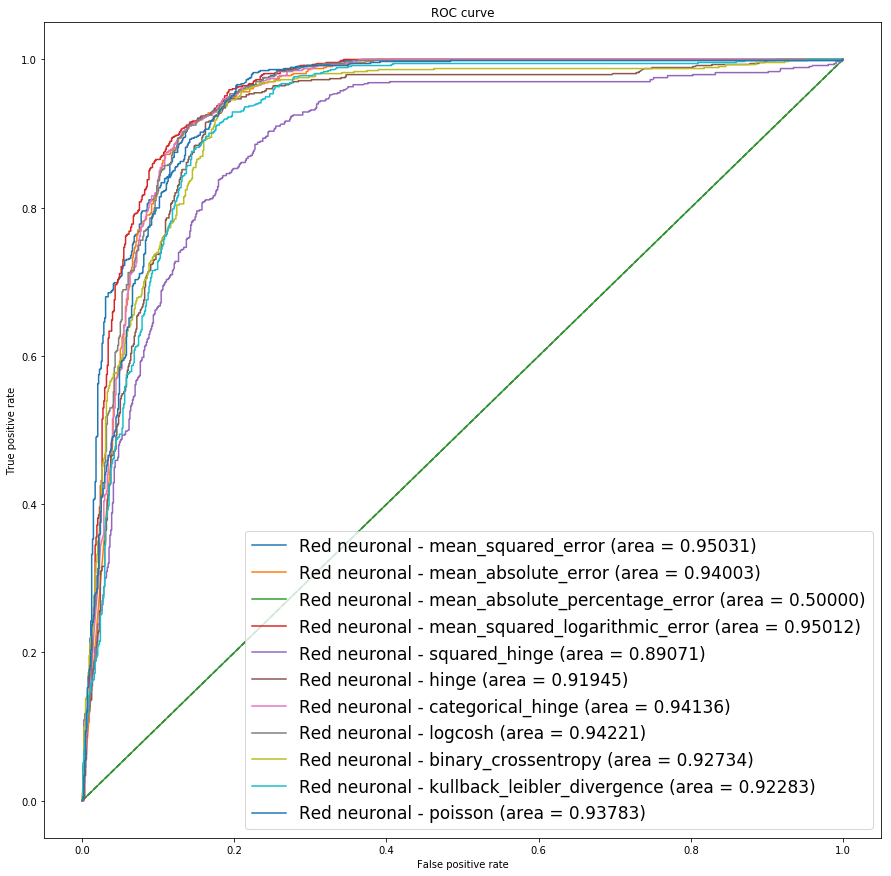

<Figure size 432x288 with 0 Axes>

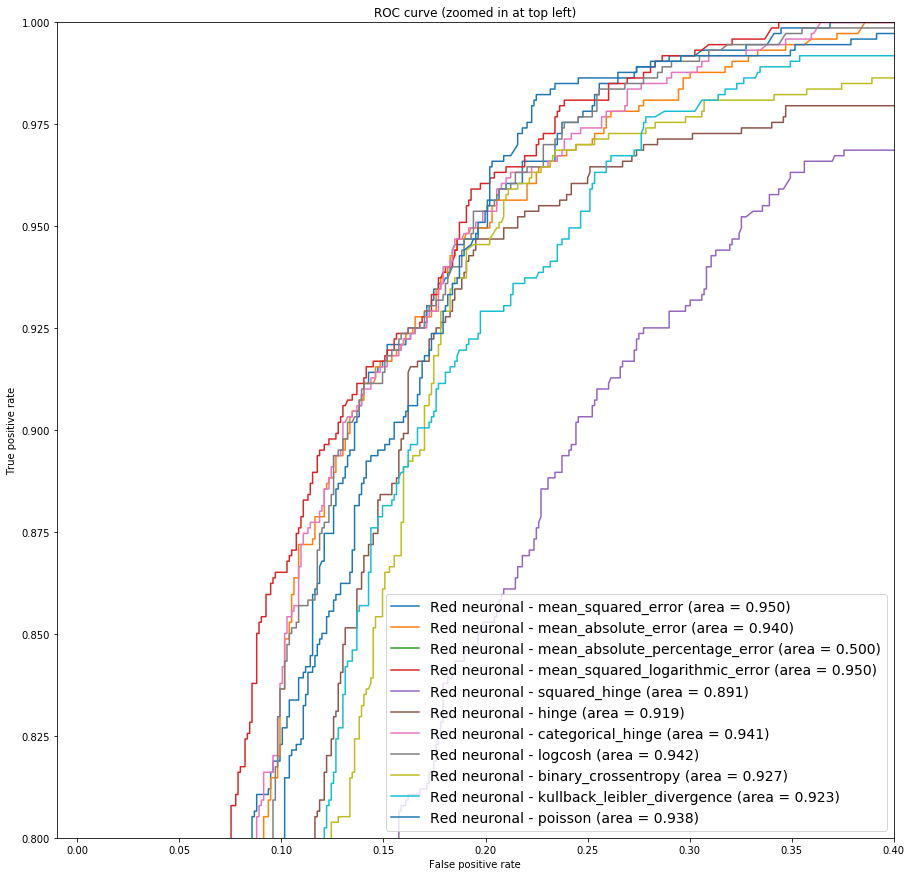

In [38]:
plt.subplots(figsize=(15,15))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='Red neuronal - mean_squared_error (area = {:.5f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Red neuronal - mean_absolute_error (area = {:.5f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Red neuronal - mean_absolute_percentage_error (area = {:.5f})'.format(auc_keras3))
plt.plot(fpr_keras4, tpr_keras4, label='Red neuronal - mean_squared_logarithmic_error (area = {:.5f})'.format(auc_keras4))
plt.plot(fpr_keras5, tpr_keras5, label='Red neuronal - squared_hinge (area = {:.5f})'.format(auc_keras5))
plt.plot(fpr_keras6, tpr_keras6, label='Red neuronal - hinge (area = {:.5f})'.format(auc_keras6))
plt.plot(fpr_keras7, tpr_keras7, label='Red neuronal - categorical_hinge (area = {:.5f})'.format(auc_keras7))
plt.plot(fpr_keras8, tpr_keras8, label='Red neuronal - logcosh (area = {:.5f})'.format(auc_keras8))
plt.plot(fpr_keras9, tpr_keras9, label='Red neuronal - binary_crossentropy (area = {:.5f})'.format(auc_keras9))
plt.plot(fpr_keras10, tpr_keras10, label='Red neuronal - kullback_leibler_divergence (area = {:.5f})'.format(auc_keras10))
plt.plot(fpr_keras11, tpr_keras11, label='Red neuronal - poisson (area = {:.5f})'.format(auc_keras11))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best',prop={'size': 17})
plt.show()

plt.figure(2)
plt.subplots(figsize=(15,15))
plt.xlim(-0.01, 0.4)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='Red neuronal - mean_squared_error (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras2, tpr_keras2, label='Red neuronal - mean_absolute_error (area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Red neuronal - mean_absolute_percentage_error (area = {:.3f})'.format(auc_keras3))
plt.plot(fpr_keras4, tpr_keras4, label='Red neuronal - mean_squared_logarithmic_error (area = {:.3f})'.format(auc_keras4))
plt.plot(fpr_keras5, tpr_keras5, label='Red neuronal - squared_hinge (area = {:.3f})'.format(auc_keras5))
plt.plot(fpr_keras6, tpr_keras6, label='Red neuronal - hinge (area = {:.3f})'.format(auc_keras6))
plt.plot(fpr_keras7, tpr_keras7, label='Red neuronal - categorical_hinge (area = {:.3f})'.format(auc_keras7))
plt.plot(fpr_keras8, tpr_keras8, label='Red neuronal - logcosh (area = {:.3f})'.format(auc_keras8))
plt.plot(fpr_keras9, tpr_keras9, label='Red neuronal - binary_crossentropy (area = {:.3f})'.format(auc_keras9))
plt.plot(fpr_keras10, tpr_keras10, label='Red neuronal - kullback_leibler_divergence (area = {:.3f})'.format(auc_keras10))
plt.plot(fpr_keras11, tpr_keras11, label='Red neuronal - poisson (area = {:.3f})'.format(auc_keras11))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best',prop={'size': 14})

plt.show()

In [39]:
model12.compile(loss='mean_squared_logarithmic_error',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history12 = model12.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 748us/step - loss: 0.1271 - acc: 0.5260 - val_loss: 0.1257 - val_acc: 0.5263
Epoch 2/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1270 - acc: 0.5433 - val_loss: 0.1256 - val_acc: 0.5263
Epoch 3/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1269 - acc: 0.5433 - val_loss: 0.1255 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1268 - acc: 0.5433 - val_loss: 0.1255 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1267 - acc: 0.5433 - val_loss: 0.1254 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1267 - acc: 0.5433 - val_loss: 0.1253 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1266 - acc: 0.5433 - val_loss: 0.1252 - val_acc: 0.5263
Epoch 8/

Epoch 61/2000
462/462 [==============================] - 0s 100us/step - loss: 0.1231 - acc: 0.5433 - val_loss: 0.1223 - val_acc: 0.5263
Epoch 62/2000
462/462 [==============================] - 0s 67us/step - loss: 0.1231 - acc: 0.5433 - val_loss: 0.1223 - val_acc: 0.5263
Epoch 63/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1230 - acc: 0.5433 - val_loss: 0.1223 - val_acc: 0.5263
Epoch 64/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1230 - acc: 0.5433 - val_loss: 0.1222 - val_acc: 0.5263
Epoch 65/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1229 - acc: 0.5433 - val_loss: 0.1222 - val_acc: 0.5263
Epoch 66/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1229 - acc: 0.5433 - val_loss: 0.1221 - val_acc: 0.5263
Epoch 67/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1228 - acc: 0.5433 - val_loss: 0.1221 - val_acc: 0.5263
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.1211 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 122/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1211 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 123/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1210 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 124/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1210 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 125/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1210 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 126/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1210 - acc: 0.5433 - val_loss: 0.1207 - val_acc: 0.5263
Epoch 127/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1210 - acc: 0.5433 - val_loss: 0.1206 - val_acc: 0.5263
Epoch 128/2000
462/462 [==============================] 

Epoch 181/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 182/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 183/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 184/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 185/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 186/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 187/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1200 - acc: 0.5433 - val_loss: 0.1200 - val_acc: 0.5263
Epoch 188/2000
462/462 [=================

462/462 [==============================] - 0s 37us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 241/2000
462/462 [==============================] - 0s 216us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 242/2000
462/462 [==============================] - 0s 106us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 243/2000
462/462 [==============================] - 0s 63us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 244/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 245/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 246/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1195 - acc: 0.5433 - val_loss: 0.1197 - val_acc: 0.5263
Epoch 247/2000
462/462 [==============================

462/462 [==============================] - 0s 157us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 300/2000
462/462 [==============================] - 0s 67us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 301/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 302/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 303/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 304/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 305/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1192 - acc: 0.5433 - val_loss: 0.1195 - val_acc: 0.5263
Epoch 306/2000
462/462 [==============================]

Epoch 359/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 360/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 361/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 362/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 363/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1194 - val_acc: 0.5263
Epoch 364/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 365/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1189 - acc: 0.5433 - val_loss: 0.1193 - val_acc: 0.5263
Epoch 366/2000
462/462 [=================

462/462 [==============================] - 0s 45us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 419/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1188 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 420/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 421/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 422/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 423/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 424/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1187 - acc: 0.5433 - val_loss: 0.1192 - val_acc: 0.5263
Epoch 425/2000
462/462 [==============================] 

462/462 [==============================] - 0s 30us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 478/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 479/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 480/2000
462/462 [==============================] - 0s 250us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 481/2000
462/462 [==============================] - 0s 89us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 482/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 483/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1185 - acc: 0.5433 - val_loss: 0.1190 - val_acc: 0.5263
Epoch 484/2000
462/462 [==============================]

Epoch 537/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 538/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 539/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 540/2000
462/462 [==============================] - 0s 24us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 541/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 542/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 543/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1182 - acc: 0.5433 - val_loss: 0.1187 - val_acc: 0.5263
Epoch 544/2000
462/462 [=================

Epoch 597/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 598/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 599/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 600/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 601/2000
462/462 [==============================] - 0s 278us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 602/2000
462/462 [==============================] - 0s 71us/step - loss: 0.1178 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 603/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1177 - acc: 0.5433 - val_loss: 0.1183 - val_acc: 0.5263
Epoch 604/2000
462/462 [================

Epoch 657/2000
462/462 [==============================] - 0s 65us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 658/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 659/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 660/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 661/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 662/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 663/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1171 - acc: 0.5433 - val_loss: 0.1176 - val_acc: 0.5263
Epoch 664/2000
462/462 [=================

Epoch 717/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1161 - acc: 0.5433 - val_loss: 0.1166 - val_acc: 0.5263
Epoch 718/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1161 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 719/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1160 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 720/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1160 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 721/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1160 - acc: 0.5433 - val_loss: 0.1165 - val_acc: 0.5263
Epoch 722/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1160 - acc: 0.5433 - val_loss: 0.1164 - val_acc: 0.5263
Epoch 723/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1159 - acc: 0.5433 - val_loss: 0.1164 - val_acc: 0.5263
Epoch 724/2000
462/462 [=================

Epoch 777/2000
462/462 [==============================] - 0s 69us/step - loss: 0.1143 - acc: 0.5433 - val_loss: 0.1147 - val_acc: 0.5263
Epoch 778/2000
462/462 [==============================] - 0s 48us/step - loss: 0.1143 - acc: 0.5433 - val_loss: 0.1147 - val_acc: 0.5263
Epoch 779/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1142 - acc: 0.5433 - val_loss: 0.1146 - val_acc: 0.5263
Epoch 780/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1142 - acc: 0.5433 - val_loss: 0.1146 - val_acc: 0.5263
Epoch 781/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1141 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 782/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1141 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 783/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1141 - acc: 0.5433 - val_loss: 0.1145 - val_acc: 0.5263
Epoch 784/2000
462/462 [=================

462/462 [==============================] - 0s 30us/step - loss: 0.1112 - acc: 0.5433 - val_loss: 0.1115 - val_acc: 0.5263
Epoch 837/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1112 - acc: 0.5433 - val_loss: 0.1115 - val_acc: 0.5263
Epoch 838/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1111 - acc: 0.5433 - val_loss: 0.1114 - val_acc: 0.5263
Epoch 839/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1110 - acc: 0.5433 - val_loss: 0.1113 - val_acc: 0.5263
Epoch 840/2000
462/462 [==============================] - 0s 26us/step - loss: 0.1109 - acc: 0.5433 - val_loss: 0.1113 - val_acc: 0.5263
Epoch 841/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1109 - acc: 0.5433 - val_loss: 0.1112 - val_acc: 0.5263
Epoch 842/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1108 - acc: 0.5433 - val_loss: 0.1111 - val_acc: 0.5263
Epoch 843/2000
462/462 [==============================] 

Epoch 896/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1057 - acc: 0.5433 - val_loss: 0.1059 - val_acc: 0.5263
Epoch 897/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1056 - acc: 0.5433 - val_loss: 0.1057 - val_acc: 0.5263
Epoch 898/2000
462/462 [==============================] - 0s 234us/step - loss: 0.1055 - acc: 0.5433 - val_loss: 0.1056 - val_acc: 0.5263
Epoch 899/2000
462/462 [==============================] - 0s 78us/step - loss: 0.1054 - acc: 0.5433 - val_loss: 0.1055 - val_acc: 0.5263
Epoch 900/2000
462/462 [==============================] - 0s 56us/step - loss: 0.1052 - acc: 0.5433 - val_loss: 0.1054 - val_acc: 0.5263
Epoch 901/2000
462/462 [==============================] - 0s 45us/step - loss: 0.1051 - acc: 0.5433 - val_loss: 0.1052 - val_acc: 0.5263
Epoch 902/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1050 - acc: 0.5433 - val_loss: 0.1051 - val_acc: 0.5263
Epoch 903/2000
462/462 [================

Epoch 956/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0968 - acc: 0.5433 - val_loss: 0.0967 - val_acc: 0.5263
Epoch 957/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0967 - acc: 0.5433 - val_loss: 0.0966 - val_acc: 0.5263
Epoch 958/2000
462/462 [==============================] - 0s 31us/step - loss: 0.0965 - acc: 0.5433 - val_loss: 0.0964 - val_acc: 0.5263
Epoch 959/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0963 - acc: 0.5433 - val_loss: 0.0962 - val_acc: 0.5263
Epoch 960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0961 - acc: 0.5433 - val_loss: 0.0960 - val_acc: 0.5263
Epoch 961/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0960 - acc: 0.5433 - val_loss: 0.0958 - val_acc: 0.5263
Epoch 962/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0958 - acc: 0.5433 - val_loss: 0.0956 - val_acc: 0.5263
Epoch 963/2000
462/462 [=================

462/462 [==============================] - 0s 165us/step - loss: 0.0855 - acc: 0.5433 - val_loss: 0.0851 - val_acc: 0.5307
Epoch 1016/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0853 - acc: 0.5433 - val_loss: 0.0849 - val_acc: 0.5307
Epoch 1017/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0851 - acc: 0.5433 - val_loss: 0.0847 - val_acc: 0.5307
Epoch 1018/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0849 - acc: 0.5455 - val_loss: 0.0845 - val_acc: 0.5307
Epoch 1019/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0847 - acc: 0.5455 - val_loss: 0.0843 - val_acc: 0.5307
Epoch 1020/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0845 - acc: 0.5455 - val_loss: 0.0841 - val_acc: 0.5307
Epoch 1021/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0843 - acc: 0.5455 - val_loss: 0.0839 - val_acc: 0.5307
Epoch 1022/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0743 - acc: 0.6905 - val_loss: 0.0736 - val_acc: 0.7018
Epoch 1075/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0741 - acc: 0.6948 - val_loss: 0.0734 - val_acc: 0.7018
Epoch 1076/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0739 - acc: 0.7013 - val_loss: 0.0732 - val_acc: 0.7061
Epoch 1077/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0738 - acc: 0.7035 - val_loss: 0.0730 - val_acc: 0.7061
Epoch 1078/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0736 - acc: 0.7056 - val_loss: 0.0729 - val_acc: 0.7061
Epoch 1079/2000
462/462 [==============================] - 0s 316us/step - loss: 0.0734 - acc: 0.7121 - val_loss: 0.0727 - val_acc: 0.7105
Epoch 1080/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0733 - acc: 0.7143 - val_loss: 0.0725 - val_acc: 0.7149
Epoch 1081/2000
462/462 [========================

462/462 [==============================] - 0s 56us/step - loss: 0.0650 - acc: 0.8052 - val_loss: 0.0641 - val_acc: 0.8202
Epoch 1134/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0649 - acc: 0.8074 - val_loss: 0.0640 - val_acc: 0.8202
Epoch 1135/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0647 - acc: 0.8074 - val_loss: 0.0638 - val_acc: 0.8202
Epoch 1136/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0646 - acc: 0.8074 - val_loss: 0.0637 - val_acc: 0.8202
Epoch 1137/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0644 - acc: 0.8095 - val_loss: 0.0635 - val_acc: 0.8202
Epoch 1138/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0643 - acc: 0.8117 - val_loss: 0.0634 - val_acc: 0.8202
Epoch 1139/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0642 - acc: 0.8117 - val_loss: 0.0633 - val_acc: 0.8202
Epoch 1140/2000
462/462 [=========================

462/462 [==============================] - 0s 268us/step - loss: 0.0577 - acc: 0.8333 - val_loss: 0.0570 - val_acc: 0.8333
Epoch 1193/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0576 - acc: 0.8355 - val_loss: 0.0569 - val_acc: 0.8333
Epoch 1194/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0575 - acc: 0.8398 - val_loss: 0.0568 - val_acc: 0.8333
Epoch 1195/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0574 - acc: 0.8398 - val_loss: 0.0567 - val_acc: 0.8333
Epoch 1196/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0573 - acc: 0.8420 - val_loss: 0.0566 - val_acc: 0.8377
Epoch 1197/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0572 - acc: 0.8420 - val_loss: 0.0565 - val_acc: 0.8377
Epoch 1198/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0571 - acc: 0.8420 - val_loss: 0.0564 - val_acc: 0.8377
Epoch 1199/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0523 - acc: 0.8398 - val_loss: 0.0521 - val_acc: 0.8509
Epoch 1252/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0523 - acc: 0.8398 - val_loss: 0.0520 - val_acc: 0.8509
Epoch 1253/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0522 - acc: 0.8398 - val_loss: 0.0519 - val_acc: 0.8509
Epoch 1254/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0521 - acc: 0.8398 - val_loss: 0.0519 - val_acc: 0.8509
Epoch 1255/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0520 - acc: 0.8398 - val_loss: 0.0518 - val_acc: 0.8509
Epoch 1256/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0519 - acc: 0.8398 - val_loss: 0.0518 - val_acc: 0.8465
Epoch 1257/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0519 - acc: 0.8398 - val_loss: 0.0517 - val_acc: 0.8465
Epoch 1258/2000
462/462 [=========================

462/462 [==============================] - 0s 50us/step - loss: 0.0483 - acc: 0.8615 - val_loss: 0.0487 - val_acc: 0.8553
Epoch 1311/2000
462/462 [==============================] - 0s 260us/step - loss: 0.0483 - acc: 0.8615 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 1312/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0482 - acc: 0.8615 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 1313/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0482 - acc: 0.8615 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 1314/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0481 - acc: 0.8615 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 1315/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0480 - acc: 0.8615 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 1316/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0480 - acc: 0.8615 - val_loss: 0.0484 - val_acc: 0.8553
Epoch 1317/2000
462/462 [========================

462/462 [==============================] - 0s 43us/step - loss: 0.0454 - acc: 0.8701 - val_loss: 0.0465 - val_acc: 0.8553
Epoch 1370/2000
462/462 [==============================] - 0s 268us/step - loss: 0.0454 - acc: 0.8701 - val_loss: 0.0465 - val_acc: 0.8553
Epoch 1371/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0453 - acc: 0.8701 - val_loss: 0.0464 - val_acc: 0.8553
Epoch 1372/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0453 - acc: 0.8723 - val_loss: 0.0464 - val_acc: 0.8553
Epoch 1373/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0452 - acc: 0.8723 - val_loss: 0.0464 - val_acc: 0.8553
Epoch 1374/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0452 - acc: 0.8745 - val_loss: 0.0464 - val_acc: 0.8553
Epoch 1375/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0451 - acc: 0.8745 - val_loss: 0.0463 - val_acc: 0.8553
Epoch 1376/2000
462/462 [========================

462/462 [==============================] - 0s 28us/step - loss: 0.0432 - acc: 0.8853 - val_loss: 0.0451 - val_acc: 0.8596
Epoch 1429/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0432 - acc: 0.8853 - val_loss: 0.0450 - val_acc: 0.8596
Epoch 1430/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0431 - acc: 0.8853 - val_loss: 0.0450 - val_acc: 0.8596
Epoch 1431/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0431 - acc: 0.8853 - val_loss: 0.0450 - val_acc: 0.8596
Epoch 1432/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0431 - acc: 0.8853 - val_loss: 0.0450 - val_acc: 0.8596
Epoch 1433/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0430 - acc: 0.8853 - val_loss: 0.0449 - val_acc: 0.8596
Epoch 1434/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0430 - acc: 0.8853 - val_loss: 0.0449 - val_acc: 0.8596
Epoch 1435/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0415 - acc: 0.8896 - val_loss: 0.0441 - val_acc: 0.8640
Epoch 1488/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0415 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1489/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0414 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1490/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0414 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1491/2000
462/462 [==============================] - 0s 239us/step - loss: 0.0414 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1492/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0414 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1493/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0413 - acc: 0.8896 - val_loss: 0.0440 - val_acc: 0.8640
Epoch 1494/2000
462/462 [========================

462/462 [==============================] - 0s 236us/step - loss: 0.0401 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1547/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0401 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1548/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0401 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1549/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0400 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1550/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0400 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1551/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0400 - acc: 0.8918 - val_loss: 0.0432 - val_acc: 0.8596
Epoch 1552/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0400 - acc: 0.8918 - val_loss: 0.0431 - val_acc: 0.8596
Epoch 1553/2000
462/462 [========================

Epoch 1605/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0390 - acc: 0.8939 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 1606/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0390 - acc: 0.8939 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 1607/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0390 - acc: 0.8939 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 1608/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0390 - acc: 0.8939 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 1609/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0390 - acc: 0.8939 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 1610/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0389 - acc: 0.8939 - val_loss: 0.0425 - val_acc: 0.8684
Epoch 1611/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0389 - acc: 0.8939 - val_loss: 0.0425 - val_acc: 0.8684
Epoch 1612/2000
462/462 [=========

462/462 [==============================] - 0s 61us/step - loss: 0.0381 - acc: 0.8961 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1665/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0381 - acc: 0.8983 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1666/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0381 - acc: 0.8983 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1667/2000
462/462 [==============================] - 0s 42us/step - loss: 0.0381 - acc: 0.8961 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1668/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0381 - acc: 0.8961 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1669/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0380 - acc: 0.8939 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1670/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0380 - acc: 0.8961 - val_loss: 0.0421 - val_acc: 0.8728
Epoch 1671/2000
462/462 [=========================

462/462 [==============================] - 0s 84us/step - loss: 0.0374 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1724/2000
462/462 [==============================] - 0s 175us/step - loss: 0.0374 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1725/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0373 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1726/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0373 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1727/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0373 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1728/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0373 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1729/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0373 - acc: 0.9026 - val_loss: 0.0417 - val_acc: 0.8728
Epoch 1730/2000
462/462 [========================

462/462 [==============================] - 0s 39us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1783/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1784/2000
462/462 [==============================] - 0s 34us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1785/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1786/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1787/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1788/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0367 - acc: 0.9026 - val_loss: 0.0414 - val_acc: 0.8728
Epoch 1789/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1842/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1843/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1844/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1845/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1846/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1847/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0362 - acc: 0.9091 - val_loss: 0.0412 - val_acc: 0.8772
Epoch 1848/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1901/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1902/2000
462/462 [==============================] - 0s 262us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1903/2000
462/462 [==============================] - 0s 89us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1904/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1905/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1906/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0358 - acc: 0.9091 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 1907/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1960/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1961/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1962/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1963/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1964/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1965/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0354 - acc: 0.9091 - val_loss: 0.0409 - val_acc: 0.8772
Epoch 1966/2000
462/462 [=========================

In [40]:
y_pred_sgd = model12.predict(X_test)
fpr_keras12, tpr_keras12, thresholds_keras = roc_curve(y_test, y_pred_sgd)

In [41]:
model13.compile(loss='mean_squared_logarithmic_error',
              optimizer='rmsprop',
              metrics=['accuracy'])
                   
history13 = model13.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 893us/step - loss: 0.1264 - acc: 0.6797 - val_loss: 0.1239 - val_acc: 0.7105
Epoch 2/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1247 - acc: 0.7229 - val_loss: 0.1217 - val_acc: 0.7632
Epoch 3/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1225 - acc: 0.7641 - val_loss: 0.1187 - val_acc: 0.7895
Epoch 4/2000
462/462 [==============================] - 0s 28us/step - loss: 0.1195 - acc: 0.7835 - val_loss: 0.1152 - val_acc: 0.7939
Epoch 5/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1161 - acc: 0.7879 - val_loss: 0.1109 - val_acc: 0.8070
Epoch 6/2000
462/462 [==============================] - 0s 37us/step - loss: 0.1121 - acc: 0.7987 - val_loss: 0.1068 - val_acc: 0.8158
Epoch 7/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1080 - acc: 0.8074 - val_loss: 0.1026 - val_acc: 0.8202
Epoch 8/

Epoch 61/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0302 - acc: 0.9242 - val_loss: 0.0422 - val_acc: 0.8684
Epoch 62/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0300 - acc: 0.9264 - val_loss: 0.0419 - val_acc: 0.8684
Epoch 63/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0301 - acc: 0.9242 - val_loss: 0.0421 - val_acc: 0.8684
Epoch 64/2000
462/462 [==============================] - 0s 342us/step - loss: 0.0299 - acc: 0.9286 - val_loss: 0.0424 - val_acc: 0.8684
Epoch 65/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0298 - acc: 0.9264 - val_loss: 0.0422 - val_acc: 0.8684
Epoch 66/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0297 - acc: 0.9307 - val_loss: 0.0422 - val_acc: 0.8684
Epoch 67/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0296 - acc: 0.9286 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 28us/step - loss: 0.0264 - acc: 0.9351 - val_loss: 0.0452 - val_acc: 0.8596
Epoch 122/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0265 - acc: 0.9394 - val_loss: 0.0447 - val_acc: 0.8596
Epoch 123/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0264 - acc: 0.9351 - val_loss: 0.0448 - val_acc: 0.8596
Epoch 124/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0264 - acc: 0.9351 - val_loss: 0.0444 - val_acc: 0.8640
Epoch 125/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0265 - acc: 0.9329 - val_loss: 0.0448 - val_acc: 0.8640
Epoch 126/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0264 - acc: 0.9351 - val_loss: 0.0449 - val_acc: 0.8640
Epoch 127/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0264 - acc: 0.9372 - val_loss: 0.0448 - val_acc: 0.8640
Epoch 128/2000
462/462 [==============================] 

Epoch 181/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0242 - acc: 0.9416 - val_loss: 0.0485 - val_acc: 0.8509
Epoch 182/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0486 - val_acc: 0.8509
Epoch 183/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0242 - acc: 0.9394 - val_loss: 0.0490 - val_acc: 0.8509
Epoch 184/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0242 - acc: 0.9416 - val_loss: 0.0490 - val_acc: 0.8509
Epoch 185/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0241 - acc: 0.9416 - val_loss: 0.0482 - val_acc: 0.8509
Epoch 186/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0239 - acc: 0.9394 - val_loss: 0.0478 - val_acc: 0.8509
Epoch 187/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0240 - acc: 0.9372 - val_loss: 0.0481 - val_acc: 0.8509
Epoch 188/2000
462/462 [=================

Epoch 241/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0225 - acc: 0.9394 - val_loss: 0.0509 - val_acc: 0.8596
Epoch 242/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0225 - acc: 0.9394 - val_loss: 0.0510 - val_acc: 0.8596
Epoch 243/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0225 - acc: 0.9394 - val_loss: 0.0507 - val_acc: 0.8596
Epoch 244/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0223 - acc: 0.9394 - val_loss: 0.0504 - val_acc: 0.8640
Epoch 245/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0224 - acc: 0.9372 - val_loss: 0.0507 - val_acc: 0.8596
Epoch 246/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0223 - acc: 0.9394 - val_loss: 0.0505 - val_acc: 0.8640
Epoch 247/2000
462/462 [==============================] - 0s 134us/step - loss: 0.0225 - acc: 0.9372 - val_loss: 0.0509 - val_acc: 0.8640
Epoch 248/2000
462/462 [================

Epoch 301/2000
462/462 [==============================] - 0s 40us/step - loss: 0.0218 - acc: 0.9437 - val_loss: 0.0523 - val_acc: 0.8596
Epoch 302/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0516 - val_acc: 0.8640
Epoch 303/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0213 - acc: 0.9459 - val_loss: 0.0515 - val_acc: 0.8640
Epoch 304/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0522 - val_acc: 0.8596
Epoch 305/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0212 - acc: 0.9459 - val_loss: 0.0520 - val_acc: 0.8596
Epoch 306/2000
462/462 [==============================] - 0s 33us/step - loss: 0.0212 - acc: 0.9437 - val_loss: 0.0526 - val_acc: 0.8596
Epoch 307/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0211 - acc: 0.9502 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 308/2000
462/462 [=================

462/462 [==============================] - 0s 54us/step - loss: 0.0208 - acc: 0.9437 - val_loss: 0.0523 - val_acc: 0.8596
Epoch 361/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0206 - acc: 0.9437 - val_loss: 0.0519 - val_acc: 0.8640
Epoch 362/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0207 - acc: 0.9502 - val_loss: 0.0529 - val_acc: 0.8596
Epoch 363/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0205 - acc: 0.9459 - val_loss: 0.0528 - val_acc: 0.8596
Epoch 364/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0206 - acc: 0.9437 - val_loss: 0.0524 - val_acc: 0.8596
Epoch 365/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0205 - acc: 0.9524 - val_loss: 0.0533 - val_acc: 0.8596
Epoch 366/2000
462/462 [==============================] - 0s 311us/step - loss: 0.0206 - acc: 0.9459 - val_loss: 0.0526 - val_acc: 0.8640
Epoch 367/2000
462/462 [==============================]

462/462 [==============================] - 0s 71us/step - loss: 0.0201 - acc: 0.9481 - val_loss: 0.0541 - val_acc: 0.8596
Epoch 420/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0201 - acc: 0.9502 - val_loss: 0.0528 - val_acc: 0.8640
Epoch 421/2000
462/462 [==============================] - ETA: 0s - loss: 0.0269 - acc: 0.940 - 0s 39us/step - loss: 0.0201 - acc: 0.9481 - val_loss: 0.0529 - val_acc: 0.8684
Epoch 422/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0203 - acc: 0.9502 - val_loss: 0.0530 - val_acc: 0.8640
Epoch 423/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0201 - acc: 0.9524 - val_loss: 0.0528 - val_acc: 0.8640
Epoch 424/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0522 - val_acc: 0.8728
Epoch 425/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0202 - acc: 0.9481 - val_loss: 0.0517 - val_acc: 0.8684
Epoch 426/2000
462

462/462 [==============================] - 0s 65us/step - loss: 0.0197 - acc: 0.9502 - val_loss: 0.0544 - val_acc: 0.8640
Epoch 479/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0196 - acc: 0.9502 - val_loss: 0.0545 - val_acc: 0.8640
Epoch 480/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0198 - acc: 0.9481 - val_loss: 0.0538 - val_acc: 0.8684
Epoch 481/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0199 - acc: 0.9502 - val_loss: 0.0538 - val_acc: 0.8684
Epoch 482/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0196 - acc: 0.9545 - val_loss: 0.0544 - val_acc: 0.8640
Epoch 483/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0198 - acc: 0.9481 - val_loss: 0.0544 - val_acc: 0.8640
Epoch 484/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0197 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8684
Epoch 485/2000
462/462 [==============================] 

462/462 [==============================] - 0s 35us/step - loss: 0.0195 - acc: 0.9524 - val_loss: 0.0545 - val_acc: 0.8640
Epoch 538/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0195 - acc: 0.9502 - val_loss: 0.0544 - val_acc: 0.8728
Epoch 539/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0195 - acc: 0.9545 - val_loss: 0.0547 - val_acc: 0.8684
Epoch 540/2000
462/462 [==============================] - 0s 337us/step - loss: 0.0197 - acc: 0.9545 - val_loss: 0.0546 - val_acc: 0.8728
Epoch 541/2000
462/462 [==============================] - 0s 110us/step - loss: 0.0195 - acc: 0.9545 - val_loss: 0.0553 - val_acc: 0.8640
Epoch 542/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0193 - acc: 0.9502 - val_loss: 0.0558 - val_acc: 0.8640
Epoch 543/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0193 - acc: 0.9524 - val_loss: 0.0546 - val_acc: 0.8640
Epoch 544/2000
462/462 [==============================

Epoch 597/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0194 - acc: 0.9502 - val_loss: 0.0553 - val_acc: 0.8684
Epoch 598/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0192 - acc: 0.9524 - val_loss: 0.0565 - val_acc: 0.8640
Epoch 599/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0195 - acc: 0.9524 - val_loss: 0.0561 - val_acc: 0.8640
Epoch 600/2000
462/462 [==============================] - 0s 330us/step - loss: 0.0190 - acc: 0.9545 - val_loss: 0.0544 - val_acc: 0.8728
Epoch 601/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0196 - acc: 0.9545 - val_loss: 0.0553 - val_acc: 0.8640
Epoch 602/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0194 - acc: 0.9524 - val_loss: 0.0559 - val_acc: 0.8640
Epoch 603/2000
462/462 [==============================] - 0s 81us/step - loss: 0.0191 - acc: 0.9524 - val_loss: 0.0556 - val_acc: 0.8640
Epoch 604/2000
462/462 [================

462/462 [==============================] - 0s 50us/step - loss: 0.0190 - acc: 0.9524 - val_loss: 0.0551 - val_acc: 0.8684
Epoch 657/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0191 - acc: 0.9502 - val_loss: 0.0558 - val_acc: 0.8640
Epoch 658/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0190 - acc: 0.9502 - val_loss: 0.0553 - val_acc: 0.8684
Epoch 659/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0191 - acc: 0.9524 - val_loss: 0.0553 - val_acc: 0.8684
Epoch 660/2000
462/462 [==============================] - 0s 270us/step - loss: 0.0191 - acc: 0.9524 - val_loss: 0.0548 - val_acc: 0.8728
Epoch 661/2000
462/462 [==============================] - 0s 162us/step - loss: 0.0192 - acc: 0.9545 - val_loss: 0.0561 - val_acc: 0.8640
Epoch 662/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0190 - acc: 0.9524 - val_loss: 0.0555 - val_acc: 0.8640
Epoch 663/2000
462/462 [==============================

Epoch 716/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0188 - acc: 0.9524 - val_loss: 0.0556 - val_acc: 0.8728
Epoch 717/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0187 - acc: 0.9545 - val_loss: 0.0558 - val_acc: 0.8728
Epoch 718/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0188 - acc: 0.9524 - val_loss: 0.0559 - val_acc: 0.8684
Epoch 719/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0185 - acc: 0.9567 - val_loss: 0.0563 - val_acc: 0.8684
Epoch 720/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0190 - acc: 0.9567 - val_loss: 0.0556 - val_acc: 0.8728
Epoch 721/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0188 - acc: 0.9502 - val_loss: 0.0558 - val_acc: 0.8684
Epoch 722/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0189 - acc: 0.9524 - val_loss: 0.0556 - val_acc: 0.8728
Epoch 723/2000
462/462 [=================

Epoch 776/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0184 - acc: 0.9567 - val_loss: 0.0557 - val_acc: 0.8728
Epoch 777/2000
462/462 [==============================] - 0s 221us/step - loss: 0.0186 - acc: 0.9545 - val_loss: 0.0557 - val_acc: 0.8728
Epoch 778/2000
462/462 [==============================] - 0s 119us/step - loss: 0.0187 - acc: 0.9545 - val_loss: 0.0565 - val_acc: 0.8684
Epoch 779/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0188 - acc: 0.9545 - val_loss: 0.0558 - val_acc: 0.8728
Epoch 780/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0187 - acc: 0.9589 - val_loss: 0.0562 - val_acc: 0.8640
Epoch 781/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0186 - acc: 0.9545 - val_loss: 0.0564 - val_acc: 0.8684
Epoch 782/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0185 - acc: 0.9545 - val_loss: 0.0570 - val_acc: 0.8596
Epoch 783/2000
462/462 [===============

462/462 [==============================] - 0s 61us/step - loss: 0.0186 - acc: 0.9545 - val_loss: 0.0562 - val_acc: 0.8728
Epoch 836/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0185 - acc: 0.9567 - val_loss: 0.0566 - val_acc: 0.8640
Epoch 837/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0186 - acc: 0.9502 - val_loss: 0.0564 - val_acc: 0.8640
Epoch 838/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0183 - acc: 0.9567 - val_loss: 0.0565 - val_acc: 0.8684
Epoch 839/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0188 - acc: 0.9524 - val_loss: 0.0566 - val_acc: 0.8640
Epoch 840/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0184 - acc: 0.9545 - val_loss: 0.0564 - val_acc: 0.8684
Epoch 841/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0185 - acc: 0.9545 - val_loss: 0.0563 - val_acc: 0.8728
Epoch 842/2000
462/462 [==============================] 

Epoch 895/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0573 - val_acc: 0.8640
Epoch 896/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0184 - acc: 0.9545 - val_loss: 0.0581 - val_acc: 0.8596
Epoch 897/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0187 - acc: 0.9524 - val_loss: 0.0564 - val_acc: 0.8684
Epoch 898/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0181 - acc: 0.9567 - val_loss: 0.0567 - val_acc: 0.8684
Epoch 899/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0184 - acc: 0.9567 - val_loss: 0.0569 - val_acc: 0.8640
Epoch 900/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0182 - acc: 0.9589 - val_loss: 0.0570 - val_acc: 0.8640
Epoch 901/2000
462/462 [==============================] - 0s 247us/step - loss: 0.0181 - acc: 0.9567 - val_loss: 0.0563 - val_acc: 0.8684
Epoch 902/2000
462/462 [================

Epoch 955/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0186 - acc: 0.9545 - val_loss: 0.0573 - val_acc: 0.8596
Epoch 956/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0182 - acc: 0.9524 - val_loss: 0.0564 - val_acc: 0.8728
Epoch 957/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0184 - acc: 0.9545 - val_loss: 0.0565 - val_acc: 0.8728
Epoch 958/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0180 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.8640
Epoch 959/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0181 - acc: 0.9567 - val_loss: 0.0567 - val_acc: 0.8684
Epoch 960/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0182 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.8596
Epoch 961/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0185 - acc: 0.9545 - val_loss: 0.0564 - val_acc: 0.8728
Epoch 962/2000
462/462 [=================

462/462 [==============================] - 0s 28us/step - loss: 0.0182 - acc: 0.9567 - val_loss: 0.0567 - val_acc: 0.8684
Epoch 1015/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0178 - acc: 0.9589 - val_loss: 0.0573 - val_acc: 0.8640
Epoch 1016/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0183 - acc: 0.9567 - val_loss: 0.0564 - val_acc: 0.8684
Epoch 1017/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0180 - acc: 0.9589 - val_loss: 0.0569 - val_acc: 0.8684
Epoch 1018/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0186 - acc: 0.9502 - val_loss: 0.0571 - val_acc: 0.8684
Epoch 1019/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0180 - acc: 0.9589 - val_loss: 0.0570 - val_acc: 0.8596
Epoch 1020/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0181 - acc: 0.9545 - val_loss: 0.0570 - val_acc: 0.8640
Epoch 1021/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0182 - acc: 0.9524 - val_loss: 0.0570 - val_acc: 0.8640
Epoch 1074/2000
462/462 [==============================] - 0s 278us/step - loss: 0.0178 - acc: 0.9589 - val_loss: 0.0574 - val_acc: 0.8640
Epoch 1075/2000
462/462 [==============================] - 0s 102us/step - loss: 0.0181 - acc: 0.9567 - val_loss: 0.0578 - val_acc: 0.8640
Epoch 1076/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0177 - acc: 0.9589 - val_loss: 0.0577 - val_acc: 0.8640
Epoch 1077/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0183 - acc: 0.9545 - val_loss: 0.0575 - val_acc: 0.8640
Epoch 1078/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0178 - acc: 0.9567 - val_loss: 0.0573 - val_acc: 0.8596
Epoch 1079/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0177 - acc: 0.9567 - val_loss: 0.0574 - val_acc: 0.8596
Epoch 1080/2000
462/462 [=======================

462/462 [==============================] - 0s 50us/step - loss: 0.0181 - acc: 0.9589 - val_loss: 0.0579 - val_acc: 0.8640
Epoch 1133/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0182 - acc: 0.9589 - val_loss: 0.0582 - val_acc: 0.8640
Epoch 1134/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0182 - acc: 0.9589 - val_loss: 0.0577 - val_acc: 0.8596
Epoch 1135/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0178 - acc: 0.9567 - val_loss: 0.0579 - val_acc: 0.8640
Epoch 1136/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0173 - acc: 0.9524 - val_loss: 0.0574 - val_acc: 0.8596
Epoch 1137/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0173 - acc: 0.9632 - val_loss: 0.0574 - val_acc: 0.8640
Epoch 1138/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0180 - acc: 0.9567 - val_loss: 0.0573 - val_acc: 0.8596
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0178 - acc: 0.9589 - val_loss: 0.0575 - val_acc: 0.8640
Epoch 1192/2000
462/462 [==============================] - 0s 248us/step - loss: 0.0182 - acc: 0.9589 - val_loss: 0.0576 - val_acc: 0.8684
Epoch 1193/2000
462/462 [==============================] - 0s 128us/step - loss: 0.0173 - acc: 0.9545 - val_loss: 0.0578 - val_acc: 0.8596
Epoch 1194/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0179 - acc: 0.9524 - val_loss: 0.0575 - val_acc: 0.8640
Epoch 1195/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0589 - val_acc: 0.8640
Epoch 1196/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0184 - acc: 0.9524 - val_loss: 0.0574 - val_acc: 0.8684
Epoch 1197/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0176 - acc: 0.9589 - val_loss: 0.0579 - val_acc: 0.8596
Epoch 1198/2000
462/462 [=======================

Epoch 1250/2000
462/462 [==============================] - 0s 231us/step - loss: 0.0177 - acc: 0.9589 - val_loss: 0.0578 - val_acc: 0.8596
Epoch 1251/2000
462/462 [==============================] - 0s 137us/step - loss: 0.0179 - acc: 0.9567 - val_loss: 0.0578 - val_acc: 0.8596
Epoch 1252/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0575 - val_acc: 0.8684
Epoch 1253/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0576 - val_acc: 0.8640
Epoch 1254/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0176 - acc: 0.9567 - val_loss: 0.0582 - val_acc: 0.8553
Epoch 1255/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0174 - acc: 0.9610 - val_loss: 0.0580 - val_acc: 0.8596
Epoch 1256/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0178 - acc: 0.9610 - val_loss: 0.0580 - val_acc: 0.8596
Epoch 1257/2000
462/462 [=======

462/462 [==============================] - 0s 35us/step - loss: 0.0176 - acc: 0.9589 - val_loss: 0.0577 - val_acc: 0.8640
Epoch 1310/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0582 - val_acc: 0.8640
Epoch 1311/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0177 - acc: 0.9545 - val_loss: 0.0578 - val_acc: 0.8640
Epoch 1312/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0178 - acc: 0.9524 - val_loss: 0.0589 - val_acc: 0.8640
Epoch 1313/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0174 - acc: 0.9589 - val_loss: 0.0580 - val_acc: 0.8553
Epoch 1314/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0175 - acc: 0.9524 - val_loss: 0.0583 - val_acc: 0.8640
Epoch 1315/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0179 - acc: 0.9610 - val_loss: 0.0582 - val_acc: 0.8596
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 48us/step - loss: 0.0176 - acc: 0.9589 - val_loss: 0.0583 - val_acc: 0.8553
Epoch 1369/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0172 - acc: 0.9567 - val_loss: 0.0604 - val_acc: 0.8684
Epoch 1370/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0170 - acc: 0.9632 - val_loss: 0.0584 - val_acc: 0.8640
Epoch 1371/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0173 - acc: 0.9567 - val_loss: 0.0585 - val_acc: 0.8640
Epoch 1372/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0173 - acc: 0.9589 - val_loss: 0.0585 - val_acc: 0.8596
Epoch 1373/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0175 - acc: 0.9610 - val_loss: 0.0587 - val_acc: 0.8640
Epoch 1374/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0181 - acc: 0.9545 - val_loss: 0.0584 - val_acc: 0.8640
Epoch 1375/2000
462/462 [=========================

462/462 [==============================] - 0s 246us/step - loss: 0.0175 - acc: 0.9589 - val_loss: 0.0586 - val_acc: 0.8640
Epoch 1428/2000
462/462 [==============================] - 0s 81us/step - loss: 0.0170 - acc: 0.9610 - val_loss: 0.0588 - val_acc: 0.8553
Epoch 1429/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0178 - acc: 0.9567 - val_loss: 0.0586 - val_acc: 0.8640
Epoch 1430/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0174 - acc: 0.9589 - val_loss: 0.0588 - val_acc: 0.8596
Epoch 1431/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0176 - acc: 0.9589 - val_loss: 0.0586 - val_acc: 0.8684
Epoch 1432/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0587 - val_acc: 0.8640
Epoch 1433/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0175 - acc: 0.9545 - val_loss: 0.0585 - val_acc: 0.8640
Epoch 1434/2000
462/462 [========================

462/462 [==============================] - 0s 123us/step - loss: 0.0177 - acc: 0.9589 - val_loss: 0.0587 - val_acc: 0.8640
Epoch 1487/2000
462/462 [==============================] - 0s 324us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0585 - val_acc: 0.8640
Epoch 1488/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0584 - val_acc: 0.8640
Epoch 1489/2000
462/462 [==============================] - 0s 121us/step - loss: 0.0172 - acc: 0.9589 - val_loss: 0.0586 - val_acc: 0.8596
Epoch 1490/2000
462/462 [==============================] - 0s 111us/step - loss: 0.0173 - acc: 0.9589 - val_loss: 0.0586 - val_acc: 0.8640
Epoch 1491/2000
462/462 [==============================] - 0s 311us/step - loss: 0.0173 - acc: 0.9632 - val_loss: 0.0587 - val_acc: 0.8640
Epoch 1492/2000
462/462 [==============================] - 0s 152us/step - loss: 0.0171 - acc: 0.9589 - val_loss: 0.0586 - val_acc: 0.8596
Epoch 1493/2000
462/462 [===================

462/462 [==============================] - 0s 54us/step - loss: 0.0169 - acc: 0.9610 - val_loss: 0.0589 - val_acc: 0.8596
Epoch 1546/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0590 - val_acc: 0.8640
Epoch 1547/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0172 - acc: 0.9567 - val_loss: 0.0591 - val_acc: 0.8553
Epoch 1548/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0589 - val_acc: 0.8640
Epoch 1549/2000
462/462 [==============================] - 0s 260us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0590 - val_acc: 0.8640
Epoch 1550/2000
462/462 [==============================] - 0s 128us/step - loss: 0.0172 - acc: 0.9589 - val_loss: 0.0591 - val_acc: 0.8640
Epoch 1551/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0170 - acc: 0.9589 - val_loss: 0.0590 - val_acc: 0.8596
Epoch 1552/2000
462/462 [=======================

462/462 [==============================] - 0s 26us/step - loss: 0.0171 - acc: 0.9632 - val_loss: 0.0593 - val_acc: 0.8596
Epoch 1605/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0169 - acc: 0.9589 - val_loss: 0.0594 - val_acc: 0.8596
Epoch 1606/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0162 - acc: 0.9632 - val_loss: 0.0595 - val_acc: 0.8596
Epoch 1607/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0169 - acc: 0.9610 - val_loss: 0.0594 - val_acc: 0.8640
Epoch 1608/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0597 - val_acc: 0.8596
Epoch 1609/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0177 - acc: 0.9567 - val_loss: 0.0595 - val_acc: 0.8596
Epoch 1610/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0171 - acc: 0.9589 - val_loss: 0.0595 - val_acc: 0.8640
Epoch 1611/2000
462/462 [=========================

462/462 [==============================] - 0s 208us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0593 - val_acc: 0.8553
Epoch 1664/2000
462/462 [==============================] - 0s 100us/step - loss: 0.0170 - acc: 0.9589 - val_loss: 0.0592 - val_acc: 0.8640
Epoch 1665/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0595 - val_acc: 0.8596
Epoch 1666/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0595 - val_acc: 0.8596
Epoch 1667/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0171 - acc: 0.9567 - val_loss: 0.0595 - val_acc: 0.8640
Epoch 1668/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0171 - acc: 0.9610 - val_loss: 0.0593 - val_acc: 0.8640
Epoch 1669/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0171 - acc: 0.9589 - val_loss: 0.0594 - val_acc: 0.8640
Epoch 1670/2000
462/462 [=======================

462/462 [==============================] - 0s 97us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0598 - val_acc: 0.8596
Epoch 1723/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0168 - acc: 0.9567 - val_loss: 0.0599 - val_acc: 0.8553
Epoch 1724/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0177 - acc: 0.9567 - val_loss: 0.0598 - val_acc: 0.8596
Epoch 1725/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0172 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8509
Epoch 1726/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0602 - val_acc: 0.8553
Epoch 1727/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0601 - val_acc: 0.8596
Epoch 1728/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0171 - acc: 0.9632 - val_loss: 0.0599 - val_acc: 0.8553
Epoch 1729/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0176 - acc: 0.9632 - val_loss: 0.0604 - val_acc: 0.8596
Epoch 1782/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0167 - acc: 0.9610 - val_loss: 0.0607 - val_acc: 0.8684
Epoch 1783/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8596
Epoch 1784/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0601 - val_acc: 0.8596
Epoch 1785/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0603 - val_acc: 0.8684
Epoch 1786/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0172 - acc: 0.9632 - val_loss: 0.0600 - val_acc: 0.8640
Epoch 1787/2000
462/462 [==============================] - 0s 279us/step - loss: 0.0173 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8596
Epoch 1788/2000
462/462 [========================

462/462 [==============================] - 0s 41us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0597 - val_acc: 0.8553
Epoch 1841/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0171 - acc: 0.9589 - val_loss: 0.0594 - val_acc: 0.8640
Epoch 1842/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0169 - acc: 0.9589 - val_loss: 0.0596 - val_acc: 0.8640
Epoch 1843/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0171 - acc: 0.9567 - val_loss: 0.0593 - val_acc: 0.8640
Epoch 1844/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0173 - acc: 0.9589 - val_loss: 0.0594 - val_acc: 0.8640
Epoch 1845/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0166 - acc: 0.9632 - val_loss: 0.0596 - val_acc: 0.8640
Epoch 1846/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0168 - acc: 0.9567 - val_loss: 0.0599 - val_acc: 0.8553
Epoch 1847/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0167 - acc: 0.9610 - val_loss: 0.0600 - val_acc: 0.8596
Epoch 1900/2000
462/462 [==============================] - 0s 290us/step - loss: 0.0170 - acc: 0.9610 - val_loss: 0.0596 - val_acc: 0.8640
Epoch 1901/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0602 - val_acc: 0.8553
Epoch 1902/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0169 - acc: 0.9610 - val_loss: 0.0604 - val_acc: 0.8596
Epoch 1903/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0171 - acc: 0.9632 - val_loss: 0.0598 - val_acc: 0.8640
Epoch 1904/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0166 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8640
Epoch 1905/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0167 - acc: 0.9610 - val_loss: 0.0603 - val_acc: 0.8509
Epoch 1906/2000
462/462 [========================

462/462 [==============================] - 0s 28us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0602 - val_acc: 0.8640
Epoch 1959/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0167 - acc: 0.9610 - val_loss: 0.0606 - val_acc: 0.8553
Epoch 1960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0166 - acc: 0.9632 - val_loss: 0.0600 - val_acc: 0.8640
Epoch 1961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0164 - acc: 0.9654 - val_loss: 0.0603 - val_acc: 0.8640
Epoch 1962/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0169 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8684
Epoch 1963/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0168 - acc: 0.9610 - val_loss: 0.0607 - val_acc: 0.8596
Epoch 1964/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0172 - acc: 0.9545 - val_loss: 0.0605 - val_acc: 0.8596
Epoch 1965/2000
462/462 [=========================

In [42]:
y_pred_rmsprop = model13.predict(X_test)
fpr_keras13, tpr_keras13, thresholds_keras = roc_curve(y_test, y_pred_rmsprop)

In [43]:
model14.compile(loss='mean_squared_logarithmic_error',
              optimizer='adagrad',
              metrics=['accuracy'])
                   
history14 = model14.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 0s 875us/step - loss: 0.1248 - acc: 0.6407 - val_loss: 0.1166 - val_acc: 0.7895
Epoch 2/2000
462/462 [==============================] - 0s 39us/step - loss: 0.1135 - acc: 0.7792 - val_loss: 0.1029 - val_acc: 0.8202
Epoch 3/2000
462/462 [==============================] - 0s 30us/step - loss: 0.1017 - acc: 0.8052 - val_loss: 0.0928 - val_acc: 0.8289
Epoch 4/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0921 - acc: 0.8182 - val_loss: 0.0841 - val_acc: 0.8377
Epoch 5/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0837 - acc: 0.8247 - val_loss: 0.0766 - val_acc: 0.8333
Epoch 6/2000
462/462 [==============================] - 0s 303us/step - loss: 0.0766 - acc: 0.8290 - val_loss: 0.0699 - val_acc: 0.8377
Epoch 7/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0704 - acc: 0.8268 - val_loss: 0.0645 - val_acc: 0.8465
Epoch 8

Epoch 61/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0317 - acc: 0.9264 - val_loss: 0.0415 - val_acc: 0.8640
Epoch 62/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0317 - acc: 0.9264 - val_loss: 0.0416 - val_acc: 0.8640
Epoch 63/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0316 - acc: 0.9242 - val_loss: 0.0416 - val_acc: 0.8640
Epoch 64/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0315 - acc: 0.9242 - val_loss: 0.0417 - val_acc: 0.8640
Epoch 65/2000
462/462 [==============================] - 0s 376us/step - loss: 0.0315 - acc: 0.9264 - val_loss: 0.0416 - val_acc: 0.8640
Epoch 66/2000
462/462 [==============================] - 0s 160us/step - loss: 0.0314 - acc: 0.9264 - val_loss: 0.0415 - val_acc: 0.8640
Epoch 67/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0313 - acc: 0.9264 - val_loss: 0.0415 - val_acc: 0.8640
Epoch 68/2000
462/462 [=======================

Epoch 121/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0296 - acc: 0.9307 - val_loss: 0.0423 - val_acc: 0.8684
Epoch 122/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0296 - acc: 0.9307 - val_loss: 0.0423 - val_acc: 0.8728
Epoch 123/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0295 - acc: 0.9307 - val_loss: 0.0424 - val_acc: 0.8728
Epoch 124/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0295 - acc: 0.9286 - val_loss: 0.0424 - val_acc: 0.8728
Epoch 125/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0295 - acc: 0.9286 - val_loss: 0.0424 - val_acc: 0.8728
Epoch 126/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0295 - acc: 0.9307 - val_loss: 0.0423 - val_acc: 0.8728
Epoch 127/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0294 - acc: 0.9286 - val_loss: 0.0422 - val_acc: 0.8728
Epoch 128/2000
462/462 [=================

Epoch 181/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0286 - acc: 0.9307 - val_loss: 0.0429 - val_acc: 0.8640
Epoch 182/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0286 - acc: 0.9329 - val_loss: 0.0428 - val_acc: 0.8640
Epoch 183/2000
462/462 [==============================] - ETA: 0s - loss: 0.0147 - acc: 0.960 - 0s 173us/step - loss: 0.0286 - acc: 0.9286 - val_loss: 0.0428 - val_acc: 0.8640
Epoch 184/2000
462/462 [==============================] - 0s 175us/step - loss: 0.0286 - acc: 0.9307 - val_loss: 0.0428 - val_acc: 0.8640
Epoch 185/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0286 - acc: 0.9286 - val_loss: 0.0427 - val_acc: 0.8640
Epoch 186/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0286 - acc: 0.9307 - val_loss: 0.0427 - val_acc: 0.8684
Epoch 187/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0286 - acc: 0.9286 - val_loss: 0.0427 - val_acc: 0.8684
E

462/462 [==============================] - 0s 32us/step - loss: 0.0280 - acc: 0.9329 - val_loss: 0.0430 - val_acc: 0.8684
Epoch 241/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0280 - acc: 0.9329 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 242/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0280 - acc: 0.9329 - val_loss: 0.0430 - val_acc: 0.8684
Epoch 243/2000
462/462 [==============================] - 0s 221us/step - loss: 0.0279 - acc: 0.9329 - val_loss: 0.0429 - val_acc: 0.8728
Epoch 244/2000
462/462 [==============================] - 0s 115us/step - loss: 0.0280 - acc: 0.9307 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 245/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0279 - acc: 0.9329 - val_loss: 0.0429 - val_acc: 0.8728
Epoch 246/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0280 - acc: 0.9307 - val_loss: 0.0430 - val_acc: 0.8684
Epoch 247/2000
462/462 [==============================

Epoch 300/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 301/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0431 - val_acc: 0.8684
Epoch 302/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 303/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 304/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 305/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0274 - acc: 0.9329 - val_loss: 0.0431 - val_acc: 0.8728
Epoch 306/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0274 - acc: 0.9351 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 307/2000
462/462 [=================

Epoch 360/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0268 - acc: 0.9351 - val_loss: 0.0434 - val_acc: 0.8684
Epoch 361/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0269 - acc: 0.9372 - val_loss: 0.0434 - val_acc: 0.8684
Epoch 362/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0268 - acc: 0.9372 - val_loss: 0.0434 - val_acc: 0.8684
Epoch 363/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0269 - acc: 0.9372 - val_loss: 0.0434 - val_acc: 0.8684
Epoch 364/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0268 - acc: 0.9372 - val_loss: 0.0434 - val_acc: 0.8684
Epoch 365/2000
462/462 [==============================] - 0s 253us/step - loss: 0.0268 - acc: 0.9372 - val_loss: 0.0433 - val_acc: 0.8728
Epoch 366/2000
462/462 [==============================] - 0s 173us/step - loss: 0.0268 - acc: 0.9372 - val_loss: 0.0434 - val_acc: 0.8728
Epoch 367/2000
462/462 [===============

Epoch 420/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0265 - acc: 0.9351 - val_loss: 0.0437 - val_acc: 0.8728
Epoch 421/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0265 - acc: 0.9351 - val_loss: 0.0437 - val_acc: 0.8728
Epoch 422/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0265 - acc: 0.9351 - val_loss: 0.0437 - val_acc: 0.8728
Epoch 423/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0264 - acc: 0.9372 - val_loss: 0.0438 - val_acc: 0.8728
Epoch 424/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0264 - acc: 0.9372 - val_loss: 0.0438 - val_acc: 0.8728
Epoch 425/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0264 - acc: 0.9351 - val_loss: 0.0438 - val_acc: 0.8728
Epoch 426/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0264 - acc: 0.9329 - val_loss: 0.0437 - val_acc: 0.8728
Epoch 427/2000
462/462 [=================

462/462 [==============================] - 0s 30us/step - loss: 0.0261 - acc: 0.9372 - val_loss: 0.0442 - val_acc: 0.8684
Epoch 480/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0261 - acc: 0.9372 - val_loss: 0.0440 - val_acc: 0.8684
Epoch 481/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0261 - acc: 0.9329 - val_loss: 0.0440 - val_acc: 0.8684
Epoch 482/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0262 - acc: 0.9351 - val_loss: 0.0440 - val_acc: 0.8684
Epoch 483/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0261 - acc: 0.9351 - val_loss: 0.0440 - val_acc: 0.8684
Epoch 484/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0261 - acc: 0.9329 - val_loss: 0.0440 - val_acc: 0.8684
Epoch 485/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0261 - acc: 0.9329 - val_loss: 0.0441 - val_acc: 0.8684
Epoch 486/2000
462/462 [==============================] 

Epoch 539/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0259 - acc: 0.9351 - val_loss: 0.0443 - val_acc: 0.8728
Epoch 540/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0259 - acc: 0.9351 - val_loss: 0.0443 - val_acc: 0.8728
Epoch 541/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0258 - acc: 0.9351 - val_loss: 0.0445 - val_acc: 0.8684
Epoch 542/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0258 - acc: 0.9351 - val_loss: 0.0445 - val_acc: 0.8684
Epoch 543/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0259 - acc: 0.9329 - val_loss: 0.0445 - val_acc: 0.8684
Epoch 544/2000
462/462 [==============================] - 0s 197us/step - loss: 0.0258 - acc: 0.9329 - val_loss: 0.0444 - val_acc: 0.8728
Epoch 545/2000
462/462 [==============================] - 0s 110us/step - loss: 0.0258 - acc: 0.9329 - val_loss: 0.0445 - val_acc: 0.8728
Epoch 546/2000
462/462 [===============

462/462 [==============================] - 0s 35us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0449 - val_acc: 0.8596
Epoch 599/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0256 - acc: 0.9351 - val_loss: 0.0449 - val_acc: 0.8553
Epoch 600/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0448 - val_acc: 0.8640
Epoch 601/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0449 - val_acc: 0.8596
Epoch 602/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0448 - val_acc: 0.8596
Epoch 603/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0449 - val_acc: 0.8596
Epoch 604/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0256 - acc: 0.9329 - val_loss: 0.0448 - val_acc: 0.8596
Epoch 605/2000
462/462 [==============================] 

Epoch 658/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0452 - val_acc: 0.8596
Epoch 659/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0452 - val_acc: 0.8596
Epoch 660/2000
462/462 [==============================] - 0s 207us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0452 - val_acc: 0.8596
Epoch 661/2000
462/462 [==============================] - 0s 97us/step - loss: 0.0253 - acc: 0.9351 - val_loss: 0.0453 - val_acc: 0.8596
Epoch 662/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0452 - val_acc: 0.8596
Epoch 663/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0452 - val_acc: 0.8553
Epoch 664/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0253 - acc: 0.9329 - val_loss: 0.0453 - val_acc: 0.8553
Epoch 665/2000
462/462 [================

Epoch 718/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0454 - val_acc: 0.8596
Epoch 719/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0454 - val_acc: 0.8596
Epoch 720/2000
462/462 [==============================] - 0s 29us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0455 - val_acc: 0.8596
Epoch 721/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0455 - val_acc: 0.8596
Epoch 722/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0455 - val_acc: 0.8596
Epoch 723/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0455 - val_acc: 0.8596
Epoch 724/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0251 - acc: 0.9329 - val_loss: 0.0456 - val_acc: 0.8596
Epoch 725/2000
462/462 [=================

Epoch 778/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.0458 - val_acc: 0.8640
Epoch 779/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.0458 - val_acc: 0.8640
Epoch 780/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.0458 - val_acc: 0.8640
Epoch 781/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.0458 - val_acc: 0.8640
Epoch 782/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0249 - acc: 0.9329 - val_loss: 0.0459 - val_acc: 0.8640
Epoch 783/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0248 - acc: 0.9329 - val_loss: 0.0459 - val_acc: 0.8684
Epoch 784/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0248 - acc: 0.9329 - val_loss: 0.0459 - val_acc: 0.8640
Epoch 785/2000
462/462 [=================

Epoch 838/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0462 - val_acc: 0.8596
Epoch 839/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0247 - acc: 0.9329 - val_loss: 0.0463 - val_acc: 0.8596
Epoch 840/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0463 - val_acc: 0.8596
Epoch 841/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0462 - val_acc: 0.8596
Epoch 842/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0462 - val_acc: 0.8553
Epoch 843/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0462 - val_acc: 0.8596
Epoch 844/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0463 - val_acc: 0.8596
Epoch 845/2000
462/462 [=================

Epoch 898/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0468 - val_acc: 0.8596
Epoch 899/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0468 - val_acc: 0.8596
Epoch 900/2000
462/462 [==============================] - 0s 197us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0468 - val_acc: 0.8596
Epoch 901/2000
462/462 [==============================] - 0s 102us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0469 - val_acc: 0.8596
Epoch 902/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0243 - acc: 0.9394 - val_loss: 0.0469 - val_acc: 0.8596
Epoch 903/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0468 - val_acc: 0.8596
Epoch 904/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0243 - acc: 0.9351 - val_loss: 0.0468 - val_acc: 0.8596
Epoch 905/2000
462/462 [===============

462/462 [==============================] - 0s 35us/step - loss: 0.0241 - acc: 0.9351 - val_loss: 0.0470 - val_acc: 0.8553
Epoch 958/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0240 - acc: 0.9351 - val_loss: 0.0470 - val_acc: 0.8553
Epoch 959/2000
462/462 [==============================] - 0s 218us/step - loss: 0.0241 - acc: 0.9351 - val_loss: 0.0470 - val_acc: 0.8553
Epoch 960/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0240 - acc: 0.9351 - val_loss: 0.0471 - val_acc: 0.8553
Epoch 961/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0240 - acc: 0.9351 - val_loss: 0.0470 - val_acc: 0.8553
Epoch 962/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0240 - acc: 0.9351 - val_loss: 0.0470 - val_acc: 0.8553
Epoch 963/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0240 - acc: 0.9351 - val_loss: 0.0471 - val_acc: 0.8553
Epoch 964/2000
462/462 [==============================]

Epoch 1017/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0238 - acc: 0.9351 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1018/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0237 - acc: 0.9351 - val_loss: 0.0472 - val_acc: 0.8553
Epoch 1019/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0238 - acc: 0.9351 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1020/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0237 - acc: 0.9351 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1021/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0237 - acc: 0.9372 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1022/2000
462/462 [==============================] - 0s 221us/step - loss: 0.0237 - acc: 0.9372 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1023/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0237 - acc: 0.9372 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1024/2000
462/462 [========

462/462 [==============================] - 0s 32us/step - loss: 0.0235 - acc: 0.9394 - val_loss: 0.0473 - val_acc: 0.8553
Epoch 1077/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0235 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8553
Epoch 1078/2000
462/462 [==============================] - 0s 268us/step - loss: 0.0235 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1079/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0234 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1080/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0234 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1081/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0235 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1082/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0234 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1083/2000
462/462 [========================

462/462 [==============================] - 0s 43us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8553
Epoch 1136/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8553
Epoch 1137/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8553
Epoch 1138/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0474 - val_acc: 0.8553
Epoch 1139/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8553
Epoch 1140/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8553
Epoch 1141/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0232 - acc: 0.9372 - val_loss: 0.0474 - val_acc: 0.8553
Epoch 1142/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1194/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8596
Epoch 1195/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8596
Epoch 1196/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8596
Epoch 1197/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8596
Epoch 1198/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8596
Epoch 1199/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0230 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.8596
Epoch 1200/2000
462/462 [=========================

Epoch 1252/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0478 - val_acc: 0.8596
Epoch 1253/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0478 - val_acc: 0.8596
Epoch 1254/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0477 - val_acc: 0.8596
Epoch 1255/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0477 - val_acc: 0.8596
Epoch 1256/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0477 - val_acc: 0.8596
Epoch 1257/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0477 - val_acc: 0.8596
Epoch 1258/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0228 - acc: 0.9372 - val_loss: 0.0478 - val_acc: 0.8596
Epoch 1259/2000
462/462 [=========

462/462 [==============================] - 0s 35us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0479 - val_acc: 0.8553
Epoch 1312/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0479 - val_acc: 0.8553
Epoch 1313/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0480 - val_acc: 0.8553
Epoch 1314/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0479 - val_acc: 0.8553
Epoch 1315/2000
462/462 [==============================] - 0s 292us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0478 - val_acc: 0.8596
Epoch 1316/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0479 - val_acc: 0.8596
Epoch 1317/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0226 - acc: 0.9372 - val_loss: 0.0479 - val_acc: 0.8596
Epoch 1318/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0224 - acc: 0.9351 - val_loss: 0.0481 - val_acc: 0.8596
Epoch 1371/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0224 - acc: 0.9394 - val_loss: 0.0481 - val_acc: 0.8596
Epoch 1372/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0224 - acc: 0.9372 - val_loss: 0.0481 - val_acc: 0.8596
Epoch 1373/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0224 - acc: 0.9372 - val_loss: 0.0481 - val_acc: 0.8596
Epoch 1374/2000
462/462 [==============================] - 0s 249us/step - loss: 0.0224 - acc: 0.9351 - val_loss: 0.0482 - val_acc: 0.8596
Epoch 1375/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0224 - acc: 0.9394 - val_loss: 0.0482 - val_acc: 0.8596
Epoch 1376/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0224 - acc: 0.9416 - val_loss: 0.0481 - val_acc: 0.8596
Epoch 1377/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0222 - acc: 0.9394 - val_loss: 0.0484 - val_acc: 0.8596
Epoch 1430/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0222 - acc: 0.9416 - val_loss: 0.0483 - val_acc: 0.8596
Epoch 1431/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0222 - acc: 0.9394 - val_loss: 0.0484 - val_acc: 0.8596
Epoch 1432/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0222 - acc: 0.9394 - val_loss: 0.0485 - val_acc: 0.8596
Epoch 1433/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0222 - acc: 0.9416 - val_loss: 0.0485 - val_acc: 0.8596
Epoch 1434/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0222 - acc: 0.9394 - val_loss: 0.0485 - val_acc: 0.8596
Epoch 1435/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0222 - acc: 0.9394 - val_loss: 0.0484 - val_acc: 0.8596
Epoch 1436/2000
462/462 [=========================

462/462 [==============================] - 0s 24us/step - loss: 0.0220 - acc: 0.9372 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1489/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0220 - acc: 0.9372 - val_loss: 0.0485 - val_acc: 0.8596
Epoch 1490/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0220 - acc: 0.9394 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1491/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0220 - acc: 0.9394 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1492/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0220 - acc: 0.9372 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1493/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0220 - acc: 0.9416 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1494/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0220 - acc: 0.9394 - val_loss: 0.0486 - val_acc: 0.8596
Epoch 1495/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0489 - val_acc: 0.8596
Epoch 1548/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0490 - val_acc: 0.8596
Epoch 1549/2000
462/462 [==============================] - 0s 296us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0490 - val_acc: 0.8596
Epoch 1550/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0219 - acc: 0.9372 - val_loss: 0.0489 - val_acc: 0.8596
Epoch 1551/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0489 - val_acc: 0.8596
Epoch 1552/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0489 - val_acc: 0.8596
Epoch 1553/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0218 - acc: 0.9372 - val_loss: 0.0489 - val_acc: 0.8596
Epoch 1554/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 1607/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 1608/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 1609/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 1610/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 1611/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0492 - val_acc: 0.8596
Epoch 1612/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0217 - acc: 0.9372 - val_loss: 0.0492 - val_acc: 0.8596
Epoch 1613/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1666/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1667/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1668/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1669/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0493 - val_acc: 0.8596
Epoch 1670/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0216 - acc: 0.9394 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1671/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0216 - acc: 0.9372 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1672/2000
462/462 [=========================

462/462 [==============================] - 0s 32us/step - loss: 0.0215 - acc: 0.9416 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1725/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0215 - acc: 0.9416 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1726/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0214 - acc: 0.9416 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1727/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0215 - acc: 0.9416 - val_loss: 0.0496 - val_acc: 0.8596
Epoch 1728/2000
462/462 [==============================] - 0s 281us/step - loss: 0.0214 - acc: 0.9416 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1729/2000
462/462 [==============================] - 0s 104us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0495 - val_acc: 0.8596
Epoch 1730/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0215 - acc: 0.9416 - val_loss: 0.0494 - val_acc: 0.8596
Epoch 1731/2000
462/462 [=======================

462/462 [==============================] - 0s 30us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0497 - val_acc: 0.8596
Epoch 1784/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0496 - val_acc: 0.8596
Epoch 1785/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0497 - val_acc: 0.8596
Epoch 1786/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0497 - val_acc: 0.8596
Epoch 1787/2000
462/462 [==============================] - 0s 24us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0497 - val_acc: 0.8596
Epoch 1788/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0214 - acc: 0.9416 - val_loss: 0.0496 - val_acc: 0.8596
Epoch 1789/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0214 - acc: 0.9437 - val_loss: 0.0496 - val_acc: 0.8596
Epoch 1790/2000
462/462 [=========================

462/462 [==============================] - 0s 43us/step - loss: 0.0213 - acc: 0.9416 - val_loss: 0.0499 - val_acc: 0.8596
Epoch 1843/2000
462/462 [==============================] - 0s 225us/step - loss: 0.0213 - acc: 0.9416 - val_loss: 0.0500 - val_acc: 0.8596
Epoch 1844/2000
462/462 [==============================] - 0s 125us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0499 - val_acc: 0.8596
Epoch 1845/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0213 - acc: 0.9416 - val_loss: 0.0499 - val_acc: 0.8596
Epoch 1846/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0498 - val_acc: 0.8596
Epoch 1847/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0498 - val_acc: 0.8596
Epoch 1848/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0213 - acc: 0.9437 - val_loss: 0.0498 - val_acc: 0.8596
Epoch 1849/2000
462/462 [=======================

462/462 [==============================] - 0s 76us/step - loss: 0.0212 - acc: 0.9416 - val_loss: 0.0501 - val_acc: 0.8596
Epoch 1902/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0212 - acc: 0.9437 - val_loss: 0.0501 - val_acc: 0.8596
Epoch 1903/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0212 - acc: 0.9437 - val_loss: 0.0501 - val_acc: 0.8596
Epoch 1904/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0212 - acc: 0.9416 - val_loss: 0.0501 - val_acc: 0.8596
Epoch 1905/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0212 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1906/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0212 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1907/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0212 - acc: 0.9416 - val_loss: 0.0501 - val_acc: 0.8596
Epoch 1908/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1961/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1962/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0503 - val_acc: 0.8596
Epoch 1963/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0503 - val_acc: 0.8596
Epoch 1964/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1965/2000
462/462 [==============================] - 0s 208us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0503 - val_acc: 0.8596
Epoch 1966/2000
462/462 [==============================] - 0s 93us/step - loss: 0.0211 - acc: 0.9437 - val_loss: 0.0502 - val_acc: 0.8596
Epoch 1967/2000
462/462 [========================

In [44]:
y_pred_adagrad = model14.predict(X_test)
fpr_keras14, tpr_keras14, thresholds_keras = roc_curve(y_test, y_pred_adagrad)

In [45]:
model15.compile(loss='mean_squared_logarithmic_error',
              optimizer='adadelta',
              metrics=['accuracy'])
                   
history15 = model15.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 2ms/step - loss: 0.1269 - acc: 0.5584 - val_loss: 0.1253 - val_acc: 0.5307
Epoch 2/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1265 - acc: 0.5433 - val_loss: 0.1250 - val_acc: 0.5263
Epoch 3/2000
462/462 [==============================] - 0s 41us/step - loss: 0.1261 - acc: 0.5433 - val_loss: 0.1245 - val_acc: 0.5263
Epoch 4/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1256 - acc: 0.5433 - val_loss: 0.1239 - val_acc: 0.5263
Epoch 5/2000
462/462 [==============================] - 0s 52us/step - loss: 0.1249 - acc: 0.5433 - val_loss: 0.1231 - val_acc: 0.5263
Epoch 6/2000
462/462 [==============================] - 0s 310us/step - loss: 0.1238 - acc: 0.5433 - val_loss: 0.1218 - val_acc: 0.5263
Epoch 7/2000
462/462 [==============================] - 0s 91us/step - loss: 0.1222 - acc: 0.5433 - val_loss: 0.1196 - val_acc: 0.5307
Epoch 8/2

Epoch 61/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0304 - acc: 0.9134 - val_loss: 0.0403 - val_acc: 0.8728
Epoch 62/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0304 - acc: 0.9156 - val_loss: 0.0403 - val_acc: 0.8728
Epoch 63/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0303 - acc: 0.9177 - val_loss: 0.0405 - val_acc: 0.8728
Epoch 64/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0301 - acc: 0.9177 - val_loss: 0.0407 - val_acc: 0.8728
Epoch 65/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0301 - acc: 0.9113 - val_loss: 0.0406 - val_acc: 0.8728
Epoch 66/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0300 - acc: 0.9113 - val_loss: 0.0401 - val_acc: 0.8728
Epoch 67/2000
462/462 [==============================] - 0s 136us/step - loss: 0.0299 - acc: 0.9134 - val_loss: 0.0400 - val_acc: 0.8728
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0259 - acc: 0.9307 - val_loss: 0.0424 - val_acc: 0.8553
Epoch 122/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0260 - acc: 0.9329 - val_loss: 0.0426 - val_acc: 0.8553
Epoch 123/2000
462/462 [==============================] - 0s 278us/step - loss: 0.0258 - acc: 0.9351 - val_loss: 0.0424 - val_acc: 0.8553
Epoch 124/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0257 - acc: 0.9329 - val_loss: 0.0420 - val_acc: 0.8553
Epoch 125/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0257 - acc: 0.9307 - val_loss: 0.0426 - val_acc: 0.8553
Epoch 126/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0256 - acc: 0.9307 - val_loss: 0.0424 - val_acc: 0.8553
Epoch 127/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0256 - acc: 0.9286 - val_loss: 0.0423 - val_acc: 0.8553
Epoch 128/2000
462/462 [==============================]

462/462 [==============================] - 0s 37us/step - loss: 0.0230 - acc: 0.9437 - val_loss: 0.0467 - val_acc: 0.8465
Epoch 181/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0230 - acc: 0.9394 - val_loss: 0.0467 - val_acc: 0.8465
Epoch 182/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0228 - acc: 0.9459 - val_loss: 0.0472 - val_acc: 0.8465
Epoch 183/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0228 - acc: 0.9416 - val_loss: 0.0470 - val_acc: 0.8465
Epoch 184/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0229 - acc: 0.9416 - val_loss: 0.0469 - val_acc: 0.8465
Epoch 185/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0228 - acc: 0.9459 - val_loss: 0.0472 - val_acc: 0.8421
Epoch 186/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0227 - acc: 0.9437 - val_loss: 0.0472 - val_acc: 0.8465
Epoch 187/2000
462/462 [==============================] 

Epoch 240/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0210 - acc: 0.9459 - val_loss: 0.0511 - val_acc: 0.8509
Epoch 241/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0210 - acc: 0.9437 - val_loss: 0.0509 - val_acc: 0.8553
Epoch 242/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0212 - acc: 0.9459 - val_loss: 0.0512 - val_acc: 0.8553
Epoch 243/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0209 - acc: 0.9459 - val_loss: 0.0513 - val_acc: 0.8553
Epoch 244/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0209 - acc: 0.9437 - val_loss: 0.0515 - val_acc: 0.8509
Epoch 245/2000
462/462 [==============================] - 0s 263us/step - loss: 0.0210 - acc: 0.9437 - val_loss: 0.0514 - val_acc: 0.8509
Epoch 246/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0210 - acc: 0.9437 - val_loss: 0.0515 - val_acc: 0.8509
Epoch 247/2000
462/462 [================

Epoch 300/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0197 - acc: 0.9481 - val_loss: 0.0541 - val_acc: 0.8509
Epoch 301/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0197 - acc: 0.9437 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 302/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0198 - acc: 0.9459 - val_loss: 0.0540 - val_acc: 0.8553
Epoch 303/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0198 - acc: 0.9459 - val_loss: 0.0541 - val_acc: 0.8553
Epoch 304/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0202 - acc: 0.9416 - val_loss: 0.0537 - val_acc: 0.8509
Epoch 305/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0197 - acc: 0.9502 - val_loss: 0.0538 - val_acc: 0.8553
Epoch 306/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0197 - acc: 0.9481 - val_loss: 0.0540 - val_acc: 0.8553
Epoch 307/2000
462/462 [=================

Epoch 360/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0188 - acc: 0.9481 - val_loss: 0.0553 - val_acc: 0.8465
Epoch 361/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0191 - acc: 0.9502 - val_loss: 0.0551 - val_acc: 0.8509
Epoch 362/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0188 - acc: 0.9459 - val_loss: 0.0549 - val_acc: 0.8465
Epoch 363/2000
462/462 [==============================] - 0s 125us/step - loss: 0.0187 - acc: 0.9502 - val_loss: 0.0551 - val_acc: 0.8553
Epoch 364/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0189 - acc: 0.9459 - val_loss: 0.0552 - val_acc: 0.8509
Epoch 365/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0188 - acc: 0.9481 - val_loss: 0.0552 - val_acc: 0.8509
Epoch 366/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0187 - acc: 0.9459 - val_loss: 0.0552 - val_acc: 0.8553
Epoch 367/2000
462/462 [================

462/462 [==============================] - 0s 28us/step - loss: 0.0182 - acc: 0.9459 - val_loss: 0.0558 - val_acc: 0.8465
Epoch 420/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0181 - acc: 0.9459 - val_loss: 0.0555 - val_acc: 0.8553
Epoch 421/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0181 - acc: 0.9481 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 422/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0181 - acc: 0.9502 - val_loss: 0.0558 - val_acc: 0.8465
Epoch 423/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0180 - acc: 0.9481 - val_loss: 0.0558 - val_acc: 0.8465
Epoch 424/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0180 - acc: 0.9459 - val_loss: 0.0557 - val_acc: 0.8553
Epoch 425/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0182 - acc: 0.9502 - val_loss: 0.0558 - val_acc: 0.8509
Epoch 426/2000
462/462 [==============================] 

Epoch 479/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0176 - acc: 0.9481 - val_loss: 0.0558 - val_acc: 0.8465
Epoch 480/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0177 - acc: 0.9545 - val_loss: 0.0556 - val_acc: 0.8465
Epoch 481/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0174 - acc: 0.9502 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 482/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0173 - acc: 0.9524 - val_loss: 0.0560 - val_acc: 0.8465
Epoch 483/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0173 - acc: 0.9502 - val_loss: 0.0559 - val_acc: 0.8421
Epoch 484/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0174 - acc: 0.9545 - val_loss: 0.0561 - val_acc: 0.8465
Epoch 485/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0175 - acc: 0.9524 - val_loss: 0.0558 - val_acc: 0.8465
Epoch 486/2000
462/462 [=================

462/462 [==============================] - 0s 87us/step - loss: 0.0168 - acc: 0.9545 - val_loss: 0.0559 - val_acc: 0.8509
Epoch 539/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0171 - acc: 0.9524 - val_loss: 0.0560 - val_acc: 0.8509
Epoch 540/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0169 - acc: 0.9545 - val_loss: 0.0560 - val_acc: 0.8509
Epoch 541/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0170 - acc: 0.9481 - val_loss: 0.0555 - val_acc: 0.8509
Epoch 542/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0169 - acc: 0.9502 - val_loss: 0.0557 - val_acc: 0.8509
Epoch 543/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0168 - acc: 0.9567 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 544/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0168 - acc: 0.9545 - val_loss: 0.0556 - val_acc: 0.8509
Epoch 545/2000
462/462 [==============================] 

Epoch 598/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0163 - acc: 0.9545 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 599/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0164 - acc: 0.9524 - val_loss: 0.0560 - val_acc: 0.8509
Epoch 600/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0165 - acc: 0.9502 - val_loss: 0.0560 - val_acc: 0.8509
Epoch 601/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0163 - acc: 0.9545 - val_loss: 0.0561 - val_acc: 0.8509
Epoch 602/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0163 - acc: 0.9545 - val_loss: 0.0566 - val_acc: 0.8553
Epoch 603/2000
462/462 [==============================] - ETA: 0s - loss: 0.0188 - acc: 0.960 - 0s 30us/step - loss: 0.0166 - acc: 0.9502 - val_loss: 0.0559 - val_acc: 0.8509
Epoch 604/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0164 - acc: 0.9524 - val_loss: 0.0561 - val_acc: 0.8509
Epo

Epoch 657/2000
462/462 [==============================] - 0s 141us/step - loss: 0.0158 - acc: 0.9610 - val_loss: 0.0564 - val_acc: 0.8509
Epoch 658/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0157 - acc: 0.9524 - val_loss: 0.0566 - val_acc: 0.8509
Epoch 659/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0157 - acc: 0.9567 - val_loss: 0.0562 - val_acc: 0.8509
Epoch 660/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0160 - acc: 0.9567 - val_loss: 0.0564 - val_acc: 0.8509
Epoch 661/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0159 - acc: 0.9545 - val_loss: 0.0572 - val_acc: 0.8553
Epoch 662/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0160 - acc: 0.9524 - val_loss: 0.0566 - val_acc: 0.8509
Epoch 663/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0156 - acc: 0.9545 - val_loss: 0.0565 - val_acc: 0.8465
Epoch 664/2000
462/462 [================

462/462 [==============================] - 0s 37us/step - loss: 0.0154 - acc: 0.9567 - val_loss: 0.0576 - val_acc: 0.8465
Epoch 717/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0154 - acc: 0.9589 - val_loss: 0.0572 - val_acc: 0.8421
Epoch 718/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0153 - acc: 0.9567 - val_loss: 0.0573 - val_acc: 0.8421
Epoch 719/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0156 - acc: 0.9567 - val_loss: 0.0573 - val_acc: 0.8421
Epoch 720/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0152 - acc: 0.9589 - val_loss: 0.0579 - val_acc: 0.8465
Epoch 721/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0155 - acc: 0.9589 - val_loss: 0.0574 - val_acc: 0.8421
Epoch 722/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0152 - acc: 0.9610 - val_loss: 0.0576 - val_acc: 0.8421
Epoch 723/2000
462/462 [==============================] 

462/462 [==============================] - 0s 48us/step - loss: 0.0149 - acc: 0.9589 - val_loss: 0.0590 - val_acc: 0.8377
Epoch 776/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0150 - acc: 0.9567 - val_loss: 0.0592 - val_acc: 0.8421
Epoch 777/2000
462/462 [==============================] - 0s 294us/step - loss: 0.0149 - acc: 0.9610 - val_loss: 0.0597 - val_acc: 0.8465
Epoch 778/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0150 - acc: 0.9567 - val_loss: 0.0588 - val_acc: 0.8421
Epoch 779/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0148 - acc: 0.9610 - val_loss: 0.0592 - val_acc: 0.8421
Epoch 780/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0149 - acc: 0.9589 - val_loss: 0.0591 - val_acc: 0.8377
Epoch 781/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0150 - acc: 0.9632 - val_loss: 0.0593 - val_acc: 0.8421
Epoch 782/2000
462/462 [==============================]

Epoch 835/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0143 - acc: 0.9632 - val_loss: 0.0605 - val_acc: 0.8465
Epoch 836/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0147 - acc: 0.9610 - val_loss: 0.0607 - val_acc: 0.8465
Epoch 837/2000
462/462 [==============================] - 0s 147us/step - loss: 0.0146 - acc: 0.9632 - val_loss: 0.0607 - val_acc: 0.8465
Epoch 838/2000
462/462 [==============================] - 0s 140us/step - loss: 0.0145 - acc: 0.9589 - val_loss: 0.0601 - val_acc: 0.8377
Epoch 839/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0606 - val_acc: 0.8465
Epoch 840/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0146 - acc: 0.9632 - val_loss: 0.0606 - val_acc: 0.8465
Epoch 841/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0147 - acc: 0.9632 - val_loss: 0.0603 - val_acc: 0.8377
Epoch 842/2000
462/462 [===============

Epoch 895/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0142 - acc: 0.9654 - val_loss: 0.0607 - val_acc: 0.8421
Epoch 896/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0144 - acc: 0.9610 - val_loss: 0.0606 - val_acc: 0.8377
Epoch 897/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0141 - acc: 0.9632 - val_loss: 0.0607 - val_acc: 0.8377
Epoch 898/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0141 - acc: 0.9697 - val_loss: 0.0613 - val_acc: 0.8465
Epoch 899/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0142 - acc: 0.9632 - val_loss: 0.0610 - val_acc: 0.8421
Epoch 900/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0141 - acc: 0.9654 - val_loss: 0.0603 - val_acc: 0.8377
Epoch 901/2000
462/462 [==============================] - 0s 117us/step - loss: 0.0142 - acc: 0.9654 - val_loss: 0.0608 - val_acc: 0.8421
Epoch 902/2000
462/462 [================

Epoch 955/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0136 - acc: 0.9654 - val_loss: 0.0617 - val_acc: 0.8465
Epoch 956/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0141 - acc: 0.9632 - val_loss: 0.0611 - val_acc: 0.8377
Epoch 957/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0137 - acc: 0.9697 - val_loss: 0.0621 - val_acc: 0.8465
Epoch 958/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0139 - acc: 0.9654 - val_loss: 0.0614 - val_acc: 0.8377
Epoch 959/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0137 - acc: 0.9675 - val_loss: 0.0616 - val_acc: 0.8465
Epoch 960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0141 - acc: 0.9654 - val_loss: 0.0614 - val_acc: 0.8421
Epoch 961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0136 - acc: 0.9654 - val_loss: 0.0616 - val_acc: 0.8465
Epoch 962/2000
462/462 [=================

462/462 [==============================] - 0s 43us/step - loss: 0.0135 - acc: 0.9675 - val_loss: 0.0615 - val_acc: 0.8465
Epoch 1015/2000
462/462 [==============================] - 0s 220us/step - loss: 0.0135 - acc: 0.9697 - val_loss: 0.0618 - val_acc: 0.8421
Epoch 1016/2000
462/462 [==============================] - 0s 89us/step - loss: 0.0138 - acc: 0.9654 - val_loss: 0.0616 - val_acc: 0.8377
Epoch 1017/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0134 - acc: 0.9675 - val_loss: 0.0617 - val_acc: 0.8465
Epoch 1018/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0133 - acc: 0.9654 - val_loss: 0.0618 - val_acc: 0.8465
Epoch 1019/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0134 - acc: 0.9632 - val_loss: 0.0615 - val_acc: 0.8377
Epoch 1020/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0132 - acc: 0.9762 - val_loss: 0.0621 - val_acc: 0.8465
Epoch 1021/2000
462/462 [========================

462/462 [==============================] - 0s 37us/step - loss: 0.0133 - acc: 0.9654 - val_loss: 0.0621 - val_acc: 0.8465
Epoch 1074/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0131 - acc: 0.9675 - val_loss: 0.0619 - val_acc: 0.8421
Epoch 1075/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0133 - acc: 0.9697 - val_loss: 0.0622 - val_acc: 0.8377
Epoch 1076/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0131 - acc: 0.9697 - val_loss: 0.0615 - val_acc: 0.8377
Epoch 1077/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0131 - acc: 0.9675 - val_loss: 0.0624 - val_acc: 0.8465
Epoch 1078/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0133 - acc: 0.9654 - val_loss: 0.0626 - val_acc: 0.8465
Epoch 1079/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0134 - acc: 0.9654 - val_loss: 0.0621 - val_acc: 0.8465
Epoch 1080/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0130 - acc: 0.9719 - val_loss: 0.0630 - val_acc: 0.8465
Epoch 1133/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0128 - acc: 0.9697 - val_loss: 0.0628 - val_acc: 0.8509
Epoch 1134/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0128 - acc: 0.9697 - val_loss: 0.0628 - val_acc: 0.8509
Epoch 1135/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0128 - acc: 0.9675 - val_loss: 0.0632 - val_acc: 0.8465
Epoch 1136/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0129 - acc: 0.9675 - val_loss: 0.0625 - val_acc: 0.8421
Epoch 1137/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0130 - acc: 0.9675 - val_loss: 0.0629 - val_acc: 0.8465
Epoch 1138/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0129 - acc: 0.9675 - val_loss: 0.0635 - val_acc: 0.8465
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 93us/step - loss: 0.0126 - acc: 0.9654 - val_loss: 0.0630 - val_acc: 0.8465
Epoch 1192/2000
462/462 [==============================] - 0s 65us/step - loss: 0.0125 - acc: 0.9697 - val_loss: 0.0631 - val_acc: 0.8421
Epoch 1193/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0124 - acc: 0.9697 - val_loss: 0.0630 - val_acc: 0.8465
Epoch 1194/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0123 - acc: 0.9719 - val_loss: 0.0633 - val_acc: 0.8509
Epoch 1195/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0125 - acc: 0.9632 - val_loss: 0.0629 - val_acc: 0.8377
Epoch 1196/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0126 - acc: 0.9719 - val_loss: 0.0630 - val_acc: 0.8377
Epoch 1197/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0127 - acc: 0.9632 - val_loss: 0.0631 - val_acc: 0.8377
Epoch 1198/2000
462/462 [=========================

462/462 [==============================] - 0s 71us/step - loss: 0.0119 - acc: 0.9784 - val_loss: 0.0639 - val_acc: 0.8509
Epoch 1251/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0120 - acc: 0.9697 - val_loss: 0.0645 - val_acc: 0.8465
Epoch 1252/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0122 - acc: 0.9675 - val_loss: 0.0651 - val_acc: 0.8465
Epoch 1253/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0122 - acc: 0.9654 - val_loss: 0.0645 - val_acc: 0.8333
Epoch 1254/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0118 - acc: 0.9719 - val_loss: 0.0644 - val_acc: 0.8333
Epoch 1255/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0120 - acc: 0.9697 - val_loss: 0.0648 - val_acc: 0.8333
Epoch 1256/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0122 - acc: 0.9719 - val_loss: 0.0648 - val_acc: 0.8333
Epoch 1257/2000
462/462 [=========================

462/462 [==============================] - 0s 71us/step - loss: 0.0119 - acc: 0.9719 - val_loss: 0.0652 - val_acc: 0.8465
Epoch 1310/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0117 - acc: 0.9697 - val_loss: 0.0650 - val_acc: 0.8465
Epoch 1311/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0118 - acc: 0.9675 - val_loss: 0.0655 - val_acc: 0.8465
Epoch 1312/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0121 - acc: 0.9675 - val_loss: 0.0652 - val_acc: 0.8465
Epoch 1313/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0117 - acc: 0.9697 - val_loss: 0.0656 - val_acc: 0.8509
Epoch 1314/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0124 - acc: 0.9632 - val_loss: 0.0661 - val_acc: 0.8465
Epoch 1315/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0125 - acc: 0.9632 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.0113 - acc: 0.9762 - val_loss: 0.0649 - val_acc: 0.8333
Epoch 1369/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0115 - acc: 0.9762 - val_loss: 0.0647 - val_acc: 0.8377
Epoch 1370/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0112 - acc: 0.9719 - val_loss: 0.0648 - val_acc: 0.8333
Epoch 1371/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0112 - acc: 0.9784 - val_loss: 0.0648 - val_acc: 0.8333
Epoch 1372/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0114 - acc: 0.9740 - val_loss: 0.0648 - val_acc: 0.8377
Epoch 1373/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0115 - acc: 0.9740 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 1374/2000
462/462 [==============================] - 0s 306us/step - loss: 0.0112 - acc: 0.9719 - val_loss: 0.0648 - val_acc: 0.8421
Epoch 1375/2000
462/462 [========================

462/462 [==============================] - 0s 45us/step - loss: 0.0115 - acc: 0.9740 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 1428/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0109 - acc: 0.9740 - val_loss: 0.0650 - val_acc: 0.8465
Epoch 1429/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0111 - acc: 0.9762 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 1430/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0111 - acc: 0.9762 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 1431/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0112 - acc: 0.9719 - val_loss: 0.0650 - val_acc: 0.8421
Epoch 1432/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0109 - acc: 0.9784 - val_loss: 0.0649 - val_acc: 0.8421
Epoch 1433/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0108 - acc: 0.9762 - val_loss: 0.0653 - val_acc: 0.8553
Epoch 1434/2000
462/462 [=========================

462/462 [==============================] - 0s 43us/step - loss: 0.0107 - acc: 0.9784 - val_loss: 0.0652 - val_acc: 0.8465
Epoch 1487/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0109 - acc: 0.9762 - val_loss: 0.0649 - val_acc: 0.8421
Epoch 1488/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0109 - acc: 0.9762 - val_loss: 0.0657 - val_acc: 0.8553
Epoch 1489/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0107 - acc: 0.9697 - val_loss: 0.0648 - val_acc: 0.8465
Epoch 1490/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0108 - acc: 0.9762 - val_loss: 0.0648 - val_acc: 0.8465
Epoch 1491/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0108 - acc: 0.9740 - val_loss: 0.0649 - val_acc: 0.8377
Epoch 1492/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0109 - acc: 0.9719 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 1493/2000
462/462 [=========================

462/462 [==============================] - 0s 78us/step - loss: 0.0107 - acc: 0.9762 - val_loss: 0.0648 - val_acc: 0.8465
Epoch 1546/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0105 - acc: 0.9805 - val_loss: 0.0649 - val_acc: 0.8421
Epoch 1547/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0108 - acc: 0.9784 - val_loss: 0.0647 - val_acc: 0.8421
Epoch 1548/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0108 - acc: 0.9697 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 1549/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0105 - acc: 0.9784 - val_loss: 0.0652 - val_acc: 0.8421
Epoch 1550/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0105 - acc: 0.9805 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 1551/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0104 - acc: 0.9740 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 1552/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.0103 - acc: 0.9805 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 1605/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0103 - acc: 0.9762 - val_loss: 0.0653 - val_acc: 0.8465
Epoch 1606/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0101 - acc: 0.9805 - val_loss: 0.0653 - val_acc: 0.8421
Epoch 1607/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0104 - acc: 0.9762 - val_loss: 0.0652 - val_acc: 0.8465
Epoch 1608/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0105 - acc: 0.9762 - val_loss: 0.0654 - val_acc: 0.8465
Epoch 1609/2000
462/462 [==============================] - 0s 298us/step - loss: 0.0107 - acc: 0.9784 - val_loss: 0.0653 - val_acc: 0.8421
Epoch 1610/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0101 - acc: 0.9784 - val_loss: 0.0655 - val_acc: 0.8596
Epoch 1611/2000
462/462 [========================

462/462 [==============================] - 0s 37us/step - loss: 0.0100 - acc: 0.9762 - val_loss: 0.0657 - val_acc: 0.8421
Epoch 1664/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0102 - acc: 0.9784 - val_loss: 0.0657 - val_acc: 0.8465
Epoch 1665/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0102 - acc: 0.9740 - val_loss: 0.0654 - val_acc: 0.8421
Epoch 1666/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0101 - acc: 0.9805 - val_loss: 0.0654 - val_acc: 0.8465
Epoch 1667/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0101 - acc: 0.9784 - val_loss: 0.0653 - val_acc: 0.8509
Epoch 1668/2000
462/462 [==============================] - ETA: 0s - loss: 0.0126 - acc: 0.980 - 0s 30us/step - loss: 0.0098 - acc: 0.9784 - val_loss: 0.0658 - val_acc: 0.8465
Epoch 1669/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0106 - acc: 0.9762 - val_loss: 0.0660 - val_acc: 0.8553
Epoch 1670/2

Epoch 1722/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0097 - acc: 0.9784 - val_loss: 0.0659 - val_acc: 0.8465
Epoch 1723/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0098 - acc: 0.9784 - val_loss: 0.0657 - val_acc: 0.8509
Epoch 1724/2000
462/462 [==============================] - 0s 162us/step - loss: 0.0096 - acc: 0.9784 - val_loss: 0.0657 - val_acc: 0.8421
Epoch 1725/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0100 - acc: 0.9805 - val_loss: 0.0657 - val_acc: 0.8465
Epoch 1726/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0100 - acc: 0.9784 - val_loss: 0.0656 - val_acc: 0.8465
Epoch 1727/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0099 - acc: 0.9762 - val_loss: 0.0658 - val_acc: 0.8465
Epoch 1728/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0099 - acc: 0.9762 - val_loss: 0.0657 - val_acc: 0.8421
Epoch 1729/2000
462/462 [========

462/462 [==============================] - 0s 28us/step - loss: 0.0096 - acc: 0.9784 - val_loss: 0.0662 - val_acc: 0.8465
Epoch 1782/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0101 - acc: 0.9784 - val_loss: 0.0659 - val_acc: 0.8421
Epoch 1783/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0095 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.8509
Epoch 1784/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0095 - acc: 0.9805 - val_loss: 0.0659 - val_acc: 0.8509
Epoch 1785/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0095 - acc: 0.9805 - val_loss: 0.0661 - val_acc: 0.8465
Epoch 1786/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0097 - acc: 0.9805 - val_loss: 0.0658 - val_acc: 0.8421
Epoch 1787/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0093 - acc: 0.9827 - val_loss: 0.0666 - val_acc: 0.8553
Epoch 1788/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0094 - acc: 0.9784 - val_loss: 0.0661 - val_acc: 0.8465
Epoch 1841/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0093 - acc: 0.9784 - val_loss: 0.0661 - val_acc: 0.8465
Epoch 1842/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0093 - acc: 0.9805 - val_loss: 0.0661 - val_acc: 0.8421
Epoch 1843/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0095 - acc: 0.9805 - val_loss: 0.0665 - val_acc: 0.8553
Epoch 1844/2000
462/462 [==============================] - 0s 231us/step - loss: 0.0098 - acc: 0.9805 - val_loss: 0.0666 - val_acc: 0.8509
Epoch 1845/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0101 - acc: 0.9805 - val_loss: 0.0661 - val_acc: 0.8421
Epoch 1846/2000
462/462 [==============================] - 0s 61us/step - loss: 0.0092 - acc: 0.9805 - val_loss: 0.0660 - val_acc: 0.8509
Epoch 1847/2000
462/462 [========================

462/462 [==============================] - 0s 32us/step - loss: 0.0092 - acc: 0.9784 - val_loss: 0.0663 - val_acc: 0.8421
Epoch 1900/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0091 - acc: 0.9805 - val_loss: 0.0664 - val_acc: 0.8465
Epoch 1901/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0089 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.8553
Epoch 1902/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0093 - acc: 0.9784 - val_loss: 0.0665 - val_acc: 0.8465
Epoch 1903/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0092 - acc: 0.9805 - val_loss: 0.0667 - val_acc: 0.8465
Epoch 1904/2000
462/462 [==============================] - ETA: 0s - loss: 0.0104 - acc: 0.980 - 0s 210us/step - loss: 0.0094 - acc: 0.9805 - val_loss: 0.0663 - val_acc: 0.8421
Epoch 1905/2000
462/462 [==============================] - 0s 130us/step - loss: 0.0092 - acc: 0.9784 - val_loss: 0.0663 - val_acc: 0.8421
Epoch 1906

462/462 [==============================] - 0s 50us/step - loss: 0.0092 - acc: 0.9784 - val_loss: 0.0661 - val_acc: 0.8509
Epoch 1959/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0090 - acc: 0.9784 - val_loss: 0.0663 - val_acc: 0.8465
Epoch 1960/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0090 - acc: 0.9805 - val_loss: 0.0663 - val_acc: 0.8421
Epoch 1961/2000
462/462 [==============================] - 0s 279us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0664 - val_acc: 0.8421
Epoch 1962/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0662 - val_acc: 0.8465
Epoch 1963/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0093 - acc: 0.9805 - val_loss: 0.0666 - val_acc: 0.8465
Epoch 1964/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0665 - val_acc: 0.8465
Epoch 1965/2000
462/462 [========================

In [46]:
y_pred_adadelta = model15.predict(X_test)
fpr_keras15, tpr_keras15, thresholds_keras = roc_curve(y_test, y_pred_adadelta)

In [47]:
model16.compile(loss='mean_squared_logarithmic_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
history16 = model16.fit(X_train, y_train,epochs=1000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/1000
462/462 [==============================] - 1s 2ms/step - loss: 0.1268 - acc: 0.5433 - val_loss: 0.1251 - val_acc: 0.5263
Epoch 2/1000
462/462 [==============================] - 0s 32us/step - loss: 0.1261 - acc: 0.5433 - val_loss: 0.1243 - val_acc: 0.5263
Epoch 3/1000
462/462 [==============================] - 0s 32us/step - loss: 0.1251 - acc: 0.5433 - val_loss: 0.1229 - val_acc: 0.5263
Epoch 4/1000
462/462 [==============================] - 0s 30us/step - loss: 0.1234 - acc: 0.5433 - val_loss: 0.1206 - val_acc: 0.5263
Epoch 5/1000
462/462 [==============================] - 0s 32us/step - loss: 0.1204 - acc: 0.5433 - val_loss: 0.1167 - val_acc: 0.5263
Epoch 6/1000
462/462 [==============================] - 0s 50us/step - loss: 0.1158 - acc: 0.5433 - val_loss: 0.1110 - val_acc: 0.5482
Epoch 7/1000
462/462 [==============================] - 0s 50us/step - loss: 0.1092 - acc: 0.5476 - val_loss: 0.1031 - val_acc: 0.5833
Epoch 8/10

Epoch 61/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0314 - acc: 0.9177 - val_loss: 0.0407 - val_acc: 0.8772
Epoch 62/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0313 - acc: 0.9177 - val_loss: 0.0406 - val_acc: 0.8772
Epoch 63/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0312 - acc: 0.9199 - val_loss: 0.0407 - val_acc: 0.8772
Epoch 64/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0313 - acc: 0.9177 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 65/1000
462/462 [==============================] - 0s 48us/step - loss: 0.0311 - acc: 0.9199 - val_loss: 0.0407 - val_acc: 0.8772
Epoch 66/1000
462/462 [==============================] - 0s 58us/step - loss: 0.0310 - acc: 0.9199 - val_loss: 0.0407 - val_acc: 0.8772
Epoch 67/1000
462/462 [==============================] - 0s 341us/step - loss: 0.0309 - acc: 0.9177 - val_loss: 0.0404 - val_acc: 0.8772
Epoch 68/1000
462/462 [========================

Epoch 121/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0282 - acc: 0.9221 - val_loss: 0.0417 - val_acc: 0.8860
Epoch 122/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0281 - acc: 0.9264 - val_loss: 0.0416 - val_acc: 0.8816
Epoch 123/1000
462/462 [==============================] - 0s 80us/step - loss: 0.0281 - acc: 0.9242 - val_loss: 0.0416 - val_acc: 0.8816
Epoch 124/1000
462/462 [==============================] - 0s 251us/step - loss: 0.0280 - acc: 0.9242 - val_loss: 0.0415 - val_acc: 0.8816
Epoch 125/1000
462/462 [==============================] - 0s 76us/step - loss: 0.0283 - acc: 0.9242 - val_loss: 0.0414 - val_acc: 0.8860
Epoch 126/1000
462/462 [==============================] - 0s 58us/step - loss: 0.0281 - acc: 0.9242 - val_loss: 0.0417 - val_acc: 0.8816
Epoch 127/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0279 - acc: 0.9264 - val_loss: 0.0418 - val_acc: 0.8772
Epoch 128/1000
462/462 [================

462/462 [==============================] - 0s 69us/step - loss: 0.0262 - acc: 0.9307 - val_loss: 0.0423 - val_acc: 0.8772
Epoch 181/1000
462/462 [==============================] - 0s 337us/step - loss: 0.0260 - acc: 0.9307 - val_loss: 0.0424 - val_acc: 0.8728
Epoch 182/1000
462/462 [==============================] - 0s 80us/step - loss: 0.0261 - acc: 0.9329 - val_loss: 0.0426 - val_acc: 0.8728
Epoch 183/1000
462/462 [==============================] - 0s 63us/step - loss: 0.0260 - acc: 0.9351 - val_loss: 0.0424 - val_acc: 0.8772
Epoch 184/1000
462/462 [==============================] - 0s 52us/step - loss: 0.0260 - acc: 0.9351 - val_loss: 0.0423 - val_acc: 0.8772
Epoch 185/1000
462/462 [==============================] - 0s 54us/step - loss: 0.0259 - acc: 0.9329 - val_loss: 0.0422 - val_acc: 0.8772
Epoch 186/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0259 - acc: 0.9307 - val_loss: 0.0421 - val_acc: 0.8816
Epoch 187/1000
462/462 [==============================]

Epoch 240/1000
462/462 [==============================] - 0s 52us/step - loss: 0.0246 - acc: 0.9329 - val_loss: 0.0440 - val_acc: 0.8553
Epoch 241/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0243 - acc: 0.9372 - val_loss: 0.0442 - val_acc: 0.8553
Epoch 242/1000
462/462 [==============================] - 0s 48us/step - loss: 0.0244 - acc: 0.9351 - val_loss: 0.0444 - val_acc: 0.8553
Epoch 243/1000
462/462 [==============================] - 0s 39us/step - loss: 0.0244 - acc: 0.9351 - val_loss: 0.0442 - val_acc: 0.8553
Epoch 244/1000
462/462 [==============================] - 0s 48us/step - loss: 0.0242 - acc: 0.9372 - val_loss: 0.0442 - val_acc: 0.8553
Epoch 245/1000
462/462 [==============================] - 0s 50us/step - loss: 0.0241 - acc: 0.9372 - val_loss: 0.0442 - val_acc: 0.8553
Epoch 246/1000
462/462 [==============================] - 0s 249us/step - loss: 0.0242 - acc: 0.9329 - val_loss: 0.0442 - val_acc: 0.8553
Epoch 247/1000
462/462 [================

Epoch 300/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0220 - acc: 0.9437 - val_loss: 0.0459 - val_acc: 0.8509
Epoch 301/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0218 - acc: 0.9416 - val_loss: 0.0462 - val_acc: 0.8509
Epoch 302/1000
462/462 [==============================] - 0s 318us/step - loss: 0.0219 - acc: 0.9416 - val_loss: 0.0459 - val_acc: 0.8509
Epoch 303/1000
462/462 [==============================] - 0s 89us/step - loss: 0.0219 - acc: 0.9394 - val_loss: 0.0455 - val_acc: 0.8553
Epoch 304/1000
462/462 [==============================] - 0s 65us/step - loss: 0.0219 - acc: 0.9416 - val_loss: 0.0454 - val_acc: 0.8465
Epoch 305/1000
462/462 [==============================] - 0s 48us/step - loss: 0.0218 - acc: 0.9437 - val_loss: 0.0456 - val_acc: 0.8465
Epoch 306/1000
462/462 [==============================] - 0s 43us/step - loss: 0.0220 - acc: 0.9416 - val_loss: 0.0460 - val_acc: 0.8509
Epoch 307/1000
462/462 [================

462/462 [==============================] - 0s 255us/step - loss: 0.0199 - acc: 0.9502 - val_loss: 0.0461 - val_acc: 0.8596
Epoch 360/1000
462/462 [==============================] - 0s 71us/step - loss: 0.0196 - acc: 0.9545 - val_loss: 0.0463 - val_acc: 0.8596
Epoch 361/1000
462/462 [==============================] - 0s 56us/step - loss: 0.0201 - acc: 0.9545 - val_loss: 0.0461 - val_acc: 0.8596
Epoch 362/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0195 - acc: 0.9545 - val_loss: 0.0463 - val_acc: 0.8596
Epoch 363/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0199 - acc: 0.9459 - val_loss: 0.0462 - val_acc: 0.8596
Epoch 364/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0196 - acc: 0.9481 - val_loss: 0.0461 - val_acc: 0.8596
Epoch 365/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0196 - acc: 0.9502 - val_loss: 0.0461 - val_acc: 0.8553
Epoch 366/1000
462/462 [==============================]

Epoch 419/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0179 - acc: 0.9610 - val_loss: 0.0467 - val_acc: 0.8684
Epoch 420/1000
462/462 [==============================] - 0s 55us/step - loss: 0.0178 - acc: 0.9589 - val_loss: 0.0468 - val_acc: 0.8684
Epoch 421/1000
462/462 [==============================] - 0s 283us/step - loss: 0.0180 - acc: 0.9567 - val_loss: 0.0470 - val_acc: 0.8640
Epoch 422/1000
462/462 [==============================] - 0s 78us/step - loss: 0.0176 - acc: 0.9610 - val_loss: 0.0470 - val_acc: 0.8684
Epoch 423/1000
462/462 [==============================] - 0s 50us/step - loss: 0.0177 - acc: 0.9567 - val_loss: 0.0471 - val_acc: 0.8684
Epoch 424/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0177 - acc: 0.9567 - val_loss: 0.0471 - val_acc: 0.8640
Epoch 425/1000
462/462 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.980 - 0s 48us/step - loss: 0.0176 - acc: 0.9589 - val_loss: 0.0472 - val_acc: 0.8640
Ep

462/462 [==============================] - 0s 48us/step - loss: 0.0164 - acc: 0.9610 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 479/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0491 - val_acc: 0.8596
Epoch 480/1000
462/462 [==============================] - 0s 39us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0490 - val_acc: 0.8509
Epoch 481/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0490 - val_acc: 0.8596
Epoch 482/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0164 - acc: 0.9610 - val_loss: 0.0493 - val_acc: 0.8553
Epoch 483/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0163 - acc: 0.9589 - val_loss: 0.0495 - val_acc: 0.8553
Epoch 484/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0165 - acc: 0.9589 - val_loss: 0.0493 - val_acc: 0.8553
Epoch 485/1000
462/462 [==============================] 

462/462 [==============================] - 0s 32us/step - loss: 0.0155 - acc: 0.9610 - val_loss: 0.0513 - val_acc: 0.8553
Epoch 538/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0156 - acc: 0.9632 - val_loss: 0.0515 - val_acc: 0.8553
Epoch 539/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0158 - acc: 0.9589 - val_loss: 0.0518 - val_acc: 0.8509
Epoch 540/1000
462/462 [==============================] - 0s 50us/step - loss: 0.0154 - acc: 0.9589 - val_loss: 0.0515 - val_acc: 0.8596
Epoch 541/1000
462/462 [==============================] - 0s 56us/step - loss: 0.0156 - acc: 0.9632 - val_loss: 0.0516 - val_acc: 0.8553
Epoch 542/1000
462/462 [==============================] - 0s 260us/step - loss: 0.0154 - acc: 0.9675 - val_loss: 0.0514 - val_acc: 0.8553
Epoch 543/1000
462/462 [==============================] - 0s 87us/step - loss: 0.0155 - acc: 0.9675 - val_loss: 0.0515 - val_acc: 0.8553
Epoch 544/1000
462/462 [==============================]

462/462 [==============================] - 0s 43us/step - loss: 0.0148 - acc: 0.9567 - val_loss: 0.0533 - val_acc: 0.8509
Epoch 597/1000
462/462 [==============================] - 0s 328us/step - loss: 0.0148 - acc: 0.9675 - val_loss: 0.0534 - val_acc: 0.8596
Epoch 598/1000
462/462 [==============================] - 0s 76us/step - loss: 0.0147 - acc: 0.9654 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 599/1000
462/462 [==============================] - 0s 56us/step - loss: 0.0150 - acc: 0.9610 - val_loss: 0.0542 - val_acc: 0.8509
Epoch 600/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0148 - acc: 0.9610 - val_loss: 0.0539 - val_acc: 0.8509
Epoch 601/1000
462/462 [==============================] - 0s 41us/step - loss: 0.0147 - acc: 0.9632 - val_loss: 0.0538 - val_acc: 0.8553
Epoch 602/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0151 - acc: 0.9610 - val_loss: 0.0537 - val_acc: 0.8509
Epoch 603/1000
462/462 [==============================]

Epoch 656/1000
462/462 [==============================] - 0s 45us/step - loss: 0.0142 - acc: 0.9675 - val_loss: 0.0551 - val_acc: 0.8465
Epoch 657/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0143 - acc: 0.9675 - val_loss: 0.0555 - val_acc: 0.8421
Epoch 658/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0141 - acc: 0.9675 - val_loss: 0.0555 - val_acc: 0.8421
Epoch 659/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0142 - acc: 0.9697 - val_loss: 0.0555 - val_acc: 0.8509
Epoch 660/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0144 - acc: 0.9697 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 661/1000
462/462 [==============================] - 0s 43us/step - loss: 0.0143 - acc: 0.9654 - val_loss: 0.0561 - val_acc: 0.8421
Epoch 662/1000
462/462 [==============================] - 0s 41us/step - loss: 0.0143 - acc: 0.9632 - val_loss: 0.0557 - val_acc: 0.8465
Epoch 663/1000
462/462 [=================

Epoch 716/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0138 - acc: 0.9697 - val_loss: 0.0565 - val_acc: 0.8465
Epoch 717/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0138 - acc: 0.9697 - val_loss: 0.0567 - val_acc: 0.8465
Epoch 718/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0138 - acc: 0.9675 - val_loss: 0.0568 - val_acc: 0.8421
Epoch 719/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0138 - acc: 0.9675 - val_loss: 0.0564 - val_acc: 0.8465
Epoch 720/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0144 - acc: 0.9675 - val_loss: 0.0565 - val_acc: 0.8509
Epoch 721/1000
462/462 [==============================] - 0s 26us/step - loss: 0.0141 - acc: 0.9697 - val_loss: 0.0570 - val_acc: 0.8465
Epoch 722/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0139 - acc: 0.9654 - val_loss: 0.0567 - val_acc: 0.8465
Epoch 723/1000
462/462 [=================

Epoch 776/1000
462/462 [==============================] - 0s 30us/step - loss: 0.0136 - acc: 0.9675 - val_loss: 0.0575 - val_acc: 0.8465
Epoch 777/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0134 - acc: 0.9697 - val_loss: 0.0574 - val_acc: 0.8465
Epoch 778/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0136 - acc: 0.9697 - val_loss: 0.0575 - val_acc: 0.8465
Epoch 779/1000
462/462 [==============================] - 0s 69us/step - loss: 0.0142 - acc: 0.9610 - val_loss: 0.0591 - val_acc: 0.8465
Epoch 780/1000
462/462 [==============================] - 0s 234us/step - loss: 0.0145 - acc: 0.9589 - val_loss: 0.0573 - val_acc: 0.8465
Epoch 781/1000
462/462 [==============================] - 0s 76us/step - loss: 0.0135 - acc: 0.9675 - val_loss: 0.0571 - val_acc: 0.8421
Epoch 782/1000
462/462 [==============================] - 0s 54us/step - loss: 0.0135 - acc: 0.9675 - val_loss: 0.0571 - val_acc: 0.8421
Epoch 783/1000
462/462 [================

Epoch 836/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0131 - acc: 0.9697 - val_loss: 0.0582 - val_acc: 0.8421
Epoch 837/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0132 - acc: 0.9697 - val_loss: 0.0580 - val_acc: 0.8421
Epoch 838/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0131 - acc: 0.9675 - val_loss: 0.0576 - val_acc: 0.8421
Epoch 839/1000
462/462 [==============================] - 0s 39us/step - loss: 0.0132 - acc: 0.9719 - val_loss: 0.0576 - val_acc: 0.8421
Epoch 840/1000
462/462 [==============================] - 0s 58us/step - loss: 0.0132 - acc: 0.9675 - val_loss: 0.0581 - val_acc: 0.8377
Epoch 841/1000
462/462 [==============================] - 0s 284us/step - loss: 0.0133 - acc: 0.9675 - val_loss: 0.0581 - val_acc: 0.8377
Epoch 842/1000
462/462 [==============================] - 0s 74us/step - loss: 0.0132 - acc: 0.9697 - val_loss: 0.0579 - val_acc: 0.8377
Epoch 843/1000
462/462 [================

Epoch 896/1000
462/462 [==============================] - ETA: 0s - loss: 0.0116 - acc: 0.980 - 0s 32us/step - loss: 0.0128 - acc: 0.9675 - val_loss: 0.0587 - val_acc: 0.8421
Epoch 897/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0129 - acc: 0.9675 - val_loss: 0.0585 - val_acc: 0.8465
Epoch 898/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0129 - acc: 0.9719 - val_loss: 0.0584 - val_acc: 0.8465
Epoch 899/1000
462/462 [==============================] - 0s 35us/step - loss: 0.0129 - acc: 0.9697 - val_loss: 0.0588 - val_acc: 0.8421
Epoch 900/1000
462/462 [==============================] - 0s 37us/step - loss: 0.0135 - acc: 0.9632 - val_loss: 0.0594 - val_acc: 0.8465
Epoch 901/1000
462/462 [==============================] - 0s 39us/step - loss: 0.0129 - acc: 0.9675 - val_loss: 0.0586 - val_acc: 0.8421
Epoch 902/1000
462/462 [==============================] - 0s 48us/step - loss: 0.0130 - acc: 0.9697 - val_loss: 0.0586 - val_acc: 0.8421
Epo

462/462 [==============================] - 0s 32us/step - loss: 0.0128 - acc: 0.9675 - val_loss: 0.0592 - val_acc: 0.8421
Epoch 956/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0125 - acc: 0.9654 - val_loss: 0.0588 - val_acc: 0.8421
Epoch 957/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0125 - acc: 0.9675 - val_loss: 0.0591 - val_acc: 0.8465
Epoch 958/1000
462/462 [==============================] - 0s 32us/step - loss: 0.0126 - acc: 0.9654 - val_loss: 0.0593 - val_acc: 0.8421
Epoch 959/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0126 - acc: 0.9697 - val_loss: 0.0589 - val_acc: 0.8421
Epoch 960/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0127 - acc: 0.9719 - val_loss: 0.0592 - val_acc: 0.8465
Epoch 961/1000
462/462 [==============================] - 0s 28us/step - loss: 0.0127 - acc: 0.9697 - val_loss: 0.0594 - val_acc: 0.8421
Epoch 962/1000
462/462 [==============================] 

In [48]:
y_pred_adam = model16.predict(X_test)
fpr_keras16, tpr_keras16, thresholds_keras = roc_curve(y_test, y_pred_adam)

In [49]:
model17.compile(loss='mean_squared_logarithmic_error',
              optimizer='adamax',
              metrics=['accuracy'])
                   
history17 = model17.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.1268 - acc: 0.5519 - val_loss: 0.1249 - val_acc: 0.5702
Epoch 2/2000
462/462 [==============================] - 0s 43us/step - loss: 0.1258 - acc: 0.5649 - val_loss: 0.1239 - val_acc: 0.5702
Epoch 3/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1247 - acc: 0.5693 - val_loss: 0.1224 - val_acc: 0.6184
Epoch 4/2000
462/462 [==============================] - 0s 255us/step - loss: 0.1231 - acc: 0.6039 - val_loss: 0.1205 - val_acc: 0.6623
Epoch 5/2000
462/462 [==============================] - 0s 91us/step - loss: 0.1211 - acc: 0.6667 - val_loss: 0.1181 - val_acc: 0.6974
Epoch 6/2000
462/462 [==============================] - 0s 54us/step - loss: 0.1185 - acc: 0.7100 - val_loss: 0.1144 - val_acc: 0.7149
Epoch 7/2000
462/462 [==============================] - 0s 50us/step - loss: 0.1145 - acc: 0.7316 - val_loss: 0.1096 - val_acc: 0.7632
Epoch 8/2

Epoch 61/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0328 - acc: 0.9177 - val_loss: 0.0412 - val_acc: 0.8728
Epoch 62/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0328 - acc: 0.9199 - val_loss: 0.0411 - val_acc: 0.8772
Epoch 63/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0326 - acc: 0.9177 - val_loss: 0.0411 - val_acc: 0.8728
Epoch 64/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0325 - acc: 0.9177 - val_loss: 0.0413 - val_acc: 0.8728
Epoch 65/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0324 - acc: 0.9177 - val_loss: 0.0413 - val_acc: 0.8728
Epoch 66/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0324 - acc: 0.9177 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 67/2000
462/462 [==============================] - 0s 190us/step - loss: 0.0323 - acc: 0.9177 - val_loss: 0.0413 - val_acc: 0.8684
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 45us/step - loss: 0.0296 - acc: 0.9221 - val_loss: 0.0426 - val_acc: 0.8684
Epoch 122/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0295 - acc: 0.9221 - val_loss: 0.0427 - val_acc: 0.8684
Epoch 123/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0295 - acc: 0.9221 - val_loss: 0.0426 - val_acc: 0.8728
Epoch 124/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0294 - acc: 0.9199 - val_loss: 0.0427 - val_acc: 0.8728
Epoch 125/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0295 - acc: 0.9221 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 126/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0294 - acc: 0.9221 - val_loss: 0.0430 - val_acc: 0.8728
Epoch 127/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0293 - acc: 0.9242 - val_loss: 0.0429 - val_acc: 0.8728
Epoch 128/2000
462/462 [==============================] 

Epoch 181/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0276 - acc: 0.9286 - val_loss: 0.0446 - val_acc: 0.8553
Epoch 182/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0276 - acc: 0.9264 - val_loss: 0.0447 - val_acc: 0.8553
Epoch 183/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0276 - acc: 0.9264 - val_loss: 0.0449 - val_acc: 0.8553
Epoch 184/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0275 - acc: 0.9286 - val_loss: 0.0448 - val_acc: 0.8553
Epoch 185/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0275 - acc: 0.9286 - val_loss: 0.0446 - val_acc: 0.8553
Epoch 186/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0275 - acc: 0.9286 - val_loss: 0.0447 - val_acc: 0.8553
Epoch 187/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0274 - acc: 0.9286 - val_loss: 0.0445 - val_acc: 0.8553
Epoch 188/2000
462/462 [=================

Epoch 241/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0259 - acc: 0.9286 - val_loss: 0.0464 - val_acc: 0.8465
Epoch 242/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0257 - acc: 0.9286 - val_loss: 0.0463 - val_acc: 0.8465
Epoch 243/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0258 - acc: 0.9307 - val_loss: 0.0462 - val_acc: 0.8421
Epoch 244/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0257 - acc: 0.9286 - val_loss: 0.0462 - val_acc: 0.8465
Epoch 245/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0257 - acc: 0.9286 - val_loss: 0.0462 - val_acc: 0.8465
Epoch 246/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0257 - acc: 0.9286 - val_loss: 0.0462 - val_acc: 0.8421
Epoch 247/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0257 - acc: 0.9286 - val_loss: 0.0463 - val_acc: 0.8465
Epoch 248/2000
462/462 [=================

462/462 [==============================] - 0s 346us/step - loss: 0.0245 - acc: 0.9372 - val_loss: 0.0471 - val_acc: 0.8465
Epoch 301/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0245 - acc: 0.9372 - val_loss: 0.0475 - val_acc: 0.8465
Epoch 302/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0245 - acc: 0.9372 - val_loss: 0.0474 - val_acc: 0.8465
Epoch 303/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0244 - acc: 0.9351 - val_loss: 0.0471 - val_acc: 0.8465
Epoch 304/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0244 - acc: 0.9372 - val_loss: 0.0469 - val_acc: 0.8465
Epoch 305/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0244 - acc: 0.9394 - val_loss: 0.0469 - val_acc: 0.8465
Epoch 306/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0244 - acc: 0.9372 - val_loss: 0.0471 - val_acc: 0.8465
Epoch 307/2000
462/462 [==============================]

462/462 [==============================] - 0s 37us/step - loss: 0.0234 - acc: 0.9416 - val_loss: 0.0476 - val_acc: 0.8465
Epoch 360/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0233 - acc: 0.9416 - val_loss: 0.0476 - val_acc: 0.8465
Epoch 361/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0232 - acc: 0.9416 - val_loss: 0.0478 - val_acc: 0.8465
Epoch 362/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0232 - acc: 0.9416 - val_loss: 0.0479 - val_acc: 0.8465
Epoch 363/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0232 - acc: 0.9437 - val_loss: 0.0481 - val_acc: 0.8465
Epoch 364/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0232 - acc: 0.9437 - val_loss: 0.0480 - val_acc: 0.8465
Epoch 365/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0231 - acc: 0.9416 - val_loss: 0.0477 - val_acc: 0.8465
Epoch 366/2000
462/462 [==============================] 

462/462 [==============================] - 0s 41us/step - loss: 0.0224 - acc: 0.9437 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 419/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0223 - acc: 0.9437 - val_loss: 0.0487 - val_acc: 0.8553
Epoch 420/2000
462/462 [==============================] - 0s 256us/step - loss: 0.0223 - acc: 0.9437 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 421/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0223 - acc: 0.9459 - val_loss: 0.0484 - val_acc: 0.8553
Epoch 422/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0224 - acc: 0.9459 - val_loss: 0.0485 - val_acc: 0.8553
Epoch 423/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0223 - acc: 0.9459 - val_loss: 0.0486 - val_acc: 0.8553
Epoch 424/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0222 - acc: 0.9437 - val_loss: 0.0488 - val_acc: 0.8553
Epoch 425/2000
462/462 [==============================]

Epoch 478/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0217 - acc: 0.9437 - val_loss: 0.0499 - val_acc: 0.8553
Epoch 479/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0216 - acc: 0.9459 - val_loss: 0.0498 - val_acc: 0.8553
Epoch 480/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0216 - acc: 0.9459 - val_loss: 0.0499 - val_acc: 0.8553
Epoch 481/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0216 - acc: 0.9459 - val_loss: 0.0497 - val_acc: 0.8553
Epoch 482/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0216 - acc: 0.9437 - val_loss: 0.0496 - val_acc: 0.8553
Epoch 483/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0216 - acc: 0.9437 - val_loss: 0.0495 - val_acc: 0.8553
Epoch 484/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0216 - acc: 0.9459 - val_loss: 0.0496 - val_acc: 0.8553
Epoch 485/2000
462/462 [=================

Epoch 538/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0210 - acc: 0.9459 - val_loss: 0.0512 - val_acc: 0.8596
Epoch 539/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0210 - acc: 0.9459 - val_loss: 0.0510 - val_acc: 0.8596
Epoch 540/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0210 - acc: 0.9481 - val_loss: 0.0508 - val_acc: 0.8596
Epoch 541/2000
462/462 [==============================] - 0s 162us/step - loss: 0.0210 - acc: 0.9481 - val_loss: 0.0509 - val_acc: 0.8596
Epoch 542/2000
462/462 [==============================] - 0s 143us/step - loss: 0.0209 - acc: 0.9481 - val_loss: 0.0508 - val_acc: 0.8596
Epoch 543/2000
462/462 [==============================] - 0s 74us/step - loss: 0.0210 - acc: 0.9481 - val_loss: 0.0506 - val_acc: 0.8640
Epoch 544/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0210 - acc: 0.9481 - val_loss: 0.0508 - val_acc: 0.8596
Epoch 545/2000
462/462 [===============

462/462 [==============================] - 0s 41us/step - loss: 0.0204 - acc: 0.9459 - val_loss: 0.0513 - val_acc: 0.8596
Epoch 598/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0512 - val_acc: 0.8596
Epoch 599/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0513 - val_acc: 0.8596
Epoch 600/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0513 - val_acc: 0.8596
Epoch 601/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0512 - val_acc: 0.8640
Epoch 602/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0514 - val_acc: 0.8596
Epoch 603/2000
462/462 [==============================] - ETA: 0s - loss: 0.0029 - acc: 1.000 - 0s 30us/step - loss: 0.0204 - acc: 0.9481 - val_loss: 0.0513 - val_acc: 0.8596
Epoch 604/2000
462

462/462 [==============================] - 0s 95us/step - loss: 0.0201 - acc: 0.9481 - val_loss: 0.0519 - val_acc: 0.8640
Epoch 657/2000
462/462 [==============================] - 0s 73us/step - loss: 0.0200 - acc: 0.9481 - val_loss: 0.0520 - val_acc: 0.8596
Epoch 658/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0198 - acc: 0.9437 - val_loss: 0.0522 - val_acc: 0.8640
Epoch 659/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0199 - acc: 0.9459 - val_loss: 0.0523 - val_acc: 0.8640
Epoch 660/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0198 - acc: 0.9481 - val_loss: 0.0522 - val_acc: 0.8640
Epoch 661/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0199 - acc: 0.9459 - val_loss: 0.0520 - val_acc: 0.8684
Epoch 662/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0198 - acc: 0.9459 - val_loss: 0.0521 - val_acc: 0.8640
Epoch 663/2000
462/462 [==============================] 

Epoch 716/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0195 - acc: 0.9502 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 717/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0195 - acc: 0.9481 - val_loss: 0.0526 - val_acc: 0.8596
Epoch 718/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0194 - acc: 0.9481 - val_loss: 0.0526 - val_acc: 0.8596
Epoch 719/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0195 - acc: 0.9481 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 720/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0196 - acc: 0.9481 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 721/2000
462/462 [==============================] - 0s 135us/step - loss: 0.0194 - acc: 0.9481 - val_loss: 0.0529 - val_acc: 0.8596
Epoch 722/2000
462/462 [==============================] - 0s 131us/step - loss: 0.0194 - acc: 0.9481 - val_loss: 0.0529 - val_acc: 0.8640
Epoch 723/2000
462/462 [===============

462/462 [==============================] - 0s 52us/step - loss: 0.0192 - acc: 0.9481 - val_loss: 0.0530 - val_acc: 0.8596
Epoch 776/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0190 - acc: 0.9481 - val_loss: 0.0528 - val_acc: 0.8640
Epoch 777/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0191 - acc: 0.9481 - val_loss: 0.0527 - val_acc: 0.8596
Epoch 778/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0191 - acc: 0.9481 - val_loss: 0.0528 - val_acc: 0.8640
Epoch 779/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0190 - acc: 0.9481 - val_loss: 0.0528 - val_acc: 0.8640
Epoch 780/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0190 - acc: 0.9481 - val_loss: 0.0529 - val_acc: 0.8640
Epoch 781/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0190 - acc: 0.9459 - val_loss: 0.0529 - val_acc: 0.8640
Epoch 782/2000
462/462 [==============================] 

Epoch 835/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0187 - acc: 0.9481 - val_loss: 0.0529 - val_acc: 0.8596
Epoch 836/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0187 - acc: 0.9481 - val_loss: 0.0530 - val_acc: 0.8596
Epoch 837/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0186 - acc: 0.9481 - val_loss: 0.0531 - val_acc: 0.8640
Epoch 838/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0186 - acc: 0.9481 - val_loss: 0.0534 - val_acc: 0.8596
Epoch 839/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0187 - acc: 0.9524 - val_loss: 0.0534 - val_acc: 0.8596
Epoch 840/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0186 - acc: 0.9524 - val_loss: 0.0532 - val_acc: 0.8596
Epoch 841/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0186 - acc: 0.9502 - val_loss: 0.0532 - val_acc: 0.8596
Epoch 842/2000
462/462 [=================

Epoch 895/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0185 - acc: 0.9524 - val_loss: 0.0536 - val_acc: 0.8640
Epoch 896/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0186 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 897/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0182 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 898/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0183 - acc: 0.9502 - val_loss: 0.0536 - val_acc: 0.8640
Epoch 899/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0182 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 900/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0182 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8553
Epoch 901/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0181 - acc: 0.9502 - val_loss: 0.0538 - val_acc: 0.8553
Epoch 902/2000
462/462 [=================

462/462 [==============================] - 0s 61us/step - loss: 0.0178 - acc: 0.9502 - val_loss: 0.0538 - val_acc: 0.8640
Epoch 955/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0178 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8640
Epoch 956/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0177 - acc: 0.9502 - val_loss: 0.0538 - val_acc: 0.8640
Epoch 957/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0178 - acc: 0.9502 - val_loss: 0.0539 - val_acc: 0.8596
Epoch 958/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0178 - acc: 0.9502 - val_loss: 0.0537 - val_acc: 0.8640
Epoch 959/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0177 - acc: 0.9524 - val_loss: 0.0537 - val_acc: 0.8684
Epoch 960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0176 - acc: 0.9545 - val_loss: 0.0538 - val_acc: 0.8640
Epoch 961/2000
462/462 [==============================] 

Epoch 1014/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0175 - acc: 0.9545 - val_loss: 0.0551 - val_acc: 0.8596
Epoch 1015/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0174 - acc: 0.9567 - val_loss: 0.0550 - val_acc: 0.8596
Epoch 1016/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0175 - acc: 0.9524 - val_loss: 0.0548 - val_acc: 0.8596
Epoch 1017/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0173 - acc: 0.9545 - val_loss: 0.0549 - val_acc: 0.8553
Epoch 1018/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0173 - acc: 0.9545 - val_loss: 0.0550 - val_acc: 0.8596
Epoch 1019/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0173 - acc: 0.9567 - val_loss: 0.0549 - val_acc: 0.8596
Epoch 1020/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0174 - acc: 0.9545 - val_loss: 0.0549 - val_acc: 0.8596
Epoch 1021/2000
462/462 [=========

462/462 [==============================] - 0s 32us/step - loss: 0.0170 - acc: 0.9567 - val_loss: 0.0555 - val_acc: 0.8596
Epoch 1074/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0170 - acc: 0.9567 - val_loss: 0.0555 - val_acc: 0.8596
Epoch 1075/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0169 - acc: 0.9567 - val_loss: 0.0555 - val_acc: 0.8553
Epoch 1076/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0169 - acc: 0.9567 - val_loss: 0.0558 - val_acc: 0.8596
Epoch 1077/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0169 - acc: 0.9567 - val_loss: 0.0558 - val_acc: 0.8553
Epoch 1078/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0169 - acc: 0.9567 - val_loss: 0.0557 - val_acc: 0.8553
Epoch 1079/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0169 - acc: 0.9545 - val_loss: 0.0558 - val_acc: 0.8553
Epoch 1080/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0167 - acc: 0.9567 - val_loss: 0.0564 - val_acc: 0.8553
Epoch 1133/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0166 - acc: 0.9567 - val_loss: 0.0565 - val_acc: 0.8553
Epoch 1134/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0167 - acc: 0.9567 - val_loss: 0.0565 - val_acc: 0.8553
Epoch 1135/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0166 - acc: 0.9567 - val_loss: 0.0564 - val_acc: 0.8553
Epoch 1136/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0166 - acc: 0.9567 - val_loss: 0.0563 - val_acc: 0.8553
Epoch 1137/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0165 - acc: 0.9589 - val_loss: 0.0565 - val_acc: 0.8553
Epoch 1138/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0168 - acc: 0.9567 - val_loss: 0.0566 - val_acc: 0.8596
Epoch 1139/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0570 - val_acc: 0.8509
Epoch 1192/2000
462/462 [==============================] - 0s 141us/step - loss: 0.0163 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.8509
Epoch 1193/2000
462/462 [==============================] - 0s 145us/step - loss: 0.0163 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.8509
Epoch 1194/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0166 - acc: 0.9567 - val_loss: 0.0570 - val_acc: 0.8509
Epoch 1195/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0164 - acc: 0.9589 - val_loss: 0.0571 - val_acc: 0.8509
Epoch 1196/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0163 - acc: 0.9567 - val_loss: 0.0572 - val_acc: 0.8509
Epoch 1197/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0164 - acc: 0.9567 - val_loss: 0.0571 - val_acc: 0.8509
Epoch 1198/2000
462/462 [=======================

462/462 [==============================] - 0s 30us/step - loss: 0.0161 - acc: 0.9654 - val_loss: 0.0577 - val_acc: 0.8509
Epoch 1251/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0161 - acc: 0.9610 - val_loss: 0.0578 - val_acc: 0.8509
Epoch 1252/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0161 - acc: 0.9589 - val_loss: 0.0577 - val_acc: 0.8509
Epoch 1253/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0161 - acc: 0.9589 - val_loss: 0.0576 - val_acc: 0.8509
Epoch 1254/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0161 - acc: 0.9589 - val_loss: 0.0576 - val_acc: 0.8509
Epoch 1255/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0161 - acc: 0.9610 - val_loss: 0.0577 - val_acc: 0.8509
Epoch 1256/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0162 - acc: 0.9610 - val_loss: 0.0577 - val_acc: 0.8509
Epoch 1257/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0159 - acc: 0.9632 - val_loss: 0.0583 - val_acc: 0.8509
Epoch 1310/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0159 - acc: 0.9632 - val_loss: 0.0584 - val_acc: 0.8509
Epoch 1311/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0160 - acc: 0.9610 - val_loss: 0.0582 - val_acc: 0.8509
Epoch 1312/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0158 - acc: 0.9654 - val_loss: 0.0584 - val_acc: 0.8509
Epoch 1313/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0159 - acc: 0.9610 - val_loss: 0.0585 - val_acc: 0.8509
Epoch 1314/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0158 - acc: 0.9589 - val_loss: 0.0588 - val_acc: 0.8509
Epoch 1315/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0160 - acc: 0.9610 - val_loss: 0.0588 - val_acc: 0.8509
Epoch 1316/2000
462/462 [=========================

462/462 [==============================] - 0s 37us/step - loss: 0.0157 - acc: 0.9632 - val_loss: 0.0588 - val_acc: 0.8509
Epoch 1369/2000
462/462 [==============================] - ETA: 0s - loss: 0.0217 - acc: 0.960 - 0s 156us/step - loss: 0.0158 - acc: 0.9632 - val_loss: 0.0589 - val_acc: 0.8509
Epoch 1370/2000
462/462 [==============================] - 0s 143us/step - loss: 0.0157 - acc: 0.9632 - val_loss: 0.0590 - val_acc: 0.8509
Epoch 1371/2000
462/462 [==============================] - 0s 76us/step - loss: 0.0157 - acc: 0.9610 - val_loss: 0.0589 - val_acc: 0.8509
Epoch 1372/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0157 - acc: 0.9632 - val_loss: 0.0590 - val_acc: 0.8509
Epoch 1373/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0157 - acc: 0.9632 - val_loss: 0.0589 - val_acc: 0.8509
Epoch 1374/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0157 - acc: 0.9632 - val_loss: 0.0590 - val_acc: 0.8509
Epoch 1375

Epoch 1427/2000
462/462 [==============================] - 0s 102us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0593 - val_acc: 0.8553
Epoch 1428/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0594 - val_acc: 0.8553
Epoch 1429/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0592 - val_acc: 0.8553
Epoch 1430/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0591 - val_acc: 0.8553
Epoch 1431/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0593 - val_acc: 0.8553
Epoch 1432/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0159 - acc: 0.9589 - val_loss: 0.0595 - val_acc: 0.8509
Epoch 1433/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0155 - acc: 0.9654 - val_loss: 0.0590 - val_acc: 0.8553
Epoch 1434/2000
462/462 [========

462/462 [==============================] - 0s 39us/step - loss: 0.0154 - acc: 0.9654 - val_loss: 0.0598 - val_acc: 0.8553
Epoch 1487/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0153 - acc: 0.9654 - val_loss: 0.0599 - val_acc: 0.8509
Epoch 1488/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0154 - acc: 0.9654 - val_loss: 0.0597 - val_acc: 0.8509
Epoch 1489/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0153 - acc: 0.9654 - val_loss: 0.0596 - val_acc: 0.8553
Epoch 1490/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0154 - acc: 0.9654 - val_loss: 0.0597 - val_acc: 0.8553
Epoch 1491/2000
462/462 [==============================] - 0s 33us/step - loss: 0.0155 - acc: 0.9632 - val_loss: 0.0599 - val_acc: 0.8553
Epoch 1492/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0154 - acc: 0.9654 - val_loss: 0.0598 - val_acc: 0.8553
Epoch 1493/2000
462/462 [=========================

462/462 [==============================] - 0s 35us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0601 - val_acc: 0.8509
Epoch 1546/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0153 - acc: 0.9654 - val_loss: 0.0602 - val_acc: 0.8509
Epoch 1547/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0602 - val_acc: 0.8509
Epoch 1548/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0599 - val_acc: 0.8509
Epoch 1549/2000
462/462 [==============================] - 0s 293us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0599 - val_acc: 0.8509
Epoch 1550/2000
462/462 [==============================] - 0s 89us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0600 - val_acc: 0.8509
Epoch 1551/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0153 - acc: 0.9654 - val_loss: 0.0600 - val_acc: 0.8509
Epoch 1552/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0151 - acc: 0.9654 - val_loss: 0.0603 - val_acc: 0.8553
Epoch 1605/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0151 - acc: 0.9654 - val_loss: 0.0604 - val_acc: 0.8553
Epoch 1606/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0151 - acc: 0.9654 - val_loss: 0.0605 - val_acc: 0.8553
Epoch 1607/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0151 - acc: 0.9632 - val_loss: 0.0604 - val_acc: 0.8553
Epoch 1608/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0152 - acc: 0.9632 - val_loss: 0.0603 - val_acc: 0.8553
Epoch 1609/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0603 - val_acc: 0.8553
Epoch 1610/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0151 - acc: 0.9632 - val_loss: 0.0605 - val_acc: 0.8553
Epoch 1611/2000
462/462 [=========================

462/462 [==============================] - 0s 184us/step - loss: 0.0151 - acc: 0.9632 - val_loss: 0.0610 - val_acc: 0.8465
Epoch 1664/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0150 - acc: 0.9632 - val_loss: 0.0609 - val_acc: 0.8553
Epoch 1665/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0150 - acc: 0.9632 - val_loss: 0.0607 - val_acc: 0.8553
Epoch 1666/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0151 - acc: 0.9654 - val_loss: 0.0606 - val_acc: 0.8553
Epoch 1667/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0153 - acc: 0.9654 - val_loss: 0.0606 - val_acc: 0.8553
Epoch 1668/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0609 - val_acc: 0.8553
Epoch 1669/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0151 - acc: 0.9632 - val_loss: 0.0610 - val_acc: 0.8553
Epoch 1670/2000
462/462 [========================

462/462 [==============================] - 0s 24us/step - loss: 0.0149 - acc: 0.9654 - val_loss: 0.0608 - val_acc: 0.8553
Epoch 1723/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0150 - acc: 0.9654 - val_loss: 0.0610 - val_acc: 0.8509
Epoch 1724/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0150 - acc: 0.9632 - val_loss: 0.0609 - val_acc: 0.8509
Epoch 1725/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0149 - acc: 0.9654 - val_loss: 0.0608 - val_acc: 0.8553
Epoch 1726/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0149 - acc: 0.9654 - val_loss: 0.0607 - val_acc: 0.8553
Epoch 1727/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0152 - acc: 0.9654 - val_loss: 0.0610 - val_acc: 0.8509
Epoch 1728/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0150 - acc: 0.9654 - val_loss: 0.0608 - val_acc: 0.8553
Epoch 1729/2000
462/462 [=========================

462/462 [==============================] - 0s 42us/step - loss: 0.0148 - acc: 0.9632 - val_loss: 0.0611 - val_acc: 0.8553
Epoch 1782/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0148 - acc: 0.9654 - val_loss: 0.0609 - val_acc: 0.8553
Epoch 1783/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0148 - acc: 0.9654 - val_loss: 0.0610 - val_acc: 0.8553
Epoch 1784/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0149 - acc: 0.9654 - val_loss: 0.0609 - val_acc: 0.8553
Epoch 1785/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0148 - acc: 0.9654 - val_loss: 0.0610 - val_acc: 0.8553
Epoch 1786/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0148 - acc: 0.9654 - val_loss: 0.0611 - val_acc: 0.8553
Epoch 1787/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0147 - acc: 0.9654 - val_loss: 0.0611 - val_acc: 0.8553
Epoch 1788/2000
462/462 [=========================

462/462 [==============================] - 0s 65us/step - loss: 0.0147 - acc: 0.9632 - val_loss: 0.0614 - val_acc: 0.8553
Epoch 1841/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0612 - val_acc: 0.8553
Epoch 1842/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0147 - acc: 0.9654 - val_loss: 0.0612 - val_acc: 0.8553
Epoch 1843/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0147 - acc: 0.9654 - val_loss: 0.0613 - val_acc: 0.8553
Epoch 1844/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0147 - acc: 0.9632 - val_loss: 0.0614 - val_acc: 0.8553
Epoch 1845/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0147 - acc: 0.9632 - val_loss: 0.0614 - val_acc: 0.8553
Epoch 1846/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0612 - val_acc: 0.8553
Epoch 1847/2000
462/462 [=========================

462/462 [==============================] - 0s 26us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0615 - val_acc: 0.8553
Epoch 1900/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0614 - val_acc: 0.8553
Epoch 1901/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0615 - val_acc: 0.8553
Epoch 1902/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0616 - val_acc: 0.8553
Epoch 1903/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0145 - acc: 0.9632 - val_loss: 0.0615 - val_acc: 0.8553
Epoch 1904/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0613 - val_acc: 0.8596
Epoch 1905/2000
462/462 [==============================] - 0s 214us/step - loss: 0.0146 - acc: 0.9654 - val_loss: 0.0614 - val_acc: 0.8553
Epoch 1906/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0618 - val_acc: 0.8553
Epoch 1959/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0145 - acc: 0.9632 - val_loss: 0.0616 - val_acc: 0.8596
Epoch 1960/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0617 - val_acc: 0.8553
Epoch 1961/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0144 - acc: 0.9654 - val_loss: 0.0616 - val_acc: 0.8596
Epoch 1962/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0144 - acc: 0.9654 - val_loss: 0.0615 - val_acc: 0.8596
Epoch 1963/2000
462/462 [==============================] - 0s 240us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0615 - val_acc: 0.8596
Epoch 1964/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0145 - acc: 0.9654 - val_loss: 0.0615 - val_acc: 0.8596
Epoch 1965/2000
462/462 [========================

In [50]:
y_pred_adamax = model17.predict(X_test)
fpr_keras17, tpr_keras17, thresholds_keras = roc_curve(y_test, y_pred_adamax)

In [51]:
model18.compile(loss='mean_squared_logarithmic_error',
              optimizer='nadam',
              metrics=['accuracy'])
                   
history18 = model18.fit(X_train, y_train,epochs=2000, validation_split=0.33, batch_size=50, verbose=1)

Train on 462 samples, validate on 228 samples
Epoch 1/2000
462/462 [==============================] - 1s 1ms/step - loss: 0.1266 - acc: 0.6147 - val_loss: 0.1244 - val_acc: 0.6404
Epoch 2/2000
462/462 [==============================] - 0s 35us/step - loss: 0.1247 - acc: 0.6623 - val_loss: 0.1205 - val_acc: 0.7193
Epoch 3/2000
462/462 [==============================] - 0s 32us/step - loss: 0.1193 - acc: 0.7273 - val_loss: 0.1115 - val_acc: 0.7895
Epoch 4/2000
462/462 [==============================] - 0s 29us/step - loss: 0.1084 - acc: 0.7771 - val_loss: 0.0963 - val_acc: 0.7982
Epoch 5/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0929 - acc: 0.7814 - val_loss: 0.0801 - val_acc: 0.8070
Epoch 6/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0773 - acc: 0.8030 - val_loss: 0.0662 - val_acc: 0.8114
Epoch 7/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0654 - acc: 0.8139 - val_loss: 0.0575 - val_acc: 0.8289
Epoch 8/20

Epoch 61/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0275 - acc: 0.9329 - val_loss: 0.0445 - val_acc: 0.8684
Epoch 62/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0276 - acc: 0.9286 - val_loss: 0.0450 - val_acc: 0.8684
Epoch 63/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0277 - acc: 0.9264 - val_loss: 0.0449 - val_acc: 0.8640
Epoch 64/2000
462/462 [==============================] - 0s 352us/step - loss: 0.0274 - acc: 0.9329 - val_loss: 0.0456 - val_acc: 0.8596
Epoch 65/2000
462/462 [==============================] - 0s 87us/step - loss: 0.0274 - acc: 0.9329 - val_loss: 0.0454 - val_acc: 0.8553
Epoch 66/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0271 - acc: 0.9307 - val_loss: 0.0454 - val_acc: 0.8553
Epoch 67/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0271 - acc: 0.9329 - val_loss: 0.0447 - val_acc: 0.8553
Epoch 68/2000
462/462 [========================

462/462 [==============================] - 0s 28us/step - loss: 0.0220 - acc: 0.9394 - val_loss: 0.0470 - val_acc: 0.8728
Epoch 122/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0219 - acc: 0.9502 - val_loss: 0.0494 - val_acc: 0.8640
Epoch 123/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0225 - acc: 0.9459 - val_loss: 0.0489 - val_acc: 0.8684
Epoch 124/2000
462/462 [==============================] - 0s 31us/step - loss: 0.0221 - acc: 0.9459 - val_loss: 0.0470 - val_acc: 0.8728
Epoch 125/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0217 - acc: 0.9481 - val_loss: 0.0478 - val_acc: 0.8684
Epoch 126/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0217 - acc: 0.9459 - val_loss: 0.0480 - val_acc: 0.8640
Epoch 127/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0214 - acc: 0.9481 - val_loss: 0.0480 - val_acc: 0.8640
Epoch 128/2000
462/462 [==============================] 

462/462 [==============================] - 0s 56us/step - loss: 0.0187 - acc: 0.9481 - val_loss: 0.0543 - val_acc: 0.8465
Epoch 181/2000
462/462 [==============================] - 0s 240us/step - loss: 0.0180 - acc: 0.9567 - val_loss: 0.0551 - val_acc: 0.8465
Epoch 182/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0179 - acc: 0.9481 - val_loss: 0.0538 - val_acc: 0.8509
Epoch 183/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0184 - acc: 0.9524 - val_loss: 0.0550 - val_acc: 0.8465
Epoch 184/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0177 - acc: 0.9524 - val_loss: 0.0550 - val_acc: 0.8465
Epoch 185/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0180 - acc: 0.9502 - val_loss: 0.0550 - val_acc: 0.8465
Epoch 186/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0175 - acc: 0.9524 - val_loss: 0.0546 - val_acc: 0.8509
Epoch 187/2000
462/462 [==============================]

Epoch 240/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0158 - acc: 0.9545 - val_loss: 0.0599 - val_acc: 0.8421
Epoch 241/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0159 - acc: 0.9502 - val_loss: 0.0591 - val_acc: 0.8377
Epoch 242/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0155 - acc: 0.9567 - val_loss: 0.0597 - val_acc: 0.8377
Epoch 243/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0160 - acc: 0.9524 - val_loss: 0.0586 - val_acc: 0.8421
Epoch 244/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0160 - acc: 0.9545 - val_loss: 0.0589 - val_acc: 0.8377
Epoch 245/2000
462/462 [==============================] - 0s 167us/step - loss: 0.0157 - acc: 0.9545 - val_loss: 0.0589 - val_acc: 0.8421
Epoch 246/2000
462/462 [==============================] - 0s 138us/step - loss: 0.0154 - acc: 0.9545 - val_loss: 0.0585 - val_acc: 0.8377
Epoch 247/2000
462/462 [===============

Epoch 300/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0145 - acc: 0.9610 - val_loss: 0.0604 - val_acc: 0.8421
Epoch 301/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0142 - acc: 0.9654 - val_loss: 0.0603 - val_acc: 0.8465
Epoch 302/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0156 - acc: 0.9654 - val_loss: 0.0600 - val_acc: 0.8421
Epoch 303/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0141 - acc: 0.9675 - val_loss: 0.0598 - val_acc: 0.8465
Epoch 304/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0141 - acc: 0.9589 - val_loss: 0.0600 - val_acc: 0.8421
Epoch 305/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0142 - acc: 0.9589 - val_loss: 0.0602 - val_acc: 0.8333
Epoch 306/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0142 - acc: 0.9610 - val_loss: 0.0599 - val_acc: 0.8377
Epoch 307/2000
462/462 [=================

Epoch 360/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0131 - acc: 0.9632 - val_loss: 0.0614 - val_acc: 0.8377
Epoch 361/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0132 - acc: 0.9675 - val_loss: 0.0609 - val_acc: 0.8377
Epoch 362/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0135 - acc: 0.9654 - val_loss: 0.0607 - val_acc: 0.8377
Epoch 363/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0132 - acc: 0.9589 - val_loss: 0.0618 - val_acc: 0.8421
Epoch 364/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0130 - acc: 0.9632 - val_loss: 0.0612 - val_acc: 0.8421
Epoch 365/2000
462/462 [==============================] - 0s 197us/step - loss: 0.0132 - acc: 0.9697 - val_loss: 0.0608 - val_acc: 0.8377
Epoch 366/2000
462/462 [==============================] - 0s 117us/step - loss: 0.0128 - acc: 0.9697 - val_loss: 0.0609 - val_acc: 0.8421
Epoch 367/2000
462/462 [===============

Epoch 420/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0120 - acc: 0.9719 - val_loss: 0.0624 - val_acc: 0.8289
Epoch 421/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0124 - acc: 0.9697 - val_loss: 0.0622 - val_acc: 0.8333
Epoch 422/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0121 - acc: 0.9740 - val_loss: 0.0631 - val_acc: 0.8377
Epoch 423/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0121 - acc: 0.9697 - val_loss: 0.0634 - val_acc: 0.8246
Epoch 424/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0121 - acc: 0.9697 - val_loss: 0.0633 - val_acc: 0.8289
Epoch 425/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0121 - acc: 0.9719 - val_loss: 0.0630 - val_acc: 0.8333
Epoch 426/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0121 - acc: 0.9697 - val_loss: 0.0628 - val_acc: 0.8333
Epoch 427/2000
462/462 [=================

Epoch 480/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0108 - acc: 0.9784 - val_loss: 0.0654 - val_acc: 0.8377
Epoch 481/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0115 - acc: 0.9719 - val_loss: 0.0649 - val_acc: 0.8377
Epoch 482/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0109 - acc: 0.9740 - val_loss: 0.0657 - val_acc: 0.8377
Epoch 483/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0114 - acc: 0.9719 - val_loss: 0.0649 - val_acc: 0.8377
Epoch 484/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0107 - acc: 0.9762 - val_loss: 0.0647 - val_acc: 0.8377
Epoch 485/2000
462/462 [==============================] - 0s 277us/step - loss: 0.0108 - acc: 0.9762 - val_loss: 0.0647 - val_acc: 0.8377
Epoch 486/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0110 - acc: 0.9762 - val_loss: 0.0653 - val_acc: 0.8377
Epoch 487/2000
462/462 [================

Epoch 540/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0102 - acc: 0.9740 - val_loss: 0.0645 - val_acc: 0.8421
Epoch 541/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0101 - acc: 0.9740 - val_loss: 0.0648 - val_acc: 0.8421
Epoch 542/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0108 - acc: 0.9719 - val_loss: 0.0643 - val_acc: 0.8377
Epoch 543/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0103 - acc: 0.9762 - val_loss: 0.0642 - val_acc: 0.8465
Epoch 544/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0103 - acc: 0.9762 - val_loss: 0.0643 - val_acc: 0.8421
Epoch 545/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0100 - acc: 0.9762 - val_loss: 0.0643 - val_acc: 0.8421
Epoch 546/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0098 - acc: 0.9784 - val_loss: 0.0644 - val_acc: 0.8377
Epoch 547/2000
462/462 [=================

Epoch 600/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0095 - acc: 0.9762 - val_loss: 0.0651 - val_acc: 0.8421
Epoch 601/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0093 - acc: 0.9762 - val_loss: 0.0649 - val_acc: 0.8377
Epoch 602/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0093 - acc: 0.9784 - val_loss: 0.0648 - val_acc: 0.8377
Epoch 603/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0091 - acc: 0.9784 - val_loss: 0.0649 - val_acc: 0.8421
Epoch 604/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0098 - acc: 0.9762 - val_loss: 0.0648 - val_acc: 0.8377
Epoch 605/2000
462/462 [==============================] - 0s 212us/step - loss: 0.0093 - acc: 0.9784 - val_loss: 0.0648 - val_acc: 0.8377
Epoch 606/2000
462/462 [==============================] - 0s 84us/step - loss: 0.0093 - acc: 0.9762 - val_loss: 0.0649 - val_acc: 0.8377
Epoch 607/2000
462/462 [================

Epoch 660/2000
462/462 [==============================] - 0s 247us/step - loss: 0.0090 - acc: 0.9784 - val_loss: 0.0650 - val_acc: 0.8377
Epoch 661/2000
462/462 [==============================] - 0s 82us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0651 - val_acc: 0.8377
Epoch 662/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0090 - acc: 0.9805 - val_loss: 0.0654 - val_acc: 0.8421
Epoch 663/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0090 - acc: 0.9784 - val_loss: 0.0655 - val_acc: 0.8465
Epoch 664/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0088 - acc: 0.9784 - val_loss: 0.0652 - val_acc: 0.8421
Epoch 665/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0089 - acc: 0.9762 - val_loss: 0.0652 - val_acc: 0.8377
Epoch 666/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0089 - acc: 0.9827 - val_loss: 0.0655 - val_acc: 0.8421
Epoch 667/2000
462/462 [================

Epoch 720/2000
462/462 [==============================] - 0s 226us/step - loss: 0.0090 - acc: 0.9784 - val_loss: 0.0662 - val_acc: 0.8377
Epoch 721/2000
462/462 [==============================] - 0s 121us/step - loss: 0.0086 - acc: 0.9827 - val_loss: 0.0662 - val_acc: 0.8377
Epoch 722/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0087 - acc: 0.9827 - val_loss: 0.0661 - val_acc: 0.8377
Epoch 723/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0086 - acc: 0.9805 - val_loss: 0.0662 - val_acc: 0.8377
Epoch 724/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0087 - acc: 0.9805 - val_loss: 0.0662 - val_acc: 0.8333
Epoch 725/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0085 - acc: 0.9827 - val_loss: 0.0661 - val_acc: 0.8333
Epoch 726/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0085 - acc: 0.9784 - val_loss: 0.0661 - val_acc: 0.8333
Epoch 727/2000
462/462 [===============

Epoch 780/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.8333
Epoch 781/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0084 - acc: 0.9848 - val_loss: 0.0672 - val_acc: 0.8333
Epoch 782/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0083 - acc: 0.9784 - val_loss: 0.0672 - val_acc: 0.8333
Epoch 783/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0083 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.8333
Epoch 784/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0083 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.8333
Epoch 785/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0674 - val_acc: 0.8333
Epoch 786/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.8333
Epoch 787/2000
462/462 [=================

Epoch 840/2000
462/462 [==============================] - 0s 108us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0686 - val_acc: 0.8333
Epoch 841/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0083 - acc: 0.9784 - val_loss: 0.0681 - val_acc: 0.8333
Epoch 842/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0083 - acc: 0.9805 - val_loss: 0.0685 - val_acc: 0.8333
Epoch 843/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0686 - val_acc: 0.8377
Epoch 844/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0090 - acc: 0.9784 - val_loss: 0.0686 - val_acc: 0.8377
Epoch 845/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0083 - acc: 0.9784 - val_loss: 0.0681 - val_acc: 0.8333
Epoch 846/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0682 - val_acc: 0.8333
Epoch 847/2000
462/462 [================

Epoch 900/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0691 - val_acc: 0.8377
Epoch 901/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0690 - val_acc: 0.8377
Epoch 902/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0688 - val_acc: 0.8377
Epoch 903/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0079 - acc: 0.9805 - val_loss: 0.0691 - val_acc: 0.8377
Epoch 904/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0691 - val_acc: 0.8377
Epoch 905/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0689 - val_acc: 0.8377
Epoch 906/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0690 - val_acc: 0.8421
Epoch 907/2000
462/462 [=================

Epoch 960/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0691 - val_acc: 0.8377
Epoch 961/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0693 - val_acc: 0.8333
Epoch 962/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0690 - val_acc: 0.8377
Epoch 963/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0695 - val_acc: 0.8333
Epoch 964/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.8333
Epoch 965/2000
462/462 [==============================] - 0s 102us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0693 - val_acc: 0.8377
Epoch 966/2000
462/462 [==============================] - 0s 93us/step - loss: 0.0079 - acc: 0.9805 - val_loss: 0.0697 - val_acc: 0.8333
Epoch 967/2000
462/462 [================

462/462 [==============================] - 0s 43us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0697 - val_acc: 0.8377
Epoch 1020/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0697 - val_acc: 0.8377
Epoch 1021/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0692 - val_acc: 0.8421
Epoch 1022/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0691 - val_acc: 0.8421
Epoch 1023/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0691 - val_acc: 0.8421
Epoch 1024/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0688 - val_acc: 0.8421
Epoch 1025/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0696 - val_acc: 0.8333
Epoch 1026/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0685 - val_acc: 0.8377
Epoch 1079/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0083 - acc: 0.9827 - val_loss: 0.0687 - val_acc: 0.8377
Epoch 1080/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0693 - val_acc: 0.8377
Epoch 1081/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0700 - val_acc: 0.8377
Epoch 1082/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0696 - val_acc: 0.8377
Epoch 1083/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0692 - val_acc: 0.8377
Epoch 1084/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0695 - val_acc: 0.8377
Epoch 1085/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0693 - val_acc: 0.8421
Epoch 1138/2000
462/462 [==============================] - 0s 147us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0699 - val_acc: 0.8377
Epoch 1139/2000
462/462 [==============================] - 0s 151us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.8421
Epoch 1140/2000
462/462 [==============================] - 0s 69us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.8421
Epoch 1141/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0696 - val_acc: 0.8421
Epoch 1142/2000
462/462 [==============================] - 0s 45us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.8421
Epoch 1143/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0079 - acc: 0.9805 - val_loss: 0.0693 - val_acc: 0.8421
Epoch 1144/2000
462/462 [=======================

462/462 [==============================] - 0s 37us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0684 - val_acc: 0.8465
Epoch 1197/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0686 - val_acc: 0.8465
Epoch 1198/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0082 - acc: 0.9827 - val_loss: 0.0688 - val_acc: 0.8421
Epoch 1199/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0694 - val_acc: 0.8421
Epoch 1200/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0083 - acc: 0.9805 - val_loss: 0.0691 - val_acc: 0.8377
Epoch 1201/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0698 - val_acc: 0.8377
Epoch 1202/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0684 - val_acc: 0.8509
Epoch 1203/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0696 - val_acc: 0.8421
Epoch 1256/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0693 - val_acc: 0.8421
Epoch 1257/2000
462/462 [==============================] - 0s 26us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0699 - val_acc: 0.8421
Epoch 1258/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0699 - val_acc: 0.8421
Epoch 1259/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0699 - val_acc: 0.8421
Epoch 1260/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0703 - val_acc: 0.8421
Epoch 1261/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0701 - val_acc: 0.8421
Epoch 1262/2000
462/462 [=========================

462/462 [==============================] - 0s 39us/step - loss: 0.0110 - acc: 0.9740 - val_loss: 0.0706 - val_acc: 0.8465
Epoch 1315/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0108 - acc: 0.9719 - val_loss: 0.0683 - val_acc: 0.8509
Epoch 1316/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0675 - val_acc: 0.8509
Epoch 1317/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0076 - acc: 0.9805 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1318/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0082 - acc: 0.9805 - val_loss: 0.0666 - val_acc: 0.8465
Epoch 1319/2000
462/462 [==============================] - 0s 266us/step - loss: 0.0082 - acc: 0.9805 - val_loss: 0.0659 - val_acc: 0.8465
Epoch 1320/2000
462/462 [==============================] - 0s 91us/step - loss: 0.0092 - acc: 0.9805 - val_loss: 0.0653 - val_acc: 0.8509
Epoch 1321/2000
462/462 [========================

462/462 [==============================] - 0s 30us/step - loss: 0.0075 - acc: 0.9805 - val_loss: 0.0678 - val_acc: 0.8509
Epoch 1374/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0680 - val_acc: 0.8509
Epoch 1375/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0681 - val_acc: 0.8509
Epoch 1376/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0683 - val_acc: 0.8509
Epoch 1377/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0682 - val_acc: 0.8509
Epoch 1378/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0676 - val_acc: 0.8509
Epoch 1379/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0080 - acc: 0.9805 - val_loss: 0.0680 - val_acc: 0.8509
Epoch 1380/2000
462/462 [=========================

462/462 [==============================] - 0s 30us/step - loss: 0.0082 - acc: 0.9784 - val_loss: 0.0683 - val_acc: 0.8465
Epoch 1433/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0680 - val_acc: 0.8509
Epoch 1434/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0074 - acc: 0.9827 - val_loss: 0.0681 - val_acc: 0.8509
Epoch 1435/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0075 - acc: 0.9805 - val_loss: 0.0684 - val_acc: 0.8465
Epoch 1436/2000
462/462 [==============================] - 0s 236us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0684 - val_acc: 0.8465
Epoch 1437/2000
462/462 [==============================] - 0s 71us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0685 - val_acc: 0.8465
Epoch 1438/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0685 - val_acc: 0.8465
Epoch 1439/2000
462/462 [========================

462/462 [==============================] - 0s 45us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0665 - val_acc: 0.8509
Epoch 1492/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0649 - val_acc: 0.8596
Epoch 1493/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0089 - acc: 0.9805 - val_loss: 0.0648 - val_acc: 0.8596
Epoch 1494/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0652 - val_acc: 0.8509
Epoch 1495/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0649 - val_acc: 0.8553
Epoch 1496/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.8509
Epoch 1497/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0659 - val_acc: 0.8509
Epoch 1498/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0078 - acc: 0.9784 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1551/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0075 - acc: 0.9805 - val_loss: 0.0670 - val_acc: 0.8509
Epoch 1552/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0074 - acc: 0.9827 - val_loss: 0.0666 - val_acc: 0.8509
Epoch 1553/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0074 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1554/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0670 - val_acc: 0.8509
Epoch 1555/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1556/2000
462/462 [==============================] - 0s 37us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0668 - val_acc: 0.8509
Epoch 1557/2000
462/462 [=========================

462/462 [==============================] - 0s 45us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0662 - val_acc: 0.8509
Epoch 1610/2000
462/462 [==============================] - 0s 139us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0663 - val_acc: 0.8509
Epoch 1611/2000
462/462 [==============================] - 0s 89us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0668 - val_acc: 0.8509
Epoch 1612/2000
462/462 [==============================] - 0s 63us/step - loss: 0.0081 - acc: 0.9784 - val_loss: 0.0668 - val_acc: 0.8509
Epoch 1613/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0667 - val_acc: 0.8509
Epoch 1614/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0082 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.8553
Epoch 1615/2000
462/462 [==============================] - 0s 42us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0666 - val_acc: 0.8553
Epoch 1616/2000
462/462 [========================

462/462 [==============================] - 0s 35us/step - loss: 0.0076 - acc: 0.9805 - val_loss: 0.0670 - val_acc: 0.8465
Epoch 1669/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8465
Epoch 1670/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0078 - acc: 0.9805 - val_loss: 0.0666 - val_acc: 0.8509
Epoch 1671/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0085 - acc: 0.9827 - val_loss: 0.0674 - val_acc: 0.8465
Epoch 1672/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0076 - acc: 0.9805 - val_loss: 0.0668 - val_acc: 0.8509
Epoch 1673/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0672 - val_acc: 0.8509
Epoch 1674/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0671 - val_acc: 0.8509
Epoch 1675/2000
462/462 [=========================

462/462 [==============================] - 0s 41us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0675 - val_acc: 0.8553
Epoch 1728/2000
462/462 [==============================] - 0s 43us/step - loss: 0.0092 - acc: 0.9805 - val_loss: 0.0674 - val_acc: 0.8553
Epoch 1729/2000
462/462 [==============================] - 0s 132us/step - loss: 0.0084 - acc: 0.9805 - val_loss: 0.0653 - val_acc: 0.8553
Epoch 1730/2000
462/462 [==============================] - 0s 149us/step - loss: 0.0091 - acc: 0.9805 - val_loss: 0.0635 - val_acc: 0.8596
Epoch 1731/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0097 - acc: 0.9784 - val_loss: 0.0656 - val_acc: 0.8596
Epoch 1732/2000
462/462 [==============================] - 0s 54us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1733/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8509
Epoch 1734/2000
462/462 [=======================

462/462 [==============================] - 0s 37us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0676 - val_acc: 0.8553
Epoch 1787/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.8509
Epoch 1788/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0081 - acc: 0.9827 - val_loss: 0.0662 - val_acc: 0.8509
Epoch 1789/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0072 - acc: 0.9848 - val_loss: 0.0677 - val_acc: 0.8553
Epoch 1790/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0670 - val_acc: 0.8509
Epoch 1791/2000
462/462 [==============================] - 0s 28us/step - loss: 0.0075 - acc: 0.9805 - val_loss: 0.0664 - val_acc: 0.8509
Epoch 1792/2000
462/462 [==============================] - 0s 30us/step - loss: 0.0080 - acc: 0.9827 - val_loss: 0.0666 - val_acc: 0.8509
Epoch 1793/2000
462/462 [=========================

462/462 [==============================] - 0s 28us/step - loss: 0.0074 - acc: 0.9827 - val_loss: 0.0677 - val_acc: 0.8509
Epoch 1846/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0678 - val_acc: 0.8509
Epoch 1847/2000
462/462 [==============================] - 0s 52us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0675 - val_acc: 0.8509
Epoch 1848/2000
462/462 [==============================] - 0s 270us/step - loss: 0.0077 - acc: 0.9805 - val_loss: 0.0673 - val_acc: 0.8509
Epoch 1849/2000
462/462 [==============================] - 0s 80us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0674 - val_acc: 0.8509
Epoch 1850/2000
462/462 [==============================] - 0s 56us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0671 - val_acc: 0.8509
Epoch 1851/2000
462/462 [==============================] - 0s 50us/step - loss: 0.0075 - acc: 0.9827 - val_loss: 0.0673 - val_acc: 0.8509
Epoch 1852/2000
462/462 [========================

462/462 [==============================] - 0s 71us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0678 - val_acc: 0.8509
Epoch 1905/2000
462/462 [==============================] - 0s 247us/step - loss: 0.0073 - acc: 0.9848 - val_loss: 0.0665 - val_acc: 0.8509
Epoch 1906/2000
462/462 [==============================] - 0s 78us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0673 - val_acc: 0.8509
Epoch 1907/2000
462/462 [==============================] - 0s 58us/step - loss: 0.0073 - acc: 0.9848 - val_loss: 0.0679 - val_acc: 0.8509
Epoch 1908/2000
462/462 [==============================] - 0s 48us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0674 - val_acc: 0.8509
Epoch 1909/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0665 - val_acc: 0.8509
Epoch 1910/2000
462/462 [==============================] - 0s 39us/step - loss: 0.0078 - acc: 0.9827 - val_loss: 0.0678 - val_acc: 0.8465
Epoch 1911/2000
462/462 [========================

462/462 [==============================] - 0s 39us/step - loss: 0.0076 - acc: 0.9827 - val_loss: 0.0680 - val_acc: 0.8509
Epoch 1964/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0075 - acc: 0.9805 - val_loss: 0.0678 - val_acc: 0.8509
Epoch 1965/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0077 - acc: 0.9827 - val_loss: 0.0663 - val_acc: 0.8553
Epoch 1966/2000
462/462 [==============================] - 0s 35us/step - loss: 0.0083 - acc: 0.9827 - val_loss: 0.0656 - val_acc: 0.8509
Epoch 1967/2000
462/462 [==============================] - 0s 32us/step - loss: 0.0087 - acc: 0.9805 - val_loss: 0.0667 - val_acc: 0.8509
Epoch 1968/2000
462/462 [==============================] - 0s 41us/step - loss: 0.0081 - acc: 0.9805 - val_loss: 0.0671 - val_acc: 0.8465
Epoch 1969/2000
462/462 [==============================] - 0s 67us/step - loss: 0.0079 - acc: 0.9827 - val_loss: 0.0669 - val_acc: 0.8553
Epoch 1970/2000
462/462 [=========================

In [52]:
y_pred_nadam = model18.predict(X_test)
fpr_keras18, tpr_keras18, thresholds_keras = roc_curve(y_test, y_pred_nadam)

In [53]:
auc_keras12 = auc(fpr_keras12, tpr_keras12)
auc_keras13 = auc(fpr_keras13, tpr_keras13)
auc_keras14 = auc(fpr_keras14, tpr_keras14)
auc_keras15 = auc(fpr_keras15, tpr_keras15)
auc_keras16 = auc(fpr_keras16, tpr_keras16)
auc_keras17 = auc(fpr_keras17, tpr_keras17)
auc_keras18 = auc(fpr_keras18, tpr_keras18)

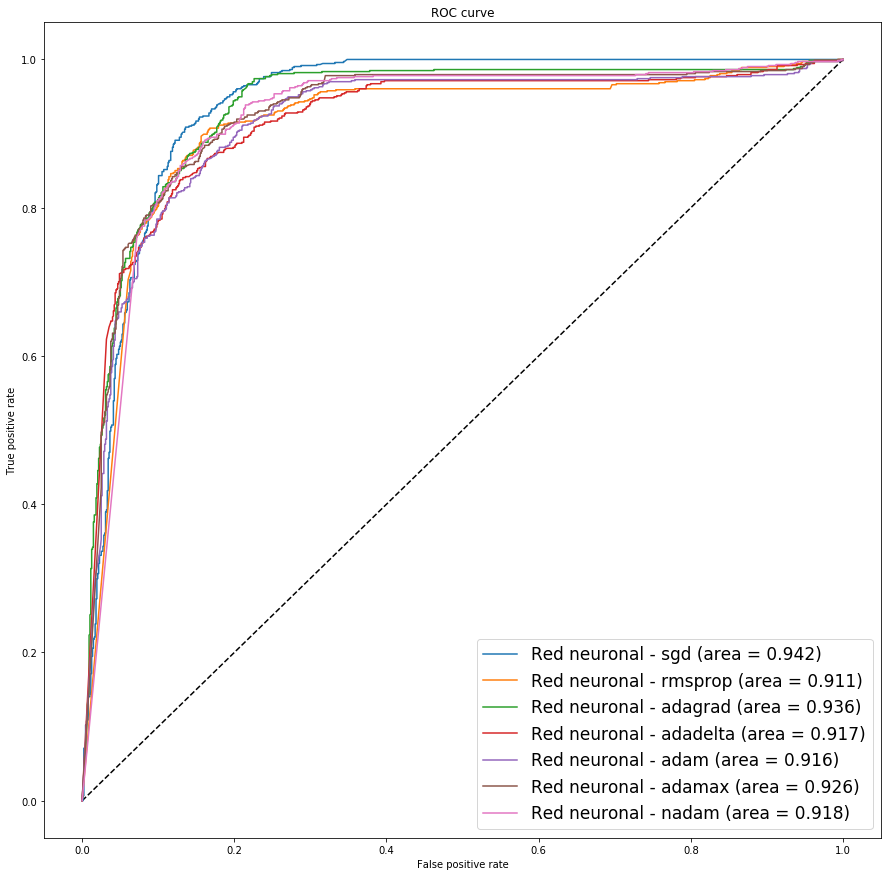

<Figure size 432x288 with 0 Axes>

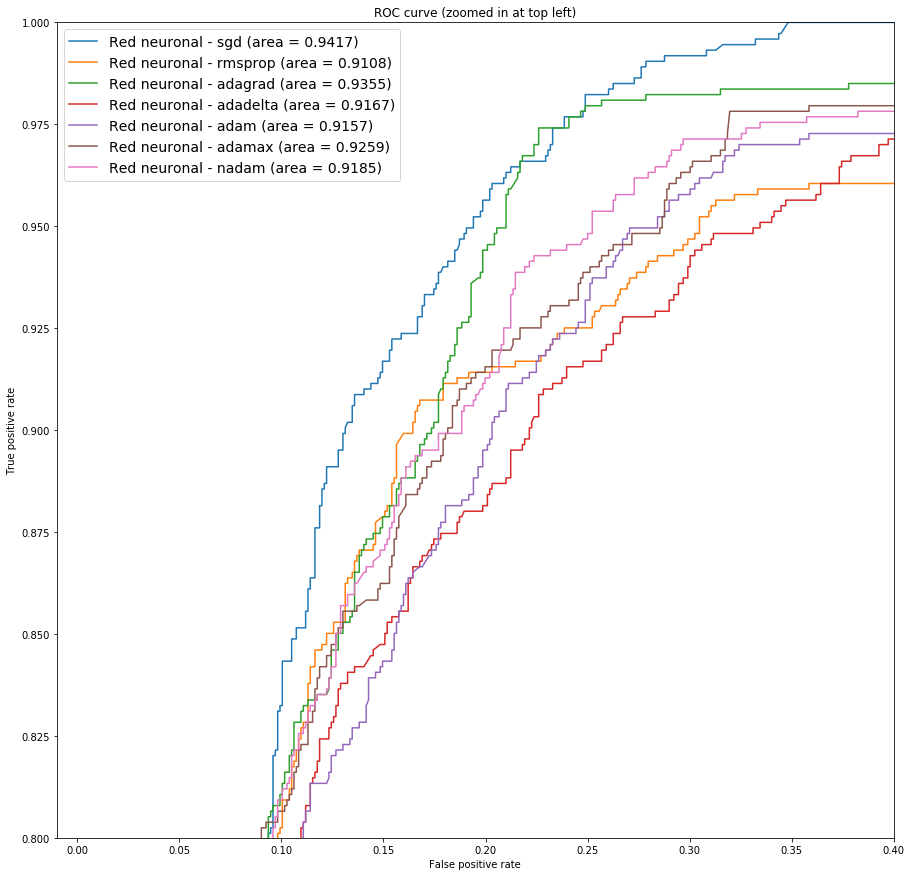

In [54]:
plt.subplots(figsize=(15,15))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras12, tpr_keras12, label='Red neuronal - sgd (area = {:.3f})'.format(auc_keras12))
plt.plot(fpr_keras13, tpr_keras13, label='Red neuronal - rmsprop (area = {:.3f})'.format(auc_keras13))
plt.plot(fpr_keras14, tpr_keras14, label='Red neuronal - adagrad (area = {:.3f})'.format(auc_keras14))
plt.plot(fpr_keras15, tpr_keras15, label='Red neuronal - adadelta (area = {:.3f})'.format(auc_keras15))
plt.plot(fpr_keras16, tpr_keras16, label='Red neuronal - adam (area = {:.3f})'.format(auc_keras16))
plt.plot(fpr_keras17, tpr_keras17, label='Red neuronal - adamax (area = {:.3f})'.format(auc_keras17))
plt.plot(fpr_keras18, tpr_keras18, label='Red neuronal - nadam (area = {:.3f})'.format(auc_keras18))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best',prop={'size': 17})
plt.show()

plt.figure(2)
plt.subplots(figsize=(15,15))
plt.xlim(-0.01, 0.4)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras12, tpr_keras12, label='Red neuronal - sgd (area = {:.4f})'.format(auc_keras12))
plt.plot(fpr_keras13, tpr_keras13, label='Red neuronal - rmsprop (area = {:.4f})'.format(auc_keras13))
plt.plot(fpr_keras14, tpr_keras14, label='Red neuronal - adagrad (area = {:.4f})'.format(auc_keras14))
plt.plot(fpr_keras15, tpr_keras15, label='Red neuronal - adadelta (area = {:.4f})'.format(auc_keras15))
plt.plot(fpr_keras16, tpr_keras16, label='Red neuronal - adam (area = {:.4f})'.format(auc_keras16))
plt.plot(fpr_keras17, tpr_keras17, label='Red neuronal - adamax (area = {:.4f})'.format(auc_keras17))
plt.plot(fpr_keras18, tpr_keras18, label='Red neuronal - nadam (area = {:.4f})'.format(auc_keras18))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best',prop={'size': 14})

plt.show()

In [55]:
from sklearn.metrics import confusion_matrix, precision_score, mean_absolute_error
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score
# Confusion matrix
confusion_matrix(y_test, y_pred_mean_squared_error.round())

array([[761, 115],
       [ 82, 652]], dtype=int64)

In [56]:
confusion_matrix(y_test, y_pred_mean_absolute_error.round())

array([[741, 135],
       [ 61, 673]], dtype=int64)

In [57]:
confusion_matrix(y_test, y_pred_mean_absolute_percentage_error.round())

array([[876,   0],
       [734,   0]], dtype=int64)

In [58]:
confusion_matrix(y_test, y_pred_mean_squared_logarithmic_error.round())

array([[773, 103],
       [ 79, 655]], dtype=int64)

In [59]:
confusion_matrix(y_test, y_pred_squared_hinge.round())

array([[  0, 876],
       [  0, 734]], dtype=int64)

In [60]:
confusion_matrix(y_test, y_pred_hinge.round())

array([[  0, 876],
       [  0, 734]], dtype=int64)

In [61]:
confusion_matrix(y_test, y_pred_categorical_hinge.round())

array([[746, 130],
       [ 63, 671]], dtype=int64)

In [62]:
confusion_matrix(y_test, y_pred_logcosh.round())

array([[752, 124],
       [ 65, 669]], dtype=int64)

In [63]:
confusion_matrix(y_test, y_pred_binary_crossentropy.round())

array([[745, 131],
       [104, 630]], dtype=int64)

In [64]:
confusion_matrix(y_test, y_pred_kullback_leibler_divergence.round())

array([[  0, 876],
       [  0, 734]], dtype=int64)

In [65]:
confusion_matrix(y_test, y_pred_poisson.round())

array([[730, 146],
       [ 68, 666]], dtype=int64)

Optimizadores de precisión

In [66]:
confusion_matrix(y_test, y_pred_sgd.round())

array([[761, 115],
       [ 74, 660]], dtype=int64)

In [67]:
confusion_matrix(y_test, y_pred_rmsprop.round())

array([[733, 143],
       [ 74, 660]], dtype=int64)

In [68]:
confusion_matrix(y_test, y_pred_adagrad.round())

array([[766, 110],
       [113, 621]], dtype=int64)

In [69]:
confusion_matrix(y_test, y_pred_adadelta.round())

array([[763, 113],
       [119, 615]], dtype=int64)

In [70]:
confusion_matrix(y_test, y_pred_adam.round())

array([[735, 141],
       [102, 632]], dtype=int64)

In [71]:
confusion_matrix(y_test, y_pred_adamax.round())

array([[740, 136],
       [ 93, 641]], dtype=int64)

In [72]:
confusion_matrix(y_test, y_pred_nadam.round())

array([[746, 130],
       [ 96, 638]], dtype=int64)

Precision y perdida

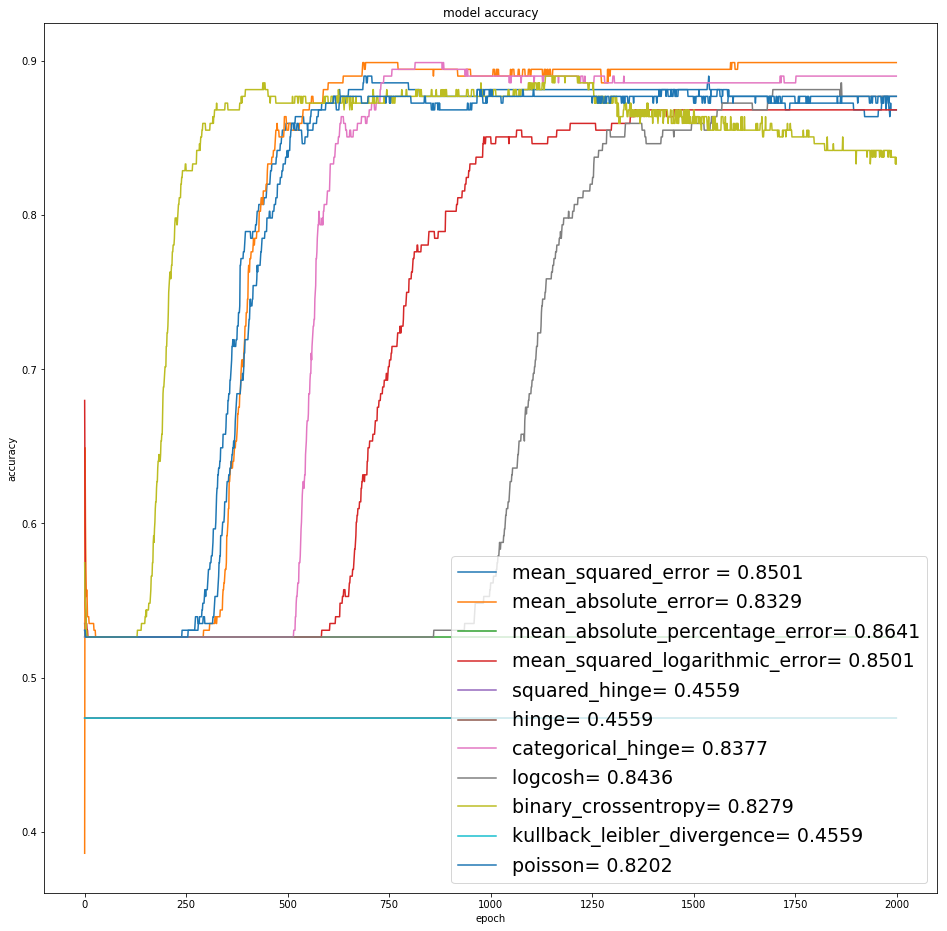

In [78]:
plt.subplots(figsize=(16,16))
#plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

#plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
#plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
#plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
#plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
#plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
#plt.plot(history7.history['acc'])
plt.plot(history7.history['val_acc'])
#plt.plot(history8.history['acc'])
plt.plot(history8.history['val_acc'])
#plt.plot(history9.history['acc'])
plt.plot(history9.history['val_acc'])
#plt.plot(history10.history['acc'])
plt.plot(history10.history['val_acc'])
#plt.plot(history11.history['acc'])
plt.plot(history11.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mean_squared_error = {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_error.round())),
'mean_absolute_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_absolute_error.round())),
'mean_absolute_percentage_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_logarithmic_error.round())),
'mean_squared_logarithmic_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_error.round())),
'squared_hinge= {:.4f}'.format(precision_score(y_test, y_pred_squared_hinge.round())),
'hinge= {:.4f}'.format(precision_score(y_test, y_pred_hinge.round())),
'categorical_hinge= {:.4f}'.format(precision_score(y_test, y_pred_categorical_hinge.round())),
'logcosh= {:.4f}'.format(precision_score(y_test, y_pred_logcosh.round())),
'binary_crossentropy= {:.4f}'.format(precision_score(y_test, y_pred_binary_crossentropy.round())),
'kullback_leibler_divergence= {:.4f}'.format(precision_score(y_test, y_pred_kullback_leibler_divergence.round())),
'poisson= {:.4f}'.format(precision_score(y_test, y_pred_poisson.round()))], loc='lower right',prop={'size': 19})
plt.show()

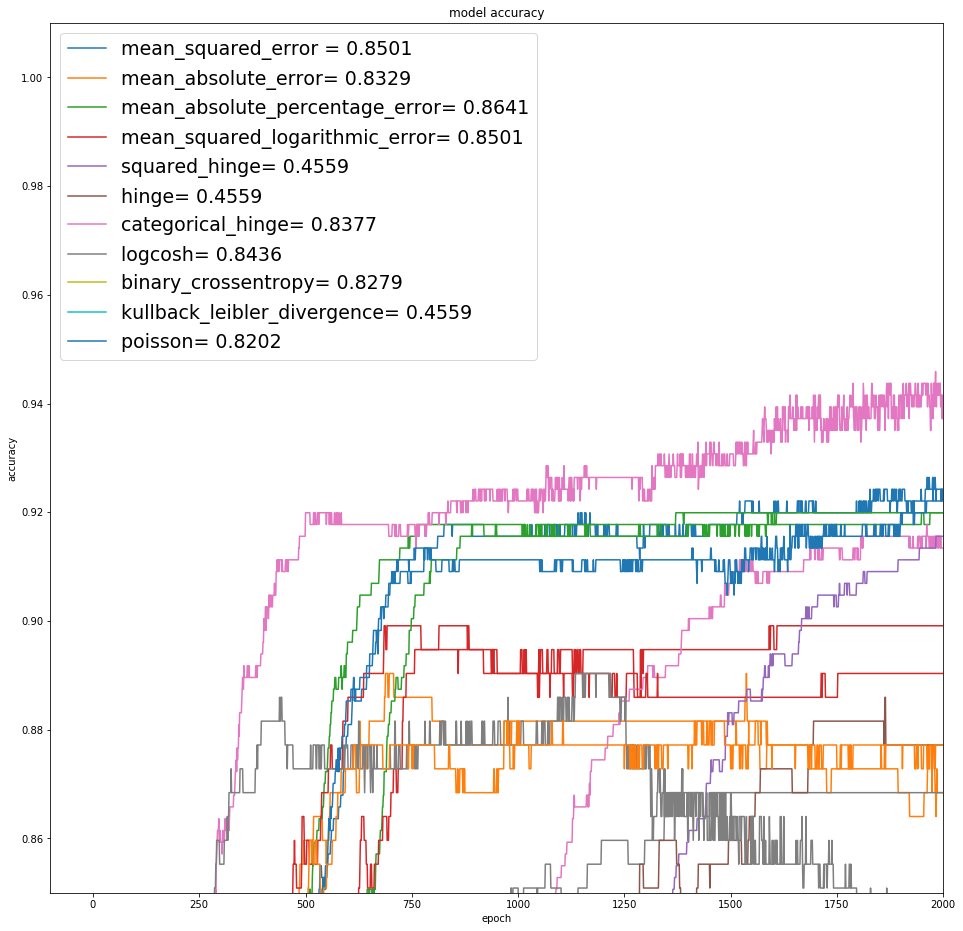

In [74]:
plt.subplots(figsize=(16,16))
plt.xlim(-100, 2000)
plt.ylim(0.85, 1.01)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.plot(history7.history['acc'])
plt.plot(history7.history['val_acc'])
plt.plot(history8.history['acc'])
plt.plot(history8.history['val_acc'])
plt.plot(history9.history['acc'])
plt.plot(history9.history['val_acc'])
plt.plot(history10.history['acc'])
plt.plot(history10.history['val_acc'])
plt.plot(history11.history['acc'])
plt.plot(history11.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mean_squared_error = {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_error.round())),
'mean_absolute_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_absolute_error.round())),
'mean_absolute_percentage_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_logarithmic_error.round())),
'mean_squared_logarithmic_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_squared_error.round())),
'squared_hinge= {:.4f}'.format(precision_score(y_test, y_pred_squared_hinge.round())),
'hinge= {:.4f}'.format(precision_score(y_test, y_pred_hinge.round())),
'categorical_hinge= {:.4f}'.format(precision_score(y_test, y_pred_categorical_hinge.round())),
'logcosh= {:.4f}'.format(precision_score(y_test, y_pred_logcosh.round())),
'binary_crossentropy= {:.4f}'.format(precision_score(y_test, y_pred_binary_crossentropy.round())),
'kullback_leibler_divergence= {:.4f}'.format(precision_score(y_test, y_pred_kullback_leibler_divergence.round())),
'poisson= {:.4f}'.format(precision_score(y_test, y_pred_poisson.round()))], loc='upper left',prop={'size': 19})
plt.show()

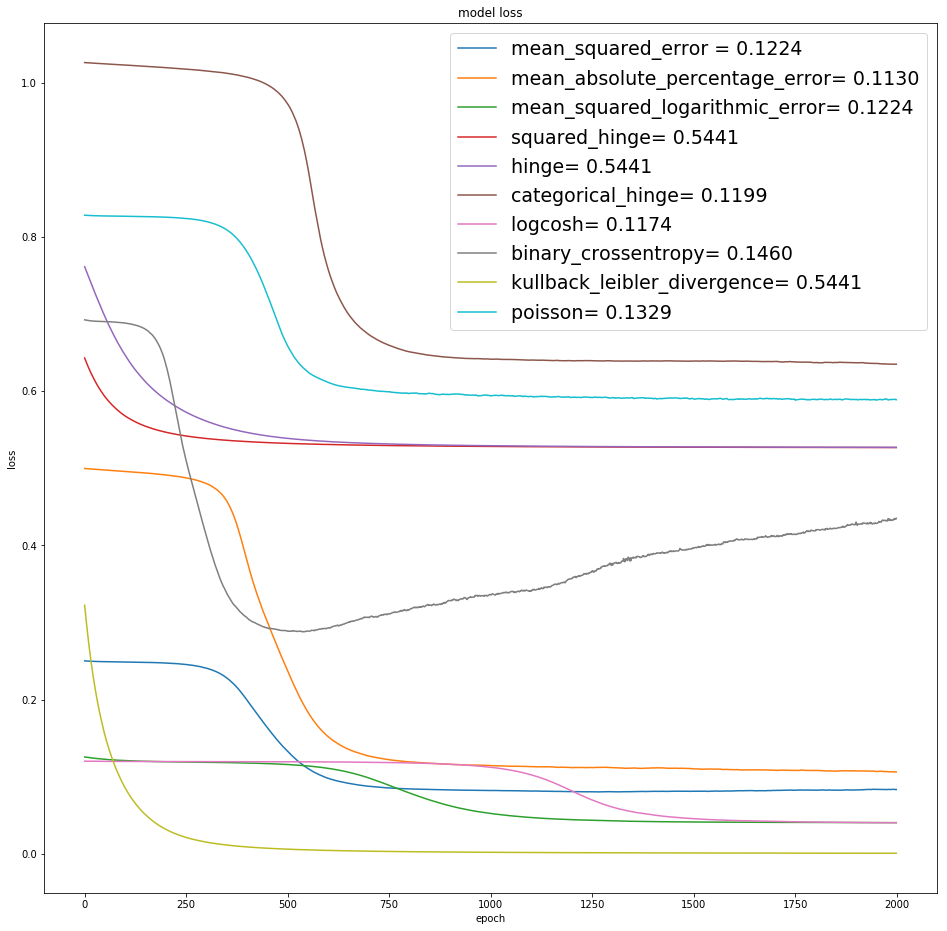

In [77]:
plt.subplots(figsize=(16,16))
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
#plt.plot(history3.history['loss'])
#plt.plot(history3.history['val_loss'])
#plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
#plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
#plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
#plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
#plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
#plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
#plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
#plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mean_squared_error = {:.4f}'.format(mean_absolute_error(y_test, y_pred_mean_squared_error.round())),
#'mean_absolute_error= {:.4f}'.format(precision_score(y_test, y_pred_mean_absolute_error.round())),
'mean_absolute_percentage_error= {:.4f}'.format(mean_absolute_error(y_test, y_pred_mean_squared_logarithmic_error.round())),
'mean_squared_logarithmic_error= {:.4f}'.format(mean_absolute_error(y_test, y_pred_mean_squared_error.round())),
'squared_hinge= {:.4f}'.format(mean_absolute_error(y_test, y_pred_squared_hinge.round())),
'hinge= {:.4f}'.format(mean_absolute_error(y_test, y_pred_hinge.round())),
'categorical_hinge= {:.4f}'.format(mean_absolute_error(y_test, y_pred_categorical_hinge.round())),
'logcosh= {:.4f}'.format(mean_absolute_error(y_test, y_pred_logcosh.round())),
'binary_crossentropy= {:.4f}'.format(mean_absolute_error(y_test, y_pred_binary_crossentropy.round())),
'kullback_leibler_divergence= {:.4f}'.format(mean_absolute_error(y_test, y_pred_kullback_leibler_divergence.round())),
'poisson= {:.4f}'.format(mean_absolute_error(y_test, y_pred_poisson.round()))], loc='upper right',prop={'size': 19})
plt.show()